In [130]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import random as rand
from sklearn import preprocessing 

In [131]:
np.random.seed(26)
df = pd.read_csv('Preprocessed_Data_2019_2020_Final.csv')

feature_names = df.columns
for i in range(len(feature_names)):
 print(str(i), "\t", str(feature_names[i]),"\t\t\t", str(type(df.iloc[0,i])))

0 	 FULL NAME 			 <class 'str'>
1 	 TEAM 			 <class 'str'>
2 	 WingSpan(cm) 			 <class 'numpy.float64'>
3 	 Height(cm) 			 <class 'numpy.float64'>
4 	 POS 			 <class 'str'>
5 	 AGE 			 <class 'numpy.float64'>
6 	 GP 			 <class 'numpy.int64'>
7 	 MPG 			 <class 'numpy.float64'>
8 	 MIN%Minutes Percentage 			 <class 'numpy.float64'>
9 	 USG%Usage Rate 			 <class 'numpy.float64'>
10 	 TO%Turnover Rate 			 <class 'numpy.float64'>
11 	 FTA 			 <class 'numpy.int64'>
12 	 FT 			 <class 'numpy.float64'>
13 	 FT% 			 <class 'numpy.float64'>
14 	 2PA 			 <class 'numpy.int64'>
15 	 2P 			 <class 'numpy.float64'>
16 	 2P% 			 <class 'numpy.float64'>
17 	 3PA 			 <class 'numpy.int64'>
18 	 3P 			 <class 'numpy.float64'>
19 	 3P% 			 <class 'numpy.float64'>
20 	 eFG 			 <class 'numpy.float64'>
21 	 eFG%Effective Shooting Percentage 			 <class 'numpy.float64'>
22 	 TS 			 <class 'numpy.float64'>
23 	 TS%True Shooting Percentage 			 <class 'numpy.float64'>
24 	 PPGPoints per game. 			 <class 'numpy.fl

In [132]:
df.columns

Index(['FULL NAME', 'TEAM', 'WingSpan(cm)', 'Height(cm)', 'POS', 'AGE', 'GP',
       'MPG', 'MIN%Minutes Percentage', 'USG%Usage Rate', 'TO%Turnover Rate',
       'FTA', 'FT', 'FT%', '2PA', '2P', '2P%', '3PA', '3P', '3P%', 'eFG',
       'eFG%Effective Shooting Percentage', 'TS',
       'TS%True Shooting Percentage', 'PPGPoints per game.',
       'RPGRebounds per game.', 'TRB%Total Rebound Percentage',
       'APGAssists per game.', 'Assist Percentage', 'SPGSteals per game.',
       'BPGBlocks per game.', 'TOPGTurnovers per game.', 'VI', 'ORTG', 'DRTG'],
      dtype='object')

In [133]:
df = df.dropna()

In [134]:
columns_to_norm = ['GP', 'MPG',
       'MIN%Minutes Percentage', 'USG%Usage Rate', 'TO%Turnover Rate', 'FTA',
       'FT','2PA', '2P', '3PA', '3P', 'eFG', 'TS', 'PPGPoints per game.',
       'RPGRebounds per game.', 'TRB%Total Rebound Percentage',
       'APGAssists per game.', 'Assist Percentage', 'SPGSteals per game.',
       'BPGBlocks per game.', 'TOPGTurnovers per game.', 'VI', 'ORTG', 'DRTG','WingSpan(cm)','Height(cm)']

In [135]:
scaler = preprocessing.StandardScaler().fit(df[columns_to_norm])

In [136]:
N_Data = scaler.transform(df[columns_to_norm])

In [137]:
print(N_Data)

[[ 0.72565987 -1.00818304 -1.00852845 ... -0.8715828   0.52450734
   0.44061897]
 [ 0.60069885  0.79127522  0.78541338 ...  0.57182787  1.43460981
   1.3114587 ]
 [ 0.85062088  1.46030458  1.45537314 ...  0.07287109  1.01015026
   0.73089888]
 ...
 [-0.815526    0.74513527  0.75219224 ...  0.09069098 -0.56818922
  -0.43022077]
 [ 1.05888924 -0.77748326 -0.78151729 ... -1.60219808 -0.50796185
  -1.59134041]
 [-1.06544803 -1.60800246 -1.60650906 ... -1.13888107 -1.35783696
  -1.88162033]]


In [138]:
N_Data.astype

<function ndarray.astype>

In [139]:
df1 = pd.DataFrame(N_Data, columns = ['GP', 'MPG',
       'MIN%Minutes Percentage', 'USG%Usage Rate', 'TO%Turnover Rate', 'FTA',
       'FT','2PA', '2P', '3PA', '3P', 'eFG', 'TS', 'PPGPoints per game.',
       'RPGRebounds per game.', 'TRB%Total Rebound Percentage',
       'APGAssists per game.', 'Assist Percentage', 'SPGSteals per game.',
       'BPGBlocks per game.', 'TOPGTurnovers per game.', 'VI', 'ORTG', 'DRTG','WingSpan(cm)','Height(cm)'])

In [140]:
df1['3P']

0      -2.154997
1      -2.154997
2      -0.395765
3       0.378298
4       3.474547
          ...   
1932    0.469778
1933    0.026451
1934    0.244596
1935   -2.154997
1936   -1.416119
Name: 3P, Length: 1937, dtype: float64

In [141]:
df1['Name']=df['FULL NAME']

In [142]:
df1['POS']=df['POS']

In [143]:
df1

GP       MPG  MIN%Minutes Percentage  USG%Usage Rate  \
0     0.725660 -1.008183               -1.008528        0.156793   
1     0.600699  0.791275                0.785413       -1.302530   
2     0.850621  1.460305                1.455373        0.942582   
3    -0.940487  0.583645                0.586087        0.755489   
4    -1.606946  0.595180                0.602697        0.231630   
...        ...       ...                     ...             ...   
1932  1.600387  0.802810                0.807561       -0.310939   
1933  0.933928 -0.581388               -0.576654       -0.610287   
1934 -0.815526  0.745135                0.752192        2.027719   
1935  1.058889 -0.777483               -0.781517       -0.310939   
1936 -1.065448 -1.608002               -1.606509       -0.348357   

      TO%Turnover Rate       FTA        FT       2PA        2P       3PA  ...  \
0             0.496441  0.132387 -1.189201 -0.041828  0.340915 -0.941849  ...   
1             1.099627  0.361296 -1.543113  0.286020  0.994774 -0.927927  ...   
2             0.711864  2.366539  0.389795  2.332965  0.579486 -0.893120  ...   
3            -0.437062 -0.536028  0.602142 -0.268799  0.013986 -0.426715  ...   
4             0.252294 -0.783249  1.484202 -0.815212 -0.171568 -0.914004  ...   
...                ...       ...       ...       ...       ...       ...  ...   
1932         -1.429303  0.068292  0.373460  0.567632 -0.277600  1.550287  ...   
1933         -1.419250 -0.490246 -0.459596 -0.251986 -0.489662 -0.162187  ...   
1934         -1.428441  0.104918  0.466022 -0.020812 -0.904951 -0.092574  ...   
1935         -1.414511 -0.023271  0.427908  0.105283  0.544142 -0.941849  ...   
1936         -1.411926 -0.764937 -0.328921 -0.941307 -1.762036 -0.816546  ...   

      SPGSteals per game.  BPGBlocks per game.  TOPGTurnovers per game.  \
0               -0.824488             0.085742                -0.577165   
1                0.649198             0.571291                 0.232140   
2                1.238672             1.469557                 1.801702   
3               -0.701681             1.056840                -0.270610   
4               -0.161329             4.310020                 0.281189   
...                   ...                  ...                      ...   
1932             0.280776            -0.763969                -0.270610   
1933            -0.996418             0.110019                -0.344184   
1934             0.821128            -0.618304                 0.759415   
1935            -0.284136            -0.424085                -0.135726   
1936            -1.364839             0.862621                -0.748836   

            VI      ORTG      DRTG  WingSpan(cm)  Height(cm)  \
0    -0.169082 -0.120599 -0.871583      0.524507    0.440619   
1     0.108275  0.750891  0.571828      1.434610    1.311459   
2     2.095999  0.886005  0.072871      1.010150    0.730899   
3     0.108275 -0.086820  0.963865      1.495793    1.311459   
4     0.570536  0.527952  0.500548      1.495793    1.311459   
...        ...       ...       ...           ...         ...   
1932 -0.446439 -0.113843  0.393629     -2.571944   -1.881620   
1933 -0.631344 -1.079913 -1.513099      1.798842    1.021179   
1934  0.709214 -0.634034  0.090691     -0.568189   -0.430221   
1935  1.263928  0.609020 -1.602198     -0.507962   -1.591340   
1936 -1.879449 -3.228236 -1.138881     -1.357837   -1.881620   

                   Name  POS  
0      Precious Achiuwa    F  
1                   NaN  NaN  
2          Steven Adams    C  
3           Bam Adebayo  C-F  
4     LaMarcus Aldridge  C-F  
...                 ...  ...  
1932                NaN  NaN  
1933                NaN  NaN  
1934       Damian Jones    C  
1935     Damian Lillard    G  
1936                NaN  NaN  

[1937 rows x 28 columns]

In [144]:

df1 = df1.sample(frac = 1) 
train_proportion = 0.8
test_proportion = 0.1
n = len(df1)
print('Size of dataset: ', str(n))

t = int(train_proportion * n)
t1 = int(test_proportion*n)
target = df1['3P']
target_columns = ['3P%','3P','3PA']
data = df1.loc[:, ~df1.columns.isin(target_columns)]
# the following variable records the features of examples in the training set
train_x = data.iloc[:t]
# the following variable records the features of examples in the test set
test_x = data.iloc[t+t1:]
# the following variable records the labels of examples in the training set
train_y = target[:t]
# the following variable records the labels of examples in the test set
test_y = target[t+t1:]

valid_x = data.iloc[t:t+t1]
valid_y = target[t:t+t1]




Size of dataset:  1937


In [145]:
train_x

GP       MPG  MIN%Minutes Percentage  USG%Usage Rate  \
163   1.017236 -0.639063               -0.643096       -1.059310   
1334  0.933928  1.921704                1.920469        2.177393   
1029  0.933928  1.021975                1.023498        0.400013   
1415  0.975582 -0.166129               -0.166926       -0.236102   
246   0.725660  0.964300                0.962593       -0.217393   
...        ...       ...                     ...             ...   
711  -1.107102 -0.812088               -0.814738        0.063246   
1207 -0.024106 -0.765948               -0.770444       -1.003182   
1304  1.183850  0.410621                0.414444       -1.078019   
592   0.808967  1.483375                1.488594        2.682544   
141   0.933928  1.552584                1.549500        3.243822   

      TO%Turnover Rate       FTA        FT       2PA        2P       eFG  ...  \
163           0.209209 -0.142304  0.057661  0.017017  1.198001  1.343458  ...   
1334          0.137401  3.868182  0.885272  1.836990  0.199541  0.522440  ...   
1029          0.697503  0.379608 -0.530379  1.076216 -0.418975 -0.200057  ...   
1415          0.539525  0.040823  0.721928 -0.306628  0.287900  0.730431  ...   
246           0.036870  0.681768  0.362570  1.374641  1.215673  1.343458  ...   
...                ...       ...       ...       ...       ...       ...  ...   
711          -0.207277 -0.664217  0.068551 -0.781586 -1.037490 -0.167216  ...   
1207          0.754949 -0.325431 -1.074860 -0.432723  1.701649  2.033114  ...   
1304          0.754949 -0.233868  0.721928  0.067455 -0.418975 -0.353313  ...   
592           0.884203  4.124560  0.863493  2.009321 -0.145061 -0.178163  ...   
141           0.754949  3.437833  0.014103  2.379200  0.526470  0.380130  ...   

      SPGSteals per game.  BPGBlocks per game.  TOPGTurnovers per game.  \
163             -0.480628             1.396725                -0.785623   
1334             0.968496            -0.229865                 2.169568   
1029             1.042180            -0.326975                 1.200854   
1415             0.010601            -0.205588                -0.135726   
246             -0.063084             2.756263                 0.072731   
...                   ...                  ...                      ...   
711             -0.627996            -0.739692                -0.785623   
1207            -0.898172             2.125049                -0.613952   
1304             0.182531            -0.326975                -0.074415   
592              0.428145            -0.618304                 3.641032   
141              0.747443             0.304239                 3.788178   

            VI      ORTG      DRTG  WingSpan(cm)  Height(cm)             Name  \
163  -0.122856  1.892610 -1.851676      1.313199    0.730899  Anthony Edwards   
1334  1.726189  1.183258  1.943959     -0.689600   -1.301061       Trey Burke   
1029  0.847893 -0.404339 -0.550825     -0.082546   -0.139941         CJ Miles   
1415  0.570536  0.507684 -1.423999     -0.203957    1.311459  Wayne Ellington   
246   0.431858  1.412953  0.375809      0.706145    1.021179     Jaxson Hayes   
...        ...       ...       ...           ...         ...              ...   
711   0.246953 -0.059797 -0.230067      0.099092    0.730899   Reggie Bullock   
1207 -0.862474  1.021120 -0.960682      0.888740    1.021179              NaN   
1304 -0.307761  0.102340  0.892586     -1.236426   -1.010781              NaN   
592   2.095999  0.561730  1.302443     -1.843480   -1.591340   Brad Wanamaker   
141   3.436556  0.345547  0.482728      0.099092    0.440619   Dewayne Dedmon   

      POS  
163     G  
1334    G  
1029  F-G  
1415    G  
246   C-F  
...   ...  
711     F  
1207  NaN  
1304  NaN  
592     G  
141     C  

[1549 rows x 26 columns]

In [146]:
t = train_x.loc[:, train_x.columns != 'Name']

In [147]:
train_LR = t.loc[:, t.columns != 'POS']

In [148]:
train_LR

GP       MPG  MIN%Minutes Percentage  USG%Usage Rate  \
163   1.017236 -0.639063               -0.643096       -1.059310   
1334  0.933928  1.921704                1.920469        2.177393   
1029  0.933928  1.021975                1.023498        0.400013   
1415  0.975582 -0.166129               -0.166926       -0.236102   
246   0.725660  0.964300                0.962593       -0.217393   
...        ...       ...                     ...             ...   
711  -1.107102 -0.812088               -0.814738        0.063246   
1207 -0.024106 -0.765948               -0.770444       -1.003182   
1304  1.183850  0.410621                0.414444       -1.078019   
592   0.808967  1.483375                1.488594        2.682544   
141   0.933928  1.552584                1.549500        3.243822   

      TO%Turnover Rate       FTA        FT       2PA        2P       eFG  ...  \
163           0.209209 -0.142304  0.057661  0.017017  1.198001  1.343458  ...   
1334          0.137401  3.868182  0.885272  1.836990  0.199541  0.522440  ...   
1029          0.697503  0.379608 -0.530379  1.076216 -0.418975 -0.200057  ...   
1415          0.539525  0.040823  0.721928 -0.306628  0.287900  0.730431  ...   
246           0.036870  0.681768  0.362570  1.374641  1.215673  1.343458  ...   
...                ...       ...       ...       ...       ...       ...  ...   
711          -0.207277 -0.664217  0.068551 -0.781586 -1.037490 -0.167216  ...   
1207          0.754949 -0.325431 -1.074860 -0.432723  1.701649  2.033114  ...   
1304          0.754949 -0.233868  0.721928  0.067455 -0.418975 -0.353313  ...   
592           0.884203  4.124560  0.863493  2.009321 -0.145061 -0.178163  ...   
141           0.754949  3.437833  0.014103  2.379200  0.526470  0.380130  ...   

      APGAssists per game.  Assist Percentage  SPGSteals per game.  \
163              -0.811971          -0.846764            -0.480628   
1334              3.307459           2.338906             0.968496   
1029              1.247744           0.936762             1.042180   
1415             -0.199623          -0.027913             0.010601   
246              -0.199623          -0.588770            -0.063084   
...                    ...                ...                  ...   
711              -0.644967          -0.398078            -0.627996   
1207             -0.867639          -0.936502            -0.898172   
1304              0.802400           0.622682             0.182531   
592               4.086811           3.584009             0.428145   
141               3.641467           3.426969             0.747443   

      BPGBlocks per game.  TOPGTurnovers per game.        VI      ORTG  \
163              1.396725                -0.785623 -0.122856  1.892610   
1334            -0.229865                 2.169568  1.726189  1.183258   
1029            -0.326975                 1.200854  0.847893 -0.404339   
1415            -0.205588                -0.135726  0.570536  0.507684   
246              2.756263                 0.072731  0.431858  1.412953   
...                   ...                      ...       ...       ...   
711             -0.739692                -0.785623  0.246953 -0.059797   
1207             2.125049                -0.613952 -0.862474  1.021120   
1304            -0.326975                -0.074415 -0.307761  0.102340   
592             -0.618304                 3.641032  2.095999  0.561730   
141              0.304239                 3.788178  3.436556  0.345547   

          DRTG  WingSpan(cm)  Height(cm)  
163  -1.851676      1.313199    0.730899  
1334  1.943959     -0.689600   -1.301061  
1029 -0.550825     -0.082546   -0.139941  
1415 -1.423999     -0.203957    1.311459  
246   0.375809      0.706145    1.021179  
...        ...           ...         ...  
711  -0.230067      0.099092    0.730899  
1207 -0.960682      0.888740    1.021179  
1304  0.892586     -1.236426   -1.010781  
592   1.302443     -1.843480   -1.591340  
141   0.482728     

In [149]:
df2 = df

In [150]:
def string_to_float(string):
     try:
        return float(string)
     except:
        return 0.0
    
labels_real = [
 'GP',   
 'MPG',
 'WingSpan(cm)', 
 'FT',
 'VI',   
 'PPGPoints per game.',
 'ORTG','2P','Height(cm)',
 'RPGRebounds per game.',
 'TOPGTurnovers per game.',
 'BPGBlocks per game.',
 'SPGSteals per game.'
]

#labels_string = [
    #'POS',
    
#]



In [151]:
train_vals_real = np.asarray(train_x[labels_real])

valid_vals_real = np.asarray(valid_x[labels_real])
test_vals_real = np.asarray(test_x[labels_real])

In [152]:
#assert(train_vals_from_string.applymap(lambda x:type(x)!=str).all(skipna=False).all(skipna=False) == True)
#assert(test_vals_from_string.applymap(lambda x:type(x)!=str).all(skipna=False).all(skipna=False) == True)

In [153]:
#train_vals_from_string = np.asarray(train_vals_from_string)
#test_vals_from_string = np.asarray(test_vals_from_string)

In [154]:
train_vals = np.concatenate((train_vals_real,np.ones((len(train_vals_real[:,0]),1))), axis = 1)

valid_vals = np.concatenate((valid_vals_real,np.ones((len(valid_vals_real[:,0]),1))), axis = 1)
test_vals = np.concatenate((test_vals_real,np.ones((len(test_vals_real[:,0]),1))), axis = 1)

In [155]:
def MSE(y, pred):
    return np.mean(np.power(np.subtract(y,pred),2)) 

# This function plots the main diagonal;for a "predicted vs true" plot with perfect predictions, all data lies on this line
def plotDiagonal(xmin, xmax):
    xsamples = np.arange(xmin,xmax,step=0.01)
    plt.plot(xsamples,xsamples,c='black')

# This helper function plots x vs y and labels the axes
def plotdata(x=None,y=None,xname=None,yname=None,margin=0.05,plotDiag=True,zeromin=False):
    plt.scatter(x,y,label='data')
    plt.xlabel(xname)
    plt.ylabel(yname)
    range_x = max(x) - min(x)
    range_y = max(y) - min(y)
    if plotDiag:
        plotDiagonal(min(x)-margin*range_x,max(x)+margin*range_x)
    if zeromin:
        plt.xlim(0.0,max(x)+margin*range_x)
        plt.ylim(0.0,max(y)+margin*range_y)
    else:
        plt.xlim(min(x)-margin*range_x,max(x)+margin*range_x)
        plt.ylim(min(y)-margin*range_y,max(y)+margin*range_y)
    plt.show()

# This function plots the predicted labels vs the actual labels (We only plot the first 1000 points to avoid slow plots)
def plot_pred_true(test_pred=None, test_y=None, max_points = 1000):
    plotdata(test_pred[1:max_points], test_y[1:max_points],'Predicted', 'True', zeromin=True)

In [156]:
# This function runs OLS and bypasses any SVD (Singular Value Decomposition) convergence errors by refitting the model
def run_OLS(train_y, test_y, train_vals, test_vals):
    ols_model = sm.regression.linear_model.OLS(train_y, train_vals)
    while True: # Bypasses SVD convergence assertion error
        try:
            results = ols_model.fit()
            break
        except:
            None
            
    w = np.array(results.params).reshape([len(results.params),1])

    train_pred = np.matmul(train_vals,w)
    test_pred = np.matmul(test_vals,w)

    train_MSE = MSE(train_y, train_pred.flatten())
    test_MSE = MSE(test_y, test_pred.flatten())
    
    return train_MSE, test_MSE, test_pred,w

In [157]:
train_MSE, valid_MSE, valid_pred,w = run_OLS(train_y, valid_y, train_vals, valid_vals)

Train MSE	 0.6400197669877484
Validate MSE	 0.7302775385813615


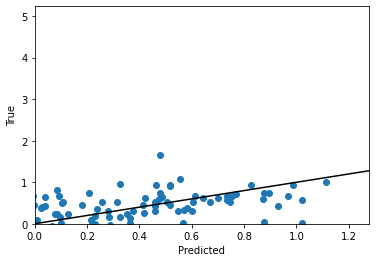

In [158]:
print("Train MSE\t", str(train_MSE))
print("Validate MSE\t", str(valid_MSE))

plot_pred_true(valid_pred.flatten(), valid_y) #.flatten() will make sure the dimensions match

In [159]:
cat_labels = [
  'POS'
]

#Sets of all categories in a particular column
cats_sets = [train_x.loc[:, label].fillna('NaN').unique() for label in cat_labels]

In [160]:
def onehot(column=None, col=None):
    column = column.astype(pd.CategoricalDtype(categories = col))
    hot_encode = pd.get_dummies(column)
    
    return np.asarray(hot_encode)

In [161]:
trv = np.zeros((len(train_x),1))
for i in range(len(cat_labels)):
    trv = np.concatenate((trv,onehot(train_x[cat_labels[i]],cats_sets[i])),axis = 1)
     
train_cat_vals = trv[:,1:]

vv = np.zeros((len(valid_x),1))
for i in range(len(cat_labels)):
    vv = np.concatenate((vv,onehot(valid_x[cat_labels[i]],cats_sets[i])),axis = 1)

valid_cat_vals = vv[:,1:]

tv = np.zeros((len(test_x),1))
for i in range(len(cat_labels)):
    tv = np.concatenate((tv,onehot(test_x[cat_labels[i]],cats_sets[i])),axis = 1)
    
test_cat_vals = tv[:,1:]

In [162]:
train_vals1 = np.concatenate((train_vals,train_cat_vals),axis = 1)
valid_vals1 = np.concatenate((valid_vals,valid_cat_vals),axis = 1)
test_vals1 = np.concatenate((test_vals,test_cat_vals),axis = 1)

In [163]:
train_ridge = np.concatenate((train_vals_real,train_cat_vals),axis = 1)

In [164]:
valid_ridge = np.concatenate((valid_vals_real,valid_cat_vals),axis = 1)

In [165]:
test_ridge = np.concatenate((test_vals_real,test_cat_vals),axis = 1)

In [166]:
train_MSE, valid_MSE, valid_pred,w = run_OLS(train_y, valid_y, train_vals1, valid_vals1)

Train MSE	 0.6327715362063395
Validation MSE	 0.7223369400923453


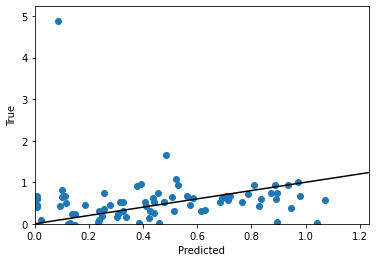

In [167]:
print("Train MSE\t", str(train_MSE))
print("Validation MSE\t", str(valid_MSE))

plot_pred_true(valid_pred.flatten(), valid_y)

In [168]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
alpha = .0001 # regularization parameter

lin = Ridge(alpha=alpha).fit(train_ridge,train_y)
yhat = lin.predict(valid_ridge)
that = lin.predict(train_ridge)

Train MSE	 0.6327715362063788
Validation MSE is: 0.722336993155266


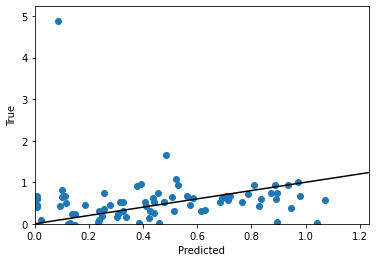

In [169]:
Ridge_MSE = MSE(valid_y, yhat)
Train_MSE = MSE(train_y,that)
print("Train MSE\t", str(Train_MSE))
print('Validation MSE is: {}'.format(Ridge_MSE))
plot_pred_true(yhat,valid_y)

In [319]:
x1 = df['GP']

In [320]:
y1 = df['3P']

Text(0, 0.5, 'Three Pointers Percentage')

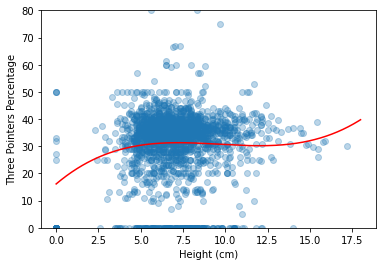

In [318]:
from scipy.linalg import qr, solve
x = x1

n = 1937
max_order = 3
X = np.zeros((n, max_order+1))
y = y1

# method 1: use the default Vandermonde function from numpy
X = np.vander(x, max_order+1, increasing = True)

# method 2: use a for loop
# for k in range(max_order+1):
#     X[:,k] = x**(k)
    
# create a pandas dataframe with data = Vandermonde
col_list = ["order"+str(i) for i in range(max_order+1)]   
df1 = pd.DataFrame(data = X, columns=col_list)
df1


def Vandermonde_df(x, order = max_order):
    X = np.vander(x, order+1, increasing = True)
    col_list = ["order"+str(i) for i in range(order+1)]   
    df = pd.DataFrame(data = X, columns=col_list)
    return df

Q, R, = qr(X, mode='economic')
w = solve(R, Q.T @ y)

df1.dot(w)

def p(x, order = max_order, w = w):
    df = Vandermonde_df(x, order)
    y = df.dot(w)
    return np.array(y)

b = np.linspace(0,90,1000)
plt.scatter(x1,y1,alpha = 0.3)
#plt.ylim(0,50)
plt.plot(b,p(b),color = 'r')
plt.ylim(0,80)
plt.xlabel('Height (cm)')
plt.ylabel('Three Pointers Percentage')

In [350]:
#GPdf,MPGdf,WSdf,FTdf,PPGdf,Odf,tPdf,Hdf,RPGdf,TOPGdf,BPGdf,SPGdf,VIdf
y1 = df['3P']
x1 = df['VI']
from scipy.linalg import qr, solve
x = x1

n = 1937
max_order = 3
X = np.zeros((n, max_order+1))
y = y1

# method 1: use the default Vandermonde function from numpy
X = np.vander(x, max_order+1, increasing = True)

# method 2: use a for loop
# for k in range(max_order+1):
#     X[:,k] = x**(k)
    
# create a pandas dataframe with data = Vandermonde
col_list = ["order"+str(i) for i in range(max_order+1)]   
df1 = pd.DataFrame(data = X, columns=col_list)
df1


def Vandermonde_df(x, order = max_order):
    X = np.vander(x, order+1, increasing = True)
    col_list = ["order"+str(i) for i in range(order+1)]   
    df = pd.DataFrame(data = X, columns=col_list)
    return df

Q, R, = qr(X, mode='economic')
w = solve(R, Q.T @ y)

df1.dot(w)

def p(x, order = max_order, w = w):
    df = Vandermonde_df(x, order)
    y = df.dot(w)
    return np.array(y)
 
VIdf = Vandermonde_df(x,3)

In [377]:
final_df = pd.concat([GPdf.loc[:,~GPdf.columns.isin(['order0'])],MPGdf.loc[:,~MPGdf.columns.isin(['order0'])],
                      WSdf.loc[:,~WSdf.columns.isin(['order0'])],
                      FTdf.loc[:,~FTdf.columns.isin(['order0'])],
                      PPGdf.loc[:,~PPGdf.columns.isin(['order0'])],
                      Odf.loc[:,~Odf.columns.isin(['order0'])],
                      tPdf.loc[:,~tPdf.columns.isin(['order0'])],
                      Hdf.loc[:,~Hdf.columns.isin(['order0'])],
                      RPGdf.loc[:,~RPGdf.columns.isin(['order0'])],
                      TOPGdf.loc[:,~TOPGdf.columns.isin(['order0'])],
                      BPGdf.loc[:,~BPGdf.columns.isin(['order0'])],
                      SPGdf.loc[:,~SPGdf.columns.isin(['order0'])],VIdf.loc[:,~VIdf.columns.isin(['order0'])]],axis = 1)

In [378]:
final_df

order1  order2  order3  order1  order1      order2        order3  \
0         61    3721  226981    12.1  215.27  46341.1729  9.975864e+06   
1         58    3364  195112    27.7  224.79  50530.5441  1.135876e+07   
2         64    4096  262144    33.5  220.35  48554.1225  1.069890e+07   
3         21     441    9261    25.9  225.43  50818.6849  1.145606e+07   
4          5      25     125    26.0  225.43  50818.6849  1.145606e+07   
...      ...     ...     ...     ...     ...         ...           ...   
1932      82    6724  551368    27.8  182.88  33445.0944  6.116439e+06   
1933      66    4356  287496    15.8  228.60  52257.9600  1.194617e+07   
1934      24     576   13824    27.3  203.84  41550.7456  8.469704e+06   
1935      69    4761  328509    14.1  204.47  41807.9809  8.548478e+06   
1936      18     324    5832     6.9  195.58  38251.5364  7.481235e+06   

      order1    order2  order1  ...  order2     order3  order1  order2  \
0       50.9   2590.81     5.0  ...  0.4900   0.343000    0.46  0.2116   
1       44.4   1971.36     7.6  ...  1.8496   2.515456    0.66  0.4356   
2       79.9   6384.01    18.7  ...  6.9696  18.399744    1.03  1.0609   
3       83.8   7022.44    13.7  ...  0.9025   0.857375    0.86  0.7396   
4      100.0  10000.00    12.8  ...  1.9600   2.744000    2.20  4.8400   
...      ...       ...     ...  ...     ...        ...     ...     ...   
1932    79.6   6336.16    10.2  ...  0.9025   0.857375    0.11  0.0121   
1933    64.3   4134.49     4.4  ...  0.7921   0.704969    0.47  0.2209   
1934    81.3   6609.69    16.7  ...  3.2041   5.735339    0.17  0.0289   
1935    80.6   6496.36     5.4  ...  1.1236   1.191016    0.25  0.0625   
1936    66.7   4448.89     1.2  ...  0.3136   0.175616    0.78  0.6084   

      order1  order2    order3  order1  order2    order3  
0       0.33  0.1089  0.035937     6.7   44.89   300.763  
1       0.93  0.8649  0.804357     7.3   53.29   389.017  
2       1.17  1.3689  1.601613    11.6  134.56  1560.896  
3       0.38  0.1444  0.054872     7.3   53.29   389.017  
4       0.60  0.3600  0.216000     8.3   68.89   571.787  
...      ...     ...       ...     ...     ...       ...  
1932    0.78  0.6084  0.474552     6.1   37.21   226.981  
1933    0.26  0.0676  0.017576     5.7   32.49   185.193  
1934    1.00  1.0000  1.000000     8.6   73.96   636.056  
1935    0.55  0.3025  0.166375     9.8   96.04   941.192  
1936    0.11  0.0121  0.001331     3.0    9.00    27.000  

[1937 rows x 37 columns]

In [379]:
final_df['3P'] = df['3P']

In [380]:
final_df['POS'] = df['POS']

In [381]:
final_df

order1  order2  order3  order1  order1      order2        order3  \
0         61    3721  226981    12.1  215.27  46341.1729  9.975864e+06   
1         58    3364  195112    27.7  224.79  50530.5441  1.135876e+07   
2         64    4096  262144    33.5  220.35  48554.1225  1.069890e+07   
3         21     441    9261    25.9  225.43  50818.6849  1.145606e+07   
4          5      25     125    26.0  225.43  50818.6849  1.145606e+07   
...      ...     ...     ...     ...     ...         ...           ...   
1932      82    6724  551368    27.8  182.88  33445.0944  6.116439e+06   
1933      66    4356  287496    15.8  228.60  52257.9600  1.194617e+07   
1934      24     576   13824    27.3  203.84  41550.7456  8.469704e+06   
1935      69    4761  328509    14.1  204.47  41807.9809  8.548478e+06   
1936      18     324    5832     6.9  195.58  38251.5364  7.481235e+06   

      order1    order2  order1  ...  order1  order2  order1  order2    order3  \
0       50.9   2590.81     5.0  ...    0.46  0.2116    0.33  0.1089  0.035937   
1       44.4   1971.36     7.6  ...    0.66  0.4356    0.93  0.8649  0.804357   
2       79.9   6384.01    18.7  ...    1.03  1.0609    1.17  1.3689  1.601613   
3       83.8   7022.44    13.7  ...    0.86  0.7396    0.38  0.1444  0.054872   
4      100.0  10000.00    12.8  ...    2.20  4.8400    0.60  0.3600  0.216000   
...      ...       ...     ...  ...     ...     ...     ...     ...       ...   
1932    79.6   6336.16    10.2  ...    0.11  0.0121    0.78  0.6084  0.474552   
1933    64.3   4134.49     4.4  ...    0.47  0.2209    0.26  0.0676  0.017576   
1934    81.3   6609.69    16.7  ...    0.17  0.0289    1.00  1.0000  1.000000   
1935    80.6   6496.36     5.4  ...    0.25  0.0625    0.55  0.3025  0.166375   
1936    66.7   4448.89     1.2  ...    0.78  0.6084    0.11  0.0121  0.001331   

      order1  order2    order3    3P  POS  
0        6.7   44.89   300.763   0.0    F  
1        7.3   53.29   389.017   NaN  NaN  
2       11.6  134.56  1560.896   0.0    C  
3        7.3   53.29   389.017  25.0  C-F  
4        8.3   68.89   571.787  36.0  C-F  
...      ...     ...       ...   ...  ...  
1932     6.1   37.21   226.981   NaN  NaN  
1933     5.7   32.49   185.193   NaN  NaN  
1934     8.6   73.96   636.056   0.0    C  
1935     9.8   96.04   941.192  36.1    G  
1936     3.0    9.00    27.000   NaN  NaN  

[1937 rows x 39 columns]

In [382]:
final_df = final_df.dropna()

In [388]:
final_df1 = final_df.loc[:,~final_df.columns.isin(['POS'])]

In [390]:
scaler = preprocessing.StandardScaler().fit(final_df1)
N_Data2 = scaler.transform(final_df1)

In [397]:
N_Data2.shape

(1606, 38)

In [392]:
cat_labels = [
  'POS'
]

#Sets of all categories in a particular column
cats_sets = [final_df.loc[:, label].fillna('NaN').unique() for label in cat_labels]

In [394]:
foh = np.zeros((len(final_df),1))
for i in range(len(cat_labels)):
    foh = np.concatenate((foh,onehot(final_df[cat_labels[i]],cats_sets[i])),axis = 1)
     
total_one_hot = foh[:,1:]


In [396]:
total_one_hot.shape

(1606, 7)

In [405]:
total_data.shape

(1606, 45)

In [398]:
total_data = np.concatenate((N_Data2,total_one_hot),axis = 1)

In [413]:
train_proportion = 0.8
test_proportion = 0.1
n = len(total_one_hot)

t = int(train_proportion*n)
t1 = int(test_proportion*n)
target = N_Data2[:,37]
train_x_final = total_data[:t,:]
train_y_final = target[:t]
valid_x_final = total_data[t:t+t1,:]
valid_y_final = target[t:t+t1]
test_x_final = total_data[t+t1:,:]
test_y_final = target[t+t1:]


In [414]:
test_x_final

array([[-1.7205069 , -1.18986568, -0.95653438, ...,  0.        ,
         0.        ,  0.        ],
       [-0.71598961, -0.86013787, -0.84598179, ...,  0.        ,
         0.        ,  0.        ],
       [-0.88340916, -0.95434581, -0.88957857, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.29304497,  1.49506078,  1.59342451, ...,  0.        ,
         0.        ,  0.        ],
       [-0.79969939, -0.9092045 , -0.86959252, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.08377054,  1.14423431,  1.11066939, ...,  0.        ,
         0.        ,  0.        ]])

Least Squares Regression

In [1073]:
df2 = df2.sample(frac = 1) 
train_proportion = 0.8
test_proportion = 0.1
n = len(df2)
print('Size of dataset: ', str(n))

t = int(train_proportion * n)
t1 = int(test_proportion*n)
target = df2['3P']
target_columns = ['3P','3P%','3PA']
data = df2.loc[:, ~df2.columns.isin(target_columns)]
# the following variable records the features of examples in the training set
trainr_x = data.iloc[:t]
# the following variable records the features of examples in the test set
testr_x = data.iloc[t+t1:]
# the following variable records the labels of examples in the training set
trainr_y = target[:t]
# the following variable records the labels of examples in the test set
testr_y = target[t+t1:]

validr_x = data.iloc[t:t+t1]
validr_y = target[t:t+t1]

Size of dataset:  1937


In [1074]:
trainr_x

FULL NAME TEAM  WingSpan(cm)  Height(cm)  POS    AGE  GP   MPG  \
59    Bogdan Bogdanovic  Atl        210.82      198.12    G  28.74  44  29.7   
1949      Darius Miller  Nor        205.74      198.12    F  27.00  82  23.7   
215       Javonte Green  Chi        200.66      193.04  G-F  27.82  16   8.0   
1530     Reggie Jackson  Lac        211.46      187.96    G  30.33  17  21.3   
452    Anzejs Pasecniks  Was        213.36      218.44  C-F  25.41   1   6.3   
...                 ...  ...           ...         ...  ...    ...  ..   ...   
152       Luguentz Dort  Okc        204.47      190.50    G  22.08  52  29.7   
664    Keita Bates-Diop  Min        200.66      193.04    F  23.21  30  16.8   
726       Isaiah Canaan  Mil        201.30      195.58    G  27.89   4   7.6   
621        Delon Wright  Sac        201.93      195.58    G  29.06  27  25.8   
2377   Tim Hardaway Jr.  Nyk        200.66      195.58    G  25.00  57  33.1   

      MIN%Minutes Percentage  USG%Usage Rate  ...  RPGRebounds per game.  \
59                      61.8            21.3  ...                    3.6   
1949                    49.4            12.8  ...                    2.0   
215                     16.7            14.0  ...                    1.2   
1530                    44.3            19.1  ...                    3.0   
452                     13.1            39.4  ...                    1.0   
...                      ...             ...  ...                    ...   
152                     61.8            21.7  ...                    3.6   
664                     35.0            14.1  ...                    2.8   
726                     15.9            11.0  ...                    1.0   
621                     53.7            17.1  ...                    3.9   
2377                    68.9            23.8  ...                    3.9   

      TRB%Total Rebound Percentage  APGAssists per game.  Assist Percentage  \
59                             6.7                   3.3               17.6   
1949                           4.6                   1.4                7.5   
215                            8.2                   0.4                6.1   
1530                           7.3                   3.2               21.3   
452                            8.4                   1.0               17.8   
...                            ...                   ...                ...   
152                            6.4                   1.7                8.8   
664                            8.8                   0.6                4.6   
726                            6.7                   0.8               11.8   
621                            8.4                   3.6               18.9   
2377                           6.6                   2.7               12.7   

      SPGSteals per game.  BPGBlocks per game.  TOPGTurnovers per game.   VI  \
59                   1.11                 0.30                     1.23  7.8   
1949                 0.34                 0.21                     0.71  4.7   
215                  0.63                 0.25                     0.38  5.4   
1530                 0.29                 0.24                     1.65  8.5   
452                  0.00                 0.00                     5.00  0.0   
...                   ...                  ...                      ...  ...   
152                  0.87                 0.37                     1.52  5.9   
664                  0.60                 0.47                     0.47  4.8   
726                  0.00                 0.25                     0.50  5.6   
621                  1.56                 0.37                     1.30  8.1   
2377                 1.11                 0.18                     1.61  6.9   

       ORTG   DRTG  
59    121.1  108.3  
1949  115.0  106.5  
215   111.5  102.4  
1530  110.9  101.6  
452    20.7   88.8  
...     ...    ...  
152    99.9  109.3  
664   100.7  110.4  
726    95.3  105.1  
621   114.9  115.4  

In [1075]:
def string_to_float(string):
     try:
        return float(string)
     except:
        return 0.0
    
labels_real = [
 'GP',   
 'MPG',
 'WingSpan(cm)', 
 'FT',
 'VI',   
 'PPGPoints per game.',
 'ORTG','2P','Height(cm)',
 'RPGRebounds per game.',
 'TOPGTurnovers per game.',
 'BPGBlocks per game.',
 'SPGSteals per game.'
]

In [1076]:
train_LR = trainr_x[labels_real]
valid_LR = validr_x[labels_real]
test_LR = testr_x[labels_real]

In [1077]:
def print_coefs(results):
    print('Intercept coefficient:\t', results.intercept_)
    for i in range(len(train_LR.columns[:])):
        print('Coefficient of', train_LR.columns[i], ':\t', results.coef_[i])

In [1078]:
from sklearn.linear_model import LinearRegression

In [1079]:
Reg = LinearRegression(fit_intercept = True).fit(train_LR,trainr_y)
pred = Reg.predict(valid_LR)

In [1080]:
#Reg = LinearRegression(fit_intercept = True).fit(train_vals,train_y)
#pred = Reg.predict(valid_vals)

In [1081]:
#Valid_MSE = MSE(valid_y,pred)
#print(Valid_MSE)

In [1082]:
Valid_MSE = MSE(validr_y,pred)
print(Valid_MSE)

129.12075402319851


In [1083]:
print_coefs(Reg)

Intercept coefficient:	 6.784556229509217
Coefficient of GP :	 0.016727099912634796
Coefficient of MPG :	 0.5334041927618262
Coefficient of WingSpan(cm) :	 0.014464648018779256
Coefficient of FT :	 0.06353504568688843
Coefficient of VI :	 0.6036122521214925
Coefficient of PPGPoints per game. :	 0.5362910365001464
Coefficient of ORTG :	 0.2755798547568935
Coefficient of 2P :	 -0.35333533616379975
Coefficient of Height(cm) :	 -0.018332109777950228
Coefficient of RPGRebounds per game. :	 -2.012876231567305
Coefficient of TOPGTurnovers per game. :	 -2.523891429804547
Coefficient of BPGBlocks per game. :	 -2.9899138914990995
Coefficient of SPGSteals per game. :	 -2.1092090136030874


VI has a higher weight for 3P%, while FT % also influences the 3P % of a player positively. Blocks per game has an extremely negative weight which makes sense. This is because big men who are usually 7ft historically shoot terribly from the three point line

In [317]:
from sklearn.linear_model import QuantileRegressor
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Q = QuantileRegressor(quantile = 0.05,alpha = 0).fit(train_LR,trainr_y)
print_coefs(Q)

In [ ]:
pred = Q.predict(valid_LR)
Valid_MSE = MSE(validr_y,pred)
print(Valid_MSE)

In [ ]:
Q = QuantileRegressor(quantile = 0.5,alpha = 0).fit(train_LR,trainr_y)
print_coefs(Q)

In [ ]:
pred = Q.predict(valid_LR)
Valid_MSE = MSE(validr_y,pred)
print(Valid_MSE)

The quantile of 0.5 has a lower MSE error when compared to linear regression as it takes into account the median which disregards the outliers present 

In [ ]:
Q = QuantileRegressor(quantile = 0.95,alpha = 0).fit(train_LR,trainr_y)
print_coefs(Q)

In [ ]:
pred = Q.predict(valid_LR)
Valid_MSE = MSE(validr_y,pred)
print(Valid_MSE)

In [ ]:
quant = np.linspace(0.05,0.95,19)
AGE = []
GP = []
MPG = []
Wingspan = []
FT = []
VI = []
ORTG = []
twoP = []
Height = []
RPG = []
TO = []
BPG = []
Intercept = []

for q in quant:
    Q = QuantileRegressor(quantile = q,alpha = 0).fit(train_LR,trainr_y)
    AGE.append(Q.coef_[0])
    GP.append(Q.coef_[1])
    MPG.append(Q.coef_[2])
    Wingspan.append(Q.coef_[3])
    FT.append(Q.coef_[4])
    VI.append(Q.coef_[5])
    ORTG.append(Q.coef_[6])
    twoP.append(Q.coef_[7])
    Height.append(Q.coef_[8])
    RPG.append(Q.coef_[9])
    TO.append(Q.coef_[10])
    BPG.append(Q.coef_[11])
    Intercept.append(Q.intercept_)

In [1084]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
 

In [1085]:
T = RandomForestRegressor(n_estimators = 100, max_depth = 10,random_state = 2)
Tree1 = T.fit(train_LR,trainr_y)

In [1086]:
T = RandomForestRegressor(n_estimators = 100, max_depth = 10,random_state = 2)
Tree1 = T.fit(train_LR,trainr_y)
pred = Tree1.predict(valid_LR)
Valid_MSE = MSE(validr_y,pred)
print(Valid_MSE)

124.64831573833196


In [1087]:
T = RandomForestRegressor(n_estimators = 100, max_depth = 10,random_state = 2)
Tree1 = T.fit(valid_LR,validr_y)
pred1 = Tree1.predict(test_LR)
Test_MSE = MSE(testr_y,pred1)
print(Test_MSE) 

218.44649147242467


In [1125]:
#Normalized #train ridge is one hot and data without intercept
T = RandomForestRegressor(n_estimators = 50, max_depth = 10,random_state = 2)
Tree1 = T.fit(train_ridge,train_y)


In [1126]:
pred = Tree1.predict(valid_ridge)
Valid_MSE = MSE(valid_y,pred)
print(Valid_MSE)

0.7032145724493071


In [1127]:
pred = Tree1.predict(test_ridge)
Test_MSE = MSE(test_y,pred)

print(Test_MSE)

1.4981521901298795


In [1128]:
OE = []
for i in range(len(pred)):
    Overall_Error = np.absolute((np.absolute(test_y1[i]-pred[i])))
    OE.append(Overall_Error)
print(np.mean(OE))

0.7219000372452459


In [60]:
pip install tensorflow

     |████████████████████████████████| 207.1 MB 15.9 MB/s eta 0:00:01     |█████████████████████████▏      | 162.7 MB 26.8 MB/s eta 0:00:02
     |████████████████████████████████| 1.3 MB 28.2 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 41.8 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 30.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 9.2 MB/s  eta 0:00:01
     |████████████████████████████████| 1.0 MB 26.6 MB/s eta 0:00:01
     |████████████████████████████████| 463 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 4.4 MB/s  eta 0:00:01
     |████████████████████████████████| 57 kB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 30.9 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 7.1 MB/s eta 0:00:01
     |███████████████████████████████

Neural Net

In [411]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError, Huber

In [216]:
learning_rate = 0.00001
num_of_features = 14
model = Sequential()
hidden_1_neurons = 256
hidden_2_neurons = 128
output_neurons = 1
# hidden 1
model.add(Dense(hidden_1_neurons, input_shape=(num_of_features,), activation="relu"))
# hidden 2
# model.add(Dense(hidden_2_neurons, activation="relu"))
# hidden 3
# model.add(Dense(hidden_3_neurons, activation="relu"))
# hidden 4
# model.add(Dense(hidden_4_neurons, activation="relu"))
# output
model.add(Dense(output_neurons))

model.compile(optimizer=SGD(learning_rate), loss=MeanSquaredError(), metrics = ['mse'])
model.fit(train_vals,train_y, validation_data=(valid_vals,valid_y), epochs=15000, batch_size=128)

Epoch 1/15000
10/10 [==============================] - 1s 14ms/step - loss: 0.9308 - mse: 0.9308 - val_loss: 1.0376 - val_mse: 1.0376
Epoch 2/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.9305 - mse: 0.9305 - val_loss: 1.0372 - val_mse: 1.0372
Epoch 3/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.9301 - mse: 0.9301 - val_loss: 1.0369 - val_mse: 1.0369
Epoch 4/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.9298 - mse: 0.9298 - val_loss: 1.0366 - val_mse: 1.0366
Epoch 5/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.9295 - mse: 0.9295 - val_loss: 1.0363 - val_mse: 1.0363
Epoch 6/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.9292 - mse: 0.9292 - val_loss: 1.0360 - val_mse: 1.0360
Epoch 7/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.9289 - mse: 0.9289 - val_loss: 1.0357 - val_mse: 1.0357
Epoch 8/15000
10/10 [==============================] - 0s 4ms/step -

10/10 [==============================] - 0s 4ms/step - loss: 0.8958 - mse: 0.8958 - val_loss: 1.0027 - val_mse: 1.0027
Epoch 124/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8955 - mse: 0.8955 - val_loss: 1.0025 - val_mse: 1.0025
Epoch 125/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8952 - mse: 0.8952 - val_loss: 1.0022 - val_mse: 1.0022
Epoch 126/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8949 - mse: 0.8949 - val_loss: 1.0019 - val_mse: 1.0019
Epoch 127/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8947 - mse: 0.8947 - val_loss: 1.0017 - val_mse: 1.0017
Epoch 128/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8944 - mse: 0.8944 - val_loss: 1.0014 - val_mse: 1.0014
Epoch 129/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8942 - mse: 0.8942 - val_loss: 1.0011 - val_mse: 1.0011
Epoch 130/15000
10/10 [==============================] - 0s 4ms/step - 

Epoch 184/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8805 - mse: 0.8805 - val_loss: 0.9876 - val_mse: 0.9876
Epoch 185/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8803 - mse: 0.8803 - val_loss: 0.9874 - val_mse: 0.9874
Epoch 186/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8801 - mse: 0.8801 - val_loss: 0.9871 - val_mse: 0.9871
Epoch 187/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8798 - mse: 0.8798 - val_loss: 0.9868 - val_mse: 0.9868
Epoch 188/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8795 - mse: 0.8795 - val_loss: 0.9866 - val_mse: 0.9866
Epoch 189/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8793 - mse: 0.8793 - val_loss: 0.9864 - val_mse: 0.9864
Epoch 190/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8790 - mse: 0.8790 - val_loss: 0.9861 - val_mse: 0.9861
Epoch 191/15000
10/10 [==============================] 

Epoch 305/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8537 - mse: 0.8537 - val_loss: 0.9610 - val_mse: 0.9610
Epoch 306/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8535 - mse: 0.8535 - val_loss: 0.9608 - val_mse: 0.9608
Epoch 307/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8533 - mse: 0.8533 - val_loss: 0.9606 - val_mse: 0.9606
Epoch 308/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8531 - mse: 0.8531 - val_loss: 0.9604 - val_mse: 0.9604
Epoch 309/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8529 - mse: 0.8529 - val_loss: 0.9602 - val_mse: 0.9602
Epoch 310/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8527 - mse: 0.8527 - val_loss: 0.9600 - val_mse: 0.9600
Epoch 311/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8525 - mse: 0.8525 - val_loss: 0.9598 - val_mse: 0.9598
Epoch 312/15000
10/10 [==============================] 

Epoch 426/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8308 - mse: 0.8308 - val_loss: 0.9383 - val_mse: 0.9383
Epoch 427/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8306 - mse: 0.8306 - val_loss: 0.9381 - val_mse: 0.9381
Epoch 428/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8304 - mse: 0.8304 - val_loss: 0.9379 - val_mse: 0.9379
Epoch 429/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8303 - mse: 0.8303 - val_loss: 0.9378 - val_mse: 0.9378
Epoch 430/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.8301 - mse: 0.8301 - val_loss: 0.9376 - val_mse: 0.9376
Epoch 431/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8299 - mse: 0.8299 - val_loss: 0.9373 - val_mse: 0.9373
Epoch 432/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8297 - mse: 0.8297 - val_loss: 0.9371 - val_mse: 0.9371
Epoch 433/15000
10/10 [==============================] 

Epoch 547/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8114 - mse: 0.8114 - val_loss: 0.9192 - val_mse: 0.9192
Epoch 548/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8113 - mse: 0.8113 - val_loss: 0.9190 - val_mse: 0.9190
Epoch 549/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8111 - mse: 0.8111 - val_loss: 0.9189 - val_mse: 0.9189
Epoch 550/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8110 - mse: 0.8110 - val_loss: 0.9188 - val_mse: 0.9188
Epoch 551/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8108 - mse: 0.8108 - val_loss: 0.9186 - val_mse: 0.9186
Epoch 552/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8107 - mse: 0.8107 - val_loss: 0.9185 - val_mse: 0.9185
Epoch 553/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.8105 - mse: 0.8105 - val_loss: 0.9183 - val_mse: 0.9183
Epoch 554/15000
10/10 [==============================] 

Epoch 668/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7946 - mse: 0.7946 - val_loss: 0.9026 - val_mse: 0.9026
Epoch 669/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7944 - mse: 0.7944 - val_loss: 0.9025 - val_mse: 0.9025
Epoch 670/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7943 - mse: 0.7943 - val_loss: 0.9024 - val_mse: 0.9024
Epoch 671/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7942 - mse: 0.7942 - val_loss: 0.9022 - val_mse: 0.9022
Epoch 672/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7940 - mse: 0.7940 - val_loss: 0.9021 - val_mse: 0.9021
Epoch 673/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7939 - mse: 0.7939 - val_loss: 0.9020 - val_mse: 0.9020
Epoch 674/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7938 - mse: 0.7938 - val_loss: 0.9019 - val_mse: 0.9019
Epoch 675/15000
10/10 [==============================] 

Epoch 789/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7798 - mse: 0.7798 - val_loss: 0.8883 - val_mse: 0.8883
Epoch 790/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7797 - mse: 0.7797 - val_loss: 0.8882 - val_mse: 0.8882
Epoch 791/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7796 - mse: 0.7796 - val_loss: 0.8881 - val_mse: 0.8881
Epoch 792/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7795 - mse: 0.7795 - val_loss: 0.8880 - val_mse: 0.8880
Epoch 793/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7794 - mse: 0.7794 - val_loss: 0.8879 - val_mse: 0.8879
Epoch 794/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7793 - mse: 0.7793 - val_loss: 0.8878 - val_mse: 0.8878
Epoch 795/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7792 - mse: 0.7792 - val_loss: 0.8877 - val_mse: 0.8877
Epoch 796/15000
10/10 [==============================] 

Epoch 910/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7669 - mse: 0.7669 - val_loss: 0.8758 - val_mse: 0.8758
Epoch 911/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7668 - mse: 0.7668 - val_loss: 0.8757 - val_mse: 0.8757
Epoch 912/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7667 - mse: 0.7667 - val_loss: 0.8756 - val_mse: 0.8756
Epoch 913/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7666 - mse: 0.7666 - val_loss: 0.8755 - val_mse: 0.8755
Epoch 914/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7665 - mse: 0.7665 - val_loss: 0.8754 - val_mse: 0.8754
Epoch 915/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7664 - mse: 0.7664 - val_loss: 0.8753 - val_mse: 0.8753
Epoch 916/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7663 - mse: 0.7663 - val_loss: 0.8752 - val_mse: 0.8752
Epoch 917/15000
10/10 [==============================] 

10/10 [==============================] - 0s 4ms/step - loss: 0.7557 - mse: 0.7557 - val_loss: 0.8652 - val_mse: 0.8652
Epoch 1031/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7556 - mse: 0.7556 - val_loss: 0.8651 - val_mse: 0.8651
Epoch 1032/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7555 - mse: 0.7555 - val_loss: 0.8650 - val_mse: 0.8650
Epoch 1033/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7554 - mse: 0.7554 - val_loss: 0.8650 - val_mse: 0.8650
Epoch 1034/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7553 - mse: 0.7553 - val_loss: 0.8649 - val_mse: 0.8649
Epoch 1035/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7552 - mse: 0.7552 - val_loss: 0.8648 - val_mse: 0.8648
Epoch 1036/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7551 - mse: 0.7551 - val_loss: 0.8647 - val_mse: 0.8647
Epoch 1037/15000
10/10 [==============================] - 0s 3ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.7455 - mse: 0.7455 - val_loss: 0.8556 - val_mse: 0.8556
Epoch 1151/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7454 - mse: 0.7454 - val_loss: 0.8555 - val_mse: 0.8555
Epoch 1152/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7453 - mse: 0.7453 - val_loss: 0.8554 - val_mse: 0.8554
Epoch 1153/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.7452 - mse: 0.7452 - val_loss: 0.8554 - val_mse: 0.8554
Epoch 1154/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7452 - mse: 0.7452 - val_loss: 0.8553 - val_mse: 0.8553
Epoch 1155/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7451 - mse: 0.7451 - val_loss: 0.8552 - val_mse: 0.8552
Epoch 1156/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7450 - mse: 0.7450 - val_loss: 0.8551 - val_mse: 0.8551
Epoch 1157/15000
10/10 [==============================] - 0s 3ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.7362 - mse: 0.7362 - val_loss: 0.8470 - val_mse: 0.8470
Epoch 1271/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7361 - mse: 0.7361 - val_loss: 0.8469 - val_mse: 0.8469
Epoch 1272/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7361 - mse: 0.7361 - val_loss: 0.8469 - val_mse: 0.8469
Epoch 1273/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7360 - mse: 0.7360 - val_loss: 0.8468 - val_mse: 0.8468
Epoch 1274/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7359 - mse: 0.7359 - val_loss: 0.8467 - val_mse: 0.8467
Epoch 1275/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7358 - mse: 0.7358 - val_loss: 0.8466 - val_mse: 0.8466
Epoch 1276/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7358 - mse: 0.7358 - val_loss: 0.8466 - val_mse: 0.8466
Epoch 1277/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.7278 - mse: 0.7278 - val_loss: 0.8393 - val_mse: 0.8393
Epoch 1391/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7278 - mse: 0.7278 - val_loss: 0.8393 - val_mse: 0.8393
Epoch 1392/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7277 - mse: 0.7277 - val_loss: 0.8392 - val_mse: 0.8392
Epoch 1393/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7276 - mse: 0.7276 - val_loss: 0.8391 - val_mse: 0.8391
Epoch 1394/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7276 - mse: 0.7276 - val_loss: 0.8391 - val_mse: 0.8391
Epoch 1395/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7275 - mse: 0.7275 - val_loss: 0.8390 - val_mse: 0.8390
Epoch 1396/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7274 - mse: 0.7274 - val_loss: 0.8390 - val_mse: 0.8390
Epoch 1397/15000
10/10 [==============================] - 0s 3ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.7203 - mse: 0.7203 - val_loss: 0.8326 - val_mse: 0.8326
Epoch 1511/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7203 - mse: 0.7203 - val_loss: 0.8326 - val_mse: 0.8326
Epoch 1512/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7202 - mse: 0.7202 - val_loss: 0.8325 - val_mse: 0.8325
Epoch 1513/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7201 - mse: 0.7201 - val_loss: 0.8324 - val_mse: 0.8324
Epoch 1514/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7201 - mse: 0.7201 - val_loss: 0.8324 - val_mse: 0.8324
Epoch 1515/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7200 - mse: 0.7200 - val_loss: 0.8323 - val_mse: 0.8323
Epoch 1516/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7200 - mse: 0.7200 - val_loss: 0.8323 - val_mse: 0.8323
Epoch 1517/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.7133 - mse: 0.7133 - val_loss: 0.8264 - val_mse: 0.8264
Epoch 1631/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7132 - mse: 0.7132 - val_loss: 0.8263 - val_mse: 0.8263
Epoch 1632/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7132 - mse: 0.7132 - val_loss: 0.8263 - val_mse: 0.8263
Epoch 1633/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7131 - mse: 0.7131 - val_loss: 0.8262 - val_mse: 0.8262
Epoch 1634/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7131 - mse: 0.7131 - val_loss: 0.8262 - val_mse: 0.8262
Epoch 1635/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7130 - mse: 0.7130 - val_loss: 0.8261 - val_mse: 0.8261
Epoch 1636/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7130 - mse: 0.7130 - val_loss: 0.8261 - val_mse: 0.8261
Epoch 1637/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.7067 - mse: 0.7067 - val_loss: 0.8206 - val_mse: 0.8206
Epoch 1751/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7067 - mse: 0.7067 - val_loss: 0.8206 - val_mse: 0.8206
Epoch 1752/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7066 - mse: 0.7066 - val_loss: 0.8205 - val_mse: 0.8205
Epoch 1753/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7066 - mse: 0.7066 - val_loss: 0.8205 - val_mse: 0.8205
Epoch 1754/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7065 - mse: 0.7065 - val_loss: 0.8205 - val_mse: 0.8205
Epoch 1755/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7065 - mse: 0.7065 - val_loss: 0.8204 - val_mse: 0.8204
Epoch 1756/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7064 - mse: 0.7064 - val_loss: 0.8204 - val_mse: 0.8204
Epoch 1757/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.7008 - mse: 0.7008 - val_loss: 0.8155 - val_mse: 0.8155
Epoch 1871/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7007 - mse: 0.7007 - val_loss: 0.8155 - val_mse: 0.8155
Epoch 1872/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.7007 - mse: 0.7007 - val_loss: 0.8154 - val_mse: 0.8154
Epoch 1873/15000
10/10 [==============================] - 0s 6ms/step - loss: 0.7006 - mse: 0.7006 - val_loss: 0.8154 - val_mse: 0.8154
Epoch 1874/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7006 - mse: 0.7006 - val_loss: 0.8154 - val_mse: 0.8154
Epoch 1875/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.7005 - mse: 0.7005 - val_loss: 0.8153 - val_mse: 0.8153
Epoch 1876/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.7005 - mse: 0.7005 - val_loss: 0.8153 - val_mse: 0.8153
Epoch 1877/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6951 - mse: 0.6951 - val_loss: 0.8108 - val_mse: 0.8108
Epoch 1991/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6951 - mse: 0.6951 - val_loss: 0.8108 - val_mse: 0.8108
Epoch 1992/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6950 - mse: 0.6950 - val_loss: 0.8108 - val_mse: 0.8108
Epoch 1993/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6950 - mse: 0.6950 - val_loss: 0.8107 - val_mse: 0.8107
Epoch 1994/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6950 - mse: 0.6950 - val_loss: 0.8107 - val_mse: 0.8107
Epoch 1995/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6949 - mse: 0.6949 - val_loss: 0.8106 - val_mse: 0.8106
Epoch 1996/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6949 - mse: 0.6949 - val_loss: 0.8106 - val_mse: 0.8106
Epoch 1997/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6899 - mse: 0.6899 - val_loss: 0.8065 - val_mse: 0.8065
Epoch 2111/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6899 - mse: 0.6899 - val_loss: 0.8065 - val_mse: 0.8065
Epoch 2112/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6898 - mse: 0.6898 - val_loss: 0.8065 - val_mse: 0.8065
Epoch 2113/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6898 - mse: 0.6898 - val_loss: 0.8064 - val_mse: 0.8064
Epoch 2114/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6898 - mse: 0.6898 - val_loss: 0.8064 - val_mse: 0.8064
Epoch 2115/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6897 - mse: 0.6897 - val_loss: 0.8063 - val_mse: 0.8063
Epoch 2116/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6897 - mse: 0.6897 - val_loss: 0.8063 - val_mse: 0.8063
Epoch 2117/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6852 - mse: 0.6852 - val_loss: 0.8027 - val_mse: 0.8027
Epoch 2231/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6851 - mse: 0.6851 - val_loss: 0.8027 - val_mse: 0.8027
Epoch 2232/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6851 - mse: 0.6851 - val_loss: 0.8026 - val_mse: 0.8026
Epoch 2233/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6851 - mse: 0.6851 - val_loss: 0.8026 - val_mse: 0.8026
Epoch 2234/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6850 - mse: 0.6850 - val_loss: 0.8026 - val_mse: 0.8026
Epoch 2235/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6850 - mse: 0.6850 - val_loss: 0.8025 - val_mse: 0.8025
Epoch 2236/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6850 - mse: 0.6850 - val_loss: 0.8025 - val_mse: 0.8025
Epoch 2237/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6806 - mse: 0.6806 - val_loss: 0.7990 - val_mse: 0.7990
Epoch 2351/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6805 - mse: 0.6805 - val_loss: 0.7989 - val_mse: 0.7989
Epoch 2352/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6805 - mse: 0.6805 - val_loss: 0.7989 - val_mse: 0.7989
Epoch 2353/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6804 - mse: 0.6804 - val_loss: 0.7989 - val_mse: 0.7989
Epoch 2354/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6804 - mse: 0.6804 - val_loss: 0.7989 - val_mse: 0.7989
Epoch 2355/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6804 - mse: 0.6804 - val_loss: 0.7988 - val_mse: 0.7988
Epoch 2356/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6803 - mse: 0.6803 - val_loss: 0.7988 - val_mse: 0.7988
Epoch 2357/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6763 - mse: 0.6763 - val_loss: 0.7956 - val_mse: 0.7956
Epoch 2471/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6763 - mse: 0.6763 - val_loss: 0.7955 - val_mse: 0.7955
Epoch 2472/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6762 - mse: 0.6762 - val_loss: 0.7955 - val_mse: 0.7955
Epoch 2473/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6762 - mse: 0.6762 - val_loss: 0.7955 - val_mse: 0.7955
Epoch 2474/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6762 - mse: 0.6762 - val_loss: 0.7955 - val_mse: 0.7955
Epoch 2475/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6761 - mse: 0.6761 - val_loss: 0.7954 - val_mse: 0.7954
Epoch 2476/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6761 - mse: 0.6761 - val_loss: 0.7954 - val_mse: 0.7954
Epoch 2477/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6723 - mse: 0.6723 - val_loss: 0.7925 - val_mse: 0.7925
Epoch 2591/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6723 - mse: 0.6723 - val_loss: 0.7925 - val_mse: 0.7925
Epoch 2592/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6722 - mse: 0.6722 - val_loss: 0.7925 - val_mse: 0.7925
Epoch 2593/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6722 - mse: 0.6722 - val_loss: 0.7925 - val_mse: 0.7925
Epoch 2594/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6722 - mse: 0.6722 - val_loss: 0.7924 - val_mse: 0.7924
Epoch 2595/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6722 - mse: 0.6722 - val_loss: 0.7924 - val_mse: 0.7924
Epoch 2596/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6721 - mse: 0.6721 - val_loss: 0.7924 - val_mse: 0.7924
Epoch 2597/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6685 - mse: 0.6685 - val_loss: 0.7896 - val_mse: 0.7896
Epoch 2711/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6685 - mse: 0.6685 - val_loss: 0.7896 - val_mse: 0.7896
Epoch 2712/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6685 - mse: 0.6685 - val_loss: 0.7896 - val_mse: 0.7896
Epoch 2713/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6684 - mse: 0.6684 - val_loss: 0.7895 - val_mse: 0.7895
Epoch 2714/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6684 - mse: 0.6684 - val_loss: 0.7895 - val_mse: 0.7895
Epoch 2715/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6684 - mse: 0.6684 - val_loss: 0.7895 - val_mse: 0.7895
Epoch 2716/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6683 - mse: 0.6683 - val_loss: 0.7895 - val_mse: 0.7895
Epoch 2717/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6649 - mse: 0.6649 - val_loss: 0.7869 - val_mse: 0.7869
Epoch 2831/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6649 - mse: 0.6649 - val_loss: 0.7869 - val_mse: 0.7869
Epoch 2832/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6648 - mse: 0.6648 - val_loss: 0.7868 - val_mse: 0.7868
Epoch 2833/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6648 - mse: 0.6648 - val_loss: 0.7868 - val_mse: 0.7868
Epoch 2834/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6648 - mse: 0.6648 - val_loss: 0.7868 - val_mse: 0.7868
Epoch 2835/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6647 - mse: 0.6647 - val_loss: 0.7868 - val_mse: 0.7868
Epoch 2836/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6647 - mse: 0.6647 - val_loss: 0.7868 - val_mse: 0.7868
Epoch 2837/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6615 - mse: 0.6615 - val_loss: 0.7844 - val_mse: 0.7844
Epoch 2951/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6614 - mse: 0.6614 - val_loss: 0.7844 - val_mse: 0.7844
Epoch 2952/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6614 - mse: 0.6614 - val_loss: 0.7844 - val_mse: 0.7844
Epoch 2953/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6614 - mse: 0.6614 - val_loss: 0.7844 - val_mse: 0.7844
Epoch 2954/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6614 - mse: 0.6614 - val_loss: 0.7843 - val_mse: 0.7843
Epoch 2955/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6613 - mse: 0.6613 - val_loss: 0.7843 - val_mse: 0.7843
Epoch 2956/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6613 - mse: 0.6613 - val_loss: 0.7843 - val_mse: 0.7843
Epoch 2957/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6582 - mse: 0.6582 - val_loss: 0.7820 - val_mse: 0.7820
Epoch 3071/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6581 - mse: 0.6581 - val_loss: 0.7820 - val_mse: 0.7820
Epoch 3072/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6581 - mse: 0.6581 - val_loss: 0.7820 - val_mse: 0.7820
Epoch 3073/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6581 - mse: 0.6581 - val_loss: 0.7820 - val_mse: 0.7820
Epoch 3074/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6581 - mse: 0.6581 - val_loss: 0.7820 - val_mse: 0.7820
Epoch 3075/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6580 - mse: 0.6580 - val_loss: 0.7820 - val_mse: 0.7820
Epoch 3076/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6580 - mse: 0.6580 - val_loss: 0.7819 - val_mse: 0.7819
Epoch 3077/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6551 - mse: 0.6551 - val_loss: 0.7799 - val_mse: 0.7799
Epoch 3191/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6551 - mse: 0.6551 - val_loss: 0.7799 - val_mse: 0.7799
Epoch 3192/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6551 - mse: 0.6551 - val_loss: 0.7798 - val_mse: 0.7798
Epoch 3193/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6550 - mse: 0.6550 - val_loss: 0.7798 - val_mse: 0.7798
Epoch 3194/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6550 - mse: 0.6550 - val_loss: 0.7798 - val_mse: 0.7798
Epoch 3195/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6550 - mse: 0.6550 - val_loss: 0.7798 - val_mse: 0.7798
Epoch 3196/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6550 - mse: 0.6550 - val_loss: 0.7798 - val_mse: 0.7798
Epoch 3197/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6522 - mse: 0.6522 - val_loss: 0.7779 - val_mse: 0.7779
Epoch 3311/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6522 - mse: 0.6522 - val_loss: 0.7779 - val_mse: 0.7779
Epoch 3312/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6521 - mse: 0.6521 - val_loss: 0.7779 - val_mse: 0.7779
Epoch 3313/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6521 - mse: 0.6521 - val_loss: 0.7778 - val_mse: 0.7778
Epoch 3314/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6521 - mse: 0.6521 - val_loss: 0.7778 - val_mse: 0.7778
Epoch 3315/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6521 - mse: 0.6521 - val_loss: 0.7778 - val_mse: 0.7778
Epoch 3316/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6521 - mse: 0.6521 - val_loss: 0.7778 - val_mse: 0.7778
Epoch 3317/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6494 - mse: 0.6494 - val_loss: 0.7759 - val_mse: 0.7759
Epoch 3431/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6494 - mse: 0.6494 - val_loss: 0.7759 - val_mse: 0.7759
Epoch 3432/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6493 - mse: 0.6493 - val_loss: 0.7759 - val_mse: 0.7759
Epoch 3433/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6493 - mse: 0.6493 - val_loss: 0.7759 - val_mse: 0.7759
Epoch 3434/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6493 - mse: 0.6493 - val_loss: 0.7759 - val_mse: 0.7759
Epoch 3435/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6493 - mse: 0.6493 - val_loss: 0.7758 - val_mse: 0.7758
Epoch 3436/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6492 - mse: 0.6492 - val_loss: 0.7758 - val_mse: 0.7758
Epoch 3437/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6467 - mse: 0.6467 - val_loss: 0.7741 - val_mse: 0.7741
Epoch 3551/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6467 - mse: 0.6467 - val_loss: 0.7741 - val_mse: 0.7741
Epoch 3552/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6466 - mse: 0.6466 - val_loss: 0.7741 - val_mse: 0.7741
Epoch 3553/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6466 - mse: 0.6466 - val_loss: 0.7741 - val_mse: 0.7741
Epoch 3554/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6466 - mse: 0.6466 - val_loss: 0.7741 - val_mse: 0.7741
Epoch 3555/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6466 - mse: 0.6466 - val_loss: 0.7740 - val_mse: 0.7740
Epoch 3556/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6466 - mse: 0.6466 - val_loss: 0.7740 - val_mse: 0.7740
Epoch 3557/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6441 - mse: 0.6441 - val_loss: 0.7724 - val_mse: 0.7724
Epoch 3671/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6441 - mse: 0.6441 - val_loss: 0.7724 - val_mse: 0.7724
Epoch 3672/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6441 - mse: 0.6441 - val_loss: 0.7724 - val_mse: 0.7724
Epoch 3673/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6440 - mse: 0.6440 - val_loss: 0.7724 - val_mse: 0.7724
Epoch 3674/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6440 - mse: 0.6440 - val_loss: 0.7724 - val_mse: 0.7724
Epoch 3675/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.6440 - mse: 0.6440 - val_loss: 0.7724 - val_mse: 0.7724
Epoch 3676/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6440 - mse: 0.6440 - val_loss: 0.7724 - val_mse: 0.7724
Epoch 3677/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6416 - mse: 0.6416 - val_loss: 0.7709 - val_mse: 0.7709
Epoch 3791/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6416 - mse: 0.6416 - val_loss: 0.7709 - val_mse: 0.7709
Epoch 3792/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6416 - mse: 0.6416 - val_loss: 0.7709 - val_mse: 0.7709
Epoch 3793/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6416 - mse: 0.6416 - val_loss: 0.7709 - val_mse: 0.7709
Epoch 3794/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6416 - mse: 0.6416 - val_loss: 0.7709 - val_mse: 0.7709
Epoch 3795/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6415 - mse: 0.6415 - val_loss: 0.7708 - val_mse: 0.7708
Epoch 3796/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6415 - mse: 0.6415 - val_loss: 0.7708 - val_mse: 0.7708
Epoch 3797/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6392 - mse: 0.6392 - val_loss: 0.7694 - val_mse: 0.7694
Epoch 3911/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6392 - mse: 0.6392 - val_loss: 0.7693 - val_mse: 0.7693
Epoch 3912/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6392 - mse: 0.6392 - val_loss: 0.7693 - val_mse: 0.7693
Epoch 3913/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6392 - mse: 0.6392 - val_loss: 0.7693 - val_mse: 0.7693
Epoch 3914/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6391 - mse: 0.6391 - val_loss: 0.7693 - val_mse: 0.7693
Epoch 3915/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6391 - mse: 0.6391 - val_loss: 0.7693 - val_mse: 0.7693
Epoch 3916/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6391 - mse: 0.6391 - val_loss: 0.7693 - val_mse: 0.7693
Epoch 3917/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6369 - mse: 0.6369 - val_loss: 0.7680 - val_mse: 0.7680
Epoch 4031/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6369 - mse: 0.6369 - val_loss: 0.7679 - val_mse: 0.7679
Epoch 4032/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6369 - mse: 0.6369 - val_loss: 0.7679 - val_mse: 0.7679
Epoch 4033/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6369 - mse: 0.6369 - val_loss: 0.7679 - val_mse: 0.7679
Epoch 4034/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6369 - mse: 0.6369 - val_loss: 0.7679 - val_mse: 0.7679
Epoch 4035/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6368 - mse: 0.6368 - val_loss: 0.7679 - val_mse: 0.7679
Epoch 4036/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6368 - mse: 0.6368 - val_loss: 0.7679 - val_mse: 0.7679
Epoch 4037/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6347 - mse: 0.6347 - val_loss: 0.7666 - val_mse: 0.7666
Epoch 4151/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6347 - mse: 0.6347 - val_loss: 0.7666 - val_mse: 0.7666
Epoch 4152/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6347 - mse: 0.6347 - val_loss: 0.7666 - val_mse: 0.7666
Epoch 4153/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6347 - mse: 0.6347 - val_loss: 0.7665 - val_mse: 0.7665
Epoch 4154/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6346 - mse: 0.6346 - val_loss: 0.7665 - val_mse: 0.7665
Epoch 4155/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6346 - mse: 0.6346 - val_loss: 0.7665 - val_mse: 0.7665
Epoch 4156/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6346 - mse: 0.6346 - val_loss: 0.7665 - val_mse: 0.7665
Epoch 4157/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6325 - mse: 0.6325 - val_loss: 0.7653 - val_mse: 0.7653
Epoch 4271/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6325 - mse: 0.6325 - val_loss: 0.7652 - val_mse: 0.7652
Epoch 4272/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6325 - mse: 0.6325 - val_loss: 0.7652 - val_mse: 0.7652
Epoch 4273/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6325 - mse: 0.6325 - val_loss: 0.7652 - val_mse: 0.7652
Epoch 4274/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6324 - mse: 0.6324 - val_loss: 0.7652 - val_mse: 0.7652
Epoch 4275/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6324 - mse: 0.6324 - val_loss: 0.7652 - val_mse: 0.7652
Epoch 4276/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6324 - mse: 0.6324 - val_loss: 0.7652 - val_mse: 0.7652
Epoch 4277/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6305 - mse: 0.6305 - val_loss: 0.7641 - val_mse: 0.7641
Epoch 4391/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6304 - mse: 0.6304 - val_loss: 0.7641 - val_mse: 0.7641
Epoch 4392/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6304 - mse: 0.6304 - val_loss: 0.7641 - val_mse: 0.7641
Epoch 4393/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6304 - mse: 0.6304 - val_loss: 0.7640 - val_mse: 0.7640
Epoch 4394/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6304 - mse: 0.6304 - val_loss: 0.7640 - val_mse: 0.7640
Epoch 4395/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6304 - mse: 0.6304 - val_loss: 0.7640 - val_mse: 0.7640
Epoch 4396/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6303 - mse: 0.6303 - val_loss: 0.7640 - val_mse: 0.7640
Epoch 4397/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6285 - mse: 0.6285 - val_loss: 0.7629 - val_mse: 0.7629
Epoch 4511/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6284 - mse: 0.6284 - val_loss: 0.7629 - val_mse: 0.7629
Epoch 4512/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6284 - mse: 0.6284 - val_loss: 0.7629 - val_mse: 0.7629
Epoch 4513/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6284 - mse: 0.6284 - val_loss: 0.7629 - val_mse: 0.7629
Epoch 4514/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6284 - mse: 0.6284 - val_loss: 0.7629 - val_mse: 0.7629
Epoch 4515/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6284 - mse: 0.6284 - val_loss: 0.7629 - val_mse: 0.7629
Epoch 4516/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6284 - mse: 0.6284 - val_loss: 0.7629 - val_mse: 0.7629
Epoch 4517/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6265 - mse: 0.6265 - val_loss: 0.7618 - val_mse: 0.7618
Epoch 4631/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6265 - mse: 0.6265 - val_loss: 0.7618 - val_mse: 0.7618
Epoch 4632/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6265 - mse: 0.6265 - val_loss: 0.7618 - val_mse: 0.7618
Epoch 4633/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6265 - mse: 0.6265 - val_loss: 0.7617 - val_mse: 0.7617
Epoch 4634/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6265 - mse: 0.6265 - val_loss: 0.7617 - val_mse: 0.7617
Epoch 4635/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6265 - mse: 0.6265 - val_loss: 0.7617 - val_mse: 0.7617
Epoch 4636/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6264 - mse: 0.6264 - val_loss: 0.7617 - val_mse: 0.7617
Epoch 4637/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6247 - mse: 0.6247 - val_loss: 0.7608 - val_mse: 0.7608
Epoch 4751/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.6247 - mse: 0.6247 - val_loss: 0.7608 - val_mse: 0.7608
Epoch 4752/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6247 - mse: 0.6247 - val_loss: 0.7608 - val_mse: 0.7608
Epoch 4753/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6247 - mse: 0.6247 - val_loss: 0.7608 - val_mse: 0.7608
Epoch 4754/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6246 - mse: 0.6246 - val_loss: 0.7608 - val_mse: 0.7608
Epoch 4755/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6246 - mse: 0.6246 - val_loss: 0.7608 - val_mse: 0.7608
Epoch 4756/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6246 - mse: 0.6246 - val_loss: 0.7608 - val_mse: 0.7608
Epoch 4757/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6229 - mse: 0.6229 - val_loss: 0.7598 - val_mse: 0.7598
Epoch 4871/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6229 - mse: 0.6229 - val_loss: 0.7598 - val_mse: 0.7598
Epoch 4872/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6229 - mse: 0.6229 - val_loss: 0.7598 - val_mse: 0.7598
Epoch 4873/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6229 - mse: 0.6229 - val_loss: 0.7598 - val_mse: 0.7598
Epoch 4874/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6228 - mse: 0.6228 - val_loss: 0.7598 - val_mse: 0.7598
Epoch 4875/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6228 - mse: 0.6228 - val_loss: 0.7598 - val_mse: 0.7598
Epoch 4876/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6228 - mse: 0.6228 - val_loss: 0.7598 - val_mse: 0.7598
Epoch 4877/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6211 - mse: 0.6211 - val_loss: 0.7588 - val_mse: 0.7588
Epoch 4991/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6211 - mse: 0.6211 - val_loss: 0.7588 - val_mse: 0.7588
Epoch 4992/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6211 - mse: 0.6211 - val_loss: 0.7588 - val_mse: 0.7588
Epoch 4993/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.6211 - mse: 0.6211 - val_loss: 0.7588 - val_mse: 0.7588
Epoch 4994/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6211 - mse: 0.6211 - val_loss: 0.7588 - val_mse: 0.7588
Epoch 4995/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6211 - mse: 0.6211 - val_loss: 0.7587 - val_mse: 0.7587
Epoch 4996/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6210 - mse: 0.6210 - val_loss: 0.7587 - val_mse: 0.7587
Epoch 4997/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6194 - mse: 0.6194 - val_loss: 0.7578 - val_mse: 0.7578
Epoch 5111/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6194 - mse: 0.6194 - val_loss: 0.7578 - val_mse: 0.7578
Epoch 5112/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6194 - mse: 0.6194 - val_loss: 0.7578 - val_mse: 0.7578
Epoch 5113/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6194 - mse: 0.6194 - val_loss: 0.7578 - val_mse: 0.7578
Epoch 5114/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6194 - mse: 0.6194 - val_loss: 0.7578 - val_mse: 0.7578
Epoch 5115/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.6194 - mse: 0.6194 - val_loss: 0.7578 - val_mse: 0.7578
Epoch 5116/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6193 - mse: 0.6193 - val_loss: 0.7578 - val_mse: 0.7578
Epoch 5117/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6178 - mse: 0.6178 - val_loss: 0.7568 - val_mse: 0.7568
Epoch 5231/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6178 - mse: 0.6178 - val_loss: 0.7568 - val_mse: 0.7568
Epoch 5232/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.6178 - mse: 0.6178 - val_loss: 0.7568 - val_mse: 0.7568
Epoch 5233/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.6177 - mse: 0.6177 - val_loss: 0.7568 - val_mse: 0.7568
Epoch 5234/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.6177 - mse: 0.6177 - val_loss: 0.7568 - val_mse: 0.7568
Epoch 5235/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6177 - mse: 0.6177 - val_loss: 0.7568 - val_mse: 0.7568
Epoch 5236/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6177 - mse: 0.6177 - val_loss: 0.7568 - val_mse: 0.7568
Epoch 5237/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6162 - mse: 0.6162 - val_loss: 0.7560 - val_mse: 0.7560
Epoch 5351/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6162 - mse: 0.6162 - val_loss: 0.7560 - val_mse: 0.7560
Epoch 5352/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6162 - mse: 0.6162 - val_loss: 0.7560 - val_mse: 0.7560
Epoch 5353/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6162 - mse: 0.6162 - val_loss: 0.7560 - val_mse: 0.7560
Epoch 5354/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6162 - mse: 0.6162 - val_loss: 0.7560 - val_mse: 0.7560
Epoch 5355/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6161 - mse: 0.6161 - val_loss: 0.7559 - val_mse: 0.7559
Epoch 5356/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6161 - mse: 0.6161 - val_loss: 0.7559 - val_mse: 0.7559
Epoch 5357/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6146 - mse: 0.6146 - val_loss: 0.7551 - val_mse: 0.7551
Epoch 5471/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6146 - mse: 0.6146 - val_loss: 0.7551 - val_mse: 0.7551
Epoch 5472/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6146 - mse: 0.6146 - val_loss: 0.7551 - val_mse: 0.7551
Epoch 5473/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6146 - mse: 0.6146 - val_loss: 0.7551 - val_mse: 0.7551
Epoch 5474/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6146 - mse: 0.6146 - val_loss: 0.7551 - val_mse: 0.7551
Epoch 5475/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6145 - mse: 0.6145 - val_loss: 0.7551 - val_mse: 0.7551
Epoch 5476/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6145 - mse: 0.6145 - val_loss: 0.7551 - val_mse: 0.7551
Epoch 5477/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6130 - mse: 0.6130 - val_loss: 0.7543 - val_mse: 0.7543
Epoch 5591/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6130 - mse: 0.6130 - val_loss: 0.7543 - val_mse: 0.7543
Epoch 5592/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6130 - mse: 0.6130 - val_loss: 0.7543 - val_mse: 0.7543
Epoch 5593/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6130 - mse: 0.6130 - val_loss: 0.7543 - val_mse: 0.7543
Epoch 5594/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6130 - mse: 0.6130 - val_loss: 0.7543 - val_mse: 0.7543
Epoch 5595/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6130 - mse: 0.6130 - val_loss: 0.7543 - val_mse: 0.7543
Epoch 5596/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6130 - mse: 0.6130 - val_loss: 0.7543 - val_mse: 0.7543
Epoch 5597/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6116 - mse: 0.6116 - val_loss: 0.7535 - val_mse: 0.7535
Epoch 5711/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6115 - mse: 0.6115 - val_loss: 0.7535 - val_mse: 0.7535
Epoch 5712/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6115 - mse: 0.6115 - val_loss: 0.7535 - val_mse: 0.7535
Epoch 5713/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6115 - mse: 0.6115 - val_loss: 0.7535 - val_mse: 0.7535
Epoch 5714/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6115 - mse: 0.6115 - val_loss: 0.7535 - val_mse: 0.7535
Epoch 5715/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6115 - mse: 0.6115 - val_loss: 0.7535 - val_mse: 0.7535
Epoch 5716/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6115 - mse: 0.6115 - val_loss: 0.7535 - val_mse: 0.7535
Epoch 5717/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6101 - mse: 0.6101 - val_loss: 0.7528 - val_mse: 0.7528
Epoch 5831/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6101 - mse: 0.6101 - val_loss: 0.7527 - val_mse: 0.7527
Epoch 5832/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6101 - mse: 0.6101 - val_loss: 0.7527 - val_mse: 0.7527
Epoch 5833/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6101 - mse: 0.6101 - val_loss: 0.7527 - val_mse: 0.7527
Epoch 5834/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6101 - mse: 0.6101 - val_loss: 0.7527 - val_mse: 0.7527
Epoch 5835/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6101 - mse: 0.6101 - val_loss: 0.7527 - val_mse: 0.7527
Epoch 5836/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6100 - mse: 0.6100 - val_loss: 0.7527 - val_mse: 0.7527
Epoch 5837/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6087 - mse: 0.6087 - val_loss: 0.7520 - val_mse: 0.7520
Epoch 5951/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6087 - mse: 0.6087 - val_loss: 0.7520 - val_mse: 0.7520
Epoch 5952/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6087 - mse: 0.6087 - val_loss: 0.7520 - val_mse: 0.7520
Epoch 5953/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6087 - mse: 0.6087 - val_loss: 0.7520 - val_mse: 0.7520
Epoch 5954/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6087 - mse: 0.6087 - val_loss: 0.7520 - val_mse: 0.7520
Epoch 5955/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6087 - mse: 0.6087 - val_loss: 0.7520 - val_mse: 0.7520
Epoch 5956/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6086 - mse: 0.6086 - val_loss: 0.7520 - val_mse: 0.7520
Epoch 5957/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6074 - mse: 0.6074 - val_loss: 0.7514 - val_mse: 0.7514
Epoch 6071/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6073 - mse: 0.6073 - val_loss: 0.7514 - val_mse: 0.7514
Epoch 6072/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6073 - mse: 0.6073 - val_loss: 0.7514 - val_mse: 0.7514
Epoch 6073/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6073 - mse: 0.6073 - val_loss: 0.7514 - val_mse: 0.7514
Epoch 6074/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6073 - mse: 0.6073 - val_loss: 0.7513 - val_mse: 0.7513
Epoch 6075/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6073 - mse: 0.6073 - val_loss: 0.7513 - val_mse: 0.7513
Epoch 6076/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6073 - mse: 0.6073 - val_loss: 0.7513 - val_mse: 0.7513
Epoch 6077/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6060 - mse: 0.6060 - val_loss: 0.7507 - val_mse: 0.7507
Epoch 6191/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6060 - mse: 0.6060 - val_loss: 0.7507 - val_mse: 0.7507
Epoch 6192/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6060 - mse: 0.6060 - val_loss: 0.7507 - val_mse: 0.7507
Epoch 6193/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6060 - mse: 0.6060 - val_loss: 0.7507 - val_mse: 0.7507
Epoch 6194/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6060 - mse: 0.6060 - val_loss: 0.7507 - val_mse: 0.7507
Epoch 6195/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6059 - mse: 0.6059 - val_loss: 0.7507 - val_mse: 0.7507
Epoch 6196/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6059 - mse: 0.6059 - val_loss: 0.7507 - val_mse: 0.7507
Epoch 6197/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6047 - mse: 0.6047 - val_loss: 0.7501 - val_mse: 0.7501
Epoch 6311/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6047 - mse: 0.6047 - val_loss: 0.7500 - val_mse: 0.7500
Epoch 6312/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6047 - mse: 0.6047 - val_loss: 0.7500 - val_mse: 0.7500
Epoch 6313/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6047 - mse: 0.6047 - val_loss: 0.7500 - val_mse: 0.7500
Epoch 6314/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6046 - mse: 0.6046 - val_loss: 0.7500 - val_mse: 0.7500
Epoch 6315/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6046 - mse: 0.6046 - val_loss: 0.7500 - val_mse: 0.7500
Epoch 6316/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6046 - mse: 0.6046 - val_loss: 0.7500 - val_mse: 0.7500
Epoch 6317/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6034 - mse: 0.6034 - val_loss: 0.7494 - val_mse: 0.7494
Epoch 6431/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6034 - mse: 0.6034 - val_loss: 0.7494 - val_mse: 0.7494
Epoch 6432/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6033 - mse: 0.6033 - val_loss: 0.7494 - val_mse: 0.7494
Epoch 6433/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6033 - mse: 0.6033 - val_loss: 0.7494 - val_mse: 0.7494
Epoch 6434/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6033 - mse: 0.6033 - val_loss: 0.7494 - val_mse: 0.7494
Epoch 6435/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6033 - mse: 0.6033 - val_loss: 0.7494 - val_mse: 0.7494
Epoch 6436/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6033 - mse: 0.6033 - val_loss: 0.7493 - val_mse: 0.7493
Epoch 6437/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6021 - mse: 0.6021 - val_loss: 0.7487 - val_mse: 0.7487
Epoch 6551/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6021 - mse: 0.6021 - val_loss: 0.7487 - val_mse: 0.7487
Epoch 6552/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6021 - mse: 0.6021 - val_loss: 0.7487 - val_mse: 0.7487
Epoch 6553/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6021 - mse: 0.6021 - val_loss: 0.7487 - val_mse: 0.7487
Epoch 6554/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6021 - mse: 0.6021 - val_loss: 0.7487 - val_mse: 0.7487
Epoch 6555/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6021 - mse: 0.6021 - val_loss: 0.7487 - val_mse: 0.7487
Epoch 6556/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6021 - mse: 0.6021 - val_loss: 0.7487 - val_mse: 0.7487
Epoch 6557/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.6009 - mse: 0.6009 - val_loss: 0.7482 - val_mse: 0.7482
Epoch 6671/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6009 - mse: 0.6009 - val_loss: 0.7482 - val_mse: 0.7482
Epoch 6672/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6009 - mse: 0.6009 - val_loss: 0.7481 - val_mse: 0.7481
Epoch 6673/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6008 - mse: 0.6008 - val_loss: 0.7481 - val_mse: 0.7481
Epoch 6674/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6008 - mse: 0.6008 - val_loss: 0.7481 - val_mse: 0.7481
Epoch 6675/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6008 - mse: 0.6008 - val_loss: 0.7481 - val_mse: 0.7481
Epoch 6676/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.6008 - mse: 0.6008 - val_loss: 0.7481 - val_mse: 0.7481
Epoch 6677/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5997 - mse: 0.5997 - val_loss: 0.7475 - val_mse: 0.7475
Epoch 6791/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5997 - mse: 0.5997 - val_loss: 0.7475 - val_mse: 0.7475
Epoch 6792/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5997 - mse: 0.5997 - val_loss: 0.7475 - val_mse: 0.7475
Epoch 6793/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5997 - mse: 0.5997 - val_loss: 0.7475 - val_mse: 0.7475
Epoch 6794/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5996 - mse: 0.5996 - val_loss: 0.7475 - val_mse: 0.7475
Epoch 6795/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5996 - mse: 0.5996 - val_loss: 0.7475 - val_mse: 0.7475
Epoch 6796/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5996 - mse: 0.5996 - val_loss: 0.7475 - val_mse: 0.7475
Epoch 6797/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5985 - mse: 0.5985 - val_loss: 0.7470 - val_mse: 0.7470
Epoch 6911/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5985 - mse: 0.5985 - val_loss: 0.7470 - val_mse: 0.7470
Epoch 6912/15000
10/10 [==============================] - 0s 6ms/step - loss: 0.5985 - mse: 0.5985 - val_loss: 0.7470 - val_mse: 0.7470
Epoch 6913/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5985 - mse: 0.5985 - val_loss: 0.7470 - val_mse: 0.7470
Epoch 6914/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5985 - mse: 0.5985 - val_loss: 0.7469 - val_mse: 0.7469
Epoch 6915/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5984 - mse: 0.5984 - val_loss: 0.7469 - val_mse: 0.7469
Epoch 6916/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5984 - mse: 0.5984 - val_loss: 0.7469 - val_mse: 0.7469
Epoch 6917/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5974 - mse: 0.5974 - val_loss: 0.7464 - val_mse: 0.7464
Epoch 7031/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5974 - mse: 0.5974 - val_loss: 0.7464 - val_mse: 0.7464
Epoch 7032/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5974 - mse: 0.5974 - val_loss: 0.7464 - val_mse: 0.7464
Epoch 7033/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.5974 - mse: 0.5974 - val_loss: 0.7464 - val_mse: 0.7464
Epoch 7034/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5973 - mse: 0.5973 - val_loss: 0.7464 - val_mse: 0.7464
Epoch 7035/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5973 - mse: 0.5973 - val_loss: 0.7464 - val_mse: 0.7464
Epoch 7036/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5973 - mse: 0.5973 - val_loss: 0.7464 - val_mse: 0.7464
Epoch 7037/15000
10/10 [==============================] - 0s 3ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5962 - mse: 0.5962 - val_loss: 0.7459 - val_mse: 0.7459
Epoch 7151/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5962 - mse: 0.5962 - val_loss: 0.7459 - val_mse: 0.7459
Epoch 7152/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5962 - mse: 0.5962 - val_loss: 0.7459 - val_mse: 0.7459
Epoch 7153/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5962 - mse: 0.5962 - val_loss: 0.7459 - val_mse: 0.7459
Epoch 7154/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5962 - mse: 0.5962 - val_loss: 0.7459 - val_mse: 0.7459
Epoch 7155/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5962 - mse: 0.5962 - val_loss: 0.7459 - val_mse: 0.7459
Epoch 7156/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5962 - mse: 0.5962 - val_loss: 0.7459 - val_mse: 0.7459
Epoch 7157/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5952 - mse: 0.5952 - val_loss: 0.7454 - val_mse: 0.7454
Epoch 7271/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5951 - mse: 0.5951 - val_loss: 0.7454 - val_mse: 0.7454
Epoch 7272/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5951 - mse: 0.5951 - val_loss: 0.7454 - val_mse: 0.7454
Epoch 7273/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5951 - mse: 0.5951 - val_loss: 0.7454 - val_mse: 0.7454
Epoch 7274/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5951 - mse: 0.5951 - val_loss: 0.7453 - val_mse: 0.7453
Epoch 7275/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5951 - mse: 0.5951 - val_loss: 0.7453 - val_mse: 0.7453
Epoch 7276/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5951 - mse: 0.5951 - val_loss: 0.7453 - val_mse: 0.7453
Epoch 7277/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5941 - mse: 0.5941 - val_loss: 0.7448 - val_mse: 0.7448
Epoch 7391/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5940 - mse: 0.5940 - val_loss: 0.7448 - val_mse: 0.7448
Epoch 7392/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5940 - mse: 0.5940 - val_loss: 0.7448 - val_mse: 0.7448
Epoch 7393/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5940 - mse: 0.5940 - val_loss: 0.7448 - val_mse: 0.7448
Epoch 7394/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5940 - mse: 0.5940 - val_loss: 0.7448 - val_mse: 0.7448
Epoch 7395/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5940 - mse: 0.5940 - val_loss: 0.7448 - val_mse: 0.7448
Epoch 7396/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5940 - mse: 0.5940 - val_loss: 0.7448 - val_mse: 0.7448
Epoch 7397/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5930 - mse: 0.5930 - val_loss: 0.7443 - val_mse: 0.7443
Epoch 7511/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5930 - mse: 0.5930 - val_loss: 0.7443 - val_mse: 0.7443
Epoch 7512/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5930 - mse: 0.5930 - val_loss: 0.7443 - val_mse: 0.7443
Epoch 7513/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5930 - mse: 0.5930 - val_loss: 0.7443 - val_mse: 0.7443
Epoch 7514/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5930 - mse: 0.5930 - val_loss: 0.7443 - val_mse: 0.7443
Epoch 7515/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5930 - mse: 0.5930 - val_loss: 0.7443 - val_mse: 0.7443
Epoch 7516/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5929 - mse: 0.5929 - val_loss: 0.7443 - val_mse: 0.7443
Epoch 7517/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5920 - mse: 0.5920 - val_loss: 0.7439 - val_mse: 0.7439
Epoch 7631/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5920 - mse: 0.5920 - val_loss: 0.7439 - val_mse: 0.7439
Epoch 7632/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5920 - mse: 0.5920 - val_loss: 0.7439 - val_mse: 0.7439
Epoch 7633/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5919 - mse: 0.5919 - val_loss: 0.7438 - val_mse: 0.7438
Epoch 7634/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5919 - mse: 0.5919 - val_loss: 0.7438 - val_mse: 0.7438
Epoch 7635/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5919 - mse: 0.5919 - val_loss: 0.7438 - val_mse: 0.7438
Epoch 7636/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5919 - mse: 0.5919 - val_loss: 0.7438 - val_mse: 0.7438
Epoch 7637/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5909 - mse: 0.5909 - val_loss: 0.7434 - val_mse: 0.7434
Epoch 7751/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5909 - mse: 0.5909 - val_loss: 0.7434 - val_mse: 0.7434
Epoch 7752/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5909 - mse: 0.5909 - val_loss: 0.7434 - val_mse: 0.7434
Epoch 7753/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5909 - mse: 0.5909 - val_loss: 0.7434 - val_mse: 0.7434
Epoch 7754/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5909 - mse: 0.5909 - val_loss: 0.7434 - val_mse: 0.7434
Epoch 7755/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5909 - mse: 0.5909 - val_loss: 0.7434 - val_mse: 0.7434
Epoch 7756/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5909 - mse: 0.5909 - val_loss: 0.7434 - val_mse: 0.7434
Epoch 7757/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5899 - mse: 0.5899 - val_loss: 0.7429 - val_mse: 0.7429
Epoch 7871/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5899 - mse: 0.5899 - val_loss: 0.7429 - val_mse: 0.7429
Epoch 7872/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5899 - mse: 0.5899 - val_loss: 0.7429 - val_mse: 0.7429
Epoch 7873/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5899 - mse: 0.5899 - val_loss: 0.7429 - val_mse: 0.7429
Epoch 7874/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5899 - mse: 0.5899 - val_loss: 0.7429 - val_mse: 0.7429
Epoch 7875/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5899 - mse: 0.5899 - val_loss: 0.7429 - val_mse: 0.7429
Epoch 7876/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5899 - mse: 0.5899 - val_loss: 0.7429 - val_mse: 0.7429
Epoch 7877/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 0.7425 - val_mse: 0.7425
Epoch 7991/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 0.7425 - val_mse: 0.7425
Epoch 7992/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 0.7425 - val_mse: 0.7425
Epoch 7993/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 0.7425 - val_mse: 0.7425
Epoch 7994/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 0.7424 - val_mse: 0.7424
Epoch 7995/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 0.7424 - val_mse: 0.7424
Epoch 7996/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5889 - mse: 0.5889 - val_loss: 0.7424 - val_mse: 0.7424
Epoch 7997/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5880 - mse: 0.5880 - val_loss: 0.7420 - val_mse: 0.7420
Epoch 8111/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5880 - mse: 0.5880 - val_loss: 0.7420 - val_mse: 0.7420
Epoch 8112/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5880 - mse: 0.5880 - val_loss: 0.7420 - val_mse: 0.7420
Epoch 8113/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5880 - mse: 0.5880 - val_loss: 0.7420 - val_mse: 0.7420
Epoch 8114/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5879 - mse: 0.5879 - val_loss: 0.7420 - val_mse: 0.7420
Epoch 8115/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5879 - mse: 0.5879 - val_loss: 0.7420 - val_mse: 0.7420
Epoch 8116/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5879 - mse: 0.5879 - val_loss: 0.7420 - val_mse: 0.7420
Epoch 8117/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.7415 - val_mse: 0.7415
Epoch 8231/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.7415 - val_mse: 0.7415
Epoch 8232/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.7415 - val_mse: 0.7415
Epoch 8233/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.7415 - val_mse: 0.7415
Epoch 8234/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.7415 - val_mse: 0.7415
Epoch 8235/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.7415 - val_mse: 0.7415
Epoch 8236/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5870 - mse: 0.5870 - val_loss: 0.7415 - val_mse: 0.7415
Epoch 8237/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.7411 - val_mse: 0.7411
Epoch 8351/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.7411 - val_mse: 0.7411
Epoch 8352/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.7411 - val_mse: 0.7411
Epoch 8353/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5861 - mse: 0.5861 - val_loss: 0.7411 - val_mse: 0.7411
Epoch 8354/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5860 - mse: 0.5860 - val_loss: 0.7411 - val_mse: 0.7411
Epoch 8355/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.5860 - mse: 0.5860 - val_loss: 0.7411 - val_mse: 0.7411
Epoch 8356/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5860 - mse: 0.5860 - val_loss: 0.7411 - val_mse: 0.7411
Epoch 8357/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5852 - mse: 0.5852 - val_loss: 0.7407 - val_mse: 0.7407
Epoch 8471/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5852 - mse: 0.5852 - val_loss: 0.7407 - val_mse: 0.7407
Epoch 8472/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5852 - mse: 0.5852 - val_loss: 0.7407 - val_mse: 0.7407
Epoch 8473/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5851 - mse: 0.5851 - val_loss: 0.7407 - val_mse: 0.7407
Epoch 8474/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5851 - mse: 0.5851 - val_loss: 0.7407 - val_mse: 0.7407
Epoch 8475/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5851 - mse: 0.5851 - val_loss: 0.7407 - val_mse: 0.7407
Epoch 8476/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5851 - mse: 0.5851 - val_loss: 0.7407 - val_mse: 0.7407
Epoch 8477/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5843 - mse: 0.5843 - val_loss: 0.7403 - val_mse: 0.7403
Epoch 8591/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5843 - mse: 0.5843 - val_loss: 0.7403 - val_mse: 0.7403
Epoch 8592/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5843 - mse: 0.5843 - val_loss: 0.7403 - val_mse: 0.7403
Epoch 8593/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5843 - mse: 0.5843 - val_loss: 0.7403 - val_mse: 0.7403
Epoch 8594/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5842 - mse: 0.5842 - val_loss: 0.7403 - val_mse: 0.7403
Epoch 8595/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5842 - mse: 0.5842 - val_loss: 0.7403 - val_mse: 0.7403
Epoch 8596/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5842 - mse: 0.5842 - val_loss: 0.7403 - val_mse: 0.7403
Epoch 8597/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.7401 - val_mse: 0.7401
Epoch 8651/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.7401 - val_mse: 0.7401
Epoch 8652/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.7401 - val_mse: 0.7401
Epoch 8653/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.7401 - val_mse: 0.7401
Epoch 8654/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.7401 - val_mse: 0.7401
Epoch 8655/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.7401 - val_mse: 0.7401
Epoch 8656/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5838 - mse: 0.5838 - val_loss: 0.7401 - val_mse: 0.7401
Epoch 8657/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5829 - mse: 0.5829 - val_loss: 0.7397 - val_mse: 0.7397
Epoch 8771/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5829 - mse: 0.5829 - val_loss: 0.7397 - val_mse: 0.7397
Epoch 8772/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5829 - mse: 0.5829 - val_loss: 0.7397 - val_mse: 0.7397
Epoch 8773/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5829 - mse: 0.5829 - val_loss: 0.7397 - val_mse: 0.7397
Epoch 8774/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5829 - mse: 0.5829 - val_loss: 0.7397 - val_mse: 0.7397
Epoch 8775/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5829 - mse: 0.5829 - val_loss: 0.7396 - val_mse: 0.7396
Epoch 8776/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5829 - mse: 0.5829 - val_loss: 0.7396 - val_mse: 0.7396
Epoch 8777/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5821 - mse: 0.5821 - val_loss: 0.7392 - val_mse: 0.7392
Epoch 8891/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5821 - mse: 0.5821 - val_loss: 0.7392 - val_mse: 0.7392
Epoch 8892/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5821 - mse: 0.5821 - val_loss: 0.7392 - val_mse: 0.7392
Epoch 8893/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5821 - mse: 0.5821 - val_loss: 0.7392 - val_mse: 0.7392
Epoch 8894/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5821 - mse: 0.5821 - val_loss: 0.7392 - val_mse: 0.7392
Epoch 8895/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5821 - mse: 0.5821 - val_loss: 0.7392 - val_mse: 0.7392
Epoch 8896/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5820 - mse: 0.5820 - val_loss: 0.7392 - val_mse: 0.7392
Epoch 8897/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5812 - mse: 0.5812 - val_loss: 0.7389 - val_mse: 0.7389
Epoch 9011/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5812 - mse: 0.5812 - val_loss: 0.7389 - val_mse: 0.7389
Epoch 9012/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5812 - mse: 0.5812 - val_loss: 0.7389 - val_mse: 0.7389
Epoch 9013/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5812 - mse: 0.5812 - val_loss: 0.7389 - val_mse: 0.7389
Epoch 9014/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5812 - mse: 0.5812 - val_loss: 0.7389 - val_mse: 0.7389
Epoch 9015/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5812 - mse: 0.5812 - val_loss: 0.7389 - val_mse: 0.7389
Epoch 9016/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5812 - mse: 0.5812 - val_loss: 0.7389 - val_mse: 0.7389
Epoch 9017/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.7385 - val_mse: 0.7385
Epoch 9131/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.7385 - val_mse: 0.7385
Epoch 9132/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.7385 - val_mse: 0.7385
Epoch 9133/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.7385 - val_mse: 0.7385
Epoch 9134/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.7385 - val_mse: 0.7385
Epoch 9135/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.7385 - val_mse: 0.7385
Epoch 9136/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5804 - mse: 0.5804 - val_loss: 0.7385 - val_mse: 0.7385
Epoch 9137/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.7381 - val_mse: 0.7381
Epoch 9251/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.7381 - val_mse: 0.7381
Epoch 9252/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.7381 - val_mse: 0.7381
Epoch 9253/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.7381 - val_mse: 0.7381
Epoch 9254/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.7381 - val_mse: 0.7381
Epoch 9255/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5796 - mse: 0.5796 - val_loss: 0.7381 - val_mse: 0.7381
Epoch 9256/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5795 - mse: 0.5795 - val_loss: 0.7381 - val_mse: 0.7381
Epoch 9257/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5788 - mse: 0.5788 - val_loss: 0.7377 - val_mse: 0.7377
Epoch 9371/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5788 - mse: 0.5788 - val_loss: 0.7377 - val_mse: 0.7377
Epoch 9372/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5788 - mse: 0.5788 - val_loss: 0.7378 - val_mse: 0.7378
Epoch 9373/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.7377 - val_mse: 0.7377
Epoch 9374/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.7378 - val_mse: 0.7378
Epoch 9375/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.7377 - val_mse: 0.7377
Epoch 9376/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.7377 - val_mse: 0.7377
Epoch 9377/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.7374 - val_mse: 0.7374
Epoch 9491/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.7374 - val_mse: 0.7374
Epoch 9492/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.7374 - val_mse: 0.7374
Epoch 9493/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.7374 - val_mse: 0.7374
Epoch 9494/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.7374 - val_mse: 0.7374
Epoch 9495/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.7374 - val_mse: 0.7374
Epoch 9496/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5780 - mse: 0.5780 - val_loss: 0.7373 - val_mse: 0.7373
Epoch 9497/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.7370 - val_mse: 0.7370
Epoch 9611/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.7370 - val_mse: 0.7370
Epoch 9612/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.7370 - val_mse: 0.7370
Epoch 9613/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.7370 - val_mse: 0.7370
Epoch 9614/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.7370 - val_mse: 0.7370
Epoch 9615/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.7370 - val_mse: 0.7370
Epoch 9616/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5772 - mse: 0.5772 - val_loss: 0.7370 - val_mse: 0.7370
Epoch 9617/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5764 - mse: 0.5764 - val_loss: 0.7366 - val_mse: 0.7366
Epoch 9731/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5764 - mse: 0.5764 - val_loss: 0.7366 - val_mse: 0.7366
Epoch 9732/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5764 - mse: 0.5764 - val_loss: 0.7366 - val_mse: 0.7366
Epoch 9733/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5764 - mse: 0.5764 - val_loss: 0.7366 - val_mse: 0.7366
Epoch 9734/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5764 - mse: 0.5764 - val_loss: 0.7366 - val_mse: 0.7366
Epoch 9735/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5764 - mse: 0.5764 - val_loss: 0.7366 - val_mse: 0.7366
Epoch 9736/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5764 - mse: 0.5764 - val_loss: 0.7366 - val_mse: 0.7366
Epoch 9737/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.7362 - val_mse: 0.7362
Epoch 9851/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.7362 - val_mse: 0.7362
Epoch 9852/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.7362 - val_mse: 0.7362
Epoch 9853/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.7362 - val_mse: 0.7362
Epoch 9854/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.7362 - val_mse: 0.7362
Epoch 9855/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.7362 - val_mse: 0.7362
Epoch 9856/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.7362 - val_mse: 0.7362
Epoch 9857/15000
10/10 [==============================] - 0s 4ms/

10/10 [==============================] - 0s 4ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.7359 - val_mse: 0.7359
Epoch 9971/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.7359 - val_mse: 0.7359
Epoch 9972/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.7359 - val_mse: 0.7359
Epoch 9973/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.7359 - val_mse: 0.7359
Epoch 9974/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.7359 - val_mse: 0.7359
Epoch 9975/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.7359 - val_mse: 0.7359
Epoch 9976/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.7359 - val_mse: 0.7359
Epoch 9977/15000
10/10 [==============================] - 0s 4ms/

Epoch 10090/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.7355 - val_mse: 0.7355
Epoch 10091/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.7355 - val_mse: 0.7355
Epoch 10092/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.7355 - val_mse: 0.7355
Epoch 10093/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.7355 - val_mse: 0.7355
Epoch 10094/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.7355 - val_mse: 0.7355
Epoch 10095/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.7355 - val_mse: 0.7355
Epoch 10096/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5742 - mse: 0.5742 - val_loss: 0.7355 - val_mse: 0.7355
Epoch 10097/15000
10/10 [================

Epoch 10150/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.7353 - val_mse: 0.7353
Epoch 10151/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.7353 - val_mse: 0.7353
Epoch 10152/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.7353 - val_mse: 0.7353
Epoch 10153/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.7353 - val_mse: 0.7353
Epoch 10154/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.7353 - val_mse: 0.7353
Epoch 10155/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.7353 - val_mse: 0.7353
Epoch 10156/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.7353 - val_mse: 0.7353
Epoch 10157/15000
10/10 [================

Epoch 10210/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.7352 - val_mse: 0.7352
Epoch 10211/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.7351 - val_mse: 0.7351
Epoch 10212/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5735 - mse: 0.5735 - val_loss: 0.7351 - val_mse: 0.7351
Epoch 10213/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.7351 - val_mse: 0.7351
Epoch 10214/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.7351 - val_mse: 0.7351
Epoch 10215/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.7351 - val_mse: 0.7351
Epoch 10216/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5734 - mse: 0.5734 - val_loss: 0.7351 - val_mse: 0.7351
Epoch 10217/15000
10/10 [================

Epoch 10270/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.7350 - val_mse: 0.7350
Epoch 10271/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.7350 - val_mse: 0.7350
Epoch 10272/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.7350 - val_mse: 0.7350
Epoch 10273/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.7350 - val_mse: 0.7350
Epoch 10274/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.7350 - val_mse: 0.7350
Epoch 10275/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.7350 - val_mse: 0.7350
Epoch 10276/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5731 - mse: 0.5731 - val_loss: 0.7350 - val_mse: 0.7350
Epoch 10277/15000
10/10 [================

Epoch 10330/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.7348 - val_mse: 0.7348
Epoch 10331/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.7348 - val_mse: 0.7348
Epoch 10332/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.7348 - val_mse: 0.7348
Epoch 10333/15000
10/10 [==============================] - 0s 2ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.7348 - val_mse: 0.7348
Epoch 10334/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.7348 - val_mse: 0.7348
Epoch 10335/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.7348 - val_mse: 0.7348
Epoch 10336/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.7348 - val_mse: 0.7348
Epoch 10337/15000
10/10 [================

Epoch 10390/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.7347 - val_mse: 0.7347
Epoch 10391/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.7347 - val_mse: 0.7347
Epoch 10392/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.7347 - val_mse: 0.7347
Epoch 10393/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5724 - mse: 0.5724 - val_loss: 0.7347 - val_mse: 0.7347
Epoch 10394/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.7347 - val_mse: 0.7347
Epoch 10395/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.7347 - val_mse: 0.7347
Epoch 10396/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5723 - mse: 0.5723 - val_loss: 0.7347 - val_mse: 0.7347
Epoch 10397/15000
10/10 [================

Epoch 10450/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.7345 - val_mse: 0.7345
Epoch 10451/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.7345 - val_mse: 0.7345
Epoch 10452/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.7345 - val_mse: 0.7345
Epoch 10453/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.7345 - val_mse: 0.7345
Epoch 10454/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.7345 - val_mse: 0.7345
Epoch 10455/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.7345 - val_mse: 0.7345
Epoch 10456/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5720 - mse: 0.5720 - val_loss: 0.7345 - val_mse: 0.7345
Epoch 10457/15000
10/10 [================

Epoch 10510/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5717 - mse: 0.5717 - val_loss: 0.7344 - val_mse: 0.7344
Epoch 10511/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5717 - mse: 0.5717 - val_loss: 0.7344 - val_mse: 0.7344
Epoch 10512/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.7344 - val_mse: 0.7344
Epoch 10513/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.7344 - val_mse: 0.7344
Epoch 10514/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.7344 - val_mse: 0.7344
Epoch 10515/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.7343 - val_mse: 0.7343
Epoch 10516/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5716 - mse: 0.5716 - val_loss: 0.7343 - val_mse: 0.7343
Epoch 10517/15000
10/10 [================

Epoch 10570/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.7342 - val_mse: 0.7342
Epoch 10571/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.7342 - val_mse: 0.7342
Epoch 10572/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.7342 - val_mse: 0.7342
Epoch 10573/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.7342 - val_mse: 0.7342
Epoch 10574/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.7342 - val_mse: 0.7342
Epoch 10575/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.7342 - val_mse: 0.7342
Epoch 10576/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.7342 - val_mse: 0.7342
Epoch 10577/15000
10/10 [================

Epoch 10630/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5710 - mse: 0.5710 - val_loss: 0.7340 - val_mse: 0.7340
Epoch 10631/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5710 - mse: 0.5710 - val_loss: 0.7340 - val_mse: 0.7340
Epoch 10632/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5709 - mse: 0.5709 - val_loss: 0.7340 - val_mse: 0.7340
Epoch 10633/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5709 - mse: 0.5709 - val_loss: 0.7340 - val_mse: 0.7340
Epoch 10634/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5709 - mse: 0.5709 - val_loss: 0.7340 - val_mse: 0.7340
Epoch 10635/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5709 - mse: 0.5709 - val_loss: 0.7340 - val_mse: 0.7340
Epoch 10636/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5709 - mse: 0.5709 - val_loss: 0.7340 - val_mse: 0.7340
Epoch 10637/15000
10/10 [================

Epoch 10690/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5706 - mse: 0.5706 - val_loss: 0.7339 - val_mse: 0.7339
Epoch 10691/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5706 - mse: 0.5706 - val_loss: 0.7339 - val_mse: 0.7339
Epoch 10692/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5706 - mse: 0.5706 - val_loss: 0.7339 - val_mse: 0.7339
Epoch 10693/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5706 - mse: 0.5706 - val_loss: 0.7339 - val_mse: 0.7339
Epoch 10694/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5706 - mse: 0.5706 - val_loss: 0.7339 - val_mse: 0.7339
Epoch 10695/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5706 - mse: 0.5706 - val_loss: 0.7339 - val_mse: 0.7339
Epoch 10696/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5706 - mse: 0.5706 - val_loss: 0.7339 - val_mse: 0.7339
Epoch 10697/15000
10/10 [================

Epoch 10750/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5703 - mse: 0.5703 - val_loss: 0.7337 - val_mse: 0.7337
Epoch 10751/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5703 - mse: 0.5703 - val_loss: 0.7337 - val_mse: 0.7337
Epoch 10752/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5703 - mse: 0.5703 - val_loss: 0.7337 - val_mse: 0.7337
Epoch 10753/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5703 - mse: 0.5703 - val_loss: 0.7337 - val_mse: 0.7337
Epoch 10754/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5703 - mse: 0.5703 - val_loss: 0.7337 - val_mse: 0.7337
Epoch 10755/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5702 - mse: 0.5702 - val_loss: 0.7337 - val_mse: 0.7337
Epoch 10756/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5702 - mse: 0.5702 - val_loss: 0.7337 - val_mse: 0.7337
Epoch 10757/15000
10/10 [================

Epoch 10810/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5699 - mse: 0.5699 - val_loss: 0.7335 - val_mse: 0.7335
Epoch 10811/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5699 - mse: 0.5699 - val_loss: 0.7335 - val_mse: 0.7335
Epoch 10812/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5699 - mse: 0.5699 - val_loss: 0.7335 - val_mse: 0.7335
Epoch 10813/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5699 - mse: 0.5699 - val_loss: 0.7335 - val_mse: 0.7335
Epoch 10814/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5699 - mse: 0.5699 - val_loss: 0.7335 - val_mse: 0.7335
Epoch 10815/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5699 - mse: 0.5699 - val_loss: 0.7335 - val_mse: 0.7335
Epoch 10816/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5699 - mse: 0.5699 - val_loss: 0.7335 - val_mse: 0.7335
Epoch 10817/15000
10/10 [================

Epoch 10870/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5696 - mse: 0.5696 - val_loss: 0.7334 - val_mse: 0.7334
Epoch 10871/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5696 - mse: 0.5696 - val_loss: 0.7334 - val_mse: 0.7334
Epoch 10872/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5696 - mse: 0.5696 - val_loss: 0.7334 - val_mse: 0.7334
Epoch 10873/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5696 - mse: 0.5696 - val_loss: 0.7334 - val_mse: 0.7334
Epoch 10874/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5696 - mse: 0.5696 - val_loss: 0.7334 - val_mse: 0.7334
Epoch 10875/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5696 - mse: 0.5696 - val_loss: 0.7334 - val_mse: 0.7334
Epoch 10876/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5696 - mse: 0.5696 - val_loss: 0.7334 - val_mse: 0.7334
Epoch 10877/15000
10/10 [================

Epoch 10930/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5693 - mse: 0.5693 - val_loss: 0.7332 - val_mse: 0.7332
Epoch 10931/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5692 - mse: 0.5692 - val_loss: 0.7332 - val_mse: 0.7332
Epoch 10932/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5692 - mse: 0.5692 - val_loss: 0.7332 - val_mse: 0.7332
Epoch 10933/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5692 - mse: 0.5692 - val_loss: 0.7332 - val_mse: 0.7332
Epoch 10934/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5692 - mse: 0.5692 - val_loss: 0.7332 - val_mse: 0.7332
Epoch 10935/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5692 - mse: 0.5692 - val_loss: 0.7332 - val_mse: 0.7332
Epoch 10936/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5692 - mse: 0.5692 - val_loss: 0.7332 - val_mse: 0.7332
Epoch 10937/15000
10/10 [================

Epoch 10990/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5689 - mse: 0.5689 - val_loss: 0.7331 - val_mse: 0.7331
Epoch 10991/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5689 - mse: 0.5689 - val_loss: 0.7331 - val_mse: 0.7331
Epoch 10992/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5689 - mse: 0.5689 - val_loss: 0.7331 - val_mse: 0.7331
Epoch 10993/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5689 - mse: 0.5689 - val_loss: 0.7331 - val_mse: 0.7331
Epoch 10994/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5689 - mse: 0.5689 - val_loss: 0.7331 - val_mse: 0.7331
Epoch 10995/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5689 - mse: 0.5689 - val_loss: 0.7331 - val_mse: 0.7331
Epoch 10996/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5689 - mse: 0.5689 - val_loss: 0.7331 - val_mse: 0.7331
Epoch 10997/15000
10/10 [================

Epoch 11050/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5686 - mse: 0.5686 - val_loss: 0.7330 - val_mse: 0.7330
Epoch 11051/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5686 - mse: 0.5686 - val_loss: 0.7330 - val_mse: 0.7330
Epoch 11052/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5686 - mse: 0.5686 - val_loss: 0.7329 - val_mse: 0.7329
Epoch 11053/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5686 - mse: 0.5686 - val_loss: 0.7329 - val_mse: 0.7329
Epoch 11054/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5686 - mse: 0.5686 - val_loss: 0.7329 - val_mse: 0.7329
Epoch 11055/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5686 - mse: 0.5686 - val_loss: 0.7329 - val_mse: 0.7329
Epoch 11056/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5685 - mse: 0.5685 - val_loss: 0.7329 - val_mse: 0.7329
Epoch 11057/15000
10/10 [================

Epoch 11110/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5683 - mse: 0.5683 - val_loss: 0.7328 - val_mse: 0.7328
Epoch 11111/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5682 - mse: 0.5682 - val_loss: 0.7328 - val_mse: 0.7328
Epoch 11112/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5682 - mse: 0.5682 - val_loss: 0.7328 - val_mse: 0.7328
Epoch 11113/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5682 - mse: 0.5682 - val_loss: 0.7328 - val_mse: 0.7328
Epoch 11114/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5682 - mse: 0.5682 - val_loss: 0.7328 - val_mse: 0.7328
Epoch 11115/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5682 - mse: 0.5682 - val_loss: 0.7328 - val_mse: 0.7328
Epoch 11116/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5682 - mse: 0.5682 - val_loss: 0.7328 - val_mse: 0.7328
Epoch 11117/15000
10/10 [================

Epoch 11170/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5679 - mse: 0.5679 - val_loss: 0.7326 - val_mse: 0.7326
Epoch 11171/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5679 - mse: 0.5679 - val_loss: 0.7326 - val_mse: 0.7326
Epoch 11172/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5679 - mse: 0.5679 - val_loss: 0.7326 - val_mse: 0.7326
Epoch 11173/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5679 - mse: 0.5679 - val_loss: 0.7326 - val_mse: 0.7326
Epoch 11174/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5679 - mse: 0.5679 - val_loss: 0.7326 - val_mse: 0.7326
Epoch 11175/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5679 - mse: 0.5679 - val_loss: 0.7326 - val_mse: 0.7326
Epoch 11176/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5679 - mse: 0.5679 - val_loss: 0.7326 - val_mse: 0.7326
Epoch 11177/15000
10/10 [================

Epoch 11230/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5676 - mse: 0.5676 - val_loss: 0.7324 - val_mse: 0.7324
Epoch 11231/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5676 - mse: 0.5676 - val_loss: 0.7324 - val_mse: 0.7324
Epoch 11232/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5676 - mse: 0.5676 - val_loss: 0.7324 - val_mse: 0.7324
Epoch 11233/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5676 - mse: 0.5676 - val_loss: 0.7324 - val_mse: 0.7324
Epoch 11234/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5676 - mse: 0.5676 - val_loss: 0.7324 - val_mse: 0.7324
Epoch 11235/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5676 - mse: 0.5676 - val_loss: 0.7324 - val_mse: 0.7324
Epoch 11236/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5676 - mse: 0.5676 - val_loss: 0.7324 - val_mse: 0.7324
Epoch 11237/15000
10/10 [================

Epoch 11290/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5673 - mse: 0.5673 - val_loss: 0.7323 - val_mse: 0.7323
Epoch 11291/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5673 - mse: 0.5673 - val_loss: 0.7323 - val_mse: 0.7323
Epoch 11292/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5673 - mse: 0.5673 - val_loss: 0.7323 - val_mse: 0.7323
Epoch 11293/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5673 - mse: 0.5673 - val_loss: 0.7323 - val_mse: 0.7323
Epoch 11294/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5672 - mse: 0.5672 - val_loss: 0.7323 - val_mse: 0.7323
Epoch 11295/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5672 - mse: 0.5672 - val_loss: 0.7323 - val_mse: 0.7323
Epoch 11296/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5672 - mse: 0.5672 - val_loss: 0.7323 - val_mse: 0.7323
Epoch 11297/15000
10/10 [================

Epoch 11350/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5669 - mse: 0.5669 - val_loss: 0.7321 - val_mse: 0.7321
Epoch 11351/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5669 - mse: 0.5669 - val_loss: 0.7321 - val_mse: 0.7321
Epoch 11352/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5669 - mse: 0.5669 - val_loss: 0.7321 - val_mse: 0.7321
Epoch 11353/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5669 - mse: 0.5669 - val_loss: 0.7321 - val_mse: 0.7321
Epoch 11354/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5669 - mse: 0.5669 - val_loss: 0.7321 - val_mse: 0.7321
Epoch 11355/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5669 - mse: 0.5669 - val_loss: 0.7321 - val_mse: 0.7321
Epoch 11356/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.5669 - mse: 0.5669 - val_loss: 0.7321 - val_mse: 0.7321
Epoch 11357/15000
10/10 [================

Epoch 11410/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5666 - mse: 0.5666 - val_loss: 0.7320 - val_mse: 0.7320
Epoch 11411/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5666 - mse: 0.5666 - val_loss: 0.7320 - val_mse: 0.7320
Epoch 11412/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5666 - mse: 0.5666 - val_loss: 0.7320 - val_mse: 0.7320
Epoch 11413/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5666 - mse: 0.5666 - val_loss: 0.7320 - val_mse: 0.7320
Epoch 11414/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5666 - mse: 0.5666 - val_loss: 0.7320 - val_mse: 0.7320
Epoch 11415/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5666 - mse: 0.5666 - val_loss: 0.7320 - val_mse: 0.7320
Epoch 11416/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5666 - mse: 0.5666 - val_loss: 0.7320 - val_mse: 0.7320
Epoch 11417/15000
10/10 [================

Epoch 11470/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5663 - mse: 0.5663 - val_loss: 0.7319 - val_mse: 0.7319
Epoch 11471/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5663 - mse: 0.5663 - val_loss: 0.7318 - val_mse: 0.7318
Epoch 11472/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5663 - mse: 0.5663 - val_loss: 0.7318 - val_mse: 0.7318
Epoch 11473/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5663 - mse: 0.5663 - val_loss: 0.7318 - val_mse: 0.7318
Epoch 11474/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5663 - mse: 0.5663 - val_loss: 0.7318 - val_mse: 0.7318
Epoch 11475/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5663 - mse: 0.5663 - val_loss: 0.7318 - val_mse: 0.7318
Epoch 11476/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5663 - mse: 0.5663 - val_loss: 0.7318 - val_mse: 0.7318
Epoch 11477/15000
10/10 [================

Epoch 11530/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5660 - mse: 0.5660 - val_loss: 0.7317 - val_mse: 0.7317
Epoch 11531/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5660 - mse: 0.5660 - val_loss: 0.7317 - val_mse: 0.7317
Epoch 11532/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5660 - mse: 0.5660 - val_loss: 0.7317 - val_mse: 0.7317
Epoch 11533/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5660 - mse: 0.5660 - val_loss: 0.7317 - val_mse: 0.7317
Epoch 11534/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5660 - mse: 0.5660 - val_loss: 0.7317 - val_mse: 0.7317
Epoch 11535/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5660 - mse: 0.5660 - val_loss: 0.7317 - val_mse: 0.7317
Epoch 11536/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5660 - mse: 0.5660 - val_loss: 0.7317 - val_mse: 0.7317
Epoch 11537/15000
10/10 [================

Epoch 11590/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5657 - mse: 0.5657 - val_loss: 0.7316 - val_mse: 0.7316
Epoch 11591/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5657 - mse: 0.5657 - val_loss: 0.7316 - val_mse: 0.7316
Epoch 11592/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.5657 - mse: 0.5657 - val_loss: 0.7315 - val_mse: 0.7315
Epoch 11593/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5657 - mse: 0.5657 - val_loss: 0.7315 - val_mse: 0.7315
Epoch 11594/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5657 - mse: 0.5657 - val_loss: 0.7315 - val_mse: 0.7315
Epoch 11595/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5657 - mse: 0.5657 - val_loss: 0.7315 - val_mse: 0.7315
Epoch 11596/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5656 - mse: 0.5656 - val_loss: 0.7315 - val_mse: 0.7315
Epoch 11597/15000
10/10 [================

Epoch 11650/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5654 - mse: 0.5654 - val_loss: 0.7314 - val_mse: 0.7314
Epoch 11651/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5654 - mse: 0.5654 - val_loss: 0.7314 - val_mse: 0.7314
Epoch 11652/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5654 - mse: 0.5654 - val_loss: 0.7314 - val_mse: 0.7314
Epoch 11653/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5654 - mse: 0.5654 - val_loss: 0.7314 - val_mse: 0.7314
Epoch 11654/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5654 - mse: 0.5654 - val_loss: 0.7314 - val_mse: 0.7314
Epoch 11655/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5653 - mse: 0.5653 - val_loss: 0.7314 - val_mse: 0.7314
Epoch 11656/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5653 - mse: 0.5653 - val_loss: 0.7314 - val_mse: 0.7314
Epoch 11657/15000
10/10 [================

Epoch 11710/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5650 - mse: 0.5650 - val_loss: 0.7312 - val_mse: 0.7312
Epoch 11711/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5650 - mse: 0.5650 - val_loss: 0.7312 - val_mse: 0.7312
Epoch 11712/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5650 - mse: 0.5650 - val_loss: 0.7312 - val_mse: 0.7312
Epoch 11713/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5650 - mse: 0.5650 - val_loss: 0.7312 - val_mse: 0.7312
Epoch 11714/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5650 - mse: 0.5650 - val_loss: 0.7312 - val_mse: 0.7312
Epoch 11715/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5650 - mse: 0.5650 - val_loss: 0.7312 - val_mse: 0.7312
Epoch 11716/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5650 - mse: 0.5650 - val_loss: 0.7312 - val_mse: 0.7312
Epoch 11717/15000
10/10 [================

Epoch 11770/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5647 - mse: 0.5647 - val_loss: 0.7311 - val_mse: 0.7311
Epoch 11771/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5647 - mse: 0.5647 - val_loss: 0.7311 - val_mse: 0.7311
Epoch 11772/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5647 - mse: 0.5647 - val_loss: 0.7311 - val_mse: 0.7311
Epoch 11773/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5647 - mse: 0.5647 - val_loss: 0.7311 - val_mse: 0.7311
Epoch 11774/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5647 - mse: 0.5647 - val_loss: 0.7311 - val_mse: 0.7311
Epoch 11775/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5647 - mse: 0.5647 - val_loss: 0.7311 - val_mse: 0.7311
Epoch 11776/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5647 - mse: 0.5647 - val_loss: 0.7311 - val_mse: 0.7311
Epoch 11777/15000
10/10 [================

Epoch 11830/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5644 - mse: 0.5644 - val_loss: 0.7310 - val_mse: 0.7310
Epoch 11831/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5644 - mse: 0.5644 - val_loss: 0.7310 - val_mse: 0.7310
Epoch 11832/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5644 - mse: 0.5644 - val_loss: 0.7310 - val_mse: 0.7310
Epoch 11833/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5644 - mse: 0.5644 - val_loss: 0.7310 - val_mse: 0.7310
Epoch 11834/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5644 - mse: 0.5644 - val_loss: 0.7310 - val_mse: 0.7310
Epoch 11835/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5644 - mse: 0.5644 - val_loss: 0.7310 - val_mse: 0.7310
Epoch 11836/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5644 - mse: 0.5644 - val_loss: 0.7310 - val_mse: 0.7310
Epoch 11837/15000
10/10 [================

Epoch 11890/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5641 - mse: 0.5641 - val_loss: 0.7308 - val_mse: 0.7308
Epoch 11891/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5641 - mse: 0.5641 - val_loss: 0.7308 - val_mse: 0.7308
Epoch 11892/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.5641 - mse: 0.5641 - val_loss: 0.7308 - val_mse: 0.7308
Epoch 11893/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5641 - mse: 0.5641 - val_loss: 0.7308 - val_mse: 0.7308
Epoch 11894/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5641 - mse: 0.5641 - val_loss: 0.7308 - val_mse: 0.7308
Epoch 11895/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5641 - mse: 0.5641 - val_loss: 0.7308 - val_mse: 0.7308
Epoch 11896/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5641 - mse: 0.5641 - val_loss: 0.7308 - val_mse: 0.7308
Epoch 11897/15000
10/10 [================

Epoch 11950/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5638 - mse: 0.5638 - val_loss: 0.7307 - val_mse: 0.7307
Epoch 11951/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5638 - mse: 0.5638 - val_loss: 0.7307 - val_mse: 0.7307
Epoch 11952/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5638 - mse: 0.5638 - val_loss: 0.7307 - val_mse: 0.7307
Epoch 11953/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5638 - mse: 0.5638 - val_loss: 0.7307 - val_mse: 0.7307
Epoch 11954/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5638 - mse: 0.5638 - val_loss: 0.7307 - val_mse: 0.7307
Epoch 11955/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5638 - mse: 0.5638 - val_loss: 0.7307 - val_mse: 0.7307
Epoch 11956/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5638 - mse: 0.5638 - val_loss: 0.7307 - val_mse: 0.7307
Epoch 11957/15000
10/10 [================

Epoch 12010/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5635 - mse: 0.5635 - val_loss: 0.7306 - val_mse: 0.7306
Epoch 12011/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5635 - mse: 0.5635 - val_loss: 0.7306 - val_mse: 0.7306
Epoch 12012/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5635 - mse: 0.5635 - val_loss: 0.7306 - val_mse: 0.7306
Epoch 12013/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5635 - mse: 0.5635 - val_loss: 0.7306 - val_mse: 0.7306
Epoch 12014/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5635 - mse: 0.5635 - val_loss: 0.7306 - val_mse: 0.7306
Epoch 12015/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5635 - mse: 0.5635 - val_loss: 0.7305 - val_mse: 0.7305
Epoch 12016/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5635 - mse: 0.5635 - val_loss: 0.7305 - val_mse: 0.7305
Epoch 12017/15000
10/10 [================

Epoch 12070/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5632 - mse: 0.5632 - val_loss: 0.7304 - val_mse: 0.7304
Epoch 12071/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5632 - mse: 0.5632 - val_loss: 0.7304 - val_mse: 0.7304
Epoch 12072/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5632 - mse: 0.5632 - val_loss: 0.7304 - val_mse: 0.7304
Epoch 12073/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5632 - mse: 0.5632 - val_loss: 0.7304 - val_mse: 0.7304
Epoch 12074/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5632 - mse: 0.5632 - val_loss: 0.7304 - val_mse: 0.7304
Epoch 12075/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5632 - mse: 0.5632 - val_loss: 0.7304 - val_mse: 0.7304
Epoch 12076/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5632 - mse: 0.5632 - val_loss: 0.7304 - val_mse: 0.7304
Epoch 12077/15000
10/10 [================

Epoch 12130/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5629 - mse: 0.5629 - val_loss: 0.7303 - val_mse: 0.7303
Epoch 12131/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5629 - mse: 0.5629 - val_loss: 0.7303 - val_mse: 0.7303
Epoch 12132/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5629 - mse: 0.5629 - val_loss: 0.7303 - val_mse: 0.7303
Epoch 12133/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5629 - mse: 0.5629 - val_loss: 0.7303 - val_mse: 0.7303
Epoch 12134/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5629 - mse: 0.5629 - val_loss: 0.7303 - val_mse: 0.7303
Epoch 12135/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5629 - mse: 0.5629 - val_loss: 0.7303 - val_mse: 0.7303
Epoch 12136/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5629 - mse: 0.5629 - val_loss: 0.7303 - val_mse: 0.7303
Epoch 12137/15000
10/10 [================

Epoch 12190/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5626 - mse: 0.5626 - val_loss: 0.7302 - val_mse: 0.7302
Epoch 12191/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5626 - mse: 0.5626 - val_loss: 0.7302 - val_mse: 0.7302
Epoch 12192/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5626 - mse: 0.5626 - val_loss: 0.7301 - val_mse: 0.7301
Epoch 12193/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5626 - mse: 0.5626 - val_loss: 0.7301 - val_mse: 0.7301
Epoch 12194/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5626 - mse: 0.5626 - val_loss: 0.7301 - val_mse: 0.7301
Epoch 12195/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5626 - mse: 0.5626 - val_loss: 0.7301 - val_mse: 0.7301
Epoch 12196/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5626 - mse: 0.5626 - val_loss: 0.7301 - val_mse: 0.7301
Epoch 12197/15000
10/10 [================

Epoch 12250/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5623 - mse: 0.5623 - val_loss: 0.7300 - val_mse: 0.7300
Epoch 12251/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5623 - mse: 0.5623 - val_loss: 0.7300 - val_mse: 0.7300
Epoch 12252/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5623 - mse: 0.5623 - val_loss: 0.7300 - val_mse: 0.7300
Epoch 12253/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5623 - mse: 0.5623 - val_loss: 0.7300 - val_mse: 0.7300
Epoch 12254/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5623 - mse: 0.5623 - val_loss: 0.7300 - val_mse: 0.7300
Epoch 12255/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5623 - mse: 0.5623 - val_loss: 0.7300 - val_mse: 0.7300
Epoch 12256/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5623 - mse: 0.5623 - val_loss: 0.7300 - val_mse: 0.7300
Epoch 12257/15000
10/10 [================

Epoch 12310/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5620 - mse: 0.5620 - val_loss: 0.7299 - val_mse: 0.7299
Epoch 12311/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5620 - mse: 0.5620 - val_loss: 0.7299 - val_mse: 0.7299
Epoch 12312/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5620 - mse: 0.5620 - val_loss: 0.7299 - val_mse: 0.7299
Epoch 12313/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5620 - mse: 0.5620 - val_loss: 0.7299 - val_mse: 0.7299
Epoch 12314/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5620 - mse: 0.5620 - val_loss: 0.7299 - val_mse: 0.7299
Epoch 12315/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5620 - mse: 0.5620 - val_loss: 0.7298 - val_mse: 0.7298
Epoch 12316/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5620 - mse: 0.5620 - val_loss: 0.7298 - val_mse: 0.7298
Epoch 12317/15000
10/10 [================

Epoch 12370/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5617 - mse: 0.5617 - val_loss: 0.7297 - val_mse: 0.7297
Epoch 12371/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5617 - mse: 0.5617 - val_loss: 0.7297 - val_mse: 0.7297
Epoch 12372/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5617 - mse: 0.5617 - val_loss: 0.7297 - val_mse: 0.7297
Epoch 12373/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5617 - mse: 0.5617 - val_loss: 0.7297 - val_mse: 0.7297
Epoch 12374/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5617 - mse: 0.5617 - val_loss: 0.7297 - val_mse: 0.7297
Epoch 12375/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5617 - mse: 0.5617 - val_loss: 0.7297 - val_mse: 0.7297
Epoch 12376/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5617 - mse: 0.5617 - val_loss: 0.7297 - val_mse: 0.7297
Epoch 12377/15000
10/10 [================

Epoch 12430/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5614 - mse: 0.5614 - val_loss: 0.7295 - val_mse: 0.7295
Epoch 12431/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5614 - mse: 0.5614 - val_loss: 0.7295 - val_mse: 0.7295
Epoch 12432/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5614 - mse: 0.5614 - val_loss: 0.7295 - val_mse: 0.7295
Epoch 12433/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5614 - mse: 0.5614 - val_loss: 0.7295 - val_mse: 0.7295
Epoch 12434/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5614 - mse: 0.5614 - val_loss: 0.7295 - val_mse: 0.7295
Epoch 12435/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5614 - mse: 0.5614 - val_loss: 0.7295 - val_mse: 0.7295
Epoch 12436/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5614 - mse: 0.5614 - val_loss: 0.7295 - val_mse: 0.7295
Epoch 12437/15000
10/10 [================

Epoch 12490/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5611 - mse: 0.5611 - val_loss: 0.7294 - val_mse: 0.7294
Epoch 12491/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5611 - mse: 0.5611 - val_loss: 0.7294 - val_mse: 0.7294
Epoch 12492/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5611 - mse: 0.5611 - val_loss: 0.7294 - val_mse: 0.7294
Epoch 12493/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5611 - mse: 0.5611 - val_loss: 0.7294 - val_mse: 0.7294
Epoch 12494/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5611 - mse: 0.5611 - val_loss: 0.7294 - val_mse: 0.7294
Epoch 12495/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5611 - mse: 0.5611 - val_loss: 0.7294 - val_mse: 0.7294
Epoch 12496/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5611 - mse: 0.5611 - val_loss: 0.7294 - val_mse: 0.7294
Epoch 12497/15000
10/10 [================

Epoch 12550/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5608 - mse: 0.5608 - val_loss: 0.7293 - val_mse: 0.7293
Epoch 12551/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5608 - mse: 0.5608 - val_loss: 0.7293 - val_mse: 0.7293
Epoch 12552/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5608 - mse: 0.5608 - val_loss: 0.7293 - val_mse: 0.7293
Epoch 12553/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5608 - mse: 0.5608 - val_loss: 0.7293 - val_mse: 0.7293
Epoch 12554/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5608 - mse: 0.5608 - val_loss: 0.7293 - val_mse: 0.7293
Epoch 12555/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5608 - mse: 0.5608 - val_loss: 0.7293 - val_mse: 0.7293
Epoch 12556/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5608 - mse: 0.5608 - val_loss: 0.7293 - val_mse: 0.7293
Epoch 12557/15000
10/10 [================

Epoch 12610/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5606 - mse: 0.5606 - val_loss: 0.7291 - val_mse: 0.7291
Epoch 12611/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5605 - mse: 0.5605 - val_loss: 0.7291 - val_mse: 0.7291
Epoch 12612/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5605 - mse: 0.5605 - val_loss: 0.7291 - val_mse: 0.7291
Epoch 12613/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5605 - mse: 0.5605 - val_loss: 0.7291 - val_mse: 0.7291
Epoch 12614/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5605 - mse: 0.5605 - val_loss: 0.7291 - val_mse: 0.7291
Epoch 12615/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5605 - mse: 0.5605 - val_loss: 0.7291 - val_mse: 0.7291
Epoch 12616/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5605 - mse: 0.5605 - val_loss: 0.7291 - val_mse: 0.7291
Epoch 12617/15000
10/10 [================

Epoch 12670/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5603 - mse: 0.5603 - val_loss: 0.7290 - val_mse: 0.7290
Epoch 12671/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5603 - mse: 0.5603 - val_loss: 0.7290 - val_mse: 0.7290
Epoch 12672/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5603 - mse: 0.5603 - val_loss: 0.7290 - val_mse: 0.7290
Epoch 12673/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5603 - mse: 0.5603 - val_loss: 0.7290 - val_mse: 0.7290
Epoch 12674/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5603 - mse: 0.5603 - val_loss: 0.7290 - val_mse: 0.7290
Epoch 12675/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5603 - mse: 0.5603 - val_loss: 0.7290 - val_mse: 0.7290
Epoch 12676/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5602 - mse: 0.5602 - val_loss: 0.7290 - val_mse: 0.7290
Epoch 12677/15000
10/10 [================

Epoch 12730/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5600 - mse: 0.5600 - val_loss: 0.7289 - val_mse: 0.7289
Epoch 12731/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5600 - mse: 0.5600 - val_loss: 0.7289 - val_mse: 0.7289
Epoch 12732/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5600 - mse: 0.5600 - val_loss: 0.7289 - val_mse: 0.7289
Epoch 12733/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5600 - mse: 0.5600 - val_loss: 0.7289 - val_mse: 0.7289
Epoch 12734/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5600 - mse: 0.5600 - val_loss: 0.7289 - val_mse: 0.7289
Epoch 12735/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5600 - mse: 0.5600 - val_loss: 0.7289 - val_mse: 0.7289
Epoch 12736/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5600 - mse: 0.5600 - val_loss: 0.7289 - val_mse: 0.7289
Epoch 12737/15000
10/10 [================

Epoch 12790/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5597 - mse: 0.5597 - val_loss: 0.7287 - val_mse: 0.7287
Epoch 12791/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5597 - mse: 0.5597 - val_loss: 0.7287 - val_mse: 0.7287
Epoch 12792/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5597 - mse: 0.5597 - val_loss: 0.7287 - val_mse: 0.7287
Epoch 12793/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5597 - mse: 0.5597 - val_loss: 0.7287 - val_mse: 0.7287
Epoch 12794/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5597 - mse: 0.5597 - val_loss: 0.7287 - val_mse: 0.7287
Epoch 12795/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5597 - mse: 0.5597 - val_loss: 0.7287 - val_mse: 0.7287
Epoch 12796/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5597 - mse: 0.5597 - val_loss: 0.7287 - val_mse: 0.7287
Epoch 12797/15000
10/10 [================

Epoch 12850/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5594 - mse: 0.5594 - val_loss: 0.7286 - val_mse: 0.7286
Epoch 12851/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5594 - mse: 0.5594 - val_loss: 0.7286 - val_mse: 0.7286
Epoch 12852/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5594 - mse: 0.5594 - val_loss: 0.7286 - val_mse: 0.7286
Epoch 12853/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5594 - mse: 0.5594 - val_loss: 0.7286 - val_mse: 0.7286
Epoch 12854/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5594 - mse: 0.5594 - val_loss: 0.7286 - val_mse: 0.7286
Epoch 12855/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5594 - mse: 0.5594 - val_loss: 0.7286 - val_mse: 0.7286
Epoch 12856/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5594 - mse: 0.5594 - val_loss: 0.7286 - val_mse: 0.7286
Epoch 12857/15000
10/10 [================

Epoch 12910/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5592 - mse: 0.5592 - val_loss: 0.7284 - val_mse: 0.7284
Epoch 12911/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5592 - mse: 0.5592 - val_loss: 0.7284 - val_mse: 0.7284
Epoch 12912/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5591 - mse: 0.5591 - val_loss: 0.7284 - val_mse: 0.7284
Epoch 12913/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5591 - mse: 0.5591 - val_loss: 0.7284 - val_mse: 0.7284
Epoch 12914/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5591 - mse: 0.5591 - val_loss: 0.7284 - val_mse: 0.7284
Epoch 12915/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5591 - mse: 0.5591 - val_loss: 0.7284 - val_mse: 0.7284
Epoch 12916/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5591 - mse: 0.5591 - val_loss: 0.7284 - val_mse: 0.7284
Epoch 12917/15000
10/10 [================

Epoch 12970/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5589 - mse: 0.5589 - val_loss: 0.7283 - val_mse: 0.7283
Epoch 12971/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5589 - mse: 0.5589 - val_loss: 0.7283 - val_mse: 0.7283
Epoch 12972/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5589 - mse: 0.5589 - val_loss: 0.7283 - val_mse: 0.7283
Epoch 12973/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5589 - mse: 0.5589 - val_loss: 0.7283 - val_mse: 0.7283
Epoch 12974/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5589 - mse: 0.5589 - val_loss: 0.7283 - val_mse: 0.7283
Epoch 12975/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5589 - mse: 0.5589 - val_loss: 0.7283 - val_mse: 0.7283
Epoch 12976/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5589 - mse: 0.5589 - val_loss: 0.7283 - val_mse: 0.7283
Epoch 12977/15000
10/10 [================

Epoch 13030/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5586 - mse: 0.5586 - val_loss: 0.7282 - val_mse: 0.7282
Epoch 13031/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5586 - mse: 0.5586 - val_loss: 0.7282 - val_mse: 0.7282
Epoch 13032/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5586 - mse: 0.5586 - val_loss: 0.7282 - val_mse: 0.7282
Epoch 13033/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5586 - mse: 0.5586 - val_loss: 0.7282 - val_mse: 0.7282
Epoch 13034/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5586 - mse: 0.5586 - val_loss: 0.7282 - val_mse: 0.7282
Epoch 13035/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5586 - mse: 0.5586 - val_loss: 0.7282 - val_mse: 0.7282
Epoch 13036/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5586 - mse: 0.5586 - val_loss: 0.7282 - val_mse: 0.7282
Epoch 13037/15000
10/10 [================

Epoch 13090/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5583 - mse: 0.5583 - val_loss: 0.7281 - val_mse: 0.7281
Epoch 13091/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5583 - mse: 0.5583 - val_loss: 0.7281 - val_mse: 0.7281
Epoch 13092/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5583 - mse: 0.5583 - val_loss: 0.7281 - val_mse: 0.7281
Epoch 13093/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5583 - mse: 0.5583 - val_loss: 0.7281 - val_mse: 0.7281
Epoch 13094/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5583 - mse: 0.5583 - val_loss: 0.7281 - val_mse: 0.7281
Epoch 13095/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5583 - mse: 0.5583 - val_loss: 0.7281 - val_mse: 0.7281
Epoch 13096/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5583 - mse: 0.5583 - val_loss: 0.7281 - val_mse: 0.7281
Epoch 13097/15000
10/10 [================

Epoch 13150/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5581 - mse: 0.5581 - val_loss: 0.7279 - val_mse: 0.7279
Epoch 13151/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5581 - mse: 0.5581 - val_loss: 0.7279 - val_mse: 0.7279
Epoch 13152/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5581 - mse: 0.5581 - val_loss: 0.7279 - val_mse: 0.7279
Epoch 13153/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5581 - mse: 0.5581 - val_loss: 0.7279 - val_mse: 0.7279
Epoch 13154/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5580 - mse: 0.5580 - val_loss: 0.7279 - val_mse: 0.7279
Epoch 13155/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5580 - mse: 0.5580 - val_loss: 0.7279 - val_mse: 0.7279
Epoch 13156/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5580 - mse: 0.5580 - val_loss: 0.7279 - val_mse: 0.7279
Epoch 13157/15000
10/10 [================

Epoch 13210/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5578 - mse: 0.5578 - val_loss: 0.7278 - val_mse: 0.7278
Epoch 13211/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5578 - mse: 0.5578 - val_loss: 0.7278 - val_mse: 0.7278
Epoch 13212/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5578 - mse: 0.5578 - val_loss: 0.7278 - val_mse: 0.7278
Epoch 13213/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5578 - mse: 0.5578 - val_loss: 0.7278 - val_mse: 0.7278
Epoch 13214/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5578 - mse: 0.5578 - val_loss: 0.7278 - val_mse: 0.7278
Epoch 13215/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5578 - mse: 0.5578 - val_loss: 0.7278 - val_mse: 0.7278
Epoch 13216/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5578 - mse: 0.5578 - val_loss: 0.7278 - val_mse: 0.7278
Epoch 13217/15000
10/10 [================

Epoch 13270/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5575 - mse: 0.5575 - val_loss: 0.7276 - val_mse: 0.7276
Epoch 13271/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5575 - mse: 0.5575 - val_loss: 0.7276 - val_mse: 0.7276
Epoch 13272/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5575 - mse: 0.5575 - val_loss: 0.7276 - val_mse: 0.7276
Epoch 13273/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5575 - mse: 0.5575 - val_loss: 0.7276 - val_mse: 0.7276
Epoch 13274/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5575 - mse: 0.5575 - val_loss: 0.7276 - val_mse: 0.7276
Epoch 13275/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5575 - mse: 0.5575 - val_loss: 0.7276 - val_mse: 0.7276
Epoch 13276/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5575 - mse: 0.5575 - val_loss: 0.7276 - val_mse: 0.7276
Epoch 13277/15000
10/10 [================

Epoch 13330/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5573 - mse: 0.5573 - val_loss: 0.7275 - val_mse: 0.7275
Epoch 13331/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5573 - mse: 0.5573 - val_loss: 0.7275 - val_mse: 0.7275
Epoch 13332/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5572 - mse: 0.5572 - val_loss: 0.7275 - val_mse: 0.7275
Epoch 13333/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5572 - mse: 0.5572 - val_loss: 0.7275 - val_mse: 0.7275
Epoch 13334/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5572 - mse: 0.5572 - val_loss: 0.7275 - val_mse: 0.7275
Epoch 13335/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5572 - mse: 0.5572 - val_loss: 0.7275 - val_mse: 0.7275
Epoch 13336/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5572 - mse: 0.5572 - val_loss: 0.7275 - val_mse: 0.7275
Epoch 13337/15000
10/10 [================

Epoch 13390/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5570 - mse: 0.5570 - val_loss: 0.7274 - val_mse: 0.7274
Epoch 13391/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5570 - mse: 0.5570 - val_loss: 0.7274 - val_mse: 0.7274
Epoch 13392/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5570 - mse: 0.5570 - val_loss: 0.7274 - val_mse: 0.7274
Epoch 13393/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5570 - mse: 0.5570 - val_loss: 0.7274 - val_mse: 0.7274
Epoch 13394/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5570 - mse: 0.5570 - val_loss: 0.7274 - val_mse: 0.7274
Epoch 13395/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5570 - mse: 0.5570 - val_loss: 0.7274 - val_mse: 0.7274
Epoch 13396/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5570 - mse: 0.5570 - val_loss: 0.7274 - val_mse: 0.7274
Epoch 13397/15000
10/10 [================

Epoch 13450/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5567 - mse: 0.5567 - val_loss: 0.7273 - val_mse: 0.7273
Epoch 13451/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5567 - mse: 0.5567 - val_loss: 0.7273 - val_mse: 0.7273
Epoch 13452/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5567 - mse: 0.5567 - val_loss: 0.7273 - val_mse: 0.7273
Epoch 13453/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5567 - mse: 0.5567 - val_loss: 0.7273 - val_mse: 0.7273
Epoch 13454/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5567 - mse: 0.5567 - val_loss: 0.7273 - val_mse: 0.7273
Epoch 13455/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5567 - mse: 0.5567 - val_loss: 0.7273 - val_mse: 0.7273
Epoch 13456/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5567 - mse: 0.5567 - val_loss: 0.7273 - val_mse: 0.7273
Epoch 13457/15000
10/10 [================

Epoch 13510/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5565 - mse: 0.5565 - val_loss: 0.7272 - val_mse: 0.7272
Epoch 13511/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.5565 - mse: 0.5565 - val_loss: 0.7272 - val_mse: 0.7272
Epoch 13512/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5565 - mse: 0.5565 - val_loss: 0.7272 - val_mse: 0.7272
Epoch 13513/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5564 - mse: 0.5564 - val_loss: 0.7272 - val_mse: 0.7272
Epoch 13514/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5564 - mse: 0.5564 - val_loss: 0.7271 - val_mse: 0.7271
Epoch 13515/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5564 - mse: 0.5564 - val_loss: 0.7271 - val_mse: 0.7271
Epoch 13516/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5564 - mse: 0.5564 - val_loss: 0.7271 - val_mse: 0.7271
Epoch 13517/15000
10/10 [================

Epoch 13570/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5562 - mse: 0.5562 - val_loss: 0.7270 - val_mse: 0.7270
Epoch 13571/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5562 - mse: 0.5562 - val_loss: 0.7270 - val_mse: 0.7270
Epoch 13572/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5562 - mse: 0.5562 - val_loss: 0.7270 - val_mse: 0.7270
Epoch 13573/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5562 - mse: 0.5562 - val_loss: 0.7270 - val_mse: 0.7270
Epoch 13574/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5562 - mse: 0.5562 - val_loss: 0.7270 - val_mse: 0.7270
Epoch 13575/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5562 - mse: 0.5562 - val_loss: 0.7270 - val_mse: 0.7270
Epoch 13576/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5562 - mse: 0.5562 - val_loss: 0.7270 - val_mse: 0.7270
Epoch 13577/15000
10/10 [================

Epoch 13630/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5559 - mse: 0.5559 - val_loss: 0.7269 - val_mse: 0.7269
Epoch 13631/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5559 - mse: 0.5559 - val_loss: 0.7269 - val_mse: 0.7269
Epoch 13632/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5559 - mse: 0.5559 - val_loss: 0.7269 - val_mse: 0.7269
Epoch 13633/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5559 - mse: 0.5559 - val_loss: 0.7269 - val_mse: 0.7269
Epoch 13634/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5559 - mse: 0.5559 - val_loss: 0.7269 - val_mse: 0.7269
Epoch 13635/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5559 - mse: 0.5559 - val_loss: 0.7269 - val_mse: 0.7269
Epoch 13636/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5559 - mse: 0.5559 - val_loss: 0.7269 - val_mse: 0.7269
Epoch 13637/15000
10/10 [================

Epoch 13690/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.5557 - mse: 0.5557 - val_loss: 0.7268 - val_mse: 0.7268
Epoch 13691/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5557 - mse: 0.5557 - val_loss: 0.7268 - val_mse: 0.7268
Epoch 13692/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5557 - mse: 0.5557 - val_loss: 0.7268 - val_mse: 0.7268
Epoch 13693/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5557 - mse: 0.5557 - val_loss: 0.7268 - val_mse: 0.7268
Epoch 13694/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5557 - mse: 0.5557 - val_loss: 0.7268 - val_mse: 0.7268
Epoch 13695/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5557 - mse: 0.5557 - val_loss: 0.7268 - val_mse: 0.7268
Epoch 13696/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5556 - mse: 0.5556 - val_loss: 0.7268 - val_mse: 0.7268
Epoch 13697/15000
10/10 [================

Epoch 13750/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5554 - mse: 0.5554 - val_loss: 0.7267 - val_mse: 0.7267
Epoch 13751/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5554 - mse: 0.5554 - val_loss: 0.7267 - val_mse: 0.7267
Epoch 13752/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5554 - mse: 0.5554 - val_loss: 0.7267 - val_mse: 0.7267
Epoch 13753/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5554 - mse: 0.5554 - val_loss: 0.7267 - val_mse: 0.7267
Epoch 13754/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5554 - mse: 0.5554 - val_loss: 0.7267 - val_mse: 0.7267
Epoch 13755/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5554 - mse: 0.5554 - val_loss: 0.7267 - val_mse: 0.7267
Epoch 13756/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5554 - mse: 0.5554 - val_loss: 0.7267 - val_mse: 0.7267
Epoch 13757/15000
10/10 [================

Epoch 13810/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5551 - mse: 0.5551 - val_loss: 0.7266 - val_mse: 0.7266
Epoch 13811/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5551 - mse: 0.5551 - val_loss: 0.7266 - val_mse: 0.7266
Epoch 13812/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5551 - mse: 0.5551 - val_loss: 0.7266 - val_mse: 0.7266
Epoch 13813/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5551 - mse: 0.5551 - val_loss: 0.7266 - val_mse: 0.7266
Epoch 13814/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5551 - mse: 0.5551 - val_loss: 0.7265 - val_mse: 0.7265
Epoch 13815/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5551 - mse: 0.5551 - val_loss: 0.7265 - val_mse: 0.7265
Epoch 13816/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5551 - mse: 0.5551 - val_loss: 0.7265 - val_mse: 0.7265
Epoch 13817/15000
10/10 [================

Epoch 13870/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5549 - mse: 0.5549 - val_loss: 0.7265 - val_mse: 0.7265
Epoch 13871/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5549 - mse: 0.5549 - val_loss: 0.7265 - val_mse: 0.7265
Epoch 13872/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5549 - mse: 0.5549 - val_loss: 0.7265 - val_mse: 0.7265
Epoch 13873/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5549 - mse: 0.5549 - val_loss: 0.7264 - val_mse: 0.7264
Epoch 13874/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5549 - mse: 0.5549 - val_loss: 0.7264 - val_mse: 0.7264
Epoch 13875/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5549 - mse: 0.5549 - val_loss: 0.7264 - val_mse: 0.7264
Epoch 13876/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5549 - mse: 0.5549 - val_loss: 0.7264 - val_mse: 0.7264
Epoch 13877/15000
10/10 [================

Epoch 13930/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.5546 - mse: 0.5546 - val_loss: 0.7263 - val_mse: 0.7263
Epoch 13931/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5546 - mse: 0.5546 - val_loss: 0.7263 - val_mse: 0.7263
Epoch 13932/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5546 - mse: 0.5546 - val_loss: 0.7263 - val_mse: 0.7263
Epoch 13933/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5546 - mse: 0.5546 - val_loss: 0.7263 - val_mse: 0.7263
Epoch 13934/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5546 - mse: 0.5546 - val_loss: 0.7263 - val_mse: 0.7263
Epoch 13935/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.5546 - mse: 0.5546 - val_loss: 0.7263 - val_mse: 0.7263
Epoch 13936/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5546 - mse: 0.5546 - val_loss: 0.7263 - val_mse: 0.7263
Epoch 13937/15000
10/10 [================

Epoch 13990/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5544 - mse: 0.5544 - val_loss: 0.7262 - val_mse: 0.7262
Epoch 13991/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5544 - mse: 0.5544 - val_loss: 0.7262 - val_mse: 0.7262
Epoch 13992/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.5544 - mse: 0.5544 - val_loss: 0.7262 - val_mse: 0.7262
Epoch 13993/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5544 - mse: 0.5544 - val_loss: 0.7262 - val_mse: 0.7262
Epoch 13994/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5544 - mse: 0.5544 - val_loss: 0.7262 - val_mse: 0.7262
Epoch 13995/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5544 - mse: 0.5544 - val_loss: 0.7262 - val_mse: 0.7262
Epoch 13996/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5544 - mse: 0.5544 - val_loss: 0.7262 - val_mse: 0.7262
Epoch 13997/15000
10/10 [================

Epoch 14050/15000
10/10 [==============================] - 0s 3ms/step - loss: 0.5541 - mse: 0.5541 - val_loss: 0.7260 - val_mse: 0.7260
Epoch 14051/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5541 - mse: 0.5541 - val_loss: 0.7260 - val_mse: 0.7260
Epoch 14052/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5541 - mse: 0.5541 - val_loss: 0.7260 - val_mse: 0.7260
Epoch 14053/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5541 - mse: 0.5541 - val_loss: 0.7260 - val_mse: 0.7260
Epoch 14054/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5541 - mse: 0.5541 - val_loss: 0.7260 - val_mse: 0.7260
Epoch 14055/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5541 - mse: 0.5541 - val_loss: 0.7260 - val_mse: 0.7260
Epoch 14056/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5541 - mse: 0.5541 - val_loss: 0.7260 - val_mse: 0.7260
Epoch 14057/15000
10/10 [================

Epoch 14110/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5539 - mse: 0.5539 - val_loss: 0.7259 - val_mse: 0.7259
Epoch 14111/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5539 - mse: 0.5539 - val_loss: 0.7259 - val_mse: 0.7259
Epoch 14112/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5539 - mse: 0.5539 - val_loss: 0.7259 - val_mse: 0.7259
Epoch 14113/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5539 - mse: 0.5539 - val_loss: 0.7259 - val_mse: 0.7259
Epoch 14114/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5539 - mse: 0.5539 - val_loss: 0.7259 - val_mse: 0.7259
Epoch 14115/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5539 - mse: 0.5539 - val_loss: 0.7259 - val_mse: 0.7259
Epoch 14116/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5539 - mse: 0.5539 - val_loss: 0.7259 - val_mse: 0.7259
Epoch 14117/15000
10/10 [================

Epoch 14170/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5536 - mse: 0.5536 - val_loss: 0.7258 - val_mse: 0.7258
Epoch 14171/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5536 - mse: 0.5536 - val_loss: 0.7258 - val_mse: 0.7258
Epoch 14172/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5536 - mse: 0.5536 - val_loss: 0.7258 - val_mse: 0.7258
Epoch 14173/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5536 - mse: 0.5536 - val_loss: 0.7258 - val_mse: 0.7258
Epoch 14174/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5536 - mse: 0.5536 - val_loss: 0.7258 - val_mse: 0.7258
Epoch 14175/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5536 - mse: 0.5536 - val_loss: 0.7258 - val_mse: 0.7258
Epoch 14176/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5536 - mse: 0.5536 - val_loss: 0.7258 - val_mse: 0.7258
Epoch 14177/15000
10/10 [================

Epoch 14230/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5534 - mse: 0.5534 - val_loss: 0.7256 - val_mse: 0.7256
Epoch 14231/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5534 - mse: 0.5534 - val_loss: 0.7256 - val_mse: 0.7256
Epoch 14232/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5534 - mse: 0.5534 - val_loss: 0.7256 - val_mse: 0.7256
Epoch 14233/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5534 - mse: 0.5534 - val_loss: 0.7256 - val_mse: 0.7256
Epoch 14234/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5534 - mse: 0.5534 - val_loss: 0.7256 - val_mse: 0.7256
Epoch 14235/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5534 - mse: 0.5534 - val_loss: 0.7256 - val_mse: 0.7256
Epoch 14236/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5534 - mse: 0.5534 - val_loss: 0.7256 - val_mse: 0.7256
Epoch 14237/15000
10/10 [================

Epoch 14290/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5531 - mse: 0.5531 - val_loss: 0.7255 - val_mse: 0.7255
Epoch 14291/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5531 - mse: 0.5531 - val_loss: 0.7255 - val_mse: 0.7255
Epoch 14292/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5531 - mse: 0.5531 - val_loss: 0.7255 - val_mse: 0.7255
Epoch 14293/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5531 - mse: 0.5531 - val_loss: 0.7255 - val_mse: 0.7255
Epoch 14294/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5531 - mse: 0.5531 - val_loss: 0.7255 - val_mse: 0.7255
Epoch 14295/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5531 - mse: 0.5531 - val_loss: 0.7255 - val_mse: 0.7255
Epoch 14296/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5531 - mse: 0.5531 - val_loss: 0.7255 - val_mse: 0.7255
Epoch 14297/15000
10/10 [================

Epoch 14350/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5529 - mse: 0.5529 - val_loss: 0.7254 - val_mse: 0.7254
Epoch 14351/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5529 - mse: 0.5529 - val_loss: 0.7254 - val_mse: 0.7254
Epoch 14352/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5529 - mse: 0.5529 - val_loss: 0.7254 - val_mse: 0.7254
Epoch 14353/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5529 - mse: 0.5529 - val_loss: 0.7254 - val_mse: 0.7254
Epoch 14354/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5529 - mse: 0.5529 - val_loss: 0.7254 - val_mse: 0.7254
Epoch 14355/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5529 - mse: 0.5529 - val_loss: 0.7254 - val_mse: 0.7254
Epoch 14356/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5529 - mse: 0.5529 - val_loss: 0.7254 - val_mse: 0.7254
Epoch 14357/15000
10/10 [================

Epoch 14410/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5526 - mse: 0.5526 - val_loss: 0.7253 - val_mse: 0.7253
Epoch 14411/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5526 - mse: 0.5526 - val_loss: 0.7253 - val_mse: 0.7253
Epoch 14412/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5526 - mse: 0.5526 - val_loss: 0.7253 - val_mse: 0.7253
Epoch 14413/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5526 - mse: 0.5526 - val_loss: 0.7253 - val_mse: 0.7253
Epoch 14414/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5526 - mse: 0.5526 - val_loss: 0.7253 - val_mse: 0.7253
Epoch 14415/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5526 - mse: 0.5526 - val_loss: 0.7253 - val_mse: 0.7253
Epoch 14416/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5526 - mse: 0.5526 - val_loss: 0.7253 - val_mse: 0.7253
Epoch 14417/15000
10/10 [================

Epoch 14470/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5524 - mse: 0.5524 - val_loss: 0.7252 - val_mse: 0.7252
Epoch 14471/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5524 - mse: 0.5524 - val_loss: 0.7252 - val_mse: 0.7252
Epoch 14472/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5524 - mse: 0.5524 - val_loss: 0.7252 - val_mse: 0.7252
Epoch 14473/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5524 - mse: 0.5524 - val_loss: 0.7251 - val_mse: 0.7251
Epoch 14474/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5524 - mse: 0.5524 - val_loss: 0.7251 - val_mse: 0.7251
Epoch 14475/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5524 - mse: 0.5524 - val_loss: 0.7251 - val_mse: 0.7251
Epoch 14476/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5524 - mse: 0.5524 - val_loss: 0.7251 - val_mse: 0.7251
Epoch 14477/15000
10/10 [================

Epoch 14530/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5522 - mse: 0.5522 - val_loss: 0.7250 - val_mse: 0.7250
Epoch 14531/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5522 - mse: 0.5522 - val_loss: 0.7250 - val_mse: 0.7250
Epoch 14532/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5521 - mse: 0.5521 - val_loss: 0.7250 - val_mse: 0.7250
Epoch 14533/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5521 - mse: 0.5521 - val_loss: 0.7250 - val_mse: 0.7250
Epoch 14534/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5521 - mse: 0.5521 - val_loss: 0.7250 - val_mse: 0.7250
Epoch 14535/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5521 - mse: 0.5521 - val_loss: 0.7250 - val_mse: 0.7250
Epoch 14536/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5521 - mse: 0.5521 - val_loss: 0.7250 - val_mse: 0.7250
Epoch 14537/15000
10/10 [================

Epoch 14590/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5519 - mse: 0.5519 - val_loss: 0.7249 - val_mse: 0.7249
Epoch 14591/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5519 - mse: 0.5519 - val_loss: 0.7249 - val_mse: 0.7249
Epoch 14592/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5519 - mse: 0.5519 - val_loss: 0.7249 - val_mse: 0.7249
Epoch 14593/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5519 - mse: 0.5519 - val_loss: 0.7249 - val_mse: 0.7249
Epoch 14594/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5519 - mse: 0.5519 - val_loss: 0.7249 - val_mse: 0.7249
Epoch 14595/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5519 - mse: 0.5519 - val_loss: 0.7249 - val_mse: 0.7249
Epoch 14596/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5519 - mse: 0.5519 - val_loss: 0.7249 - val_mse: 0.7249
Epoch 14597/15000
10/10 [================

Epoch 14650/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5517 - mse: 0.5517 - val_loss: 0.7248 - val_mse: 0.7248
Epoch 14651/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5517 - mse: 0.5517 - val_loss: 0.7248 - val_mse: 0.7248
Epoch 14652/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5517 - mse: 0.5517 - val_loss: 0.7248 - val_mse: 0.7248
Epoch 14653/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5517 - mse: 0.5517 - val_loss: 0.7248 - val_mse: 0.7248
Epoch 14654/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5517 - mse: 0.5517 - val_loss: 0.7248 - val_mse: 0.7248
Epoch 14655/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5517 - mse: 0.5517 - val_loss: 0.7248 - val_mse: 0.7248
Epoch 14656/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5517 - mse: 0.5517 - val_loss: 0.7248 - val_mse: 0.7248
Epoch 14657/15000
10/10 [================

Epoch 14710/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5514 - mse: 0.5514 - val_loss: 0.7247 - val_mse: 0.7247
Epoch 14711/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5514 - mse: 0.5514 - val_loss: 0.7247 - val_mse: 0.7247
Epoch 14712/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5514 - mse: 0.5514 - val_loss: 0.7247 - val_mse: 0.7247
Epoch 14713/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5514 - mse: 0.5514 - val_loss: 0.7247 - val_mse: 0.7247
Epoch 14714/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5514 - mse: 0.5514 - val_loss: 0.7247 - val_mse: 0.7247
Epoch 14715/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5514 - mse: 0.5514 - val_loss: 0.7247 - val_mse: 0.7247
Epoch 14716/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5514 - mse: 0.5514 - val_loss: 0.7247 - val_mse: 0.7247
Epoch 14717/15000
10/10 [================

Epoch 14770/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5512 - mse: 0.5512 - val_loss: 0.7246 - val_mse: 0.7246
Epoch 14771/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5512 - mse: 0.5512 - val_loss: 0.7246 - val_mse: 0.7246
Epoch 14772/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5512 - mse: 0.5512 - val_loss: 0.7246 - val_mse: 0.7246
Epoch 14773/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5512 - mse: 0.5512 - val_loss: 0.7246 - val_mse: 0.7246
Epoch 14774/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5512 - mse: 0.5512 - val_loss: 0.7246 - val_mse: 0.7246
Epoch 14775/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5512 - mse: 0.5512 - val_loss: 0.7246 - val_mse: 0.7246
Epoch 14776/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5512 - mse: 0.5512 - val_loss: 0.7246 - val_mse: 0.7246
Epoch 14777/15000
10/10 [================

Epoch 14830/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5510 - mse: 0.5510 - val_loss: 0.7245 - val_mse: 0.7245
Epoch 14831/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5510 - mse: 0.5510 - val_loss: 0.7245 - val_mse: 0.7245
Epoch 14832/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5510 - mse: 0.5510 - val_loss: 0.7245 - val_mse: 0.7245
Epoch 14833/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5510 - mse: 0.5510 - val_loss: 0.7245 - val_mse: 0.7245
Epoch 14834/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5509 - mse: 0.5509 - val_loss: 0.7245 - val_mse: 0.7245
Epoch 14835/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5509 - mse: 0.5509 - val_loss: 0.7245 - val_mse: 0.7245
Epoch 14836/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5509 - mse: 0.5509 - val_loss: 0.7245 - val_mse: 0.7245
Epoch 14837/15000
10/10 [================

Epoch 14890/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5507 - mse: 0.5507 - val_loss: 0.7243 - val_mse: 0.7243
Epoch 14891/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5507 - mse: 0.5507 - val_loss: 0.7243 - val_mse: 0.7243
Epoch 14892/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5507 - mse: 0.5507 - val_loss: 0.7243 - val_mse: 0.7243
Epoch 14893/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5507 - mse: 0.5507 - val_loss: 0.7243 - val_mse: 0.7243
Epoch 14894/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5507 - mse: 0.5507 - val_loss: 0.7243 - val_mse: 0.7243
Epoch 14895/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5507 - mse: 0.5507 - val_loss: 0.7243 - val_mse: 0.7243
Epoch 14896/15000
10/10 [==============================] - 0s 5ms/step - loss: 0.5507 - mse: 0.5507 - val_loss: 0.7243 - val_mse: 0.7243
Epoch 14897/15000
10/10 [================

Epoch 14950/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5505 - mse: 0.5505 - val_loss: 0.7242 - val_mse: 0.7242
Epoch 14951/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5505 - mse: 0.5505 - val_loss: 0.7242 - val_mse: 0.7242
Epoch 14952/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5505 - mse: 0.5505 - val_loss: 0.7242 - val_mse: 0.7242
Epoch 14953/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5505 - mse: 0.5505 - val_loss: 0.7242 - val_mse: 0.7242
Epoch 14954/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5505 - mse: 0.5505 - val_loss: 0.7242 - val_mse: 0.7242
Epoch 14955/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5505 - mse: 0.5505 - val_loss: 0.7242 - val_mse: 0.7242
Epoch 14956/15000
10/10 [==============================] - 0s 4ms/step - loss: 0.5505 - mse: 0.5505 - val_loss: 0.7242 - val_mse: 0.7242
Epoch 14957/15000
10/10 [================

In [ ]:
''''learning_rate = 0.00001
num_of_features = 14
model = Sequential()
hidden_1_neurons = 256
hidden_2_neurons = 128
output_neurons = 1
# hidden 1
model.add(Dense(hidden_1_neurons, input_shape=(num_of_features,), activation="relu"))
# hidden 2
# model.add(Dense(hidden_2_neurons, activation="relu"))
# hidden 3
# model.add(Dense(hidden_3_neurons, activation="relu"))
# hidden 4
# model.add(Dense(hidden_4_neurons, activation="relu"))
# output
model.add(Dense(output_neurons))

model.compile(optimizer=SGD(learning_rate), loss=MeanSquaredError(), metrics = ['mse'])
model.fit(train_vals,train_y, validation_data=(valid_vals,valid_y), epochs=15000, batch_size=128)

In [1027]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import backend as K
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError, Huber
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [1091]:
learning_rate = 0.000001
num_of_features = 21
model = Sequential()
hidden_1_neurons = 32
hidden_2_neurons = 32
#hidden_3_neurons = 8
#hidden_4_neurons = 32
#hidden_5_neurons = 16
output_neurons = 1
# hidden 1
model.add(Dense(hidden_1_neurons, input_shape=(num_of_features,), activation="relu"))
# hidden 2
model.add(Dense(hidden_2_neurons, activation="relu"))
# hidden 3
#model.add(Dense(hidden_3_neurons, activation="relu"))
# hidden 4
#model.add(Dense(hidden_4_neurons, activation="relu"))
# hidden 5
#model.add(Dense(hidden_5_neurons, activation="relu"))
# output
model.add(Dense(output_neurons))

model.compile(optimizer=Adam(learning_rate), loss=MeanSquaredError(), metrics = ['mse'])

# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 32

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*batch_size)

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))
#model.load_weights('./training/cp-25000.ckpt')
model.fit(train_ridge, train_y, validation_data=(valid_ridge, valid_y), epochs=25000, batch_size=batch_size, callbacks=[cp_callback])

Epoch 1/25000
49/49 [==============================] - 0s 3ms/step - loss: 1.4715 - mse: 1.4715 - val_loss: 2.1807 - val_mse: 2.1807
Epoch 2/25000
49/49 [==============================] - 0s 1ms/step - loss: 1.4684 - mse: 1.4684 - val_loss: 2.1761 - val_mse: 2.1761
Epoch 3/25000
49/49 [==============================] - 0s 1ms/step - loss: 1.4653 - mse: 1.4653 - val_loss: 2.1717 - val_mse: 2.1717
Epoch 4/25000
 1/49 [..............................] - ETA: 0s - loss: 1.1934 - mse: 1.1934
Epoch 00004: saving model to training/cp-0004.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 1.4623 - mse: 1.4623 - val_loss: 2.1672 - val_mse: 2.1672
Epoch 5/25000
49/49 [==============================] - 0s 2ms/step - loss: 1.4593 - mse: 1.4593 - val_loss: 2.1626 - val_mse: 2.1626
Epoch 6/25000
49/49 [==============================] - 0s 2ms/step - loss: 1.4563 - mse: 1.4563 - val_loss: 2.1580 - val_mse: 2.1580
Epoch 7/25000
 1/49 [..............................] - ETA: 0s - loss: 2.

Epoch 49/25000
 1/49 [..............................] - ETA: 0s - loss: 1.0355 - mse: 1.0355
Epoch 00049: saving model to training/cp-0049.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 1.3393 - mse: 1.3393 - val_loss: 1.9811 - val_mse: 1.9811
Epoch 50/25000
49/49 [==============================] - 0s 1ms/step - loss: 1.3369 - mse: 1.3369 - val_loss: 1.9773 - val_mse: 1.9773
Epoch 51/25000
49/49 [==============================] - 0s 1ms/step - loss: 1.3344 - mse: 1.3344 - val_loss: 1.9734 - val_mse: 1.9734
Epoch 52/25000
49/49 [==============================] - 0s 1ms/step - loss: 1.3320 - mse: 1.3320 - val_loss: 1.9697 - val_mse: 1.9697
Epoch 53/25000
 1/49 [..............................] - ETA: 0s - loss: 1.3622 - mse: 1.3622
Epoch 00053: saving model to training/cp-0053.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 1.3295 - mse: 1.3295 - val_loss: 1.9659 - val_mse: 1.9659
Epoch 54/25000
49/49 [==============================] - 0s 2ms/step - lo

Epoch 96/25000
49/49 [==============================] - 0s 1ms/step - loss: 1.2342 - mse: 1.2342 - val_loss: 1.8154 - val_mse: 1.8154
Epoch 97/25000
49/49 [==============================] - 0s 2ms/step - loss: 1.2323 - mse: 1.2323 - val_loss: 1.8121 - val_mse: 1.8121
Epoch 98/25000
 1/49 [..............................] - ETA: 0s - loss: 1.4118 - mse: 1.4118
Epoch 00098: saving model to training/cp-0098.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 1.2303 - mse: 1.2303 - val_loss: 1.8090 - val_mse: 1.8090
Epoch 99/25000
49/49 [==============================] - 0s 2ms/step - loss: 1.2283 - mse: 1.2283 - val_loss: 1.8055 - val_mse: 1.8055
Epoch 100/25000
49/49 [==============================] - 0s 2ms/step - loss: 1.2263 - mse: 1.2263 - val_loss: 1.8024 - val_mse: 1.8024
Epoch 101/25000
49/49 [==============================] - 0s 2ms/step - loss: 1.2243 - mse: 1.2243 - val_loss: 1.7993 - val_mse: 1.7993
Epoch 102/25000
 1/49 [..............................] - ETA: 0s 

Epoch 144/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4787 - mse: 0.4787
Epoch 00144: saving model to training/cp-0144.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 1.1475 - mse: 1.1475 - val_loss: 1.6707 - val_mse: 1.6707
Epoch 145/25000
49/49 [==============================] - 0s 1ms/step - loss: 1.1459 - mse: 1.1459 - val_loss: 1.6677 - val_mse: 1.6677
Epoch 146/25000
49/49 [==============================] - 0s 1ms/step - loss: 1.1442 - mse: 1.1442 - val_loss: 1.6649 - val_mse: 1.6649
Epoch 147/25000
 1/49 [..............................] - ETA: 0s - loss: 1.0773 - mse: 1.0773
Epoch 00147: saving model to training/cp-0147.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 1.1426 - mse: 1.1426 - val_loss: 1.6623 - val_mse: 1.6623
Epoch 148/25000
49/49 [==============================] - 0s 1ms/step - loss: 1.1410 - mse: 1.1410 - val_loss: 1.6594 - val_mse: 1.6594
Epoch 149/25000
49/49 [==============================] - 0s 1ms/ste

49/49 [==============================] - 0s 2ms/step - loss: 1.0232 - mse: 1.0232 - val_loss: 1.4463 - val_mse: 1.4463
Epoch 238/25000
49/49 [==============================] - 0s 2ms/step - loss: 1.0221 - mse: 1.0221 - val_loss: 1.4444 - val_mse: 1.4444
Epoch 239/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8070 - mse: 0.8070
Epoch 00239: saving model to training/cp-0239.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 1.0211 - mse: 1.0211 - val_loss: 1.4424 - val_mse: 1.4424
Epoch 240/25000
49/49 [==============================] - 0s 1ms/step - loss: 1.0200 - mse: 1.0200 - val_loss: 1.4405 - val_mse: 1.4405
Epoch 241/25000
49/49 [==============================] - 0s 2ms/step - loss: 1.0190 - mse: 1.0190 - val_loss: 1.4385 - val_mse: 1.4385
Epoch 242/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3258 - mse: 0.3258
Epoch 00242: saving model to training/cp-0242.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 1.0180

Epoch 285/25000
 1/49 [..............................] - ETA: 0s - loss: 1.2073 - mse: 1.2073
Epoch 00285: saving model to training/cp-0285.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.9768 - mse: 0.9768 - val_loss: 1.3560 - val_mse: 1.3560
Epoch 286/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.9760 - mse: 0.9760 - val_loss: 1.3542 - val_mse: 1.3542
Epoch 287/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.9751 - mse: 0.9751 - val_loss: 1.3525 - val_mse: 1.3525
Epoch 288/25000
 1/49 [..............................] - ETA: 0s - loss: 1.5422 - mse: 1.5422
Epoch 00288: saving model to training/cp-0288.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.9742 - mse: 0.9742 - val_loss: 1.3508 - val_mse: 1.3508
Epoch 289/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.9734 - mse: 0.9734 - val_loss: 1.3491 - val_mse: 1.3491
Epoch 290/25000
49/49 [==============================] - 0s 1ms/ste

49/49 [==============================] - 0s 2ms/step - loss: 0.9100 - mse: 0.9100 - val_loss: 1.2177 - val_mse: 1.2177
Epoch 379/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5484 - mse: 0.5484
Epoch 00379: saving model to training/cp-0379.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.9095 - mse: 0.9095 - val_loss: 1.2164 - val_mse: 1.2164
Epoch 380/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.9089 - mse: 0.9089 - val_loss: 1.2152 - val_mse: 1.2152
Epoch 381/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.9083 - mse: 0.9083 - val_loss: 1.2140 - val_mse: 1.2140
Epoch 382/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.9077 - mse: 0.9077 - val_loss: 1.2127 - val_mse: 1.2127
Epoch 383/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6651 - mse: 0.6651
Epoch 00383: saving model to training/cp-0383.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.9072

49/49 [==============================] - 0s 2ms/step - loss: 0.8637 - mse: 0.8637 - val_loss: 1.1189 - val_mse: 1.1189
Epoch 473/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.8633 - mse: 0.8633 - val_loss: 1.1180 - val_mse: 1.1180
Epoch 474/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8093 - mse: 0.8093
Epoch 00474: saving model to training/cp-0474.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.8629 - mse: 0.8629 - val_loss: 1.1171 - val_mse: 1.1171
Epoch 475/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.8625 - mse: 0.8625 - val_loss: 1.1163 - val_mse: 1.1163
Epoch 476/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.8621 - mse: 0.8621 - val_loss: 1.1154 - val_mse: 1.1154
Epoch 477/25000
 1/49 [..............................] - ETA: 0s - loss: 1.0323 - mse: 1.0323
Epoch 00477: saving model to training/cp-0477.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.8617

49/49 [==============================] - 0s 2ms/step - loss: 0.8305 - mse: 0.8305 - val_loss: 1.0477 - val_mse: 1.0477
Epoch 566/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.8302 - mse: 0.8302 - val_loss: 1.0471 - val_mse: 1.0471
Epoch 567/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.8299 - mse: 0.8299 - val_loss: 1.0464 - val_mse: 1.0464
Epoch 568/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.8296 - mse: 0.8296 - val_loss: 1.0458 - val_mse: 1.0458
Epoch 569/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4793 - mse: 0.4793
Epoch 00569: saving model to training/cp-0569.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.8293 - mse: 0.8293 - val_loss: 1.0451 - val_mse: 1.0451
Epoch 570/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.8289 - mse: 0.8289 - val_loss: 1.0445 - val_mse: 1.0445
Epoch 571/25000
49/49 [==============================] - 0s 1ms/step - loss: 

Epoch 613/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.8165 - mse: 0.8165 - val_loss: 1.0191 - val_mse: 1.0191
Epoch 614/25000
 1/49 [..............................] - ETA: 0s - loss: 0.7962 - mse: 0.7962
Epoch 00614: saving model to training/cp-0614.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.8162 - mse: 0.8162 - val_loss: 1.0186 - val_mse: 1.0186
Epoch 615/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.8159 - mse: 0.8159 - val_loss: 1.0179 - val_mse: 1.0179
Epoch 616/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.8156 - mse: 0.8156 - val_loss: 1.0174 - val_mse: 1.0174
Epoch 617/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.8154 - mse: 0.8154 - val_loss: 1.0169 - val_mse: 1.0169
Epoch 618/25000
 1/49 [..............................] - ETA: 0s - loss: 0.7339 - mse: 0.7339
Epoch 00618: saving model to training/cp-0618.ckpt
49/49 [==============================] - 0s 2ms/ste

49/49 [==============================] - 0s 2ms/step - loss: 0.7933 - mse: 0.7933 - val_loss: 0.9753 - val_mse: 0.9753
Epoch 707/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.7931 - mse: 0.7931 - val_loss: 0.9749 - val_mse: 0.9749
Epoch 708/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.7929 - mse: 0.7929 - val_loss: 0.9745 - val_mse: 0.9745
Epoch 709/25000
 1/49 [..............................] - ETA: 0s - loss: 1.0893 - mse: 1.0893
Epoch 00709: saving model to training/cp-0709.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.7927 - mse: 0.7927 - val_loss: 0.9741 - val_mse: 0.9741
Epoch 710/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.7925 - mse: 0.7925 - val_loss: 0.9737 - val_mse: 0.9737
Epoch 711/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.7923 - mse: 0.7923 - val_loss: 0.9733 - val_mse: 0.9733
Epoch 712/25000
 1/49 [..............................] - ETA: 0s - loss: 0.86

Epoch 754/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7830 - mse: 0.7830 - val_loss: 0.9574 - val_mse: 0.9574
Epoch 755/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8848 - mse: 0.8848
Epoch 00755: saving model to training/cp-0755.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.7828 - mse: 0.7828 - val_loss: 0.9570 - val_mse: 0.9570
Epoch 756/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.7826 - mse: 0.7826 - val_loss: 0.9566 - val_mse: 0.9566
Epoch 757/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7824 - mse: 0.7824 - val_loss: 0.9563 - val_mse: 0.9563
Epoch 758/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5780 - mse: 0.5780
Epoch 00758: saving model to training/cp-0758.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.7822 - mse: 0.7822 - val_loss: 0.9560 - val_mse: 0.9560
Epoch 759/25000
49/49 [==============================] - 0s 2ms/ste

Epoch 801/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7737 - mse: 0.7737 - val_loss: 0.9420 - val_mse: 0.9420
Epoch 802/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7735 - mse: 0.7735 - val_loss: 0.9417 - val_mse: 0.9417
Epoch 803/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7733 - mse: 0.7733 - val_loss: 0.9414 - val_mse: 0.9414
Epoch 804/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8073 - mse: 0.8073
Epoch 00804: saving model to training/cp-0804.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.7731 - mse: 0.7731 - val_loss: 0.9411 - val_mse: 0.9411
Epoch 805/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7729 - mse: 0.7729 - val_loss: 0.9408 - val_mse: 0.9408
Epoch 806/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.7727 - mse: 0.7727 - val_loss: 0.9404 - val_mse: 0.9404
Epoch 807/25000
 1/49 [..............................] - ETA:

 1/49 [..............................] - ETA: 0s - loss: 0.8157 - mse: 0.8157
Epoch 00895: saving model to training/cp-0895.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.7567 - mse: 0.7567 - val_loss: 0.9162 - val_mse: 0.9162
Epoch 896/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7565 - mse: 0.7565 - val_loss: 0.9160 - val_mse: 0.9160
Epoch 897/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.7564 - mse: 0.7564 - val_loss: 0.9157 - val_mse: 0.9157
Epoch 898/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5623 - mse: 0.5623
Epoch 00898: saving model to training/cp-0898.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.7562 - mse: 0.7562 - val_loss: 0.9155 - val_mse: 0.9155
Epoch 899/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7560 - mse: 0.7560 - val_loss: 0.9153 - val_mse: 0.9153
Epoch 900/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7559

49/49 [==============================] - 0s 2ms/step - loss: 0.7488 - mse: 0.7488 - val_loss: 0.9054 - val_mse: 0.9054
Epoch 943/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.7487 - mse: 0.7487 - val_loss: 0.9052 - val_mse: 0.9052
Epoch 944/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6426 - mse: 0.6426
Epoch 00944: saving model to training/cp-0944.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.7485 - mse: 0.7485 - val_loss: 0.9050 - val_mse: 0.9050
Epoch 945/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7484 - mse: 0.7484 - val_loss: 0.9048 - val_mse: 0.9048
Epoch 946/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7482 - mse: 0.7482 - val_loss: 0.9046 - val_mse: 0.9046
Epoch 947/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5717 - mse: 0.5717
Epoch 00947: saving model to training/cp-0947.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.7480

 1/49 [..............................] - ETA: 0s - loss: 0.6975 - mse: 0.6975
Epoch 01036: saving model to training/cp-1036.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.7346 - mse: 0.7346 - val_loss: 0.8865 - val_mse: 0.8865
Epoch 1037/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.7344 - mse: 0.7344 - val_loss: 0.8863 - val_mse: 0.8863
Epoch 1038/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7343 - mse: 0.7343 - val_loss: 0.8861 - val_mse: 0.8861
Epoch 1039/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4355 - mse: 0.4355
Epoch 01039: saving model to training/cp-1039.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.7341 - mse: 0.7341 - val_loss: 0.8859 - val_mse: 0.8859
Epoch 1040/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7340 - mse: 0.7340 - val_loss: 0.8858 - val_mse: 0.8858
Epoch 1041/25000
49/49 [==============================] - 0s 1ms/step - loss: 0

Epoch 1083/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7280 - mse: 0.7280 - val_loss: 0.8779 - val_mse: 0.8779
Epoch 1084/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7278 - mse: 0.7278 - val_loss: 0.8777 - val_mse: 0.8777
Epoch 1085/25000
 1/49 [..............................] - ETA: 0s - loss: 0.7333 - mse: 0.7333
Epoch 01085: saving model to training/cp-1085.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.7277 - mse: 0.7277 - val_loss: 0.8775 - val_mse: 0.8775
Epoch 1086/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7276 - mse: 0.7276 - val_loss: 0.8773 - val_mse: 0.8773
Epoch 1087/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.7274 - mse: 0.7274 - val_loss: 0.8771 - val_mse: 0.8771
Epoch 1088/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4006 - mse: 0.4006
Epoch 01088: saving model to training/cp-1088.ckpt
49/49 [==============================] - 0s 2

Epoch 1130/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3442 - mse: 0.3442
Epoch 01130: saving model to training/cp-1130.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.7217 - mse: 0.7217 - val_loss: 0.8700 - val_mse: 0.8700
Epoch 1131/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7216 - mse: 0.7216 - val_loss: 0.8699 - val_mse: 0.8699
Epoch 1132/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7215 - mse: 0.7215 - val_loss: 0.8696 - val_mse: 0.8696
Epoch 1133/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.7213 - mse: 0.7213 - val_loss: 0.8695 - val_mse: 0.8695
Epoch 1134/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6402 - mse: 0.6402
Epoch 01134: saving model to training/cp-1134.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.7212 - mse: 0.7212 - val_loss: 0.8693 - val_mse: 0.8693
Epoch 1135/25000
49/49 [==============================] - 0s 1

49/49 [==============================] - 0s 2ms/step - loss: 0.7159 - mse: 0.7159 - val_loss: 0.8628 - val_mse: 0.8628
Epoch 1177/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.7158 - mse: 0.7158 - val_loss: 0.8626 - val_mse: 0.8626
Epoch 1178/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.7157 - mse: 0.7157 - val_loss: 0.8625 - val_mse: 0.8625
Epoch 1179/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5995 - mse: 0.5995
Epoch 01179: saving model to training/cp-1179.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.7156 - mse: 0.7156 - val_loss: 0.8623 - val_mse: 0.8623
Epoch 1180/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7155 - mse: 0.7155 - val_loss: 0.8622 - val_mse: 0.8622
Epoch 1181/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.7153 - mse: 0.7153 - val_loss: 0.8620 - val_mse: 0.8620
Epoch 1182/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.7104 - mse: 0.7104 - val_loss: 0.8555 - val_mse: 0.8555
Epoch 1224/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.7102 - mse: 0.7102 - val_loss: 0.8555 - val_mse: 0.8555
Epoch 1225/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4559 - mse: 0.4559
Epoch 01225: saving model to training/cp-1225.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.7101 - mse: 0.7101 - val_loss: 0.8553 - val_mse: 0.8553
Epoch 1226/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.7100 - mse: 0.7100 - val_loss: 0.8552 - val_mse: 0.8552
Epoch 1227/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.7099 - mse: 0.7099 - val_loss: 0.8550 - val_mse: 0.8550
Epoch 1228/25000
 1/49 [..............................] - ETA: 0s - loss: 0.7304 - mse: 0.7304
Epoch 01228: saving model to training/cp-1228.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.6998 - mse: 0.6998 - val_loss: 0.8428 - val_mse: 0.8428
Epoch 1317/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6997 - mse: 0.6997 - val_loss: 0.8426 - val_mse: 0.8426
Epoch 1318/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6996 - mse: 0.6996 - val_loss: 0.8425 - val_mse: 0.8425
Epoch 1319/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6995 - mse: 0.6995 - val_loss: 0.8424 - val_mse: 0.8424
Epoch 1320/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5738 - mse: 0.5738
Epoch 01320: saving model to training/cp-1320.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6994 - mse: 0.6994 - val_loss: 0.8422 - val_mse: 0.8422
Epoch 1321/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6993 - mse: 0.6993 - val_loss: 0.8421 - val_mse: 0.8421
Epoch 1322/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.6949 - mse: 0.6949 - val_loss: 0.8365 - val_mse: 0.8365
Epoch 1364/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6948 - mse: 0.6948 - val_loss: 0.8364 - val_mse: 0.8364
Epoch 1365/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3839 - mse: 0.3839
Epoch 01365: saving model to training/cp-1365.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6947 - mse: 0.6947 - val_loss: 0.8363 - val_mse: 0.8363
Epoch 1366/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6946 - mse: 0.6946 - val_loss: 0.8361 - val_mse: 0.8361
Epoch 1367/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6945 - mse: 0.6945 - val_loss: 0.8360 - val_mse: 0.8360
Epoch 1368/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6944 - mse: 0.6944 - val_loss: 0.8359 - val_mse: 0.8359
Epoch 1369/25000
 1/49 [..............................] - ETA: 0s - loss

 1/49 [..............................] - ETA: 0s - loss: 0.3193 - mse: 0.3193
Epoch 01457: saving model to training/cp-1457.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6857 - mse: 0.6857 - val_loss: 0.8247 - val_mse: 0.8247
Epoch 1458/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6856 - mse: 0.6856 - val_loss: 0.8246 - val_mse: 0.8246
Epoch 1459/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6855 - mse: 0.6855 - val_loss: 0.8245 - val_mse: 0.8245
Epoch 1460/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6158 - mse: 0.6158
Epoch 01460: saving model to training/cp-1460.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6854 - mse: 0.6854 - val_loss: 0.8244 - val_mse: 0.8244
Epoch 1461/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6853 - mse: 0.6853 - val_loss: 0.8242 - val_mse: 0.8242
Epoch 1462/25000
49/49 [==============================] - 0s 1ms/step - loss: 0

49/49 [==============================] - 0s 1ms/step - loss: 0.6773 - mse: 0.6773 - val_loss: 0.8147 - val_mse: 0.8147
Epoch 1551/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6773 - mse: 0.6773 - val_loss: 0.8146 - val_mse: 0.8146
Epoch 1552/25000

Epoch 01552: saving model to training/cp-1552.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6772 - mse: 0.6772 - val_loss: 0.8145 - val_mse: 0.8145
Epoch 1553/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6771 - mse: 0.6771 - val_loss: 0.8144 - val_mse: 0.8144
Epoch 1554/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6770 - mse: 0.6770 - val_loss: 0.8143 - val_mse: 0.8143
Epoch 1555/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6976 - mse: 0.6976
Epoch 01555: saving model to training/cp-1555.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6769 - mse: 0.6769 - val_loss: 0.8142 - val_mse: 0.8142
Epoch 1556/25000
49/

49/49 [==============================] - 0s 2ms/step - loss: 0.6696 - mse: 0.6696 - val_loss: 0.8057 - val_mse: 0.8057
Epoch 1644/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6695 - mse: 0.6695 - val_loss: 0.8056 - val_mse: 0.8056
Epoch 1645/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6695 - mse: 0.6695 - val_loss: 0.8055 - val_mse: 0.8055
Epoch 1646/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4032 - mse: 0.4032
Epoch 01646: saving model to training/cp-1646.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6694 - mse: 0.6694 - val_loss: 0.8055 - val_mse: 0.8055
Epoch 1647/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6693 - mse: 0.6693 - val_loss: 0.8054 - val_mse: 0.8054
Epoch 1648/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6692 - mse: 0.6692 - val_loss: 0.8053 - val_mse: 0.8053
Epoch 1649/25000
46/49 [===========================>..] - ETA: 0s - loss

49/49 [==============================] - 0s 2ms/step - loss: 0.6659 - mse: 0.6659 - val_loss: 0.8013 - val_mse: 0.8013
Epoch 1691/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6659 - mse: 0.6659 - val_loss: 0.8012 - val_mse: 0.8012
Epoch 1692/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5233 - mse: 0.5233
Epoch 01692: saving model to training/cp-1692.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6658 - mse: 0.6658 - val_loss: 0.8012 - val_mse: 0.8012
Epoch 1693/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6657 - mse: 0.6657 - val_loss: 0.8011 - val_mse: 0.8011
Epoch 1694/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6656 - mse: 0.6656 - val_loss: 0.8009 - val_mse: 0.8009
Epoch 1695/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6202 - mse: 0.6202
Epoch 01695: saving model to training/cp-1695.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.6590 - mse: 0.6590 - val_loss: 0.7933 - val_mse: 0.7933
Epoch 1784/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6589 - mse: 0.6589 - val_loss: 0.7932 - val_mse: 0.7932
Epoch 1785/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6588 - mse: 0.6588 - val_loss: 0.7932 - val_mse: 0.7932
Epoch 1786/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6588 - mse: 0.6588 - val_loss: 0.7930 - val_mse: 0.7930
Epoch 1787/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6745 - mse: 0.6745
Epoch 01787: saving model to training/cp-1787.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6587 - mse: 0.6587 - val_loss: 0.7930 - val_mse: 0.7930
Epoch 1788/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6586 - mse: 0.6586 - val_loss: 0.7929 - val_mse: 0.7929
Epoch 1789/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.6557 - mse: 0.6557 - val_loss: 0.7897 - val_mse: 0.7897
Epoch 1831/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6556 - mse: 0.6556 - val_loss: 0.7897 - val_mse: 0.7897
Epoch 1832/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4551 - mse: 0.4551
Epoch 01832: saving model to training/cp-1832.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6555 - mse: 0.6555 - val_loss: 0.7896 - val_mse: 0.7896
Epoch 1833/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6555 - mse: 0.6555 - val_loss: 0.7895 - val_mse: 0.7895
Epoch 1834/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6554 - mse: 0.6554 - val_loss: 0.7894 - val_mse: 0.7894
Epoch 1835/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6553 - mse: 0.6553 - val_loss: 0.7893 - val_mse: 0.7893
Epoch 1836/25000
 1/49 [..............................] - ETA: 0s - loss

 1/49 [..............................] - ETA: 0s - loss: 0.6317 - mse: 0.6317
Epoch 01924: saving model to training/cp-1924.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6493 - mse: 0.6493 - val_loss: 0.7826 - val_mse: 0.7826
Epoch 1925/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6493 - mse: 0.6493 - val_loss: 0.7826 - val_mse: 0.7826
Epoch 1926/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6492 - mse: 0.6492 - val_loss: 0.7825 - val_mse: 0.7825
Epoch 1927/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4533 - mse: 0.4533
Epoch 01927: saving model to training/cp-1927.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6492 - mse: 0.6492 - val_loss: 0.7825 - val_mse: 0.7825
Epoch 1928/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6491 - mse: 0.6491 - val_loss: 0.7824 - val_mse: 0.7824
Epoch 1929/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 1ms/step - loss: 0.6434 - mse: 0.6434 - val_loss: 0.7762 - val_mse: 0.7762
Epoch 2018/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3498 - mse: 0.3498
Epoch 02018: saving model to training/cp-2018.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.6434 - mse: 0.6434 - val_loss: 0.7762 - val_mse: 0.7762
Epoch 2019/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6433 - mse: 0.6433 - val_loss: 0.7762 - val_mse: 0.7762
Epoch 2020/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6433 - mse: 0.6433 - val_loss: 0.7761 - val_mse: 0.7761
Epoch 2021/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6432 - mse: 0.6432 - val_loss: 0.7760 - val_mse: 0.7760
Epoch 2022/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2930 - mse: 0.2930
Epoch 02022: saving model to training/cp-2022.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.6378 - mse: 0.6378 - val_loss: 0.7701 - val_mse: 0.7701
Epoch 2111/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6377 - mse: 0.6377 - val_loss: 0.7700 - val_mse: 0.7700
Epoch 2112/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6377 - mse: 0.6377 - val_loss: 0.7700 - val_mse: 0.7700
Epoch 2113/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6957 - mse: 0.6957
Epoch 02113: saving model to training/cp-2113.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.6376 - mse: 0.6376 - val_loss: 0.7699 - val_mse: 0.7699
Epoch 2114/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6376 - mse: 0.6376 - val_loss: 0.7699 - val_mse: 0.7699
Epoch 2115/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6375 - mse: 0.6375 - val_loss: 0.7698 - val_mse: 0.7698
Epoch 2116/25000
40/49 [=======================>......] - ETA: 0s - loss

49/49 [==============================] - 0s 1ms/step - loss: 0.6351 - mse: 0.6351 - val_loss: 0.7672 - val_mse: 0.7672
Epoch 2158/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6350 - mse: 0.6350 - val_loss: 0.7672 - val_mse: 0.7672
Epoch 2159/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3340 - mse: 0.3340
Epoch 02159: saving model to training/cp-2159.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6350 - mse: 0.6350 - val_loss: 0.7671 - val_mse: 0.7671
Epoch 2160/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6349 - mse: 0.6349 - val_loss: 0.7670 - val_mse: 0.7670
Epoch 2161/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6348 - mse: 0.6348 - val_loss: 0.7670 - val_mse: 0.7670
Epoch 2162/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6821 - mse: 0.6821
Epoch 02162: saving model to training/cp-2162.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.6298 - mse: 0.6298 - val_loss: 0.7619 - val_mse: 0.7619
Epoch 2251/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6298 - mse: 0.6298 - val_loss: 0.7618 - val_mse: 0.7618
Epoch 2252/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6297 - mse: 0.6297 - val_loss: 0.7619 - val_mse: 0.7619
Epoch 2253/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6297 - mse: 0.6297 - val_loss: 0.7617 - val_mse: 0.7617
Epoch 2254/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2446 - mse: 0.2446
Epoch 02254: saving model to training/cp-2254.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6296 - mse: 0.6296 - val_loss: 0.7617 - val_mse: 0.7617
Epoch 2255/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6296 - mse: 0.6296 - val_loss: 0.7616 - val_mse: 0.7616
Epoch 2256/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.6273 - mse: 0.6273 - val_loss: 0.7595 - val_mse: 0.7595
Epoch 2298/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6273 - mse: 0.6273 - val_loss: 0.7595 - val_mse: 0.7595
Epoch 2299/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3872 - mse: 0.3872
Epoch 02299: saving model to training/cp-2299.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6272 - mse: 0.6272 - val_loss: 0.7594 - val_mse: 0.7594
Epoch 2300/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6272 - mse: 0.6272 - val_loss: 0.7594 - val_mse: 0.7594
Epoch 2301/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6271 - mse: 0.6271 - val_loss: 0.7593 - val_mse: 0.7593
Epoch 2302/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6271 - mse: 0.6271 - val_loss: 0.7592 - val_mse: 0.7592
Epoch 2303/25000
 1/49 [..............................] - ETA: 0s - loss

49/49 [==============================] - 0s 2ms/step - loss: 0.6249 - mse: 0.6249 - val_loss: 0.7572 - val_mse: 0.7572
Epoch 2345/25000
 1/49 [..............................] - ETA: 0s - loss: 0.9989 - mse: 0.9989
Epoch 02345: saving model to training/cp-2345.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6248 - mse: 0.6248 - val_loss: 0.7571 - val_mse: 0.7571
Epoch 2346/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6248 - mse: 0.6248 - val_loss: 0.7571 - val_mse: 0.7571
Epoch 2347/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6247 - mse: 0.6247 - val_loss: 0.7570 - val_mse: 0.7570
Epoch 2348/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5509 - mse: 0.5509
Epoch 02348: saving model to training/cp-2348.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6247 - mse: 0.6247 - val_loss: 0.7570 - val_mse: 0.7570
Epoch 2349/25000
49/49 [==============================] - 0s 1ms/step - loss: 0

49/49 [==============================] - 0s 1ms/step - loss: 0.6202 - mse: 0.6202 - val_loss: 0.7525 - val_mse: 0.7525
Epoch 2438/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6202 - mse: 0.6202 - val_loss: 0.7525 - val_mse: 0.7525
Epoch 2439/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6201 - mse: 0.6201 - val_loss: 0.7523 - val_mse: 0.7523
Epoch 2440/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3966 - mse: 0.3966
Epoch 02440: saving model to training/cp-2440.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.6201 - mse: 0.6201 - val_loss: 0.7524 - val_mse: 0.7524
Epoch 2441/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6200 - mse: 0.6200 - val_loss: 0.7523 - val_mse: 0.7523
Epoch 2442/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6200 - mse: 0.6200 - val_loss: 0.7522 - val_mse: 0.7522
Epoch 2443/25000
 1/49 [..............................] - ETA: 0s - loss

49/49 [==============================] - 0s 2ms/step - loss: 0.6179 - mse: 0.6179 - val_loss: 0.7503 - val_mse: 0.7503
Epoch 2485/25000
 1/49 [..............................] - ETA: 0s - loss: 1.3203 - mse: 1.3203
Epoch 02485: saving model to training/cp-2485.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6179 - mse: 0.6179 - val_loss: 0.7503 - val_mse: 0.7503
Epoch 2486/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6178 - mse: 0.6178 - val_loss: 0.7502 - val_mse: 0.7502
Epoch 2487/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6178 - mse: 0.6178 - val_loss: 0.7502 - val_mse: 0.7502
Epoch 2488/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6177 - mse: 0.6177 - val_loss: 0.7502 - val_mse: 0.7502
Epoch 2489/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4041 - mse: 0.4041
Epoch 02489: saving model to training/cp-2489.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.6136 - mse: 0.6136 - val_loss: 0.7463 - val_mse: 0.7463
Epoch 2578/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6135 - mse: 0.6135 - val_loss: 0.7463 - val_mse: 0.7463
Epoch 2579/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6135 - mse: 0.6135 - val_loss: 0.7462 - val_mse: 0.7462
Epoch 2580/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4377 - mse: 0.4377
Epoch 02580: saving model to training/cp-2580.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6134 - mse: 0.6134 - val_loss: 0.7462 - val_mse: 0.7462
Epoch 2581/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6134 - mse: 0.6134 - val_loss: 0.7461 - val_mse: 0.7461
Epoch 2582/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6133 - mse: 0.6133 - val_loss: 0.7460 - val_mse: 0.7460
Epoch 2583/25000
 1/49 [..............................] - ETA: 0s - loss

49/49 [==============================] - 0s 2ms/step - loss: 0.6114 - mse: 0.6114 - val_loss: 0.7443 - val_mse: 0.7443
Epoch 2625/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6114 - mse: 0.6114 - val_loss: 0.7443 - val_mse: 0.7443
Epoch 2626/25000
 1/49 [..............................] - ETA: 0s - loss: 1.7220 - mse: 1.7220
Epoch 02626: saving model to training/cp-2626.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6113 - mse: 0.6113 - val_loss: 0.7443 - val_mse: 0.7443
Epoch 2627/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6113 - mse: 0.6113 - val_loss: 0.7442 - val_mse: 0.7442
Epoch 2628/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6112 - mse: 0.6112 - val_loss: 0.7441 - val_mse: 0.7441
Epoch 2629/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8376 - mse: 0.8376
Epoch 02629: saving model to training/cp-2629.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 1ms/step - loss: 0.6093 - mse: 0.6093 - val_loss: 0.7424 - val_mse: 0.7424
Epoch 2672/25000

Epoch 02672: saving model to training/cp-2672.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6093 - mse: 0.6093 - val_loss: 0.7424 - val_mse: 0.7424
Epoch 2673/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6092 - mse: 0.6092 - val_loss: 0.7423 - val_mse: 0.7423
Epoch 2674/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6092 - mse: 0.6092 - val_loss: 0.7422 - val_mse: 0.7422
Epoch 2675/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4666 - mse: 0.4666
Epoch 02675: saving model to training/cp-2675.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6091 - mse: 0.6091 - val_loss: 0.7422 - val_mse: 0.7422
Epoch 2676/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6091 - mse: 0.6091 - val_loss: 0.7421 - val_mse: 0.7421
Epoch 2677/25000
49/

Epoch 2718/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6072 - mse: 0.6072 - val_loss: 0.7404 - val_mse: 0.7404
Epoch 2719/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6072 - mse: 0.6072 - val_loss: 0.7403 - val_mse: 0.7403
Epoch 2720/25000
45/49 [==========================>...] - ETA: 0s - loss: 0.6333 - mse: 0.6333
Epoch 02720: saving model to training/cp-2720.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6071 - mse: 0.6071 - val_loss: 0.7403 - val_mse: 0.7403
Epoch 2721/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6071 - mse: 0.6071 - val_loss: 0.7403 - val_mse: 0.7403
Epoch 2722/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6071 - mse: 0.6071 - val_loss: 0.7402 - val_mse: 0.7402
Epoch 2723/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6070 - mse: 0.6070 - val_loss: 0.7402 - val_mse: 0.7402
Epoch 2724/25000
 1/49 [..............................]

Epoch 2765/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6052 - mse: 0.6052 - val_loss: 0.7386 - val_mse: 0.7386
Epoch 2766/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4604 - mse: 0.4604
Epoch 02766: saving model to training/cp-2766.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6051 - mse: 0.6051 - val_loss: 0.7386 - val_mse: 0.7386
Epoch 2767/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6051 - mse: 0.6051 - val_loss: 0.7385 - val_mse: 0.7385
Epoch 2768/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6050 - mse: 0.6050 - val_loss: 0.7385 - val_mse: 0.7385
Epoch 2769/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3875 - mse: 0.3875
Epoch 02769: saving model to training/cp-2769.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6050 - mse: 0.6050 - val_loss: 0.7385 - val_mse: 0.7385
Epoch 2770/25000
49/49 [==============================] - 0s 2

Epoch 2812/25000
 1/49 [..............................] - ETA: 0s - loss: 1.4355 - mse: 1.4355
Epoch 02812: saving model to training/cp-2812.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6032 - mse: 0.6032 - val_loss: 0.7368 - val_mse: 0.7368
Epoch 2813/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6031 - mse: 0.6031 - val_loss: 0.7368 - val_mse: 0.7368
Epoch 2814/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.6031 - mse: 0.6031 - val_loss: 0.7367 - val_mse: 0.7367
Epoch 2815/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5281 - mse: 0.5281
Epoch 02815: saving model to training/cp-2815.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.6030 - mse: 0.6030 - val_loss: 0.7367 - val_mse: 0.7367
Epoch 2816/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.6030 - mse: 0.6030 - val_loss: 0.7366 - val_mse: 0.7366
Epoch 2817/25000
49/49 [==============================] - 0s 1

49/49 [==============================] - 0s 2ms/step - loss: 0.5993 - mse: 0.5993 - val_loss: 0.7332 - val_mse: 0.7332
Epoch 2906/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5992 - mse: 0.5992 - val_loss: 0.7332 - val_mse: 0.7332
Epoch 2907/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4814 - mse: 0.4814
Epoch 02907: saving model to training/cp-2907.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5992 - mse: 0.5992 - val_loss: 0.7332 - val_mse: 0.7332
Epoch 2908/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5991 - mse: 0.5991 - val_loss: 0.7331 - val_mse: 0.7331
Epoch 2909/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5991 - mse: 0.5991 - val_loss: 0.7331 - val_mse: 0.7331
Epoch 2910/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6129 - mse: 0.6129
Epoch 02910: saving model to training/cp-2910.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

 1/49 [..............................] - ETA: 0s - loss: 0.3316 - mse: 0.3316
Epoch 02952: saving model to training/cp-2952.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5974 - mse: 0.5974 - val_loss: 0.7314 - val_mse: 0.7314
Epoch 2953/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5973 - mse: 0.5973 - val_loss: 0.7314 - val_mse: 0.7314
Epoch 2954/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5973 - mse: 0.5973 - val_loss: 0.7313 - val_mse: 0.7313
Epoch 2955/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5972 - mse: 0.5972 - val_loss: 0.7313 - val_mse: 0.7313
Epoch 2956/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3275 - mse: 0.3275
Epoch 02956: saving model to training/cp-2956.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5972 - mse: 0.5972 - val_loss: 0.7313 - val_mse: 0.7313
Epoch 2957/25000
49/49 [==============================] - 0s 1ms/step - loss: 0

Epoch 2999/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5955 - mse: 0.5955 - val_loss: 0.7297 - val_mse: 0.7297
Epoch 3000/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5955 - mse: 0.5955 - val_loss: 0.7296 - val_mse: 0.7296
Epoch 3001/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3622 - mse: 0.3622
Epoch 03001: saving model to training/cp-3001.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5954 - mse: 0.5954 - val_loss: 0.7296 - val_mse: 0.7296
Epoch 3002/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5954 - mse: 0.5954 - val_loss: 0.7296 - val_mse: 0.7296
Epoch 3003/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5953 - mse: 0.5953 - val_loss: 0.7295 - val_mse: 0.7295
Epoch 3004/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5953 - mse: 0.5953 - val_loss: 0.7295 - val_mse: 0.7295
Epoch 3005/25000
 1/49 [..............................]

Epoch 3046/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5937 - mse: 0.5937 - val_loss: 0.7282 - val_mse: 0.7282
Epoch 3047/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6103 - mse: 0.6103
Epoch 03047: saving model to training/cp-3047.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5936 - mse: 0.5936 - val_loss: 0.7282 - val_mse: 0.7282
Epoch 3048/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5936 - mse: 0.5936 - val_loss: 0.7282 - val_mse: 0.7282
Epoch 3049/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5936 - mse: 0.5936 - val_loss: 0.7281 - val_mse: 0.7281
Epoch 3050/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5209 - mse: 0.5209
Epoch 03050: saving model to training/cp-3050.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5935 - mse: 0.5935 - val_loss: 0.7281 - val_mse: 0.7281
Epoch 3051/25000
49/49 [==============================] - 0s 2

Epoch 3093/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8344 - mse: 0.8344
Epoch 03093: saving model to training/cp-3093.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5919 - mse: 0.5919 - val_loss: 0.7267 - val_mse: 0.7267
Epoch 3094/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5919 - mse: 0.5919 - val_loss: 0.7266 - val_mse: 0.7266
Epoch 3095/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5918 - mse: 0.5918 - val_loss: 0.7266 - val_mse: 0.7266
Epoch 3096/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3003 - mse: 0.3003
Epoch 03096: saving model to training/cp-3096.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5918 - mse: 0.5918 - val_loss: 0.7266 - val_mse: 0.7266
Epoch 3097/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5918 - mse: 0.5918 - val_loss: 0.7265 - val_mse: 0.7265
Epoch 3098/25000
49/49 [==============================] - 0s 2

49/49 [==============================] - 0s 2ms/step - loss: 0.5902 - mse: 0.5902 - val_loss: 0.7251 - val_mse: 0.7251
Epoch 3140/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5902 - mse: 0.5902 - val_loss: 0.7251 - val_mse: 0.7251
Epoch 3141/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5901 - mse: 0.5901 - val_loss: 0.7251 - val_mse: 0.7251
Epoch 3142/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4441 - mse: 0.4441
Epoch 03142: saving model to training/cp-3142.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5901 - mse: 0.5901 - val_loss: 0.7251 - val_mse: 0.7251
Epoch 3143/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5900 - mse: 0.5900 - val_loss: 0.7250 - val_mse: 0.7250
Epoch 3144/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5900 - mse: 0.5900 - val_loss: 0.7250 - val_mse: 0.7250
Epoch 3145/25000
 1/49 [..............................] - ETA: 0s - loss

 1/49 [..............................] - ETA: 0s - loss: 0.4170 - mse: 0.4170
Epoch 03233: saving model to training/cp-3233.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5868 - mse: 0.5868 - val_loss: 0.7222 - val_mse: 0.7222
Epoch 3234/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5868 - mse: 0.5868 - val_loss: 0.7222 - val_mse: 0.7222
Epoch 3235/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.7222 - val_mse: 0.7222
Epoch 3236/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3517 - mse: 0.3517
Epoch 03236: saving model to training/cp-3236.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.7220 - val_mse: 0.7220
Epoch 3237/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.7220 - val_mse: 0.7220
Epoch 3238/25000
49/49 [==============================] - 0s 1ms/step - loss: 0

49/49 [==============================] - 0s 1ms/step - loss: 0.5835 - mse: 0.5835 - val_loss: 0.7190 - val_mse: 0.7190
Epoch 3327/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5835 - mse: 0.5835 - val_loss: 0.7190 - val_mse: 0.7190
Epoch 3328/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8478 - mse: 0.8478
Epoch 03328: saving model to training/cp-3328.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5835 - mse: 0.5835 - val_loss: 0.7190 - val_mse: 0.7190
Epoch 3329/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5834 - mse: 0.5834 - val_loss: 0.7190 - val_mse: 0.7190
Epoch 3330/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5834 - mse: 0.5834 - val_loss: 0.7189 - val_mse: 0.7189
Epoch 3331/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2688 - mse: 0.2688
Epoch 03331: saving model to training/cp-3331.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5819 - mse: 0.5819 - val_loss: 0.7174 - val_mse: 0.7174
Epoch 3374/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3949 - mse: 0.3949
Epoch 03374: saving model to training/cp-3374.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5819 - mse: 0.5819 - val_loss: 0.7174 - val_mse: 0.7174
Epoch 3375/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5818 - mse: 0.5818 - val_loss: 0.7174 - val_mse: 0.7174
Epoch 3376/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5818 - mse: 0.5818 - val_loss: 0.7174 - val_mse: 0.7174
Epoch 3377/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5486 - mse: 0.5486
Epoch 03377: saving model to training/cp-3377.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5818 - mse: 0.5818 - val_loss: 0.7173 - val_mse: 0.7173
Epoch 3378/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5788 - mse: 0.5788 - val_loss: 0.7147 - val_mse: 0.7147
Epoch 3467/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5788 - mse: 0.5788 - val_loss: 0.7146 - val_mse: 0.7146
Epoch 3468/25000
 1/49 [..............................] - ETA: 0s - loss: 0.9351 - mse: 0.9351
Epoch 03468: saving model to training/cp-3468.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.7146 - val_mse: 0.7146
Epoch 3469/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.7145 - val_mse: 0.7145
Epoch 3470/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5787 - mse: 0.5787 - val_loss: 0.7146 - val_mse: 0.7146
Epoch 3471/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5786 - mse: 0.5786 - val_loss: 0.7145 - val_mse: 0.7145
Epoch 3472/25000

Epoch 03472: saving model to training/cp-3472.ckpt
49/

 1/49 [..............................] - ETA: 0s - loss: 0.3126 - mse: 0.3126
Epoch 03560: saving model to training/cp-3560.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.5758 - mse: 0.5758 - val_loss: 0.7121 - val_mse: 0.7121
Epoch 3561/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.7120 - val_mse: 0.7120
Epoch 3562/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.7120 - val_mse: 0.7120
Epoch 3563/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5667 - mse: 0.5667
Epoch 03563: saving model to training/cp-3563.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5757 - mse: 0.5757 - val_loss: 0.7120 - val_mse: 0.7120
Epoch 3564/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5756 - mse: 0.5756 - val_loss: 0.7120 - val_mse: 0.7120
Epoch 3565/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5729 - mse: 0.5729 - val_loss: 0.7097 - val_mse: 0.7097
Epoch 3654/25000
 1/49 [..............................] - ETA: 0s - loss: 0.9955 - mse: 0.9955
Epoch 03654: saving model to training/cp-3654.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.7096 - val_mse: 0.7096
Epoch 3655/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.7097 - val_mse: 0.7097
Epoch 3656/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5728 - mse: 0.5728 - val_loss: 0.7096 - val_mse: 0.7096
Epoch 3657/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5727 - mse: 0.5727 - val_loss: 0.7096 - val_mse: 0.7096
Epoch 3658/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3543 - mse: 0.3543
Epoch 03658: saving model to training/cp-3658.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

 1/49 [..............................] - ETA: 0s - loss: 0.4534 - mse: 0.4534
Epoch 03700: saving model to training/cp-3700.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5715 - mse: 0.5715 - val_loss: 0.7088 - val_mse: 0.7088
Epoch 3701/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.7087 - val_mse: 0.7087
Epoch 3702/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.7087 - val_mse: 0.7087
Epoch 3703/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8522 - mse: 0.8522
Epoch 03703: saving model to training/cp-3703.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5714 - mse: 0.5714 - val_loss: 0.7086 - val_mse: 0.7086
Epoch 3704/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5713 - mse: 0.5713 - val_loss: 0.7086 - val_mse: 0.7086
Epoch 3705/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5687 - mse: 0.5687 - val_loss: 0.7066 - val_mse: 0.7066
Epoch 3794/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5687 - mse: 0.5687 - val_loss: 0.7065 - val_mse: 0.7065
Epoch 3795/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6049 - mse: 0.6049
Epoch 03795: saving model to training/cp-3795.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5686 - mse: 0.5686 - val_loss: 0.7066 - val_mse: 0.7066
Epoch 3796/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5686 - mse: 0.5686 - val_loss: 0.7065 - val_mse: 0.7065
Epoch 3797/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5686 - mse: 0.5686 - val_loss: 0.7065 - val_mse: 0.7065
Epoch 3798/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4905 - mse: 0.4905
Epoch 03798: saving model to training/cp-3798.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

44/49 [=========================>....] - ETA: 0s - loss: 0.5387 - mse: 0.5387
Epoch 03840: saving model to training/cp-3840.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5673 - mse: 0.5673 - val_loss: 0.7057 - val_mse: 0.7057
Epoch 3841/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5673 - mse: 0.5673 - val_loss: 0.7057 - val_mse: 0.7057
Epoch 3842/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5673 - mse: 0.5673 - val_loss: 0.7056 - val_mse: 0.7056
Epoch 3843/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5672 - mse: 0.5672 - val_loss: 0.7056 - val_mse: 0.7056
Epoch 3844/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4634 - mse: 0.4634
Epoch 03844: saving model to training/cp-3844.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5672 - mse: 0.5672 - val_loss: 0.7056 - val_mse: 0.7056
Epoch 3845/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 1ms/step - loss: 0.5647 - mse: 0.5647 - val_loss: 0.7035 - val_mse: 0.7035
Epoch 3934/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5647 - mse: 0.5647 - val_loss: 0.7035 - val_mse: 0.7035
Epoch 3935/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2988 - mse: 0.2988
Epoch 03935: saving model to training/cp-3935.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5646 - mse: 0.5646 - val_loss: 0.7035 - val_mse: 0.7035
Epoch 3936/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5646 - mse: 0.5646 - val_loss: 0.7035 - val_mse: 0.7035
Epoch 3937/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5646 - mse: 0.5646 - val_loss: 0.7034 - val_mse: 0.7034
Epoch 3938/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2899 - mse: 0.2899
Epoch 03938: saving model to training/cp-3938.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0

 1/49 [..............................] - ETA: 0s - loss: 0.3526 - mse: 0.3526
Epoch 04027: saving model to training/cp-4027.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5621 - mse: 0.5621 - val_loss: 0.7013 - val_mse: 0.7013
Epoch 4028/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5621 - mse: 0.5621 - val_loss: 0.7013 - val_mse: 0.7013
Epoch 4029/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5621 - mse: 0.5621 - val_loss: 0.7012 - val_mse: 0.7012
Epoch 4030/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3210 - mse: 0.3210
Epoch 04030: saving model to training/cp-4030.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5620 - mse: 0.5620 - val_loss: 0.7013 - val_mse: 0.7013
Epoch 4031/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5620 - mse: 0.5620 - val_loss: 0.7013 - val_mse: 0.7013
Epoch 4032/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 1ms/step - loss: 0.5596 - mse: 0.5596 - val_loss: 0.6993 - val_mse: 0.6993
Epoch 4121/25000
 1/49 [..............................] - ETA: 0s - loss: 1.6440 - mse: 1.6440
Epoch 04121: saving model to training/cp-4121.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5596 - mse: 0.5596 - val_loss: 0.6992 - val_mse: 0.6992
Epoch 4122/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5596 - mse: 0.5596 - val_loss: 0.6993 - val_mse: 0.6993
Epoch 4123/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5595 - mse: 0.5595 - val_loss: 0.6993 - val_mse: 0.6993
Epoch 4124/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5595 - mse: 0.5595 - val_loss: 0.6993 - val_mse: 0.6993
Epoch 4125/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5789 - mse: 0.5789
Epoch 04125: saving model to training/cp-4125.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

 1/49 [..............................] - ETA: 0s - loss: 1.2556 - mse: 1.2556
Epoch 04167: saving model to training/cp-4167.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5584 - mse: 0.5584 - val_loss: 0.6984 - val_mse: 0.6984
Epoch 4168/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5584 - mse: 0.5584 - val_loss: 0.6985 - val_mse: 0.6985
Epoch 4169/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5584 - mse: 0.5584 - val_loss: 0.6985 - val_mse: 0.6985
Epoch 4170/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1847 - mse: 0.1847
Epoch 04170: saving model to training/cp-4170.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5583 - mse: 0.5583 - val_loss: 0.6983 - val_mse: 0.6983
Epoch 4171/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5583 - mse: 0.5583 - val_loss: 0.6984 - val_mse: 0.6984
Epoch 4172/25000
49/49 [==============================] - 0s 1ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5561 - mse: 0.5561 - val_loss: 0.6965 - val_mse: 0.6965
Epoch 4261/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5560 - mse: 0.5560 - val_loss: 0.6965 - val_mse: 0.6965
Epoch 4262/25000
 1/49 [..............................] - ETA: 0s - loss: 1.3460 - mse: 1.3460
Epoch 04262: saving model to training/cp-4262.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5560 - mse: 0.5560 - val_loss: 0.6965 - val_mse: 0.6965
Epoch 4263/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5560 - mse: 0.5560 - val_loss: 0.6964 - val_mse: 0.6964
Epoch 4264/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5560 - mse: 0.5560 - val_loss: 0.6963 - val_mse: 0.6963
Epoch 4265/25000
 1/49 [..............................] - ETA: 0s - loss: 0.9448 - mse: 0.9448
Epoch 04265: saving model to training/cp-4265.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5538 - mse: 0.5538 - val_loss: 0.6947 - val_mse: 0.6947
Epoch 4354/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5538 - mse: 0.5538 - val_loss: 0.6947 - val_mse: 0.6947
Epoch 4355/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5538 - mse: 0.5538 - val_loss: 0.6947 - val_mse: 0.6947
Epoch 4356/25000
 1/49 [..............................] - ETA: 0s - loss: 0.7104 - mse: 0.7104
Epoch 04356: saving model to training/cp-4356.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5537 - mse: 0.5537 - val_loss: 0.6946 - val_mse: 0.6946
Epoch 4357/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5537 - mse: 0.5537 - val_loss: 0.6946 - val_mse: 0.6946
Epoch 4358/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5537 - mse: 0.5537 - val_loss: 0.6946 - val_mse: 0.6946
Epoch 4359/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.5527 - mse: 0.5527 - val_loss: 0.6939 - val_mse: 0.6939
Epoch 4401/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5527 - mse: 0.5527 - val_loss: 0.6939 - val_mse: 0.6939
Epoch 4402/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5312 - mse: 0.5312
Epoch 04402: saving model to training/cp-4402.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5527 - mse: 0.5527 - val_loss: 0.6938 - val_mse: 0.6938
Epoch 4403/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5527 - mse: 0.5527 - val_loss: 0.6939 - val_mse: 0.6939
Epoch 4404/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5526 - mse: 0.5526 - val_loss: 0.6938 - val_mse: 0.6938
Epoch 4405/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4609 - mse: 0.4609
Epoch 04405: saving model to training/cp-4405.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

 1/49 [..............................] - ETA: 0s - loss: 0.4447 - mse: 0.4447
Epoch 04494: saving model to training/cp-4494.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5506 - mse: 0.5506 - val_loss: 0.6923 - val_mse: 0.6923
Epoch 4495/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5506 - mse: 0.5506 - val_loss: 0.6922 - val_mse: 0.6922
Epoch 4496/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5505 - mse: 0.5505 - val_loss: 0.6923 - val_mse: 0.6923
Epoch 4497/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5405 - mse: 0.5405
Epoch 04497: saving model to training/cp-4497.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5505 - mse: 0.5505 - val_loss: 0.6922 - val_mse: 0.6922
Epoch 4498/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5505 - mse: 0.5505 - val_loss: 0.6922 - val_mse: 0.6922
Epoch 4499/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5485 - mse: 0.5485 - val_loss: 0.6906 - val_mse: 0.6906
Epoch 4588/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2728 - mse: 0.2728
Epoch 04588: saving model to training/cp-4588.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5485 - mse: 0.5485 - val_loss: 0.6907 - val_mse: 0.6907
Epoch 4589/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5485 - mse: 0.5485 - val_loss: 0.6906 - val_mse: 0.6906
Epoch 4590/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5485 - mse: 0.5485 - val_loss: 0.6906 - val_mse: 0.6906
Epoch 4591/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5485 - mse: 0.5485 - val_loss: 0.6906 - val_mse: 0.6906
Epoch 4592/25000

Epoch 04592: saving model to training/cp-4592.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5484 - mse: 0.5484 - val_loss: 0.6905 - val_mse: 0.6905
Epoch 4593/25000
49/

49/49 [==============================] - 0s 2ms/step - loss: 0.5466 - mse: 0.5466 - val_loss: 0.6892 - val_mse: 0.6892
Epoch 4681/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5466 - mse: 0.5466 - val_loss: 0.6892 - val_mse: 0.6892
Epoch 4682/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5465 - mse: 0.5465 - val_loss: 0.6891 - val_mse: 0.6891
Epoch 4683/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2394 - mse: 0.2394
Epoch 04683: saving model to training/cp-4683.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5465 - mse: 0.5465 - val_loss: 0.6891 - val_mse: 0.6891
Epoch 4684/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5465 - mse: 0.5465 - val_loss: 0.6891 - val_mse: 0.6891
Epoch 4685/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5465 - mse: 0.5465 - val_loss: 0.6891 - val_mse: 0.6891
Epoch 4686/25000
 1/49 [..............................] - ETA: 0s - loss

49/49 [==============================] - 0s 2ms/step - loss: 0.5456 - mse: 0.5456 - val_loss: 0.6885 - val_mse: 0.6885
Epoch 4728/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5456 - mse: 0.5456 - val_loss: 0.6885 - val_mse: 0.6885
Epoch 4729/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5228 - mse: 0.5228
Epoch 04729: saving model to training/cp-4729.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5456 - mse: 0.5456 - val_loss: 0.6885 - val_mse: 0.6885
Epoch 4730/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5456 - mse: 0.5456 - val_loss: 0.6885 - val_mse: 0.6885
Epoch 4731/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5455 - mse: 0.5455 - val_loss: 0.6885 - val_mse: 0.6885
Epoch 4732/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2957 - mse: 0.2957
Epoch 04732: saving model to training/cp-4732.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5438 - mse: 0.5438 - val_loss: 0.6871 - val_mse: 0.6871
Epoch 4821/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5437 - mse: 0.5437 - val_loss: 0.6871 - val_mse: 0.6871
Epoch 4822/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5437 - mse: 0.5437 - val_loss: 0.6871 - val_mse: 0.6871
Epoch 4823/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4033 - mse: 0.4033
Epoch 04823: saving model to training/cp-4823.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5437 - mse: 0.5437 - val_loss: 0.6871 - val_mse: 0.6871
Epoch 4824/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5437 - mse: 0.5437 - val_loss: 0.6871 - val_mse: 0.6871
Epoch 4825/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5437 - mse: 0.5437 - val_loss: 0.6870 - val_mse: 0.6870
Epoch 4826/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.5428 - mse: 0.5428 - val_loss: 0.6864 - val_mse: 0.6864
Epoch 4868/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5428 - mse: 0.5428 - val_loss: 0.6863 - val_mse: 0.6863
Epoch 4869/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6346 - mse: 0.6346
Epoch 04869: saving model to training/cp-4869.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5428 - mse: 0.5428 - val_loss: 0.6863 - val_mse: 0.6863
Epoch 4870/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5428 - mse: 0.5428 - val_loss: 0.6864 - val_mse: 0.6864
Epoch 4871/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5428 - mse: 0.5428 - val_loss: 0.6863 - val_mse: 0.6863
Epoch 4872/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3971 - mse: 0.3971
Epoch 04872: saving model to training/cp-4872.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5411 - mse: 0.5411 - val_loss: 0.6850 - val_mse: 0.6850
Epoch 4961/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5410 - mse: 0.5410 - val_loss: 0.6850 - val_mse: 0.6850
Epoch 4962/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5410 - mse: 0.5410 - val_loss: 0.6849 - val_mse: 0.6849
Epoch 4963/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5410 - mse: 0.5410 - val_loss: 0.6849 - val_mse: 0.6849
Epoch 4964/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2735 - mse: 0.2735
Epoch 04964: saving model to training/cp-4964.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5410 - mse: 0.5410 - val_loss: 0.6849 - val_mse: 0.6849
Epoch 4965/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5410 - mse: 0.5410 - val_loss: 0.6848 - val_mse: 0.6848
Epoch 4966/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.5402 - mse: 0.5402 - val_loss: 0.6842 - val_mse: 0.6842
Epoch 5008/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5401 - mse: 0.5401 - val_loss: 0.6842 - val_mse: 0.6842
Epoch 5009/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8356 - mse: 0.8356
Epoch 05009: saving model to training/cp-5009.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5401 - mse: 0.5401 - val_loss: 0.6842 - val_mse: 0.6842
Epoch 5010/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5401 - mse: 0.5401 - val_loss: 0.6842 - val_mse: 0.6842
Epoch 5011/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5401 - mse: 0.5401 - val_loss: 0.6841 - val_mse: 0.6841
Epoch 5012/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5401 - mse: 0.5401 - val_loss: 0.6841 - val_mse: 0.6841
Epoch 5013/25000
 1/49 [..............................] - ETA: 0s - loss

49/49 [==============================] - 0s 1ms/step - loss: 0.5393 - mse: 0.5393 - val_loss: 0.6837 - val_mse: 0.6837
Epoch 5055/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8007 - mse: 0.8007
Epoch 05055: saving model to training/cp-5055.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5393 - mse: 0.5393 - val_loss: 0.6836 - val_mse: 0.6836
Epoch 5056/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5392 - mse: 0.5392 - val_loss: 0.6836 - val_mse: 0.6836
Epoch 5057/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5392 - mse: 0.5392 - val_loss: 0.6836 - val_mse: 0.6836
Epoch 5058/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2709 - mse: 0.2709
Epoch 05058: saving model to training/cp-5058.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5392 - mse: 0.5392 - val_loss: 0.6836 - val_mse: 0.6836
Epoch 5059/25000
49/49 [==============================] - 0s 1ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5375 - mse: 0.5375 - val_loss: 0.6823 - val_mse: 0.6823
Epoch 5148/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5375 - mse: 0.5375 - val_loss: 0.6823 - val_mse: 0.6823
Epoch 5149/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5375 - mse: 0.5375 - val_loss: 0.6823 - val_mse: 0.6823
Epoch 5150/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8991 - mse: 0.8991
Epoch 05150: saving model to training/cp-5150.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5375 - mse: 0.5375 - val_loss: 0.6822 - val_mse: 0.6822
Epoch 5151/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5375 - mse: 0.5375 - val_loss: 0.6822 - val_mse: 0.6822
Epoch 5152/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5375 - mse: 0.5375 - val_loss: 0.6822 - val_mse: 0.6822
Epoch 5153/25000
 1/49 [..............................] - ETA: 0s - loss

49/49 [==============================] - 0s 1ms/step - loss: 0.5367 - mse: 0.5367 - val_loss: 0.6815 - val_mse: 0.6815
Epoch 5195/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5367 - mse: 0.5367 - val_loss: 0.6815 - val_mse: 0.6815
Epoch 5196/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2923 - mse: 0.2923
Epoch 05196: saving model to training/cp-5196.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5366 - mse: 0.5366 - val_loss: 0.6815 - val_mse: 0.6815
Epoch 5197/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5366 - mse: 0.5366 - val_loss: 0.6814 - val_mse: 0.6814
Epoch 5198/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5366 - mse: 0.5366 - val_loss: 0.6814 - val_mse: 0.6814
Epoch 5199/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4877 - mse: 0.4877
Epoch 05199: saving model to training/cp-5199.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5350 - mse: 0.5350 - val_loss: 0.6801 - val_mse: 0.6801
Epoch 5288/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5350 - mse: 0.5350 - val_loss: 0.6801 - val_mse: 0.6801
Epoch 5289/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5350 - mse: 0.5350 - val_loss: 0.6801 - val_mse: 0.6801
Epoch 5290/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3360 - mse: 0.3360
Epoch 05290: saving model to training/cp-5290.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5350 - mse: 0.5350 - val_loss: 0.6800 - val_mse: 0.6800
Epoch 5291/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5349 - mse: 0.5349 - val_loss: 0.6800 - val_mse: 0.6800
Epoch 5292/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5349 - mse: 0.5349 - val_loss: 0.6800 - val_mse: 0.6800
Epoch 5293/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.5342 - mse: 0.5342 - val_loss: 0.6795 - val_mse: 0.6795
Epoch 5335/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5342 - mse: 0.5342 - val_loss: 0.6795 - val_mse: 0.6795
Epoch 5336/25000
 1/49 [..............................] - ETA: 0s - loss: 1.2654 - mse: 1.2654
Epoch 05336: saving model to training/cp-5336.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5342 - mse: 0.5342 - val_loss: 0.6795 - val_mse: 0.6795
Epoch 5337/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5341 - mse: 0.5341 - val_loss: 0.6795 - val_mse: 0.6795
Epoch 5338/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5341 - mse: 0.5341 - val_loss: 0.6796 - val_mse: 0.6796
Epoch 5339/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4818 - mse: 0.4818
Epoch 05339: saving model to training/cp-5339.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5334 - mse: 0.5334 - val_loss: 0.6791 - val_mse: 0.6791
Epoch 5382/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4499 - mse: 0.4499
Epoch 05382: saving model to training/cp-5382.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5334 - mse: 0.5334 - val_loss: 0.6790 - val_mse: 0.6790
Epoch 5383/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5333 - mse: 0.5333 - val_loss: 0.6790 - val_mse: 0.6790
Epoch 5384/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5333 - mse: 0.5333 - val_loss: 0.6790 - val_mse: 0.6790
Epoch 5385/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4677 - mse: 0.4677
Epoch 05385: saving model to training/cp-5385.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5333 - mse: 0.5333 - val_loss: 0.6790 - val_mse: 0.6790
Epoch 5386/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

Epoch 5428/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5326 - mse: 0.5326 - val_loss: 0.6785 - val_mse: 0.6785
Epoch 5429/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5326 - mse: 0.5326 - val_loss: 0.6785 - val_mse: 0.6785
Epoch 5430/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5325 - mse: 0.5325 - val_loss: 0.6785 - val_mse: 0.6785
Epoch 5431/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6669 - mse: 0.6669
Epoch 05431: saving model to training/cp-5431.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5325 - mse: 0.5325 - val_loss: 0.6784 - val_mse: 0.6784
Epoch 5432/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5325 - mse: 0.5325 - val_loss: 0.6784 - val_mse: 0.6784
Epoch 5433/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5325 - mse: 0.5325 - val_loss: 0.6784 - val_mse: 0.6784
Epoch 5434/25000
 1/49 [..............................]

Epoch 5475/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5318 - mse: 0.5318 - val_loss: 0.6778 - val_mse: 0.6778
Epoch 5476/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2597 - mse: 0.2597
Epoch 05476: saving model to training/cp-5476.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5318 - mse: 0.5318 - val_loss: 0.6779 - val_mse: 0.6779
Epoch 5477/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5318 - mse: 0.5318 - val_loss: 0.6779 - val_mse: 0.6779
Epoch 5478/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5317 - mse: 0.5317 - val_loss: 0.6779 - val_mse: 0.6779
Epoch 5479/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5317 - mse: 0.5317 - val_loss: 0.6779 - val_mse: 0.6779
Epoch 5480/25000
 1/49 [..............................] - ETA: 0s - loss: 0.7487 - mse: 0.7487
Epoch 05480: saving model to training/cp-5480.ckpt
49/49 [==============================] - 0s 2

Epoch 5522/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8589 - mse: 0.8589
Epoch 05522: saving model to training/cp-5522.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5310 - mse: 0.5310 - val_loss: 0.6774 - val_mse: 0.6774
Epoch 5523/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5310 - mse: 0.5310 - val_loss: 0.6773 - val_mse: 0.6773
Epoch 5524/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5310 - mse: 0.5310 - val_loss: 0.6774 - val_mse: 0.6774
Epoch 5525/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6416 - mse: 0.6416
Epoch 05525: saving model to training/cp-5525.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5310 - mse: 0.5310 - val_loss: 0.6773 - val_mse: 0.6773
Epoch 5526/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5309 - mse: 0.5309 - val_loss: 0.6773 - val_mse: 0.6773
Epoch 5527/25000
49/49 [==============================] - 0s 1

49/49 [==============================] - 0s 1ms/step - loss: 0.5295 - mse: 0.5295 - val_loss: 0.6763 - val_mse: 0.6763
Epoch 5616/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5295 - mse: 0.5295 - val_loss: 0.6763 - val_mse: 0.6763
Epoch 5617/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1922 - mse: 0.1922
Epoch 05617: saving model to training/cp-5617.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5295 - mse: 0.5295 - val_loss: 0.6763 - val_mse: 0.6763
Epoch 5618/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5294 - mse: 0.5294 - val_loss: 0.6763 - val_mse: 0.6763
Epoch 5619/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5294 - mse: 0.5294 - val_loss: 0.6763 - val_mse: 0.6763
Epoch 5620/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4110 - mse: 0.4110
Epoch 05620: saving model to training/cp-5620.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 1ms/step - loss: 0.5287 - mse: 0.5287 - val_loss: 0.6757 - val_mse: 0.6757
Epoch 5663/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3569 - mse: 0.3569
Epoch 05663: saving model to training/cp-5663.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5287 - mse: 0.5287 - val_loss: 0.6757 - val_mse: 0.6757
Epoch 5664/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5287 - mse: 0.5287 - val_loss: 0.6757 - val_mse: 0.6757
Epoch 5665/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5287 - mse: 0.5287 - val_loss: 0.6758 - val_mse: 0.6758
Epoch 5666/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4390 - mse: 0.4390
Epoch 05666: saving model to training/cp-5666.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5287 - mse: 0.5287 - val_loss: 0.6757 - val_mse: 0.6757
Epoch 5667/25000
49/49 [==============================] - 0s 1ms/step - loss: 0

49/49 [==============================] - 0s 1ms/step - loss: 0.5272 - mse: 0.5272 - val_loss: 0.6748 - val_mse: 0.6748
Epoch 5756/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5272 - mse: 0.5272 - val_loss: 0.6748 - val_mse: 0.6748
Epoch 5757/25000
 1/49 [..............................] - ETA: 0s - loss: 1.1353 - mse: 1.1353
Epoch 05757: saving model to training/cp-5757.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5272 - mse: 0.5272 - val_loss: 0.6748 - val_mse: 0.6748
Epoch 5758/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5272 - mse: 0.5272 - val_loss: 0.6748 - val_mse: 0.6748
Epoch 5759/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5271 - mse: 0.5271 - val_loss: 0.6748 - val_mse: 0.6748
Epoch 5760/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4137 - mse: 0.4137
Epoch 05760: saving model to training/cp-5760.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5265 - mse: 0.5265 - val_loss: 0.6742 - val_mse: 0.6742
Epoch 5803/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3068 - mse: 0.3068
Epoch 05803: saving model to training/cp-5803.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5265 - mse: 0.5265 - val_loss: 0.6743 - val_mse: 0.6743
Epoch 5804/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5264 - mse: 0.5264 - val_loss: 0.6743 - val_mse: 0.6743
Epoch 5805/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5264 - mse: 0.5264 - val_loss: 0.6743 - val_mse: 0.6743
Epoch 5806/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2450 - mse: 0.2450
Epoch 05806: saving model to training/cp-5806.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5264 - mse: 0.5264 - val_loss: 0.6742 - val_mse: 0.6742
Epoch 5807/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

 1/49 [..............................] - ETA: 0s - loss: 0.5634 - mse: 0.5634
Epoch 05849: saving model to training/cp-5849.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5257 - mse: 0.5257 - val_loss: 0.6739 - val_mse: 0.6739
Epoch 5850/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5257 - mse: 0.5257 - val_loss: 0.6738 - val_mse: 0.6738
Epoch 5851/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5257 - mse: 0.5257 - val_loss: 0.6739 - val_mse: 0.6739
Epoch 5852/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3558 - mse: 0.3558
Epoch 05852: saving model to training/cp-5852.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5257 - mse: 0.5257 - val_loss: 0.6738 - val_mse: 0.6738
Epoch 5853/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5257 - mse: 0.5257 - val_loss: 0.6738 - val_mse: 0.6738
Epoch 5854/25000
49/49 [==============================] - 0s 1ms/step - loss: 0

Epoch 5896/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5250 - mse: 0.5250 - val_loss: 0.6735 - val_mse: 0.6735
Epoch 5897/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5250 - mse: 0.5250 - val_loss: 0.6735 - val_mse: 0.6735
Epoch 5898/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2129 - mse: 0.2129
Epoch 05898: saving model to training/cp-5898.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5250 - mse: 0.5250 - val_loss: 0.6735 - val_mse: 0.6735
Epoch 5899/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5249 - mse: 0.5249 - val_loss: 0.6734 - val_mse: 0.6734
Epoch 5900/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5249 - mse: 0.5249 - val_loss: 0.6734 - val_mse: 0.6734
Epoch 5901/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2458 - mse: 0.2458
Epoch 05901: saving model to training/cp-5901.ckpt
49/49 [==============================] - 0s 2

Epoch 5943/25000
40/49 [=======================>......] - ETA: 0s - loss: 0.5283 - mse: 0.5283
Epoch 05943: saving model to training/cp-5943.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5243 - mse: 0.5243 - val_loss: 0.6732 - val_mse: 0.6732
Epoch 5944/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5242 - mse: 0.5242 - val_loss: 0.6731 - val_mse: 0.6731
Epoch 5945/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5242 - mse: 0.5242 - val_loss: 0.6731 - val_mse: 0.6731
Epoch 5946/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5242 - mse: 0.5242 - val_loss: 0.6731 - val_mse: 0.6731
Epoch 5947/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2569 - mse: 0.2569
Epoch 05947: saving model to training/cp-5947.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5242 - mse: 0.5242 - val_loss: 0.6731 - val_mse: 0.6731
Epoch 5948/25000
49/49 [==============================] - 0s 1

49/49 [==============================] - 0s 2ms/step - loss: 0.5236 - mse: 0.5236 - val_loss: 0.6727 - val_mse: 0.6727
Epoch 5990/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5235 - mse: 0.5235 - val_loss: 0.6727 - val_mse: 0.6727
Epoch 5991/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5235 - mse: 0.5235 - val_loss: 0.6726 - val_mse: 0.6726
Epoch 5992/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6483 - mse: 0.6483
Epoch 05992: saving model to training/cp-5992.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.5235 - mse: 0.5235 - val_loss: 0.6726 - val_mse: 0.6726
Epoch 5993/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5235 - mse: 0.5235 - val_loss: 0.6726 - val_mse: 0.6726
Epoch 5994/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5235 - mse: 0.5235 - val_loss: 0.6726 - val_mse: 0.6726
Epoch 5995/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.5221 - mse: 0.5221 - val_loss: 0.6719 - val_mse: 0.6719
Epoch 6084/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6497 - mse: 0.6497
Epoch 06084: saving model to training/cp-6084.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5221 - mse: 0.5221 - val_loss: 0.6719 - val_mse: 0.6719
Epoch 6085/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5221 - mse: 0.5221 - val_loss: 0.6719 - val_mse: 0.6719
Epoch 6086/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5221 - mse: 0.5221 - val_loss: 0.6719 - val_mse: 0.6719
Epoch 6087/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2472 - mse: 0.2472
Epoch 06087: saving model to training/cp-6087.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5220 - mse: 0.5220 - val_loss: 0.6719 - val_mse: 0.6719
Epoch 6088/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5207 - mse: 0.5207 - val_loss: 0.6710 - val_mse: 0.6710
Epoch 6177/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5207 - mse: 0.5207 - val_loss: 0.6710 - val_mse: 0.6710
Epoch 6178/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5006 - mse: 0.5006
Epoch 06178: saving model to training/cp-6178.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5207 - mse: 0.5207 - val_loss: 0.6710 - val_mse: 0.6710
Epoch 6179/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5207 - mse: 0.5207 - val_loss: 0.6710 - val_mse: 0.6710
Epoch 6180/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5206 - mse: 0.5206 - val_loss: 0.6709 - val_mse: 0.6709
Epoch 6181/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5206 - mse: 0.5206 - val_loss: 0.6709 - val_mse: 0.6709
Epoch 6182/25000
 1/49 [..............................] - ETA: 0s - loss

 1/49 [..............................] - ETA: 0s - loss: 0.1630 - mse: 0.1630
Epoch 06270: saving model to training/cp-6270.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5193 - mse: 0.5193 - val_loss: 0.6701 - val_mse: 0.6701
Epoch 6271/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5193 - mse: 0.5193 - val_loss: 0.6701 - val_mse: 0.6701
Epoch 6272/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5193 - mse: 0.5193 - val_loss: 0.6702 - val_mse: 0.6702
Epoch 6273/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6447 - mse: 0.6447
Epoch 06273: saving model to training/cp-6273.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5192 - mse: 0.5192 - val_loss: 0.6702 - val_mse: 0.6702
Epoch 6274/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5192 - mse: 0.5192 - val_loss: 0.6702 - val_mse: 0.6702
Epoch 6275/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5179 - mse: 0.5179 - val_loss: 0.6693 - val_mse: 0.6693
Epoch 6364/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5179 - mse: 0.5179 - val_loss: 0.6694 - val_mse: 0.6694
Epoch 6365/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4669 - mse: 0.4669
Epoch 06365: saving model to training/cp-6365.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5179 - mse: 0.5179 - val_loss: 0.6693 - val_mse: 0.6693
Epoch 6366/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5179 - mse: 0.5179 - val_loss: 0.6693 - val_mse: 0.6693
Epoch 6367/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5179 - mse: 0.5179 - val_loss: 0.6693 - val_mse: 0.6693
Epoch 6368/25000
 1/49 [..............................] - ETA: 0s - loss: 1.5049 - mse: 1.5049
Epoch 06368: saving model to training/cp-6368.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

 1/49 [..............................] - ETA: 0s - loss: 0.1243 - mse: 0.1243
Epoch 06410: saving model to training/cp-6410.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5173 - mse: 0.5173 - val_loss: 0.6689 - val_mse: 0.6689
Epoch 6411/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5172 - mse: 0.5172 - val_loss: 0.6688 - val_mse: 0.6688
Epoch 6412/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5172 - mse: 0.5172 - val_loss: 0.6688 - val_mse: 0.6688
Epoch 6413/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5172 - mse: 0.5172 - val_loss: 0.6688 - val_mse: 0.6688
Epoch 6414/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3199 - mse: 0.3199
Epoch 06414: saving model to training/cp-6414.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5172 - mse: 0.5172 - val_loss: 0.6688 - val_mse: 0.6688
Epoch 6415/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5159 - mse: 0.5159 - val_loss: 0.6680 - val_mse: 0.6680
Epoch 6504/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5159 - mse: 0.5159 - val_loss: 0.6680 - val_mse: 0.6680
Epoch 6505/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5354 - mse: 0.5354
Epoch 06505: saving model to training/cp-6505.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5159 - mse: 0.5159 - val_loss: 0.6680 - val_mse: 0.6680
Epoch 6506/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5159 - mse: 0.5159 - val_loss: 0.6679 - val_mse: 0.6679
Epoch 6507/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5159 - mse: 0.5159 - val_loss: 0.6679 - val_mse: 0.6679
Epoch 6508/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4493 - mse: 0.4493
Epoch 06508: saving model to training/cp-6508.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5146 - mse: 0.5146 - val_loss: 0.6673 - val_mse: 0.6673
Epoch 6597/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5146 - mse: 0.5146 - val_loss: 0.6673 - val_mse: 0.6673
Epoch 6598/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5146 - mse: 0.5146 - val_loss: 0.6673 - val_mse: 0.6673
Epoch 6599/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5146 - mse: 0.5146 - val_loss: 0.6673 - val_mse: 0.6673
Epoch 6600/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5479 - mse: 0.5479
Epoch 06600: saving model to training/cp-6600.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5146 - mse: 0.5146 - val_loss: 0.6673 - val_mse: 0.6673
Epoch 6601/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5145 - mse: 0.5145 - val_loss: 0.6672 - val_mse: 0.6672
Epoch 6602/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.5140 - mse: 0.5140 - val_loss: 0.6669 - val_mse: 0.6669
Epoch 6644/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5139 - mse: 0.5139 - val_loss: 0.6669 - val_mse: 0.6669
Epoch 6645/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6767 - mse: 0.6767
Epoch 06645: saving model to training/cp-6645.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5139 - mse: 0.5139 - val_loss: 0.6669 - val_mse: 0.6669
Epoch 6646/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5139 - mse: 0.5139 - val_loss: 0.6669 - val_mse: 0.6669
Epoch 6647/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5139 - mse: 0.5139 - val_loss: 0.6669 - val_mse: 0.6669
Epoch 6648/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5139 - mse: 0.5139 - val_loss: 0.6668 - val_mse: 0.6668
Epoch 6649/25000
 1/49 [..............................] - ETA: 0s - loss

 1/49 [..............................] - ETA: 0s - loss: 0.6422 - mse: 0.6422
Epoch 06737: saving model to training/cp-6737.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5126 - mse: 0.5126 - val_loss: 0.6662 - val_mse: 0.6662
Epoch 6738/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5126 - mse: 0.5126 - val_loss: 0.6662 - val_mse: 0.6662
Epoch 6739/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5126 - mse: 0.5126 - val_loss: 0.6662 - val_mse: 0.6662
Epoch 6740/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6231 - mse: 0.6231
Epoch 06740: saving model to training/cp-6740.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5126 - mse: 0.5126 - val_loss: 0.6661 - val_mse: 0.6661
Epoch 6741/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5126 - mse: 0.5126 - val_loss: 0.6662 - val_mse: 0.6662
Epoch 6742/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5114 - mse: 0.5114 - val_loss: 0.6654 - val_mse: 0.6654
Epoch 6831/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5114 - mse: 0.5114 - val_loss: 0.6654 - val_mse: 0.6654
Epoch 6832/25000

Epoch 06832: saving model to training/cp-6832.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5113 - mse: 0.5113 - val_loss: 0.6654 - val_mse: 0.6654
Epoch 6833/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5113 - mse: 0.5113 - val_loss: 0.6653 - val_mse: 0.6653
Epoch 6834/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5113 - mse: 0.5113 - val_loss: 0.6653 - val_mse: 0.6653
Epoch 6835/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3345 - mse: 0.3345
Epoch 06835: saving model to training/cp-6835.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5113 - mse: 0.5113 - val_loss: 0.6654 - val_mse: 0.6654
Epoch 6836/25000
49/

49/49 [==============================] - 0s 2ms/step - loss: 0.5101 - mse: 0.5101 - val_loss: 0.6647 - val_mse: 0.6647
Epoch 6924/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5101 - mse: 0.5101 - val_loss: 0.6646 - val_mse: 0.6646
Epoch 6925/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5101 - mse: 0.5101 - val_loss: 0.6646 - val_mse: 0.6646
Epoch 6926/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3004 - mse: 0.3004
Epoch 06926: saving model to training/cp-6926.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5101 - mse: 0.5101 - val_loss: 0.6646 - val_mse: 0.6646
Epoch 6927/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5101 - mse: 0.5101 - val_loss: 0.6646 - val_mse: 0.6646
Epoch 6928/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5100 - mse: 0.5100 - val_loss: 0.6645 - val_mse: 0.6645
Epoch 6929/25000
45/49 [==========================>...] - ETA: 0s - loss

49/49 [==============================] - 0s 1ms/step - loss: 0.5095 - mse: 0.5095 - val_loss: 0.6642 - val_mse: 0.6642
Epoch 6971/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5095 - mse: 0.5095 - val_loss: 0.6642 - val_mse: 0.6642
Epoch 6972/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3409 - mse: 0.3409
Epoch 06972: saving model to training/cp-6972.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5094 - mse: 0.5094 - val_loss: 0.6641 - val_mse: 0.6641
Epoch 6973/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5094 - mse: 0.5094 - val_loss: 0.6642 - val_mse: 0.6642
Epoch 6974/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5094 - mse: 0.5094 - val_loss: 0.6642 - val_mse: 0.6642
Epoch 6975/25000
 1/49 [..............................] - ETA: 0s - loss: 1.2312 - mse: 1.2312
Epoch 06975: saving model to training/cp-6975.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5082 - mse: 0.5082 - val_loss: 0.6635 - val_mse: 0.6635
Epoch 7064/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5082 - mse: 0.5082 - val_loss: 0.6635 - val_mse: 0.6635
Epoch 7065/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5082 - mse: 0.5082 - val_loss: 0.6635 - val_mse: 0.6635
Epoch 7066/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5082 - mse: 0.5082 - val_loss: 0.6635 - val_mse: 0.6635
Epoch 7067/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2150 - mse: 0.2150
Epoch 07067: saving model to training/cp-7067.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5082 - mse: 0.5082 - val_loss: 0.6635 - val_mse: 0.6635
Epoch 7068/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5082 - mse: 0.5082 - val_loss: 0.6635 - val_mse: 0.6635
Epoch 7069/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.5076 - mse: 0.5076 - val_loss: 0.6632 - val_mse: 0.6632
Epoch 7111/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5076 - mse: 0.5076 - val_loss: 0.6632 - val_mse: 0.6632
Epoch 7112/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4621 - mse: 0.4621
Epoch 07112: saving model to training/cp-7112.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5076 - mse: 0.5076 - val_loss: 0.6632 - val_mse: 0.6632
Epoch 7113/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5076 - mse: 0.5076 - val_loss: 0.6632 - val_mse: 0.6632
Epoch 7114/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5075 - mse: 0.5075 - val_loss: 0.6631 - val_mse: 0.6631
Epoch 7115/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5075 - mse: 0.5075 - val_loss: 0.6631 - val_mse: 0.6631
Epoch 7116/25000
 1/49 [..............................] - ETA: 0s - loss

 1/49 [..............................] - ETA: 0s - loss: 0.6044 - mse: 0.6044
Epoch 07204: saving model to training/cp-7204.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.5064 - mse: 0.5064 - val_loss: 0.6625 - val_mse: 0.6625
Epoch 7205/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5064 - mse: 0.5064 - val_loss: 0.6625 - val_mse: 0.6625
Epoch 7206/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5064 - mse: 0.5064 - val_loss: 0.6625 - val_mse: 0.6625
Epoch 7207/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2454 - mse: 0.2454
Epoch 07207: saving model to training/cp-7207.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.5063 - mse: 0.5063 - val_loss: 0.6625 - val_mse: 0.6625
Epoch 7208/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5063 - mse: 0.5063 - val_loss: 0.6625 - val_mse: 0.6625
Epoch 7209/25000
49/49 [==============================] - 0s 1ms/step - loss: 0

49/49 [==============================] - 0s 1ms/step - loss: 0.5052 - mse: 0.5052 - val_loss: 0.6618 - val_mse: 0.6618
Epoch 7298/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4989 - mse: 0.4989
Epoch 07298: saving model to training/cp-7298.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5052 - mse: 0.5052 - val_loss: 0.6618 - val_mse: 0.6618
Epoch 7299/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5052 - mse: 0.5052 - val_loss: 0.6618 - val_mse: 0.6618
Epoch 7300/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5052 - mse: 0.5052 - val_loss: 0.6618 - val_mse: 0.6618
Epoch 7301/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5051 - mse: 0.5051 - val_loss: 0.6619 - val_mse: 0.6619
Epoch 7302/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5586 - mse: 0.5586
Epoch 07302: saving model to training/cp-7302.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5040 - mse: 0.5040 - val_loss: 0.6610 - val_mse: 0.6610
Epoch 7391/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5040 - mse: 0.5040 - val_loss: 0.6610 - val_mse: 0.6610
Epoch 7392/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5040 - mse: 0.5040 - val_loss: 0.6610 - val_mse: 0.6610
Epoch 7393/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1919 - mse: 0.1919
Epoch 07393: saving model to training/cp-7393.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5040 - mse: 0.5040 - val_loss: 0.6610 - val_mse: 0.6610
Epoch 7394/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5040 - mse: 0.5040 - val_loss: 0.6610 - val_mse: 0.6610
Epoch 7395/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5040 - mse: 0.5040 - val_loss: 0.6610 - val_mse: 0.6610
Epoch 7396/25000
 1/49 [..............................] - ETA: 0s - loss

49/49 [==============================] - 0s 1ms/step - loss: 0.5035 - mse: 0.5035 - val_loss: 0.6607 - val_mse: 0.6607
Epoch 7438/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5034 - mse: 0.5034 - val_loss: 0.6607 - val_mse: 0.6607
Epoch 7439/25000
 1/49 [..............................] - ETA: 0s - loss: 1.2345 - mse: 1.2345
Epoch 07439: saving model to training/cp-7439.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5034 - mse: 0.5034 - val_loss: 0.6607 - val_mse: 0.6607
Epoch 7440/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5034 - mse: 0.5034 - val_loss: 0.6607 - val_mse: 0.6607
Epoch 7441/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5034 - mse: 0.5034 - val_loss: 0.6607 - val_mse: 0.6607
Epoch 7442/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3294 - mse: 0.3294
Epoch 07442: saving model to training/cp-7442.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5023 - mse: 0.5023 - val_loss: 0.6601 - val_mse: 0.6601
Epoch 7531/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5023 - mse: 0.5023 - val_loss: 0.6601 - val_mse: 0.6601
Epoch 7532/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5023 - mse: 0.5023 - val_loss: 0.6601 - val_mse: 0.6601
Epoch 7533/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5023 - mse: 0.5023 - val_loss: 0.6601 - val_mse: 0.6601
Epoch 7534/25000
 1/49 [..............................] - ETA: 0s - loss: 0.7233 - mse: 0.7233
Epoch 07534: saving model to training/cp-7534.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5022 - mse: 0.5022 - val_loss: 0.6601 - val_mse: 0.6601
Epoch 7535/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5022 - mse: 0.5022 - val_loss: 0.6601 - val_mse: 0.6601
Epoch 7536/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.5017 - mse: 0.5017 - val_loss: 0.6599 - val_mse: 0.6599
Epoch 7578/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5017 - mse: 0.5017 - val_loss: 0.6598 - val_mse: 0.6598
Epoch 7579/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2382 - mse: 0.2382
Epoch 07579: saving model to training/cp-7579.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5017 - mse: 0.5017 - val_loss: 0.6599 - val_mse: 0.6599
Epoch 7580/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5017 - mse: 0.5017 - val_loss: 0.6599 - val_mse: 0.6599
Epoch 7581/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5017 - mse: 0.5017 - val_loss: 0.6599 - val_mse: 0.6599
Epoch 7582/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5016 - mse: 0.5016 - val_loss: 0.6598 - val_mse: 0.6598
Epoch 7583/25000
 1/49 [..............................] - ETA: 0s - loss

49/49 [==============================] - 0s 1ms/step - loss: 0.5011 - mse: 0.5011 - val_loss: 0.6595 - val_mse: 0.6595
Epoch 7625/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4391 - mse: 0.4391
Epoch 07625: saving model to training/cp-7625.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5011 - mse: 0.5011 - val_loss: 0.6595 - val_mse: 0.6595
Epoch 7626/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.5011 - mse: 0.5011 - val_loss: 0.6595 - val_mse: 0.6595
Epoch 7627/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5011 - mse: 0.5011 - val_loss: 0.6595 - val_mse: 0.6595
Epoch 7628/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3940 - mse: 0.3940
Epoch 07628: saving model to training/cp-7628.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5011 - mse: 0.5011 - val_loss: 0.6595 - val_mse: 0.6595
Epoch 7629/25000
49/49 [==============================] - 0s 1ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.6591 - val_mse: 0.6591
Epoch 7718/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.6590 - val_mse: 0.6590
Epoch 7719/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.6590 - val_mse: 0.6590
Epoch 7720/25000
 1/49 [..............................] - ETA: 0s - loss: 0.7262 - mse: 0.7262
Epoch 07720: saving model to training/cp-7720.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.5000 - mse: 0.5000 - val_loss: 0.6590 - val_mse: 0.6590
Epoch 7721/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4999 - mse: 0.4999 - val_loss: 0.6590 - val_mse: 0.6590
Epoch 7722/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4999 - mse: 0.4999 - val_loss: 0.6590 - val_mse: 0.6590
Epoch 7723/25000
 1/49 [..............................] - ETA: 0s - loss

49/49 [==============================] - 0s 1ms/step - loss: 0.4994 - mse: 0.4994 - val_loss: 0.6586 - val_mse: 0.6586
Epoch 7765/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1148 - mse: 0.1148
Epoch 07765: saving model to training/cp-7765.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4994 - mse: 0.4994 - val_loss: 0.6586 - val_mse: 0.6586
Epoch 7766/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4994 - mse: 0.4994 - val_loss: 0.6585 - val_mse: 0.6585
Epoch 7767/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4994 - mse: 0.4994 - val_loss: 0.6586 - val_mse: 0.6586
Epoch 7768/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4994 - mse: 0.4994 - val_loss: 0.6586 - val_mse: 0.6586
Epoch 7769/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5130 - mse: 0.5130
Epoch 07769: saving model to training/cp-7769.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.4983 - mse: 0.4983 - val_loss: 0.6582 - val_mse: 0.6582
Epoch 7858/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4983 - mse: 0.4983 - val_loss: 0.6581 - val_mse: 0.6581
Epoch 7859/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4983 - mse: 0.4983 - val_loss: 0.6582 - val_mse: 0.6582
Epoch 7860/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8052 - mse: 0.8052
Epoch 07860: saving model to training/cp-7860.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4983 - mse: 0.4983 - val_loss: 0.6581 - val_mse: 0.6581
Epoch 7861/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4983 - mse: 0.4983 - val_loss: 0.6581 - val_mse: 0.6581
Epoch 7862/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4982 - mse: 0.4982 - val_loss: 0.6581 - val_mse: 0.6581
Epoch 7863/25000
 1/49 [..............................] - ETA: 0s - loss

49/49 [==============================] - 0s 2ms/step - loss: 0.4977 - mse: 0.4977 - val_loss: 0.6579 - val_mse: 0.6579
Epoch 7905/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4977 - mse: 0.4977 - val_loss: 0.6578 - val_mse: 0.6578
Epoch 7906/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6755 - mse: 0.6755
Epoch 07906: saving model to training/cp-7906.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4977 - mse: 0.4977 - val_loss: 0.6578 - val_mse: 0.6578
Epoch 7907/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4977 - mse: 0.4977 - val_loss: 0.6578 - val_mse: 0.6578
Epoch 7908/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4977 - mse: 0.4977 - val_loss: 0.6578 - val_mse: 0.6578
Epoch 7909/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6390 - mse: 0.6390
Epoch 07909: saving model to training/cp-7909.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.4972 - mse: 0.4972 - val_loss: 0.6575 - val_mse: 0.6575
Epoch 7952/25000

Epoch 07952: saving model to training/cp-7952.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4972 - mse: 0.4972 - val_loss: 0.6575 - val_mse: 0.6575
Epoch 7953/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4972 - mse: 0.4972 - val_loss: 0.6575 - val_mse: 0.6575
Epoch 7954/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4971 - mse: 0.4971 - val_loss: 0.6575 - val_mse: 0.6575
Epoch 7955/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4084 - mse: 0.4084
Epoch 07955: saving model to training/cp-7955.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4972 - mse: 0.4972 - val_loss: 0.6574 - val_mse: 0.6574
Epoch 7956/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4971 - mse: 0.4971 - val_loss: 0.6575 - val_mse: 0.6575
Epoch 7957/25000
49/

Epoch 7998/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4966 - mse: 0.4966 - val_loss: 0.6572 - val_mse: 0.6572
Epoch 7999/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4966 - mse: 0.4966 - val_loss: 0.6571 - val_mse: 0.6571
Epoch 8000/25000
 1/49 [..............................] - ETA: 0s - loss: 0.0520 - mse: 0.0520
Epoch 08000: saving model to training/cp-8000.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4966 - mse: 0.4966 - val_loss: 0.6571 - val_mse: 0.6571
Epoch 8001/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4966 - mse: 0.4966 - val_loss: 0.6571 - val_mse: 0.6571
Epoch 8002/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4966 - mse: 0.4966 - val_loss: 0.6572 - val_mse: 0.6572
Epoch 8003/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4966 - mse: 0.4966 - val_loss: 0.6571 - val_mse: 0.6571
Epoch 8004/25000
 1/49 [..............................]

Epoch 8045/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4961 - mse: 0.4961 - val_loss: 0.6570 - val_mse: 0.6570
Epoch 8046/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1735 - mse: 0.1735
Epoch 08046: saving model to training/cp-8046.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4961 - mse: 0.4961 - val_loss: 0.6570 - val_mse: 0.6570
Epoch 8047/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4961 - mse: 0.4961 - val_loss: 0.6570 - val_mse: 0.6570
Epoch 8048/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4961 - mse: 0.4961 - val_loss: 0.6570 - val_mse: 0.6570
Epoch 8049/25000
47/49 [===========================>..] - ETA: 0s - loss: 0.4971 - mse: 0.4971
Epoch 08049: saving model to training/cp-8049.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4960 - mse: 0.4960 - val_loss: 0.6570 - val_mse: 0.6570
Epoch 8050/25000
49/49 [==============================] - 0s 1

Epoch 8092/25000
 1/49 [..............................] - ETA: 0s - loss: 0.7745 - mse: 0.7745
Epoch 08092: saving model to training/cp-8092.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4955 - mse: 0.4955 - val_loss: 0.6567 - val_mse: 0.6567
Epoch 8093/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4955 - mse: 0.4955 - val_loss: 0.6568 - val_mse: 0.6568
Epoch 8094/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4955 - mse: 0.4955 - val_loss: 0.6567 - val_mse: 0.6567
Epoch 8095/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2881 - mse: 0.2881
Epoch 08095: saving model to training/cp-8095.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4955 - mse: 0.4955 - val_loss: 0.6567 - val_mse: 0.6567
Epoch 8096/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4955 - mse: 0.4955 - val_loss: 0.6567 - val_mse: 0.6567
Epoch 8097/25000
49/49 [==============================] - 0s 1

49/49 [==============================] - 0s 2ms/step - loss: 0.4944 - mse: 0.4944 - val_loss: 0.6564 - val_mse: 0.6564
Epoch 8186/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4944 - mse: 0.4944 - val_loss: 0.6564 - val_mse: 0.6564
Epoch 8187/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2576 - mse: 0.2576
Epoch 08187: saving model to training/cp-8187.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4944 - mse: 0.4944 - val_loss: 0.6564 - val_mse: 0.6564
Epoch 8188/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4944 - mse: 0.4944 - val_loss: 0.6563 - val_mse: 0.6563
Epoch 8189/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4944 - mse: 0.4944 - val_loss: 0.6563 - val_mse: 0.6563
Epoch 8190/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3305 - mse: 0.3305
Epoch 08190: saving model to training/cp-8190.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

 1/49 [..............................] - ETA: 0s - loss: 0.3113 - mse: 0.3113
Epoch 08232: saving model to training/cp-8232.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4939 - mse: 0.4939 - val_loss: 0.6560 - val_mse: 0.6560
Epoch 8233/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4939 - mse: 0.4939 - val_loss: 0.6560 - val_mse: 0.6560
Epoch 8234/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4939 - mse: 0.4939 - val_loss: 0.6561 - val_mse: 0.6561
Epoch 8235/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4939 - mse: 0.4939 - val_loss: 0.6560 - val_mse: 0.6560
Epoch 8236/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6454 - mse: 0.6454
Epoch 08236: saving model to training/cp-8236.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4938 - mse: 0.4938 - val_loss: 0.6561 - val_mse: 0.6561
Epoch 8237/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

Epoch 8279/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4933 - mse: 0.4933 - val_loss: 0.6558 - val_mse: 0.6558
Epoch 8280/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4933 - mse: 0.4933 - val_loss: 0.6558 - val_mse: 0.6558
Epoch 8281/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2825 - mse: 0.2825
Epoch 08281: saving model to training/cp-8281.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4933 - mse: 0.4933 - val_loss: 0.6557 - val_mse: 0.6557
Epoch 8282/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4933 - mse: 0.4933 - val_loss: 0.6557 - val_mse: 0.6557
Epoch 8283/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4933 - mse: 0.4933 - val_loss: 0.6558 - val_mse: 0.6558
Epoch 8284/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4933 - mse: 0.4933 - val_loss: 0.6557 - val_mse: 0.6557
Epoch 8285/25000
 1/49 [..............................]

Epoch 8326/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4928 - mse: 0.4928 - val_loss: 0.6556 - val_mse: 0.6556
Epoch 8327/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2388 - mse: 0.2388
Epoch 08327: saving model to training/cp-8327.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4928 - mse: 0.4928 - val_loss: 0.6556 - val_mse: 0.6556
Epoch 8328/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4928 - mse: 0.4928 - val_loss: 0.6557 - val_mse: 0.6557
Epoch 8329/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4928 - mse: 0.4928 - val_loss: 0.6556 - val_mse: 0.6556
Epoch 8330/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3759 - mse: 0.3759
Epoch 08330: saving model to training/cp-8330.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4927 - mse: 0.4927 - val_loss: 0.6556 - val_mse: 0.6556
Epoch 8331/25000
49/49 [==============================] - 0s 2

Epoch 8373/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3276 - mse: 0.3276
Epoch 08373: saving model to training/cp-8373.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4922 - mse: 0.4922 - val_loss: 0.6554 - val_mse: 0.6554
Epoch 8374/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4922 - mse: 0.4922 - val_loss: 0.6553 - val_mse: 0.6553
Epoch 8375/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4922 - mse: 0.4922 - val_loss: 0.6553 - val_mse: 0.6553
Epoch 8376/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4723 - mse: 0.4723
Epoch 08376: saving model to training/cp-8376.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4922 - mse: 0.4922 - val_loss: 0.6553 - val_mse: 0.6553
Epoch 8377/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4922 - mse: 0.4922 - val_loss: 0.6553 - val_mse: 0.6553
Epoch 8378/25000
49/49 [==============================] - 0s 2

49/49 [==============================] - 0s 2ms/step - loss: 0.4917 - mse: 0.4917 - val_loss: 0.6551 - val_mse: 0.6551
Epoch 8420/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4917 - mse: 0.4917 - val_loss: 0.6551 - val_mse: 0.6551
Epoch 8421/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4917 - mse: 0.4917 - val_loss: 0.6550 - val_mse: 0.6550
Epoch 8422/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6355 - mse: 0.6355
Epoch 08422: saving model to training/cp-8422.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4917 - mse: 0.4917 - val_loss: 0.6550 - val_mse: 0.6550
Epoch 8423/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4917 - mse: 0.4917 - val_loss: 0.6550 - val_mse: 0.6550
Epoch 8424/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4917 - mse: 0.4917 - val_loss: 0.6550 - val_mse: 0.6550
Epoch 8425/25000
 1/49 [..............................] - ETA: 0s - loss

 1/49 [..............................] - ETA: 0s - loss: 0.2610 - mse: 0.2610
Epoch 08513: saving model to training/cp-8513.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4906 - mse: 0.4906 - val_loss: 0.6545 - val_mse: 0.6545
Epoch 8514/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4906 - mse: 0.4906 - val_loss: 0.6545 - val_mse: 0.6545
Epoch 8515/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4906 - mse: 0.4906 - val_loss: 0.6545 - val_mse: 0.6545
Epoch 8516/25000
 1/49 [..............................] - ETA: 0s - loss: 0.7606 - mse: 0.7606
Epoch 08516: saving model to training/cp-8516.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4906 - mse: 0.4906 - val_loss: 0.6545 - val_mse: 0.6545
Epoch 8517/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4906 - mse: 0.4906 - val_loss: 0.6546 - val_mse: 0.6546
Epoch 8518/25000
49/49 [==============================] - 0s 1ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.4895 - mse: 0.4895 - val_loss: 0.6542 - val_mse: 0.6542
Epoch 8607/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4895 - mse: 0.4895 - val_loss: 0.6542 - val_mse: 0.6542
Epoch 8608/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4568 - mse: 0.4568
Epoch 08608: saving model to training/cp-8608.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4895 - mse: 0.4895 - val_loss: 0.6542 - val_mse: 0.6542
Epoch 8609/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4895 - mse: 0.4895 - val_loss: 0.6541 - val_mse: 0.6541
Epoch 8610/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4895 - mse: 0.4895 - val_loss: 0.6542 - val_mse: 0.6542
Epoch 8611/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2418 - mse: 0.2418
Epoch 08611: saving model to training/cp-8611.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.4890 - mse: 0.4890 - val_loss: 0.6539 - val_mse: 0.6539
Epoch 8654/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3561 - mse: 0.3561
Epoch 08654: saving model to training/cp-8654.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4890 - mse: 0.4890 - val_loss: 0.6539 - val_mse: 0.6539
Epoch 8655/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4890 - mse: 0.4890 - val_loss: 0.6539 - val_mse: 0.6539
Epoch 8656/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4890 - mse: 0.4890 - val_loss: 0.6540 - val_mse: 0.6540
Epoch 8657/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4146 - mse: 0.4146
Epoch 08657: saving model to training/cp-8657.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4890 - mse: 0.4890 - val_loss: 0.6539 - val_mse: 0.6539
Epoch 8658/25000
49/49 [==============================] - 0s 1ms/step - loss: 0

Epoch 8700/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4885 - mse: 0.4885 - val_loss: 0.6538 - val_mse: 0.6538
Epoch 8701/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4885 - mse: 0.4885 - val_loss: 0.6537 - val_mse: 0.6537
Epoch 8702/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4884 - mse: 0.4884 - val_loss: 0.6538 - val_mse: 0.6538
Epoch 8703/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4543 - mse: 0.4543
Epoch 08703: saving model to training/cp-8703.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4884 - mse: 0.4884 - val_loss: 0.6538 - val_mse: 0.6538
Epoch 8704/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4884 - mse: 0.4884 - val_loss: 0.6537 - val_mse: 0.6537
Epoch 8705/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4884 - mse: 0.4884 - val_loss: 0.6538 - val_mse: 0.6538
Epoch 8706/25000
 1/49 [..............................]

Epoch 8747/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4879 - mse: 0.4879 - val_loss: 0.6535 - val_mse: 0.6535
Epoch 8748/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3125 - mse: 0.3125
Epoch 08748: saving model to training/cp-8748.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4879 - mse: 0.4879 - val_loss: 0.6535 - val_mse: 0.6535
Epoch 8749/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4879 - mse: 0.4879 - val_loss: 0.6534 - val_mse: 0.6534
Epoch 8750/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4879 - mse: 0.4879 - val_loss: 0.6535 - val_mse: 0.6535
Epoch 8751/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4879 - mse: 0.4879 - val_loss: 0.6535 - val_mse: 0.6535
Epoch 8752/25000

Epoch 08752: saving model to training/cp-8752.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4879 - mse: 0.4879 - val_loss: 0.6535 - val_mse: 0.6535
Epo

49/49 [==============================] - 0s 2ms/step - loss: 0.4869 - mse: 0.4869 - val_loss: 0.6531 - val_mse: 0.6531
Epoch 8841/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4869 - mse: 0.4869 - val_loss: 0.6531 - val_mse: 0.6531
Epoch 8842/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4869 - mse: 0.4869 - val_loss: 0.6531 - val_mse: 0.6531
Epoch 8843/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1659 - mse: 0.1659
Epoch 08843: saving model to training/cp-8843.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4868 - mse: 0.4868 - val_loss: 0.6531 - val_mse: 0.6531
Epoch 8844/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4868 - mse: 0.4868 - val_loss: 0.6531 - val_mse: 0.6531
Epoch 8845/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4868 - mse: 0.4868 - val_loss: 0.6531 - val_mse: 0.6531
Epoch 8846/25000
 1/49 [..............................] - ETA: 0s - loss

49/49 [==============================] - 0s 1ms/step - loss: 0.4864 - mse: 0.4864 - val_loss: 0.6528 - val_mse: 0.6528
Epoch 8888/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4863 - mse: 0.4863 - val_loss: 0.6528 - val_mse: 0.6528
Epoch 8889/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3210 - mse: 0.3210
Epoch 08889: saving model to training/cp-8889.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4863 - mse: 0.4863 - val_loss: 0.6528 - val_mse: 0.6528
Epoch 8890/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4863 - mse: 0.4863 - val_loss: 0.6528 - val_mse: 0.6528
Epoch 8891/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4863 - mse: 0.4863 - val_loss: 0.6528 - val_mse: 0.6528
Epoch 8892/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4663 - mse: 0.4663
Epoch 08892: saving model to training/cp-8892.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.4853 - mse: 0.4853 - val_loss: 0.6523 - val_mse: 0.6523
Epoch 8981/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4853 - mse: 0.4853 - val_loss: 0.6523 - val_mse: 0.6523
Epoch 8982/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4853 - mse: 0.4853 - val_loss: 0.6523 - val_mse: 0.6523
Epoch 8983/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4593 - mse: 0.4593
Epoch 08983: saving model to training/cp-8983.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4853 - mse: 0.4853 - val_loss: 0.6523 - val_mse: 0.6523
Epoch 8984/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4853 - mse: 0.4853 - val_loss: 0.6523 - val_mse: 0.6523
Epoch 8985/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4853 - mse: 0.4853 - val_loss: 0.6523 - val_mse: 0.6523
Epoch 8986/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4848 - mse: 0.4848 - val_loss: 0.6521 - val_mse: 0.6521
Epoch 9028/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4848 - mse: 0.4848 - val_loss: 0.6521 - val_mse: 0.6521
Epoch 9029/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5319 - mse: 0.5319
Epoch 09029: saving model to training/cp-9029.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4848 - mse: 0.4848 - val_loss: 0.6521 - val_mse: 0.6521
Epoch 9030/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4848 - mse: 0.4848 - val_loss: 0.6521 - val_mse: 0.6521
Epoch 9031/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4848 - mse: 0.4848 - val_loss: 0.6521 - val_mse: 0.6521
Epoch 9032/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6052 - mse: 0.6052
Epoch 09032: saving model to training/cp-9032.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.4838 - mse: 0.4838 - val_loss: 0.6518 - val_mse: 0.6518
Epoch 9121/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4838 - mse: 0.4838 - val_loss: 0.6518 - val_mse: 0.6518
Epoch 9122/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4838 - mse: 0.4838 - val_loss: 0.6518 - val_mse: 0.6518
Epoch 9123/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4838 - mse: 0.4838 - val_loss: 0.6518 - val_mse: 0.6518
Epoch 9124/25000
 1/49 [..............................] - ETA: 0s - loss: 0.9828 - mse: 0.9828
Epoch 09124: saving model to training/cp-9124.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4838 - mse: 0.4838 - val_loss: 0.6518 - val_mse: 0.6518
Epoch 9125/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4838 - mse: 0.4838 - val_loss: 0.6518 - val_mse: 0.6518
Epoch 9126/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.4833 - mse: 0.4833 - val_loss: 0.6516 - val_mse: 0.6516
Epoch 9168/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4833 - mse: 0.4833 - val_loss: 0.6517 - val_mse: 0.6517
Epoch 9169/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4549 - mse: 0.4549
Epoch 09169: saving model to training/cp-9169.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4833 - mse: 0.4833 - val_loss: 0.6516 - val_mse: 0.6516
Epoch 9170/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4833 - mse: 0.4833 - val_loss: 0.6516 - val_mse: 0.6516
Epoch 9171/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4833 - mse: 0.4833 - val_loss: 0.6516 - val_mse: 0.6516
Epoch 9172/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4833 - mse: 0.4833 - val_loss: 0.6516 - val_mse: 0.6516
Epoch 9173/25000
 1/49 [..............................] - ETA: 0s - loss

49/49 [==============================] - 0s 2ms/step - loss: 0.4828 - mse: 0.4828 - val_loss: 0.6515 - val_mse: 0.6515
Epoch 9215/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3104 - mse: 0.3104
Epoch 09215: saving model to training/cp-9215.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4828 - mse: 0.4828 - val_loss: 0.6515 - val_mse: 0.6515
Epoch 9216/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4828 - mse: 0.4828 - val_loss: 0.6514 - val_mse: 0.6514
Epoch 9217/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4828 - mse: 0.4828 - val_loss: 0.6514 - val_mse: 0.6514
Epoch 9218/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3375 - mse: 0.3375
Epoch 09218: saving model to training/cp-9218.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4828 - mse: 0.4828 - val_loss: 0.6514 - val_mse: 0.6514
Epoch 9219/25000
49/49 [==============================] - 0s 1ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.4818 - mse: 0.4818 - val_loss: 0.6512 - val_mse: 0.6512
Epoch 9308/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4818 - mse: 0.4818 - val_loss: 0.6512 - val_mse: 0.6512
Epoch 9309/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4818 - mse: 0.4818 - val_loss: 0.6512 - val_mse: 0.6512
Epoch 9310/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5397 - mse: 0.5397
Epoch 09310: saving model to training/cp-9310.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4818 - mse: 0.4818 - val_loss: 0.6512 - val_mse: 0.6512
Epoch 9311/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4818 - mse: 0.4818 - val_loss: 0.6512 - val_mse: 0.6512
Epoch 9312/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4818 - mse: 0.4818 - val_loss: 0.6512 - val_mse: 0.6512
Epoch 9313/25000
 1/49 [..............................] - ETA: 0s - loss

49/49 [==============================] - 0s 1ms/step - loss: 0.4813 - mse: 0.4813 - val_loss: 0.6511 - val_mse: 0.6511
Epoch 9355/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4813 - mse: 0.4813 - val_loss: 0.6511 - val_mse: 0.6511
Epoch 9356/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3041 - mse: 0.3041
Epoch 09356: saving model to training/cp-9356.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4813 - mse: 0.4813 - val_loss: 0.6511 - val_mse: 0.6511
Epoch 9357/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4813 - mse: 0.4813 - val_loss: 0.6510 - val_mse: 0.6510
Epoch 9358/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4813 - mse: 0.4813 - val_loss: 0.6510 - val_mse: 0.6510
Epoch 9359/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4443 - mse: 0.4443
Epoch 09359: saving model to training/cp-9359.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.4803 - mse: 0.4803 - val_loss: 0.6506 - val_mse: 0.6506
Epoch 9448/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4803 - mse: 0.4803 - val_loss: 0.6506 - val_mse: 0.6506
Epoch 9449/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4803 - mse: 0.4803 - val_loss: 0.6506 - val_mse: 0.6506
Epoch 9450/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4826 - mse: 0.4826
Epoch 09450: saving model to training/cp-9450.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4803 - mse: 0.4803 - val_loss: 0.6506 - val_mse: 0.6506
Epoch 9451/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4803 - mse: 0.4803 - val_loss: 0.6506 - val_mse: 0.6506
Epoch 9452/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4803 - mse: 0.4803 - val_loss: 0.6506 - val_mse: 0.6506
Epoch 9453/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.4798 - mse: 0.4798 - val_loss: 0.6503 - val_mse: 0.6503
Epoch 9495/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4798 - mse: 0.4798 - val_loss: 0.6504 - val_mse: 0.6504
Epoch 9496/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4359 - mse: 0.4359
Epoch 09496: saving model to training/cp-9496.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4798 - mse: 0.4798 - val_loss: 0.6504 - val_mse: 0.6504
Epoch 9497/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4798 - mse: 0.4798 - val_loss: 0.6503 - val_mse: 0.6503
Epoch 9498/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4798 - mse: 0.4798 - val_loss: 0.6503 - val_mse: 0.6503
Epoch 9499/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8571 - mse: 0.8571
Epoch 09499: saving model to training/cp-9499.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 1ms/step - loss: 0.4793 - mse: 0.4793 - val_loss: 0.6501 - val_mse: 0.6501
Epoch 9542/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1956 - mse: 0.1956
Epoch 09542: saving model to training/cp-9542.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4793 - mse: 0.4793 - val_loss: 0.6502 - val_mse: 0.6502
Epoch 9543/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4793 - mse: 0.4793 - val_loss: 0.6501 - val_mse: 0.6501
Epoch 9544/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4793 - mse: 0.4793 - val_loss: 0.6501 - val_mse: 0.6501
Epoch 9545/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2548 - mse: 0.2548
Epoch 09545: saving model to training/cp-9545.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4793 - mse: 0.4793 - val_loss: 0.6501 - val_mse: 0.6501
Epoch 9546/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

Epoch 9588/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4788 - mse: 0.4788 - val_loss: 0.6499 - val_mse: 0.6499
Epoch 9589/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4788 - mse: 0.4788 - val_loss: 0.6499 - val_mse: 0.6499
Epoch 9590/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4788 - mse: 0.4788 - val_loss: 0.6499 - val_mse: 0.6499
Epoch 9591/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5525 - mse: 0.5525
Epoch 09591: saving model to training/cp-9591.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4788 - mse: 0.4788 - val_loss: 0.6499 - val_mse: 0.6499
Epoch 9592/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4788 - mse: 0.4788 - val_loss: 0.6499 - val_mse: 0.6499
Epoch 9593/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4787 - mse: 0.4787 - val_loss: 0.6498 - val_mse: 0.6498
Epoch 9594/25000
 1/49 [..............................]

Epoch 9635/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4783 - mse: 0.4783 - val_loss: 0.6497 - val_mse: 0.6497
Epoch 9636/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4793 - mse: 0.4793
Epoch 09636: saving model to training/cp-9636.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4783 - mse: 0.4783 - val_loss: 0.6497 - val_mse: 0.6497
Epoch 9637/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4783 - mse: 0.4783 - val_loss: 0.6497 - val_mse: 0.6497
Epoch 9638/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4783 - mse: 0.4783 - val_loss: 0.6497 - val_mse: 0.6497
Epoch 9639/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4783 - mse: 0.4783 - val_loss: 0.6497 - val_mse: 0.6497
Epoch 9640/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3812 - mse: 0.3812
Epoch 09640: saving model to training/cp-9640.ckpt
49/49 [==============================] - 0s 2

Epoch 9682/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2092 - mse: 0.2092
Epoch 09682: saving model to training/cp-9682.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4778 - mse: 0.4778 - val_loss: 0.6495 - val_mse: 0.6495
Epoch 9683/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4778 - mse: 0.4778 - val_loss: 0.6495 - val_mse: 0.6495
Epoch 9684/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4778 - mse: 0.4778 - val_loss: 0.6495 - val_mse: 0.6495
Epoch 9685/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5337 - mse: 0.5337
Epoch 09685: saving model to training/cp-9685.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4778 - mse: 0.4778 - val_loss: 0.6495 - val_mse: 0.6495
Epoch 9686/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4778 - mse: 0.4778 - val_loss: 0.6495 - val_mse: 0.6495
Epoch 9687/25000
49/49 [==============================] - 0s 2

49/49 [==============================] - 0s 2ms/step - loss: 0.4768 - mse: 0.4768 - val_loss: 0.6490 - val_mse: 0.6490
Epoch 9776/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4768 - mse: 0.4768 - val_loss: 0.6491 - val_mse: 0.6491
Epoch 9777/25000
 1/49 [..............................] - ETA: 0s - loss: 1.8685 - mse: 1.8685
Epoch 09777: saving model to training/cp-9777.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4768 - mse: 0.4768 - val_loss: 0.6491 - val_mse: 0.6491
Epoch 9778/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4768 - mse: 0.4768 - val_loss: 0.6490 - val_mse: 0.6490
Epoch 9779/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4768 - mse: 0.4768 - val_loss: 0.6490 - val_mse: 0.6490
Epoch 9780/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5068 - mse: 0.5068
Epoch 09780: saving model to training/cp-9780.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.4763 - mse: 0.4763 - val_loss: 0.6490 - val_mse: 0.6490
Epoch 9823/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6153 - mse: 0.6153
Epoch 09823: saving model to training/cp-9823.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4763 - mse: 0.4763 - val_loss: 0.6491 - val_mse: 0.6491
Epoch 9824/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4763 - mse: 0.4763 - val_loss: 0.6491 - val_mse: 0.6491
Epoch 9825/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4763 - mse: 0.4763 - val_loss: 0.6490 - val_mse: 0.6490
Epoch 9826/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5649 - mse: 0.5649
Epoch 09826: saving model to training/cp-9826.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4763 - mse: 0.4763 - val_loss: 0.6490 - val_mse: 0.6490
Epoch 9827/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.4754 - mse: 0.4754 - val_loss: 0.6486 - val_mse: 0.6486
Epoch 9916/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4754 - mse: 0.4754 - val_loss: 0.6487 - val_mse: 0.6487
Epoch 9917/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3637 - mse: 0.3637
Epoch 09917: saving model to training/cp-9917.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4754 - mse: 0.4754 - val_loss: 0.6486 - val_mse: 0.6486
Epoch 9918/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4754 - mse: 0.4754 - val_loss: 0.6487 - val_mse: 0.6487
Epoch 9919/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4753 - mse: 0.4753 - val_loss: 0.6487 - val_mse: 0.6487
Epoch 9920/25000
45/49 [==========================>...] - ETA: 0s - loss: 0.4839 - mse: 0.4839
Epoch 09920: saving model to training/cp-9920.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0

49/49 [==============================] - 0s 2ms/step - loss: 0.4749 - mse: 0.4749 - val_loss: 0.6486 - val_mse: 0.6486
Epoch 9963/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2434 - mse: 0.2434
Epoch 09963: saving model to training/cp-9963.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4749 - mse: 0.4749 - val_loss: 0.6486 - val_mse: 0.6486
Epoch 9964/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4749 - mse: 0.4749 - val_loss: 0.6486 - val_mse: 0.6486
Epoch 9965/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4749 - mse: 0.4749 - val_loss: 0.6486 - val_mse: 0.6486
Epoch 9966/25000
 1/49 [..............................] - ETA: 0s - loss: 1.0934 - mse: 1.0934
Epoch 09966: saving model to training/cp-9966.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4749 - mse: 0.4749 - val_loss: 0.6486 - val_mse: 0.6486
Epoch 9967/25000
49/49 [==============================] - 0s 2ms/step - loss: 0

 1/49 [..............................] - ETA: 0s - loss: 0.2816 - mse: 0.2816
Epoch 10009: saving model to training/cp-10009.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4744 - mse: 0.4744 - val_loss: 0.6483 - val_mse: 0.6483
Epoch 10010/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4744 - mse: 0.4744 - val_loss: 0.6484 - val_mse: 0.6484
Epoch 10011/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4744 - mse: 0.4744 - val_loss: 0.6483 - val_mse: 0.6483
Epoch 10012/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2729 - mse: 0.2729
Epoch 10012: saving model to training/cp-10012.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4744 - mse: 0.4744 - val_loss: 0.6484 - val_mse: 0.6484
Epoch 10013/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4744 - mse: 0.4744 - val_loss: 0.6483 - val_mse: 0.6483
Epoch 10014/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.4735 - mse: 0.4735 - val_loss: 0.6479 - val_mse: 0.6479
Epoch 10102/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4735 - mse: 0.4735 - val_loss: 0.6479 - val_mse: 0.6479
Epoch 10103/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2025 - mse: 0.2025
Epoch 10103: saving model to training/cp-10103.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4735 - mse: 0.4735 - val_loss: 0.6479 - val_mse: 0.6479
Epoch 10104/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4735 - mse: 0.4735 - val_loss: 0.6479 - val_mse: 0.6479
Epoch 10105/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4735 - mse: 0.4735 - val_loss: 0.6479 - val_mse: 0.6479
Epoch 10106/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4735 - mse: 0.4735 - val_loss: 0.6479 - val_mse: 0.6479
Epoch 10107/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 1ms/step - loss: 0.4726 - mse: 0.4726 - val_loss: 0.6477 - val_mse: 0.6477
Epoch 10195/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3677 - mse: 0.3677
Epoch 10195: saving model to training/cp-10195.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4726 - mse: 0.4726 - val_loss: 0.6476 - val_mse: 0.6476
Epoch 10196/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4726 - mse: 0.4726 - val_loss: 0.6477 - val_mse: 0.6477
Epoch 10197/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4725 - mse: 0.4725 - val_loss: 0.6477 - val_mse: 0.6477
Epoch 10198/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8641 - mse: 0.8641
Epoch 10198: saving model to training/cp-10198.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4725 - mse: 0.4725 - val_loss: 0.6476 - val_mse: 0.6476
Epoch 10199/25000
49/49 [==============================] - 0s 2ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.4852 - mse: 0.4852
Epoch 10286: saving model to training/cp-10286.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4717 - mse: 0.4717 - val_loss: 0.6473 - val_mse: 0.6473
Epoch 10287/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4717 - mse: 0.4717 - val_loss: 0.6473 - val_mse: 0.6473
Epoch 10288/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4717 - mse: 0.4717 - val_loss: 0.6473 - val_mse: 0.6473
Epoch 10289/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4641 - mse: 0.4641
Epoch 10289: saving model to training/cp-10289.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4717 - mse: 0.4717 - val_loss: 0.6472 - val_mse: 0.6472
Epoch 10290/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4716 - mse: 0.4716 - val_loss: 0.6472 - val_mse: 0.6472
Epoch 10291/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4708 - mse: 0.4708 - val_loss: 0.6469 - val_mse: 0.6469
Epoch 10379/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4708 - mse: 0.4708 - val_loss: 0.6469 - val_mse: 0.6469
Epoch 10380/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4708 - mse: 0.4708 - val_loss: 0.6468 - val_mse: 0.6468
Epoch 10381/25000
 1/49 [..............................] - ETA: 0s - loss: 0.7156 - mse: 0.7156
Epoch 10381: saving model to training/cp-10381.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4708 - mse: 0.4708 - val_loss: 0.6469 - val_mse: 0.6469
Epoch 10382/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4708 - mse: 0.4708 - val_loss: 0.6469 - val_mse: 0.6469
Epoch 10383/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4708 - mse: 0.4708 - val_loss: 0.6468 - val_mse: 0.6468
Epoch 10384/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 1ms/step - loss: 0.4699 - mse: 0.4699 - val_loss: 0.6466 - val_mse: 0.6466
Epoch 10471/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4699 - mse: 0.4699 - val_loss: 0.6465 - val_mse: 0.6465
Epoch 10472/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1864 - mse: 0.1864
Epoch 10472: saving model to training/cp-10472.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4699 - mse: 0.4699 - val_loss: 0.6465 - val_mse: 0.6465
Epoch 10473/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4699 - mse: 0.4699 - val_loss: 0.6465 - val_mse: 0.6465
Epoch 10474/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4699 - mse: 0.4699 - val_loss: 0.6465 - val_mse: 0.6465
Epoch 10475/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4699 - mse: 0.4699 - val_loss: 0.6465 - val_mse: 0.6465
Epoch 10476/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 1ms/step - loss: 0.4690 - mse: 0.4690 - val_loss: 0.6461 - val_mse: 0.6461
Epoch 10564/25000
 1/49 [..............................] - ETA: 0s - loss: 0.7200 - mse: 0.7200
Epoch 10564: saving model to training/cp-10564.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4690 - mse: 0.4690 - val_loss: 0.6462 - val_mse: 0.6462
Epoch 10565/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4690 - mse: 0.4690 - val_loss: 0.6462 - val_mse: 0.6462
Epoch 10566/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4690 - mse: 0.4690 - val_loss: 0.6461 - val_mse: 0.6461
Epoch 10567/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1349 - mse: 0.1349
Epoch 10567: saving model to training/cp-10567.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4690 - mse: 0.4690 - val_loss: 0.6461 - val_mse: 0.6461
Epoch 10568/25000
49/49 [==============================] - 0s 2ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.2878 - mse: 0.2878
Epoch 10655: saving model to training/cp-10655.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4681 - mse: 0.4681 - val_loss: 0.6459 - val_mse: 0.6459
Epoch 10656/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4681 - mse: 0.4681 - val_loss: 0.6459 - val_mse: 0.6459
Epoch 10657/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4681 - mse: 0.4681 - val_loss: 0.6459 - val_mse: 0.6459
Epoch 10658/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5266 - mse: 0.5266
Epoch 10658: saving model to training/cp-10658.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4681 - mse: 0.4681 - val_loss: 0.6459 - val_mse: 0.6459
Epoch 10659/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4681 - mse: 0.4681 - val_loss: 0.6459 - val_mse: 0.6459
Epoch 10660/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4672 - mse: 0.4672 - val_loss: 0.6457 - val_mse: 0.6457
Epoch 10748/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4672 - mse: 0.4672 - val_loss: 0.6456 - val_mse: 0.6456
Epoch 10749/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4672 - mse: 0.4672 - val_loss: 0.6456 - val_mse: 0.6456
Epoch 10750/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2714 - mse: 0.2714
Epoch 10750: saving model to training/cp-10750.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4672 - mse: 0.4672 - val_loss: 0.6457 - val_mse: 0.6457
Epoch 10751/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4672 - mse: 0.4672 - val_loss: 0.6456 - val_mse: 0.6456
Epoch 10752/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4672 - mse: 0.4672 - val_loss: 0.6456 - val_mse: 0.6456
Epoch 10753/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 2ms/step - loss: 0.4663 - mse: 0.4663 - val_loss: 0.6452 - val_mse: 0.6452
Epoch 10841/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4175 - mse: 0.4175
Epoch 10841: saving model to training/cp-10841.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4663 - mse: 0.4663 - val_loss: 0.6452 - val_mse: 0.6452
Epoch 10842/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4663 - mse: 0.4663 - val_loss: 0.6451 - val_mse: 0.6451
Epoch 10843/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4663 - mse: 0.4663 - val_loss: 0.6451 - val_mse: 0.6451
Epoch 10844/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4663 - mse: 0.4663 - val_loss: 0.6452 - val_mse: 0.6452
Epoch 10845/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5014 - mse: 0.5014
Epoch 10845: saving model to training/cp-10845.ckpt
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.4655 - mse: 0.4655 - val_loss: 0.6447 - val_mse: 0.6447
Epoch 10933/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4434 - mse: 0.4434
Epoch 10933: saving model to training/cp-10933.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4654 - mse: 0.4654 - val_loss: 0.6448 - val_mse: 0.6448
Epoch 10934/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4654 - mse: 0.4654 - val_loss: 0.6448 - val_mse: 0.6448
Epoch 10935/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4654 - mse: 0.4654 - val_loss: 0.6447 - val_mse: 0.6447
Epoch 10936/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4026 - mse: 0.4026
Epoch 10936: saving model to training/cp-10936.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4654 - mse: 0.4654 - val_loss: 0.6447 - val_mse: 0.6447
Epoch 10937/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4646 - mse: 0.4646 - val_loss: 0.6445 - val_mse: 0.6445
Epoch 11025/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4646 - mse: 0.4646 - val_loss: 0.6445 - val_mse: 0.6445
Epoch 11026/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4646 - mse: 0.4646 - val_loss: 0.6445 - val_mse: 0.6445
Epoch 11027/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2321 - mse: 0.2321
Epoch 11027: saving model to training/cp-11027.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4645 - mse: 0.4645 - val_loss: 0.6445 - val_mse: 0.6445
Epoch 11028/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4645 - mse: 0.4645 - val_loss: 0.6445 - val_mse: 0.6445
Epoch 11029/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4645 - mse: 0.4645 - val_loss: 0.6444 - val_mse: 0.6444
Epoch 11030/25000
49/49 [==============================] - 0s 1ms/

49/49 [==============================] - 0s 2ms/step - loss: 0.4637 - mse: 0.4637 - val_loss: 0.6440 - val_mse: 0.6440
Epoch 11117/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4637 - mse: 0.4637 - val_loss: 0.6441 - val_mse: 0.6441
Epoch 11118/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4637 - mse: 0.4637 - val_loss: 0.6441 - val_mse: 0.6441
Epoch 11119/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2432 - mse: 0.2432
Epoch 11119: saving model to training/cp-11119.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4637 - mse: 0.4637 - val_loss: 0.6441 - val_mse: 0.6441
Epoch 11120/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4637 - mse: 0.4637 - val_loss: 0.6440 - val_mse: 0.6440
Epoch 11121/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4637 - mse: 0.4637 - val_loss: 0.6441 - val_mse: 0.6441
Epoch 11122/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 1ms/step - loss: 0.4629 - mse: 0.4629 - val_loss: 0.6439 - val_mse: 0.6439
Epoch 11210/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3317 - mse: 0.3317
Epoch 11210: saving model to training/cp-11210.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4629 - mse: 0.4629 - val_loss: 0.6439 - val_mse: 0.6439
Epoch 11211/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4628 - mse: 0.4628 - val_loss: 0.6439 - val_mse: 0.6439
Epoch 11212/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4628 - mse: 0.4628 - val_loss: 0.6439 - val_mse: 0.6439
Epoch 11213/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4628 - mse: 0.4628 - val_loss: 0.6439 - val_mse: 0.6439
Epoch 11214/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3950 - mse: 0.3950
Epoch 11214: saving model to training/cp-11214.ckpt
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4620 - mse: 0.4620 - val_loss: 0.6437 - val_mse: 0.6437
Epoch 11302/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2721 - mse: 0.2721
Epoch 11302: saving model to training/cp-11302.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4620 - mse: 0.4620 - val_loss: 0.6436 - val_mse: 0.6436
Epoch 11303/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4620 - mse: 0.4620 - val_loss: 0.6437 - val_mse: 0.6437
Epoch 11304/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4620 - mse: 0.4620 - val_loss: 0.6437 - val_mse: 0.6437
Epoch 11305/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1173 - mse: 0.1173
Epoch 11305: saving model to training/cp-11305.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4620 - mse: 0.4620 - val_loss: 0.6436 - val_mse: 0.6436
Epoch 11306/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4612 - mse: 0.4612 - val_loss: 0.6434 - val_mse: 0.6434
Epoch 11394/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4612 - mse: 0.4612 - val_loss: 0.6434 - val_mse: 0.6434
Epoch 11395/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4612 - mse: 0.4612 - val_loss: 0.6435 - val_mse: 0.6435
Epoch 11396/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3878 - mse: 0.3878
Epoch 11396: saving model to training/cp-11396.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4612 - mse: 0.4612 - val_loss: 0.6434 - val_mse: 0.6434
Epoch 11397/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4611 - mse: 0.4611 - val_loss: 0.6434 - val_mse: 0.6434
Epoch 11398/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4611 - mse: 0.4611 - val_loss: 0.6434 - val_mse: 0.6434
Epoch 11399/25000
49/49 [==============================] - 0s 1ms/

49/49 [==============================] - 0s 2ms/step - loss: 0.4603 - mse: 0.4603 - val_loss: 0.6431 - val_mse: 0.6431
Epoch 11487/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4603 - mse: 0.4603 - val_loss: 0.6431 - val_mse: 0.6431
Epoch 11488/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2437 - mse: 0.2437
Epoch 11488: saving model to training/cp-11488.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4603 - mse: 0.4603 - val_loss: 0.6431 - val_mse: 0.6431
Epoch 11489/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4603 - mse: 0.4603 - val_loss: 0.6431 - val_mse: 0.6431
Epoch 11490/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4603 - mse: 0.4603 - val_loss: 0.6430 - val_mse: 0.6430
Epoch 11491/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3682 - mse: 0.3682
Epoch 11491: saving model to training/cp-11491.ckpt
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4595 - mse: 0.4595 - val_loss: 0.6427 - val_mse: 0.6427
Epoch 11579/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4051 - mse: 0.4051
Epoch 11579: saving model to training/cp-11579.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4595 - mse: 0.4595 - val_loss: 0.6427 - val_mse: 0.6427
Epoch 11580/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4595 - mse: 0.4595 - val_loss: 0.6427 - val_mse: 0.6427
Epoch 11581/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4595 - mse: 0.4595 - val_loss: 0.6427 - val_mse: 0.6427
Epoch 11582/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4595 - mse: 0.4595 - val_loss: 0.6428 - val_mse: 0.6428
Epoch 11583/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3600 - mse: 0.3600
Epoch 11583: saving model to training/cp-11583.ckpt
49/49 [==============================] - 0s 2ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.1991 - mse: 0.1991
Epoch 11671: saving model to training/cp-11671.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4587 - mse: 0.4587 - val_loss: 0.6425 - val_mse: 0.6425
Epoch 11672/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4587 - mse: 0.4587 - val_loss: 0.6425 - val_mse: 0.6425
Epoch 11673/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4587 - mse: 0.4587 - val_loss: 0.6425 - val_mse: 0.6425
Epoch 11674/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3238 - mse: 0.3238
Epoch 11674: saving model to training/cp-11674.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4587 - mse: 0.4587 - val_loss: 0.6426 - val_mse: 0.6426
Epoch 11675/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4587 - mse: 0.4587 - val_loss: 0.6425 - val_mse: 0.6425
Epoch 11676/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 11717/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4583 - mse: 0.4583 - val_loss: 0.6425 - val_mse: 0.6425
Epoch 11718/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4583 - mse: 0.4583 - val_loss: 0.6425 - val_mse: 0.6425
Epoch 11719/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4583 - mse: 0.4583 - val_loss: 0.6424 - val_mse: 0.6424
Epoch 11720/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4941 - mse: 0.4941
Epoch 11720: saving model to training/cp-11720.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4583 - mse: 0.4583 - val_loss: 0.6425 - val_mse: 0.6425
Epoch 11721/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4583 - mse: 0.4583 - val_loss: 0.6424 - val_mse: 0.6424
Epoch 11722/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4583 - mse: 0.4583 - val_loss: 0.6424 - val_mse: 0.6424
Epoch 11723/25000
 1/49 [.......................

49/49 [==============================] - 0s 2ms/step - loss: 0.4575 - mse: 0.4575 - val_loss: 0.6423 - val_mse: 0.6423
Epoch 11811/25000
 1/49 [..............................] - ETA: 0s - loss: 1.1693 - mse: 1.1693
Epoch 11811: saving model to training/cp-11811.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4575 - mse: 0.4575 - val_loss: 0.6422 - val_mse: 0.6422
Epoch 11812/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4575 - mse: 0.4575 - val_loss: 0.6422 - val_mse: 0.6422
Epoch 11813/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4575 - mse: 0.4575 - val_loss: 0.6422 - val_mse: 0.6422
Epoch 11814/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1830 - mse: 0.1830
Epoch 11814: saving model to training/cp-11814.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4575 - mse: 0.4575 - val_loss: 0.6422 - val_mse: 0.6422
Epoch 11815/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4567 - mse: 0.4567 - val_loss: 0.6421 - val_mse: 0.6421
Epoch 11903/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4427 - mse: 0.4427
Epoch 11903: saving model to training/cp-11903.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4567 - mse: 0.4567 - val_loss: 0.6420 - val_mse: 0.6420
Epoch 11904/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4567 - mse: 0.4567 - val_loss: 0.6420 - val_mse: 0.6420
Epoch 11905/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4567 - mse: 0.4567 - val_loss: 0.6421 - val_mse: 0.6421
Epoch 11906/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1618 - mse: 0.1618
Epoch 11906: saving model to training/cp-11906.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4567 - mse: 0.4567 - val_loss: 0.6420 - val_mse: 0.6420
Epoch 11907/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4559 - mse: 0.4559 - val_loss: 0.6419 - val_mse: 0.6419
Epoch 11995/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4559 - mse: 0.4559 - val_loss: 0.6419 - val_mse: 0.6419
Epoch 11996/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4559 - mse: 0.4559 - val_loss: 0.6419 - val_mse: 0.6419
Epoch 11997/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8120 - mse: 0.8120
Epoch 11997: saving model to training/cp-11997.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4559 - mse: 0.4559 - val_loss: 0.6419 - val_mse: 0.6419
Epoch 11998/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4559 - mse: 0.4559 - val_loss: 0.6419 - val_mse: 0.6419
Epoch 11999/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4559 - mse: 0.4559 - val_loss: 0.6419 - val_mse: 0.6419
Epoch 12000/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 2ms/step - loss: 0.4551 - mse: 0.4551 - val_loss: 0.6417 - val_mse: 0.6417
Epoch 12087/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4551 - mse: 0.4551 - val_loss: 0.6417 - val_mse: 0.6417
Epoch 12088/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4551 - mse: 0.4551 - val_loss: 0.6417 - val_mse: 0.6417
Epoch 12089/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5869 - mse: 0.5869
Epoch 12089: saving model to training/cp-12089.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4551 - mse: 0.4551 - val_loss: 0.6417 - val_mse: 0.6417
Epoch 12090/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4551 - mse: 0.4551 - val_loss: 0.6417 - val_mse: 0.6417
Epoch 12091/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4551 - mse: 0.4551 - val_loss: 0.6417 - val_mse: 0.6417
Epoch 12092/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 1ms/step - loss: 0.4543 - mse: 0.4543 - val_loss: 0.6414 - val_mse: 0.6414
Epoch 12180/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5127 - mse: 0.5127
Epoch 12180: saving model to training/cp-12180.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4543 - mse: 0.4543 - val_loss: 0.6415 - val_mse: 0.6415
Epoch 12181/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4543 - mse: 0.4543 - val_loss: 0.6415 - val_mse: 0.6415
Epoch 12182/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4543 - mse: 0.4543 - val_loss: 0.6415 - val_mse: 0.6415
Epoch 12183/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1321 - mse: 0.1321
Epoch 12183: saving model to training/cp-12183.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4543 - mse: 0.4543 - val_loss: 0.6415 - val_mse: 0.6415
Epoch 12184/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.4536 - mse: 0.4536 - val_loss: 0.6413 - val_mse: 0.6413
Epoch 12272/25000

Epoch 12272: saving model to training/cp-12272.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4536 - mse: 0.4536 - val_loss: 0.6413 - val_mse: 0.6413
Epoch 12273/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4535 - mse: 0.4535 - val_loss: 0.6412 - val_mse: 0.6412
Epoch 12274/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4535 - mse: 0.4535 - val_loss: 0.6413 - val_mse: 0.6413
Epoch 12275/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3909 - mse: 0.3909
Epoch 12275: saving model to training/cp-12275.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4535 - mse: 0.4535 - val_loss: 0.6413 - val_mse: 0.6413
Epoch 12276/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4535 - mse: 0.4535 - val_loss: 0.6413 - val_mse: 0.6413
Epoch 12277/2

49/49 [==============================] - 0s 2ms/step - loss: 0.4528 - mse: 0.4528 - val_loss: 0.6409 - val_mse: 0.6409
Epoch 12364/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4528 - mse: 0.4528 - val_loss: 0.6409 - val_mse: 0.6409
Epoch 12365/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4528 - mse: 0.4528 - val_loss: 0.6410 - val_mse: 0.6410
Epoch 12366/25000
 1/49 [..............................] - ETA: 0s - loss: 1.3641 - mse: 1.3641
Epoch 12366: saving model to training/cp-12366.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4528 - mse: 0.4528 - val_loss: 0.6409 - val_mse: 0.6409
Epoch 12367/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4528 - mse: 0.4528 - val_loss: 0.6409 - val_mse: 0.6409
Epoch 12368/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4528 - mse: 0.4528 - val_loss: 0.6410 - val_mse: 0.6410
Epoch 12369/25000
45/49 [==========================>...] - ETA: 0s

49/49 [==============================] - 0s 2ms/step - loss: 0.4520 - mse: 0.4520 - val_loss: 0.6406 - val_mse: 0.6406
Epoch 12457/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4520 - mse: 0.4520 - val_loss: 0.6406 - val_mse: 0.6406
Epoch 12458/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1920 - mse: 0.1920
Epoch 12458: saving model to training/cp-12458.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4520 - mse: 0.4520 - val_loss: 0.6406 - val_mse: 0.6406
Epoch 12459/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4520 - mse: 0.4520 - val_loss: 0.6406 - val_mse: 0.6406
Epoch 12460/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4520 - mse: 0.4520 - val_loss: 0.6406 - val_mse: 0.6406
Epoch 12461/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2903 - mse: 0.2903
Epoch 12461: saving model to training/cp-12461.ckpt
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4513 - mse: 0.4513 - val_loss: 0.6405 - val_mse: 0.6405
Epoch 12549/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3800 - mse: 0.3800
Epoch 12549: saving model to training/cp-12549.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4513 - mse: 0.4513 - val_loss: 0.6405 - val_mse: 0.6405
Epoch 12550/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4513 - mse: 0.4513 - val_loss: 0.6404 - val_mse: 0.6404
Epoch 12551/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4513 - mse: 0.4513 - val_loss: 0.6405 - val_mse: 0.6405
Epoch 12552/25000
 1/49 [..............................] - ETA: 0s - loss: 0.0948 - mse: 0.0948
Epoch 12552: saving model to training/cp-12552.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4512 - mse: 0.4512 - val_loss: 0.6404 - val_mse: 0.6404
Epoch 12553/25000
49/49 [==============================] - 0s 2ms/step - 

Epoch 12641/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4505 - mse: 0.4505 - val_loss: 0.6402 - val_mse: 0.6402
Epoch 12642/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4505 - mse: 0.4505 - val_loss: 0.6401 - val_mse: 0.6401
Epoch 12643/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4505 - mse: 0.4505 - val_loss: 0.6402 - val_mse: 0.6402
Epoch 12644/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4304 - mse: 0.4304
Epoch 12644: saving model to training/cp-12644.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4505 - mse: 0.4505 - val_loss: 0.6401 - val_mse: 0.6401
Epoch 12645/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4505 - mse: 0.4505 - val_loss: 0.6401 - val_mse: 0.6401
Epoch 12646/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4505 - mse: 0.4505 - val_loss: 0.6401 - val_mse: 0.6401
Epoch 12647/25000
 1/49 [.......................

49/49 [==============================] - 0s 2ms/step - loss: 0.4498 - mse: 0.4498 - val_loss: 0.6402 - val_mse: 0.6402
Epoch 12734/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4498 - mse: 0.4498 - val_loss: 0.6401 - val_mse: 0.6401
Epoch 12735/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1121 - mse: 0.1121
Epoch 12735: saving model to training/cp-12735.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4497 - mse: 0.4497 - val_loss: 0.6401 - val_mse: 0.6401
Epoch 12736/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4497 - mse: 0.4497 - val_loss: 0.6401 - val_mse: 0.6401
Epoch 12737/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4497 - mse: 0.4497 - val_loss: 0.6401 - val_mse: 0.6401
Epoch 12738/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1786 - mse: 0.1786
Epoch 12738: saving model to training/cp-12738.ckpt
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.4490 - mse: 0.4490 - val_loss: 0.6400 - val_mse: 0.6400
Epoch 12827/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2596 - mse: 0.2596
Epoch 12827: saving model to training/cp-12827.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4490 - mse: 0.4490 - val_loss: 0.6400 - val_mse: 0.6400
Epoch 12828/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4490 - mse: 0.4490 - val_loss: 0.6401 - val_mse: 0.6401
Epoch 12829/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4490 - mse: 0.4490 - val_loss: 0.6401 - val_mse: 0.6401
Epoch 12830/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1628 - mse: 0.1628
Epoch 12830: saving model to training/cp-12830.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4490 - mse: 0.4490 - val_loss: 0.6401 - val_mse: 0.6401
Epoch 12831/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4483 - mse: 0.4483 - val_loss: 0.6398 - val_mse: 0.6398
Epoch 12919/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4483 - mse: 0.4483 - val_loss: 0.6399 - val_mse: 0.6399
Epoch 12920/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4483 - mse: 0.4483 - val_loss: 0.6399 - val_mse: 0.6399
Epoch 12921/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1907 - mse: 0.1907
Epoch 12921: saving model to training/cp-12921.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4483 - mse: 0.4483 - val_loss: 0.6398 - val_mse: 0.6398
Epoch 12922/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4483 - mse: 0.4483 - val_loss: 0.6398 - val_mse: 0.6398
Epoch 12923/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4483 - mse: 0.4483 - val_loss: 0.6399 - val_mse: 0.6399
Epoch 12924/25000
49/49 [==============================] - 0s 2ms/

49/49 [==============================] - 0s 1ms/step - loss: 0.4476 - mse: 0.4476 - val_loss: 0.6398 - val_mse: 0.6398
Epoch 13011/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4476 - mse: 0.4476 - val_loss: 0.6398 - val_mse: 0.6398
Epoch 13012/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4476 - mse: 0.4476 - val_loss: 0.6398 - val_mse: 0.6398
Epoch 13013/25000
 1/49 [..............................] - ETA: 0s - loss: 1.1048 - mse: 1.1048
Epoch 13013: saving model to training/cp-13013.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4476 - mse: 0.4476 - val_loss: 0.6398 - val_mse: 0.6398
Epoch 13014/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4476 - mse: 0.4476 - val_loss: 0.6398 - val_mse: 0.6398
Epoch 13015/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4475 - mse: 0.4475 - val_loss: 0.6398 - val_mse: 0.6398
Epoch 13016/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 2ms/step - loss: 0.4469 - mse: 0.4469 - val_loss: 0.6397 - val_mse: 0.6397
Epoch 13104/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5369 - mse: 0.5369
Epoch 13104: saving model to training/cp-13104.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4468 - mse: 0.4468 - val_loss: 0.6397 - val_mse: 0.6397
Epoch 13105/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4468 - mse: 0.4468 - val_loss: 0.6396 - val_mse: 0.6396
Epoch 13106/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4468 - mse: 0.4468 - val_loss: 0.6397 - val_mse: 0.6397
Epoch 13107/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2711 - mse: 0.2711
Epoch 13107: saving model to training/cp-13107.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4468 - mse: 0.4468 - val_loss: 0.6397 - val_mse: 0.6397
Epoch 13108/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.4461 - mse: 0.4461 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 13196/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2429 - mse: 0.2429
Epoch 13196: saving model to training/cp-13196.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4461 - mse: 0.4461 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 13197/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4461 - mse: 0.4461 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 13198/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4461 - mse: 0.4461 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 13199/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5272 - mse: 0.5272
Epoch 13199: saving model to training/cp-13199.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4461 - mse: 0.4461 - val_loss: 0.6394 - val_mse: 0.6394
Epoch 13200/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4454 - mse: 0.4454 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 13288/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4454 - mse: 0.4454 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 13289/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4454 - mse: 0.4454 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 13290/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3111 - mse: 0.3111
Epoch 13290: saving model to training/cp-13290.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4454 - mse: 0.4454 - val_loss: 0.6396 - val_mse: 0.6396
Epoch 13291/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4454 - mse: 0.4454 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 13292/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4454 - mse: 0.4454 - val_loss: 0.6396 - val_mse: 0.6396
Epoch 13293/25000
49/49 [==============================] - 0s 1ms/

49/49 [==============================] - 0s 2ms/step - loss: 0.4447 - mse: 0.4447 - val_loss: 0.6394 - val_mse: 0.6394
Epoch 13380/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4447 - mse: 0.4447 - val_loss: 0.6393 - val_mse: 0.6393
Epoch 13381/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4447 - mse: 0.4447 - val_loss: 0.6394 - val_mse: 0.6394
Epoch 13382/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5278 - mse: 0.5278
Epoch 13382: saving model to training/cp-13382.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4447 - mse: 0.4447 - val_loss: 0.6393 - val_mse: 0.6393
Epoch 13383/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4447 - mse: 0.4447 - val_loss: 0.6393 - val_mse: 0.6393
Epoch 13384/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4447 - mse: 0.4447 - val_loss: 0.6393 - val_mse: 0.6393
Epoch 13385/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 1ms/step - loss: 0.4440 - mse: 0.4440 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 13473/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3615 - mse: 0.3615
Epoch 13473: saving model to training/cp-13473.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4440 - mse: 0.4440 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 13474/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4440 - mse: 0.4440 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 13475/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4440 - mse: 0.4440 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 13476/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1814 - mse: 0.1814
Epoch 13476: saving model to training/cp-13476.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4440 - mse: 0.4440 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 13477/25000
49/49 [==============================] - 0s 2ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.2595 - mse: 0.2595
Epoch 13565: saving model to training/cp-13565.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4433 - mse: 0.4433 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 13566/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4433 - mse: 0.4433 - val_loss: 0.6392 - val_mse: 0.6392
Epoch 13567/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4433 - mse: 0.4433 - val_loss: 0.6392 - val_mse: 0.6392
Epoch 13568/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2193 - mse: 0.2193
Epoch 13568: saving model to training/cp-13568.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4433 - mse: 0.4433 - val_loss: 0.6392 - val_mse: 0.6392
Epoch 13569/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4433 - mse: 0.4433 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 13570/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 13611/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4430 - mse: 0.4430 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 13612/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4430 - mse: 0.4430 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 13613/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4429 - mse: 0.4429 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 13614/25000
 1/49 [..............................] - ETA: 0s - loss: 0.9932 - mse: 0.9932
Epoch 13614: saving model to training/cp-13614.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4429 - mse: 0.4429 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 13615/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4429 - mse: 0.4429 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 13616/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4429 - mse: 0.4429 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 13617/25000
 1/49 [.......................

49/49 [==============================] - 0s 2ms/step - loss: 0.4423 - mse: 0.4423 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 13704/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4423 - mse: 0.4423 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 13705/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3401 - mse: 0.3401
Epoch 13705: saving model to training/cp-13705.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4423 - mse: 0.4423 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 13706/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4423 - mse: 0.4423 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 13707/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4423 - mse: 0.4423 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 13708/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2313 - mse: 0.2313
Epoch 13708: saving model to training/cp-13708.ckpt
49/49 [==============================] - 0s 2ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.2978 - mse: 0.2978
Epoch 13796: saving model to training/cp-13796.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4416 - mse: 0.4416 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 13797/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4416 - mse: 0.4416 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 13798/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4416 - mse: 0.4416 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 13799/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4416 - mse: 0.4416 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 13800/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3669 - mse: 0.3669
Epoch 13800: saving model to training/cp-13800.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4416 - mse: 0.4416 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 13801/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4409 - mse: 0.4409 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 13889/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4409 - mse: 0.4409 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 13890/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4409 - mse: 0.4409 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 13891/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6475 - mse: 0.6475
Epoch 13891: saving model to training/cp-13891.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4409 - mse: 0.4409 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 13892/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4409 - mse: 0.4409 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 13893/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4409 - mse: 0.4409 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 13894/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 1ms/step - loss: 0.4403 - mse: 0.4403 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 13981/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4402 - mse: 0.4402 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 13982/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4402 - mse: 0.4402 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 13983/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2234 - mse: 0.2234
Epoch 13983: saving model to training/cp-13983.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4402 - mse: 0.4402 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 13984/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4402 - mse: 0.4402 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 13985/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4402 - mse: 0.4402 - val_loss: 0.6388 - val_mse: 0.6388
Epoch 13986/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 1ms/step - loss: 0.4396 - mse: 0.4396 - val_loss: 0.6388 - val_mse: 0.6388
Epoch 14074/25000
 1/49 [..............................] - ETA: 0s - loss: 1.1285 - mse: 1.1285
Epoch 14074: saving model to training/cp-14074.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4396 - mse: 0.4396 - val_loss: 0.6387 - val_mse: 0.6387
Epoch 14075/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4396 - mse: 0.4396 - val_loss: 0.6388 - val_mse: 0.6388
Epoch 14076/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4396 - mse: 0.4396 - val_loss: 0.6388 - val_mse: 0.6388
Epoch 14077/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2550 - mse: 0.2550
Epoch 14077: saving model to training/cp-14077.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4396 - mse: 0.4396 - val_loss: 0.6388 - val_mse: 0.6388
Epoch 14078/25000
49/49 [==============================] - 0s 2ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.8856 - mse: 0.8856
Epoch 14165: saving model to training/cp-14165.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4389 - mse: 0.4389 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14166/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4389 - mse: 0.4389 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14167/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4389 - mse: 0.4389 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14168/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4389 - mse: 0.4389 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 14169/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3485 - mse: 0.3485
Epoch 14169: saving model to training/cp-14169.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4389 - mse: 0.4389 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14170/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4383 - mse: 0.4383 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14258/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4383 - mse: 0.4383 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 14259/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4383 - mse: 0.4383 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 14260/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3853 - mse: 0.3853
Epoch 14260: saving model to training/cp-14260.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4382 - mse: 0.4382 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14261/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4382 - mse: 0.4382 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 14262/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4382 - mse: 0.4382 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14263/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 2ms/step - loss: 0.4376 - mse: 0.4376 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14350/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4376 - mse: 0.4376 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14351/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4376 - mse: 0.4376 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14352/25000

Epoch 14352: saving model to training/cp-14352.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4376 - mse: 0.4376 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14353/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4376 - mse: 0.4376 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14354/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4376 - mse: 0.4376 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14355/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6344 - mse: 0.6344
Epoch 14355: saving model to training/cp-14355.

49/49 [==============================] - 0s 2ms/step - loss: 0.4370 - mse: 0.4370 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14443/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2987 - mse: 0.2987
Epoch 14443: saving model to training/cp-14443.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4369 - mse: 0.4369 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14444/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4369 - mse: 0.4369 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14445/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4369 - mse: 0.4369 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14446/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2405 - mse: 0.2405
Epoch 14446: saving model to training/cp-14446.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4369 - mse: 0.4369 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14447/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4363 - mse: 0.4363 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14535/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4363 - mse: 0.4363 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14536/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4363 - mse: 0.4363 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14537/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4363 - mse: 0.4363 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14538/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5617 - mse: 0.5617
Epoch 14538: saving model to training/cp-14538.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4363 - mse: 0.4363 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 14539/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4363 - mse: 0.4363 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14540/25000
49/49 [==============================] - 0s 2ms/

49/49 [==============================] - 0s 2ms/step - loss: 0.4357 - mse: 0.4357 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 14627/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4356 - mse: 0.4356 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 14628/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4356 - mse: 0.4356 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 14629/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3610 - mse: 0.3610
Epoch 14629: saving model to training/cp-14629.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4356 - mse: 0.4356 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 14630/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4356 - mse: 0.4356 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 14631/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4356 - mse: 0.4356 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 14632/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 2ms/step - loss: 0.4350 - mse: 0.4350 - val_loss: 0.6384 - val_mse: 0.6384
Epoch 14720/25000
 1/49 [..............................] - ETA: 0s - loss: 1.3079 - mse: 1.3079
Epoch 14720: saving model to training/cp-14720.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4350 - mse: 0.4350 - val_loss: 0.6384 - val_mse: 0.6384
Epoch 14721/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4350 - mse: 0.4350 - val_loss: 0.6384 - val_mse: 0.6384
Epoch 14722/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4350 - mse: 0.4350 - val_loss: 0.6384 - val_mse: 0.6384
Epoch 14723/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4350 - mse: 0.4350 - val_loss: 0.6384 - val_mse: 0.6384
Epoch 14724/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2474 - mse: 0.2474
Epoch 14724: saving model to training/cp-14724.ckpt
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.4344 - mse: 0.4344 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 14812/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3112 - mse: 0.3112
Epoch 14812: saving model to training/cp-14812.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4344 - mse: 0.4344 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 14813/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4343 - mse: 0.4343 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 14814/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4343 - mse: 0.4343 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 14815/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5755 - mse: 0.5755
Epoch 14815: saving model to training/cp-14815.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4343 - mse: 0.4343 - val_loss: 0.6384 - val_mse: 0.6384
Epoch 14816/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 14904/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4337 - mse: 0.4337 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 14905/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4337 - mse: 0.4337 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 14906/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4337 - mse: 0.4337 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 14907/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2420 - mse: 0.2420
Epoch 14907: saving model to training/cp-14907.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4337 - mse: 0.4337 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 14908/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4337 - mse: 0.4337 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 14909/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4337 - mse: 0.4337 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 14910/25000
 1/49 [.......................

49/49 [==============================] - 0s 2ms/step - loss: 0.4331 - mse: 0.4331 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 14998/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3317 - mse: 0.3317
Epoch 14998: saving model to training/cp-14998.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4331 - mse: 0.4331 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 14999/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4331 - mse: 0.4331 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15000/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4331 - mse: 0.4331 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 15001/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1695 - mse: 0.1695
Epoch 15001: saving model to training/cp-15001.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4331 - mse: 0.4331 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 15002/25000
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.6245 - mse: 0.6245
Epoch 15089: saving model to training/cp-15089.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4325 - mse: 0.4325 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15090/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4324 - mse: 0.4324 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15091/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4324 - mse: 0.4324 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15092/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4324 - mse: 0.4324 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15093/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6029 - mse: 0.6029
Epoch 15093: saving model to training/cp-15093.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4324 - mse: 0.4324 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 15094/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 15182/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4318 - mse: 0.4318 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15183/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4318 - mse: 0.4318 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15184/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3738 - mse: 0.3738
Epoch 15184: saving model to training/cp-15184.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4318 - mse: 0.4318 - val_loss: 0.6381 - val_mse: 0.6381
Epoch 15185/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4318 - mse: 0.4318 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15186/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4318 - mse: 0.4318 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15187/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3154 - mse: 0.3154
Epoch 15187: saving model to training/cp-15187.ckpt
49/49 [==============================

49/49 [==============================] - 0s 1ms/step - loss: 0.4312 - mse: 0.4312 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15275/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4312 - mse: 0.4312 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15276/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3451 - mse: 0.3451
Epoch 15276: saving model to training/cp-15276.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4312 - mse: 0.4312 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15277/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4312 - mse: 0.4312 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15278/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4312 - mse: 0.4312 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15279/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3050 - mse: 0.3050
Epoch 15279: saving model to training/cp-15279.ckpt
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.2028 - mse: 0.2028
Epoch 15367: saving model to training/cp-15367.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4306 - mse: 0.4306 - val_loss: 0.6381 - val_mse: 0.6381
Epoch 15368/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4306 - mse: 0.4306 - val_loss: 0.6380 - val_mse: 0.6380
Epoch 15369/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4306 - mse: 0.4306 - val_loss: 0.6381 - val_mse: 0.6381
Epoch 15370/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4474 - mse: 0.4474
Epoch 15370: saving model to training/cp-15370.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4305 - mse: 0.4305 - val_loss: 0.6380 - val_mse: 0.6380
Epoch 15371/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4306 - mse: 0.4306 - val_loss: 0.6380 - val_mse: 0.6380
Epoch 15372/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 15459/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4300 - mse: 0.4300 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15460/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4300 - mse: 0.4300 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15461/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4299 - mse: 0.4299 - val_loss: 0.6381 - val_mse: 0.6381
Epoch 15462/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2059 - mse: 0.2059
Epoch 15462: saving model to training/cp-15462.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4299 - mse: 0.4299 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15463/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4299 - mse: 0.4299 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 15464/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4299 - mse: 0.4299 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 15465/25000
 1/49 [.......................

49/49 [==============================] - 0s 1ms/step - loss: 0.4296 - mse: 0.4296 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15507/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4053 - mse: 0.4053
Epoch 15507: saving model to training/cp-15507.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4296 - mse: 0.4296 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15508/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4296 - mse: 0.4296 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15509/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4296 - mse: 0.4296 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15510/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4296 - mse: 0.4296 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15511/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5520 - mse: 0.5520
Epoch 15511: saving model to training/cp-15511.ckpt
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.4290 - mse: 0.4290 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 15599/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5024 - mse: 0.5024
Epoch 15599: saving model to training/cp-15599.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4290 - mse: 0.4290 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15600/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4290 - mse: 0.4290 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15601/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4290 - mse: 0.4290 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 15602/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3784 - mse: 0.3784
Epoch 15602: saving model to training/cp-15602.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4290 - mse: 0.4290 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 15603/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 15691/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4284 - mse: 0.4284 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 15692/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4284 - mse: 0.4284 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15693/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4284 - mse: 0.4284 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15694/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3700 - mse: 0.3700
Epoch 15694: saving model to training/cp-15694.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4284 - mse: 0.4284 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15695/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4284 - mse: 0.4284 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15696/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4284 - mse: 0.4284 - val_loss: 0.6381 - val_mse: 0.6381
Epoch 15697/25000
 1/49 [.......................

49/49 [==============================] - 0s 1ms/step - loss: 0.4278 - mse: 0.4278 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 15784/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4278 - mse: 0.4278 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 15785/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3292 - mse: 0.3292
Epoch 15785: saving model to training/cp-15785.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4278 - mse: 0.4278 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 15786/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4278 - mse: 0.4278 - val_loss: 0.6384 - val_mse: 0.6384
Epoch 15787/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4278 - mse: 0.4278 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 15788/25000
 1/49 [..............................] - ETA: 0s - loss: 1.3697 - mse: 1.3697
Epoch 15788: saving model to training/cp-15788.ckpt
49/49 [==============================] - 0s 2ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.4704 - mse: 0.4704
Epoch 15876: saving model to training/cp-15876.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4272 - mse: 0.4272 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15877/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4272 - mse: 0.4272 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 15878/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4272 - mse: 0.4272 - val_loss: 0.6383 - val_mse: 0.6383
Epoch 15879/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4272 - mse: 0.4272 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15880/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2627 - mse: 0.2627
Epoch 15880: saving model to training/cp-15880.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4272 - mse: 0.4272 - val_loss: 0.6382 - val_mse: 0.6382
Epoch 15881/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 15969/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4266 - mse: 0.4266 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 15970/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4266 - mse: 0.4266 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 15971/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3891 - mse: 0.3891
Epoch 15971: saving model to training/cp-15971.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4266 - mse: 0.4266 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 15972/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4266 - mse: 0.4266 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 15973/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4266 - mse: 0.4266 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 15974/25000
 1/49 [..............................] - ETA: 0s - loss: 1.0780 - mse: 1.0780
Epoch 15974: saving model to training/cp-15974.ckpt
49/49 [==============================

49/49 [==============================] - 0s 1ms/step - loss: 0.4260 - mse: 0.4260 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 16062/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4260 - mse: 0.4260 - val_loss: 0.6384 - val_mse: 0.6384
Epoch 16063/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6007 - mse: 0.6007
Epoch 16063: saving model to training/cp-16063.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4260 - mse: 0.4260 - val_loss: 0.6384 - val_mse: 0.6384
Epoch 16064/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4260 - mse: 0.4260 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 16065/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4260 - mse: 0.4260 - val_loss: 0.6384 - val_mse: 0.6384
Epoch 16066/25000
 1/49 [..............................] - ETA: 0s - loss: 1.0369 - mse: 1.0369
Epoch 16066: saving model to training/cp-16066.ckpt
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.1830 - mse: 0.1830
Epoch 16154: saving model to training/cp-16154.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4254 - mse: 0.4254 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 16155/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4254 - mse: 0.4254 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 16156/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4254 - mse: 0.4254 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 16157/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3020 - mse: 0.3020
Epoch 16157: saving model to training/cp-16157.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4253 - mse: 0.4253 - val_loss: 0.6385 - val_mse: 0.6385
Epoch 16158/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4253 - mse: 0.4253 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 16159/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 16246/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4248 - mse: 0.4248 - val_loss: 0.6387 - val_mse: 0.6387
Epoch 16247/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4248 - mse: 0.4248 - val_loss: 0.6387 - val_mse: 0.6387
Epoch 16248/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4248 - mse: 0.4248 - val_loss: 0.6387 - val_mse: 0.6387
Epoch 16249/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1831 - mse: 0.1831
Epoch 16249: saving model to training/cp-16249.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4248 - mse: 0.4248 - val_loss: 0.6387 - val_mse: 0.6387
Epoch 16250/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4248 - mse: 0.4248 - val_loss: 0.6387 - val_mse: 0.6387
Epoch 16251/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4247 - mse: 0.4247 - val_loss: 0.6387 - val_mse: 0.6387
Epoch 16252/25000
 1/49 [.......................

49/49 [==============================] - 0s 1ms/step - loss: 0.4245 - mse: 0.4245 - val_loss: 0.6387 - val_mse: 0.6387
Epoch 16294/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5623 - mse: 0.5623
Epoch 16294: saving model to training/cp-16294.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4245 - mse: 0.4245 - val_loss: 0.6387 - val_mse: 0.6387
Epoch 16295/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4245 - mse: 0.4245 - val_loss: 0.6387 - val_mse: 0.6387
Epoch 16296/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4245 - mse: 0.4245 - val_loss: 0.6386 - val_mse: 0.6386
Epoch 16297/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4245 - mse: 0.4245 - val_loss: 0.6387 - val_mse: 0.6387
Epoch 16298/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3386 - mse: 0.3386
Epoch 16298: saving model to training/cp-16298.ckpt
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.4239 - mse: 0.4239 - val_loss: 0.6388 - val_mse: 0.6388
Epoch 16386/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2761 - mse: 0.2761
Epoch 16386: saving model to training/cp-16386.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4239 - mse: 0.4239 - val_loss: 0.6388 - val_mse: 0.6388
Epoch 16387/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4239 - mse: 0.4239 - val_loss: 0.6388 - val_mse: 0.6388
Epoch 16388/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4239 - mse: 0.4239 - val_loss: 0.6387 - val_mse: 0.6387
Epoch 16389/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1771 - mse: 0.1771
Epoch 16389: saving model to training/cp-16389.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4239 - mse: 0.4239 - val_loss: 0.6388 - val_mse: 0.6388
Epoch 16390/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 16478/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4233 - mse: 0.4233 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16479/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4233 - mse: 0.4233 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16480/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6176 - mse: 0.6176
Epoch 16480: saving model to training/cp-16480.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4233 - mse: 0.4233 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16481/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4233 - mse: 0.4233 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16482/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4233 - mse: 0.4233 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 16483/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4233 - mse: 0.4233 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16484/25000
 1/49 [.......................

49/49 [==============================] - 0s 1ms/step - loss: 0.4227 - mse: 0.4227 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16571/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4227 - mse: 0.4227 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16572/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3275 - mse: 0.3275
Epoch 16572: saving model to training/cp-16572.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4227 - mse: 0.4227 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16573/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4227 - mse: 0.4227 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16574/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4227 - mse: 0.4227 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16575/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4362 - mse: 0.4362
Epoch 16575: saving model to training/cp-16575.ckpt
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.5551 - mse: 0.5551
Epoch 16663: saving model to training/cp-16663.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4221 - mse: 0.4221 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16664/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4221 - mse: 0.4221 - val_loss: 0.6392 - val_mse: 0.6392
Epoch 16665/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4221 - mse: 0.4221 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16666/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4221 - mse: 0.4221 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16667/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3002 - mse: 0.3002
Epoch 16667: saving model to training/cp-16667.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4221 - mse: 0.4221 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16668/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 16756/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4215 - mse: 0.4215 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 16757/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4215 - mse: 0.4215 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 16758/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2988 - mse: 0.2988
Epoch 16758: saving model to training/cp-16758.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4215 - mse: 0.4215 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 16759/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4215 - mse: 0.4215 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 16760/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4215 - mse: 0.4215 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 16761/25000
 1/49 [..............................] - ETA: 0s - loss: 1.0911 - mse: 1.0911
Epoch 16761: saving model to training/cp-16761.ckpt
49/49 [==============================

49/49 [==============================] - 0s 1ms/step - loss: 0.4209 - mse: 0.4209 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 16849/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2323 - mse: 0.2323
Epoch 16849: saving model to training/cp-16849.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4209 - mse: 0.4209 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 16850/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4209 - mse: 0.4209 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 16851/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4209 - mse: 0.4209 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16852/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4209 - mse: 0.4209 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 16853/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1624 - mse: 0.1624
Epoch 16853: saving model to training/cp-16853.ckpt
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.1480 - mse: 0.1480
Epoch 16941: saving model to training/cp-16941.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4204 - mse: 0.4204 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16942/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4203 - mse: 0.4203 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16943/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4203 - mse: 0.4203 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 16944/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2218 - mse: 0.2218
Epoch 16944: saving model to training/cp-16944.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4203 - mse: 0.4203 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 16945/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4203 - mse: 0.4203 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 16946/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 17033/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4198 - mse: 0.4198 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 17034/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4198 - mse: 0.4198 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 17035/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4198 - mse: 0.4198 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 17036/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5298 - mse: 0.5298
Epoch 17036: saving model to training/cp-17036.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4198 - mse: 0.4198 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 17037/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4197 - mse: 0.4197 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 17038/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4197 - mse: 0.4197 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 17039/25000
 1/49 [.......................

49/49 [==============================] - 0s 2ms/step - loss: 0.4195 - mse: 0.4195 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 17081/25000
39/49 [======================>.......] - ETA: 0s - loss: 0.4328 - mse: 0.4328
Epoch 17081: saving model to training/cp-17081.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4195 - mse: 0.4195 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 17082/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4195 - mse: 0.4195 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 17083/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4195 - mse: 0.4195 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 17084/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4195 - mse: 0.4195 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 17085/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2316 - mse: 0.2316
Epoch 17085: saving model to training/cp-17085.ckpt
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4189 - mse: 0.4189 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 17173/25000
 1/49 [..............................] - ETA: 0s - loss: 1.1504 - mse: 1.1504
Epoch 17173: saving model to training/cp-17173.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4189 - mse: 0.4189 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 17174/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4189 - mse: 0.4189 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 17175/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4189 - mse: 0.4189 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 17176/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2206 - mse: 0.2206
Epoch 17176: saving model to training/cp-17176.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4189 - mse: 0.4189 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 17177/25000
49/49 [==============================] - 0s 2ms/step - 

Epoch 17265/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4183 - mse: 0.4183 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 17266/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4183 - mse: 0.4183 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 17267/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2152 - mse: 0.2152
Epoch 17267: saving model to training/cp-17267.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4183 - mse: 0.4183 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 17268/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4183 - mse: 0.4183 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 17269/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4183 - mse: 0.4183 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 17270/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4183 - mse: 0.4183 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 17271/25000
 1/49 [.......................

49/49 [==============================] - 0s 1ms/step - loss: 0.4178 - mse: 0.4178 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 17358/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4178 - mse: 0.4178 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 17359/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3954 - mse: 0.3954
Epoch 17359: saving model to training/cp-17359.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4178 - mse: 0.4178 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 17360/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4177 - mse: 0.4177 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 17361/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4177 - mse: 0.4177 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 17362/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2752 - mse: 0.2752
Epoch 17362: saving model to training/cp-17362.ckpt
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.4281 - mse: 0.4281
Epoch 17450: saving model to training/cp-17450.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4172 - mse: 0.4172 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 17451/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4172 - mse: 0.4172 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 17452/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4172 - mse: 0.4172 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 17453/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4172 - mse: 0.4172 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 17454/25000
 1/49 [..............................] - ETA: 0s - loss: 1.1025 - mse: 1.1025
Epoch 17454: saving model to training/cp-17454.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4172 - mse: 0.4172 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 17455/25000
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.3439 - mse: 0.3439
Epoch 17542: saving model to training/cp-17542.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4166 - mse: 0.4166 - val_loss: 0.6392 - val_mse: 0.6392
Epoch 17543/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4166 - mse: 0.4166 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 17544/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4166 - mse: 0.4166 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 17545/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2697 - mse: 0.2697
Epoch 17545: saving model to training/cp-17545.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4166 - mse: 0.4166 - val_loss: 0.6392 - val_mse: 0.6392
Epoch 17546/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4166 - mse: 0.4166 - val_loss: 0.6392 - val_mse: 0.6392
Epoch 17547/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.4161 - mse: 0.4161 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 17635/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4161 - mse: 0.4161 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 17636/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4112 - mse: 0.4112
Epoch 17636: saving model to training/cp-17636.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4161 - mse: 0.4161 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 17637/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4161 - mse: 0.4161 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 17638/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4160 - mse: 0.4160 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 17639/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4160 - mse: 0.4160 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 17640/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 1ms/step - loss: 0.4155 - mse: 0.4155 - val_loss: 0.6392 - val_mse: 0.6392
Epoch 17728/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2467 - mse: 0.2467
Epoch 17728: saving model to training/cp-17728.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4155 - mse: 0.4155 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 17729/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4155 - mse: 0.4155 - val_loss: 0.6392 - val_mse: 0.6392
Epoch 17730/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4155 - mse: 0.4155 - val_loss: 0.6392 - val_mse: 0.6392
Epoch 17731/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2292 - mse: 0.2292
Epoch 17731: saving model to training/cp-17731.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4155 - mse: 0.4155 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 17732/25000
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.1750 - mse: 0.1750
Epoch 17819: saving model to training/cp-17819.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4149 - mse: 0.4149 - val_loss: 0.6392 - val_mse: 0.6392
Epoch 17820/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4149 - mse: 0.4149 - val_loss: 0.6392 - val_mse: 0.6392
Epoch 17821/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4149 - mse: 0.4149 - val_loss: 0.6392 - val_mse: 0.6392
Epoch 17822/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4149 - mse: 0.4149 - val_loss: 0.6391 - val_mse: 0.6391
Epoch 17823/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1878 - mse: 0.1878
Epoch 17823: saving model to training/cp-17823.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4149 - mse: 0.4149 - val_loss: 0.6392 - val_mse: 0.6392
Epoch 17824/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 17912/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4144 - mse: 0.4144 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 17913/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4144 - mse: 0.4144 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 17914/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3108 - mse: 0.3108
Epoch 17914: saving model to training/cp-17914.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4144 - mse: 0.4144 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 17915/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4144 - mse: 0.4144 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 17916/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4144 - mse: 0.4144 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 17917/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2529 - mse: 0.2529
Epoch 17917: saving model to training/cp-17917.ckpt
49/49 [==============================

49/49 [==============================] - 0s 1ms/step - loss: 0.4138 - mse: 0.4138 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 18005/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2559 - mse: 0.2559
Epoch 18005: saving model to training/cp-18005.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4138 - mse: 0.4138 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 18006/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4138 - mse: 0.4138 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 18007/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4138 - mse: 0.4138 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 18008/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4138 - mse: 0.4138 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 18009/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1564 - mse: 0.1564
Epoch 18009: saving model to training/cp-18009.ckpt
49/49 [==============================] - 0s 2ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.3550 - mse: 0.3550
Epoch 18097: saving model to training/cp-18097.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4133 - mse: 0.4133 - val_loss: 0.6394 - val_mse: 0.6394
Epoch 18098/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4133 - mse: 0.4133 - val_loss: 0.6394 - val_mse: 0.6394
Epoch 18099/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4133 - mse: 0.4133 - val_loss: 0.6394 - val_mse: 0.6394
Epoch 18100/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3205 - mse: 0.3205
Epoch 18100: saving model to training/cp-18100.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4133 - mse: 0.4133 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 18101/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4133 - mse: 0.4133 - val_loss: 0.6395 - val_mse: 0.6395
Epoch 18102/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 18189/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4127 - mse: 0.4127 - val_loss: 0.6397 - val_mse: 0.6397
Epoch 18190/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4127 - mse: 0.4127 - val_loss: 0.6397 - val_mse: 0.6397
Epoch 18191/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4127 - mse: 0.4127 - val_loss: 0.6397 - val_mse: 0.6397
Epoch 18192/25000

Epoch 18192: saving model to training/cp-18192.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4127 - mse: 0.4127 - val_loss: 0.6397 - val_mse: 0.6397
Epoch 18193/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4127 - mse: 0.4127 - val_loss: 0.6397 - val_mse: 0.6397
Epoch 18194/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4127 - mse: 0.4127 - val_loss: 0.6397 - val_mse: 0.6397
Epoch 18195/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6640 - mse: 0.6640
Epoch 18195: saving model to 

49/49 [==============================] - 0s 1ms/step - loss: 0.4124 - mse: 0.4124 - val_loss: 0.6397 - val_mse: 0.6397
Epoch 18237/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1916 - mse: 0.1916
Epoch 18237: saving model to training/cp-18237.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4124 - mse: 0.4124 - val_loss: 0.6396 - val_mse: 0.6396
Epoch 18238/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4124 - mse: 0.4124 - val_loss: 0.6396 - val_mse: 0.6396
Epoch 18239/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4124 - mse: 0.4124 - val_loss: 0.6397 - val_mse: 0.6397
Epoch 18240/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2426 - mse: 0.2426
Epoch 18240: saving model to training/cp-18240.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4124 - mse: 0.4124 - val_loss: 0.6396 - val_mse: 0.6396
Epoch 18241/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.4119 - mse: 0.4119 - val_loss: 0.6400 - val_mse: 0.6400
Epoch 18329/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3512 - mse: 0.3512
Epoch 18329: saving model to training/cp-18329.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4119 - mse: 0.4119 - val_loss: 0.6400 - val_mse: 0.6400
Epoch 18330/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4119 - mse: 0.4119 - val_loss: 0.6399 - val_mse: 0.6399
Epoch 18331/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4119 - mse: 0.4119 - val_loss: 0.6399 - val_mse: 0.6399
Epoch 18332/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3162 - mse: 0.3162
Epoch 18332: saving model to training/cp-18332.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4119 - mse: 0.4119 - val_loss: 0.6400 - val_mse: 0.6400
Epoch 18333/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 18375/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4116 - mse: 0.4116 - val_loss: 0.6400 - val_mse: 0.6400
Epoch 18376/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4116 - mse: 0.4116 - val_loss: 0.6401 - val_mse: 0.6401
Epoch 18377/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4116 - mse: 0.4116 - val_loss: 0.6401 - val_mse: 0.6401
Epoch 18378/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2648 - mse: 0.2648
Epoch 18378: saving model to training/cp-18378.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4116 - mse: 0.4116 - val_loss: 0.6401 - val_mse: 0.6401
Epoch 18379/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4116 - mse: 0.4116 - val_loss: 0.6401 - val_mse: 0.6401
Epoch 18380/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4116 - mse: 0.4116 - val_loss: 0.6400 - val_mse: 0.6400
Epoch 18381/25000
 1/49 [.......................

49/49 [==============================] - 0s 1ms/step - loss: 0.4111 - mse: 0.4111 - val_loss: 0.6402 - val_mse: 0.6402
Epoch 18468/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4111 - mse: 0.4111 - val_loss: 0.6402 - val_mse: 0.6402
Epoch 18469/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3065 - mse: 0.3065
Epoch 18469: saving model to training/cp-18469.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4111 - mse: 0.4111 - val_loss: 0.6402 - val_mse: 0.6402
Epoch 18470/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4111 - mse: 0.4111 - val_loss: 0.6402 - val_mse: 0.6402
Epoch 18471/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4111 - mse: 0.4111 - val_loss: 0.6402 - val_mse: 0.6402
Epoch 18472/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4451 - mse: 0.4451
Epoch 18472: saving model to training/cp-18472.ckpt
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.1523 - mse: 0.1523
Epoch 18560: saving model to training/cp-18560.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4105 - mse: 0.4105 - val_loss: 0.6403 - val_mse: 0.6403
Epoch 18561/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4105 - mse: 0.4105 - val_loss: 0.6403 - val_mse: 0.6403
Epoch 18562/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4105 - mse: 0.4105 - val_loss: 0.6403 - val_mse: 0.6403
Epoch 18563/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4105 - mse: 0.4105 - val_loss: 0.6403 - val_mse: 0.6403
Epoch 18564/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4032 - mse: 0.4032
Epoch 18564: saving model to training/cp-18564.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4105 - mse: 0.4105 - val_loss: 0.6403 - val_mse: 0.6403
Epoch 18565/25000
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 1.1572 - mse: 1.1572
Epoch 18652: saving model to training/cp-18652.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4100 - mse: 0.4100 - val_loss: 0.6405 - val_mse: 0.6405
Epoch 18653/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4100 - mse: 0.4100 - val_loss: 0.6405 - val_mse: 0.6405
Epoch 18654/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4100 - mse: 0.4100 - val_loss: 0.6405 - val_mse: 0.6405
Epoch 18655/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2296 - mse: 0.2296
Epoch 18655: saving model to training/cp-18655.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4100 - mse: 0.4100 - val_loss: 0.6404 - val_mse: 0.6404
Epoch 18656/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4100 - mse: 0.4100 - val_loss: 0.6404 - val_mse: 0.6404
Epoch 18657/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 18699/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4097 - mse: 0.4097 - val_loss: 0.6405 - val_mse: 0.6405
Epoch 18700/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4097 - mse: 0.4097 - val_loss: 0.6404 - val_mse: 0.6404
Epoch 18701/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3076 - mse: 0.3076
Epoch 18701: saving model to training/cp-18701.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4097 - mse: 0.4097 - val_loss: 0.6404 - val_mse: 0.6404
Epoch 18702/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4097 - mse: 0.4097 - val_loss: 0.6404 - val_mse: 0.6404
Epoch 18703/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4097 - mse: 0.4097 - val_loss: 0.6404 - val_mse: 0.6404
Epoch 18704/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1446 - mse: 0.1446
Epoch 18704: saving model to training/cp-18704.ckpt
49/49 [==============================

49/49 [==============================] - 0s 1ms/step - loss: 0.4092 - mse: 0.4092 - val_loss: 0.6408 - val_mse: 0.6408
Epoch 18792/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3766 - mse: 0.3766
Epoch 18792: saving model to training/cp-18792.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4092 - mse: 0.4092 - val_loss: 0.6407 - val_mse: 0.6407
Epoch 18793/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4092 - mse: 0.4092 - val_loss: 0.6408 - val_mse: 0.6408
Epoch 18794/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4092 - mse: 0.4092 - val_loss: 0.6408 - val_mse: 0.6408
Epoch 18795/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4092 - mse: 0.4092 - val_loss: 0.6408 - val_mse: 0.6408
Epoch 18796/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5066 - mse: 0.5066
Epoch 18796: saving model to training/cp-18796.ckpt
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.7833 - mse: 0.7833
Epoch 18884: saving model to training/cp-18884.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4086 - mse: 0.4086 - val_loss: 0.6408 - val_mse: 0.6408
Epoch 18885/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4086 - mse: 0.4086 - val_loss: 0.6408 - val_mse: 0.6408
Epoch 18886/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4086 - mse: 0.4086 - val_loss: 0.6408 - val_mse: 0.6408
Epoch 18887/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1437 - mse: 0.1437
Epoch 18887: saving model to training/cp-18887.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4086 - mse: 0.4086 - val_loss: 0.6408 - val_mse: 0.6408
Epoch 18888/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4086 - mse: 0.4086 - val_loss: 0.6409 - val_mse: 0.6409
Epoch 18889/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 18930/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4084 - mse: 0.4084 - val_loss: 0.6409 - val_mse: 0.6409
Epoch 18931/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4084 - mse: 0.4084 - val_loss: 0.6409 - val_mse: 0.6409
Epoch 18932/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4084 - mse: 0.4084 - val_loss: 0.6409 - val_mse: 0.6409
Epoch 18933/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2563 - mse: 0.2563
Epoch 18933: saving model to training/cp-18933.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4084 - mse: 0.4084 - val_loss: 0.6409 - val_mse: 0.6409
Epoch 18934/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4083 - mse: 0.4083 - val_loss: 0.6409 - val_mse: 0.6409
Epoch 18935/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4083 - mse: 0.4083 - val_loss: 0.6409 - val_mse: 0.6409
Epoch 18936/25000
 1/49 [.......................

49/49 [==============================] - 0s 1ms/step - loss: 0.4078 - mse: 0.4078 - val_loss: 0.6411 - val_mse: 0.6411
Epoch 19024/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1613 - mse: 0.1613
Epoch 19024: saving model to training/cp-19024.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4078 - mse: 0.4078 - val_loss: 0.6411 - val_mse: 0.6411
Epoch 19025/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4078 - mse: 0.4078 - val_loss: 0.6410 - val_mse: 0.6410
Epoch 19026/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4078 - mse: 0.4078 - val_loss: 0.6411 - val_mse: 0.6411
Epoch 19027/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5271 - mse: 0.5271
Epoch 19027: saving model to training/cp-19027.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4078 - mse: 0.4078 - val_loss: 0.6411 - val_mse: 0.6411
Epoch 19028/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.4073 - mse: 0.4073 - val_loss: 0.6411 - val_mse: 0.6411
Epoch 19116/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3601 - mse: 0.3601
Epoch 19116: saving model to training/cp-19116.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4073 - mse: 0.4073 - val_loss: 0.6411 - val_mse: 0.6411
Epoch 19117/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4073 - mse: 0.4073 - val_loss: 0.6412 - val_mse: 0.6412
Epoch 19118/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4073 - mse: 0.4073 - val_loss: 0.6411 - val_mse: 0.6411
Epoch 19119/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3348 - mse: 0.3348
Epoch 19119: saving model to training/cp-19119.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4073 - mse: 0.4073 - val_loss: 0.6412 - val_mse: 0.6412
Epoch 19120/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 19162/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4070 - mse: 0.4070 - val_loss: 0.6412 - val_mse: 0.6412
Epoch 19163/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4070 - mse: 0.4070 - val_loss: 0.6413 - val_mse: 0.6413
Epoch 19164/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4070 - mse: 0.4070 - val_loss: 0.6412 - val_mse: 0.6412
Epoch 19165/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5878 - mse: 0.5878
Epoch 19165: saving model to training/cp-19165.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4070 - mse: 0.4070 - val_loss: 0.6412 - val_mse: 0.6412
Epoch 19166/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4070 - mse: 0.4070 - val_loss: 0.6413 - val_mse: 0.6413
Epoch 19167/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4070 - mse: 0.4070 - val_loss: 0.6412 - val_mse: 0.6412
Epoch 19168/25000
 1/49 [.......................

49/49 [==============================] - 0s 1ms/step - loss: 0.4065 - mse: 0.4065 - val_loss: 0.6416 - val_mse: 0.6416
Epoch 19255/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4065 - mse: 0.4065 - val_loss: 0.6416 - val_mse: 0.6416
Epoch 19256/25000
 1/49 [..............................] - ETA: 0s - loss: 1.1185 - mse: 1.1185
Epoch 19256: saving model to training/cp-19256.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4065 - mse: 0.4065 - val_loss: 0.6417 - val_mse: 0.6417
Epoch 19257/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4065 - mse: 0.4065 - val_loss: 0.6416 - val_mse: 0.6416
Epoch 19258/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4065 - mse: 0.4065 - val_loss: 0.6416 - val_mse: 0.6416
Epoch 19259/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3555 - mse: 0.3555
Epoch 19259: saving model to training/cp-19259.ckpt
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.2912 - mse: 0.2912
Epoch 19347: saving model to training/cp-19347.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4060 - mse: 0.4060 - val_loss: 0.6418 - val_mse: 0.6418
Epoch 19348/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4060 - mse: 0.4060 - val_loss: 0.6418 - val_mse: 0.6418
Epoch 19349/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4060 - mse: 0.4060 - val_loss: 0.6418 - val_mse: 0.6418
Epoch 19350/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4059 - mse: 0.4059 - val_loss: 0.6418 - val_mse: 0.6418
Epoch 19351/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3556 - mse: 0.3556
Epoch 19351: saving model to training/cp-19351.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4059 - mse: 0.4059 - val_loss: 0.6418 - val_mse: 0.6418
Epoch 19352/25000
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.1231 - mse: 0.1231
Epoch 19439: saving model to training/cp-19439.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4054 - mse: 0.4054 - val_loss: 0.6420 - val_mse: 0.6420
Epoch 19440/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4054 - mse: 0.4054 - val_loss: 0.6419 - val_mse: 0.6419
Epoch 19441/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4054 - mse: 0.4054 - val_loss: 0.6420 - val_mse: 0.6420
Epoch 19442/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3830 - mse: 0.3830
Epoch 19442: saving model to training/cp-19442.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4054 - mse: 0.4054 - val_loss: 0.6420 - val_mse: 0.6420
Epoch 19443/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4054 - mse: 0.4054 - val_loss: 0.6420 - val_mse: 0.6420
Epoch 19444/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 19486/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4052 - mse: 0.4052 - val_loss: 0.6421 - val_mse: 0.6421
Epoch 19487/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4052 - mse: 0.4052 - val_loss: 0.6420 - val_mse: 0.6420
Epoch 19488/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4210 - mse: 0.4210
Epoch 19488: saving model to training/cp-19488.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4052 - mse: 0.4052 - val_loss: 0.6421 - val_mse: 0.6421
Epoch 19489/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4051 - mse: 0.4051 - val_loss: 0.6421 - val_mse: 0.6421
Epoch 19490/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4051 - mse: 0.4051 - val_loss: 0.6421 - val_mse: 0.6421
Epoch 19491/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1124 - mse: 0.1124
Epoch 19491: saving model to training/cp-19491.ckpt
49/49 [==============================

49/49 [==============================] - 0s 1ms/step - loss: 0.4046 - mse: 0.4046 - val_loss: 0.6423 - val_mse: 0.6423
Epoch 19579/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3004 - mse: 0.3004
Epoch 19579: saving model to training/cp-19579.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4046 - mse: 0.4046 - val_loss: 0.6424 - val_mse: 0.6424
Epoch 19580/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4046 - mse: 0.4046 - val_loss: 0.6423 - val_mse: 0.6423
Epoch 19581/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4046 - mse: 0.4046 - val_loss: 0.6424 - val_mse: 0.6424
Epoch 19582/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4046 - mse: 0.4046 - val_loss: 0.6423 - val_mse: 0.6423
Epoch 19583/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6183 - mse: 0.6183
Epoch 19583: saving model to training/cp-19583.ckpt
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.2710 - mse: 0.2710
Epoch 19671: saving model to training/cp-19671.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4041 - mse: 0.4041 - val_loss: 0.6426 - val_mse: 0.6426
Epoch 19672/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4041 - mse: 0.4041 - val_loss: 0.6426 - val_mse: 0.6426
Epoch 19673/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4041 - mse: 0.4041 - val_loss: 0.6426 - val_mse: 0.6426
Epoch 19674/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4140 - mse: 0.4140
Epoch 19674: saving model to training/cp-19674.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4041 - mse: 0.4041 - val_loss: 0.6426 - val_mse: 0.6426
Epoch 19675/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4041 - mse: 0.4041 - val_loss: 0.6427 - val_mse: 0.6427
Epoch 19676/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 19717/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4038 - mse: 0.4038 - val_loss: 0.6427 - val_mse: 0.6427
Epoch 19718/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4038 - mse: 0.4038 - val_loss: 0.6427 - val_mse: 0.6427
Epoch 19719/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4038 - mse: 0.4038 - val_loss: 0.6428 - val_mse: 0.6428
Epoch 19720/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3317 - mse: 0.3317
Epoch 19720: saving model to training/cp-19720.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4038 - mse: 0.4038 - val_loss: 0.6427 - val_mse: 0.6427
Epoch 19721/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.4038 - mse: 0.4038 - val_loss: 0.6428 - val_mse: 0.6428
Epoch 19722/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4038 - mse: 0.4038 - val_loss: 0.6427 - val_mse: 0.6427
Epoch 19723/25000
 1/49 [.......................

49/49 [==============================] - 0s 1ms/step - loss: 0.4033 - mse: 0.4033 - val_loss: 0.6429 - val_mse: 0.6429
Epoch 19811/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1084 - mse: 0.1084
Epoch 19811: saving model to training/cp-19811.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4033 - mse: 0.4033 - val_loss: 0.6429 - val_mse: 0.6429
Epoch 19812/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4033 - mse: 0.4033 - val_loss: 0.6429 - val_mse: 0.6429
Epoch 19813/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4033 - mse: 0.4033 - val_loss: 0.6429 - val_mse: 0.6429
Epoch 19814/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4290 - mse: 0.4290
Epoch 19814: saving model to training/cp-19814.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4033 - mse: 0.4033 - val_loss: 0.6429 - val_mse: 0.6429
Epoch 19815/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.4028 - mse: 0.4028 - val_loss: 0.6430 - val_mse: 0.6430
Epoch 19903/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5242 - mse: 0.5242
Epoch 19903: saving model to training/cp-19903.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4028 - mse: 0.4028 - val_loss: 0.6431 - val_mse: 0.6431
Epoch 19904/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4028 - mse: 0.4028 - val_loss: 0.6431 - val_mse: 0.6431
Epoch 19905/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4028 - mse: 0.4028 - val_loss: 0.6431 - val_mse: 0.6431
Epoch 19906/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4148 - mse: 0.4148
Epoch 19906: saving model to training/cp-19906.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.4028 - mse: 0.4028 - val_loss: 0.6431 - val_mse: 0.6431
Epoch 19907/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.4023 - mse: 0.4023 - val_loss: 0.6433 - val_mse: 0.6433
Epoch 19995/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4023 - mse: 0.4023 - val_loss: 0.6433 - val_mse: 0.6433
Epoch 19996/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4023 - mse: 0.4023 - val_loss: 0.6432 - val_mse: 0.6432
Epoch 19997/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5769 - mse: 0.5769
Epoch 19997: saving model to training/cp-19997.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4023 - mse: 0.4023 - val_loss: 0.6432 - val_mse: 0.6432
Epoch 19998/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4023 - mse: 0.4023 - val_loss: 0.6433 - val_mse: 0.6433
Epoch 19999/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4023 - mse: 0.4023 - val_loss: 0.6433 - val_mse: 0.6433
Epoch 20000/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 1ms/step - loss: 0.4018 - mse: 0.4018 - val_loss: 0.6434 - val_mse: 0.6434
Epoch 20087/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4018 - mse: 0.4018 - val_loss: 0.6433 - val_mse: 0.6433
Epoch 20088/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4018 - mse: 0.4018 - val_loss: 0.6433 - val_mse: 0.6433
Epoch 20089/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4221 - mse: 0.4221
Epoch 20089: saving model to training/cp-20089.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4018 - mse: 0.4018 - val_loss: 0.6434 - val_mse: 0.6434
Epoch 20090/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4018 - mse: 0.4018 - val_loss: 0.6433 - val_mse: 0.6433
Epoch 20091/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4018 - mse: 0.4018 - val_loss: 0.6434 - val_mse: 0.6434
Epoch 20092/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 1ms/step - loss: 0.4013 - mse: 0.4013 - val_loss: 0.6436 - val_mse: 0.6436
Epoch 20180/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3854 - mse: 0.3854
Epoch 20180: saving model to training/cp-20180.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4013 - mse: 0.4013 - val_loss: 0.6435 - val_mse: 0.6435
Epoch 20181/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4013 - mse: 0.4013 - val_loss: 0.6435 - val_mse: 0.6435
Epoch 20182/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4012 - mse: 0.4012 - val_loss: 0.6435 - val_mse: 0.6435
Epoch 20183/25000
 1/49 [..............................] - ETA: 0s - loss: 0.7341 - mse: 0.7341
Epoch 20183: saving model to training/cp-20183.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4012 - mse: 0.4012 - val_loss: 0.6436 - val_mse: 0.6436
Epoch 20184/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.4007 - mse: 0.4007 - val_loss: 0.6438 - val_mse: 0.6438
Epoch 20272/25000

Epoch 20272: saving model to training/cp-20272.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4007 - mse: 0.4007 - val_loss: 0.6438 - val_mse: 0.6438
Epoch 20273/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4007 - mse: 0.4007 - val_loss: 0.6439 - val_mse: 0.6439
Epoch 20274/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4007 - mse: 0.4007 - val_loss: 0.6438 - val_mse: 0.6438
Epoch 20275/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2124 - mse: 0.2124
Epoch 20275: saving model to training/cp-20275.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4007 - mse: 0.4007 - val_loss: 0.6438 - val_mse: 0.6438
Epoch 20276/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4007 - mse: 0.4007 - val_loss: 0.6438 - val_mse: 0.6438
Epoch 20277/2

Epoch 20318/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4005 - mse: 0.4005 - val_loss: 0.6439 - val_mse: 0.6439
Epoch 20319/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4005 - mse: 0.4005 - val_loss: 0.6439 - val_mse: 0.6439
Epoch 20320/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2000 - mse: 0.2000
Epoch 20320: saving model to training/cp-20320.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4005 - mse: 0.4005 - val_loss: 0.6439 - val_mse: 0.6439
Epoch 20321/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4005 - mse: 0.4005 - val_loss: 0.6439 - val_mse: 0.6439
Epoch 20322/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4005 - mse: 0.4005 - val_loss: 0.6438 - val_mse: 0.6438
Epoch 20323/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4005 - mse: 0.4005 - val_loss: 0.6439 - val_mse: 0.6439
Epoch 20324/25000
 1/49 [.......................

49/49 [==============================] - 0s 1ms/step - loss: 0.4000 - mse: 0.4000 - val_loss: 0.6441 - val_mse: 0.6441
Epoch 20411/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4000 - mse: 0.4000 - val_loss: 0.6442 - val_mse: 0.6442
Epoch 20412/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2857 - mse: 0.2857
Epoch 20412: saving model to training/cp-20412.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.4000 - mse: 0.4000 - val_loss: 0.6442 - val_mse: 0.6442
Epoch 20413/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4000 - mse: 0.4000 - val_loss: 0.6442 - val_mse: 0.6442
Epoch 20414/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.4000 - mse: 0.4000 - val_loss: 0.6441 - val_mse: 0.6441
Epoch 20415/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3286 - mse: 0.3286
Epoch 20415: saving model to training/cp-20415.ckpt
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.2674 - mse: 0.2674
Epoch 20503: saving model to training/cp-20503.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3995 - mse: 0.3995 - val_loss: 0.6442 - val_mse: 0.6442
Epoch 20504/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3995 - mse: 0.3995 - val_loss: 0.6442 - val_mse: 0.6442
Epoch 20505/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3995 - mse: 0.3995 - val_loss: 0.6442 - val_mse: 0.6442
Epoch 20506/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3995 - mse: 0.3995 - val_loss: 0.6441 - val_mse: 0.6441
Epoch 20507/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3654 - mse: 0.3654
Epoch 20507: saving model to training/cp-20507.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3994 - mse: 0.3994 - val_loss: 0.6442 - val_mse: 0.6442
Epoch 20508/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 20596/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3989 - mse: 0.3989 - val_loss: 0.6445 - val_mse: 0.6445
Epoch 20597/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3989 - mse: 0.3989 - val_loss: 0.6444 - val_mse: 0.6444
Epoch 20598/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3352 - mse: 0.3352
Epoch 20598: saving model to training/cp-20598.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3990 - mse: 0.3990 - val_loss: 0.6445 - val_mse: 0.6445
Epoch 20599/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3989 - mse: 0.3989 - val_loss: 0.6445 - val_mse: 0.6445
Epoch 20600/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3989 - mse: 0.3989 - val_loss: 0.6445 - val_mse: 0.6445
Epoch 20601/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2669 - mse: 0.2669
Epoch 20601: saving model to training/cp-20601.ckpt
49/49 [==============================

49/49 [==============================] - 0s 1ms/step - loss: 0.3984 - mse: 0.3984 - val_loss: 0.6447 - val_mse: 0.6447
Epoch 20689/25000
 1/49 [..............................] - ETA: 0s - loss: 0.7265 - mse: 0.7265
Epoch 20689: saving model to training/cp-20689.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3984 - mse: 0.3984 - val_loss: 0.6447 - val_mse: 0.6447
Epoch 20690/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3984 - mse: 0.3984 - val_loss: 0.6446 - val_mse: 0.6446
Epoch 20691/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3984 - mse: 0.3984 - val_loss: 0.6447 - val_mse: 0.6447
Epoch 20692/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3984 - mse: 0.3984 - val_loss: 0.6447 - val_mse: 0.6447
Epoch 20693/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3741 - mse: 0.3741
Epoch 20693: saving model to training/cp-20693.ckpt
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.4235 - mse: 0.4235
Epoch 20781: saving model to training/cp-20781.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3979 - mse: 0.3979 - val_loss: 0.6449 - val_mse: 0.6449
Epoch 20782/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3979 - mse: 0.3979 - val_loss: 0.6449 - val_mse: 0.6449
Epoch 20783/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3979 - mse: 0.3979 - val_loss: 0.6449 - val_mse: 0.6449
Epoch 20784/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6315 - mse: 0.6315
Epoch 20784: saving model to training/cp-20784.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3979 - mse: 0.3979 - val_loss: 0.6449 - val_mse: 0.6449
Epoch 20785/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3979 - mse: 0.3979 - val_loss: 0.6449 - val_mse: 0.6449
Epoch 20786/25000
49/49 [==============================] - 0s 2ms/step - 

Epoch 20873/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3974 - mse: 0.3974 - val_loss: 0.6451 - val_mse: 0.6451
Epoch 20874/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3974 - mse: 0.3974 - val_loss: 0.6451 - val_mse: 0.6451
Epoch 20875/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3974 - mse: 0.3974 - val_loss: 0.6451 - val_mse: 0.6451
Epoch 20876/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2323 - mse: 0.2323
Epoch 20876: saving model to training/cp-20876.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3974 - mse: 0.3974 - val_loss: 0.6450 - val_mse: 0.6450
Epoch 20877/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3974 - mse: 0.3974 - val_loss: 0.6452 - val_mse: 0.6452
Epoch 20878/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3974 - mse: 0.3974 - val_loss: 0.6451 - val_mse: 0.6451
Epoch 20879/25000
 1/49 [.......................

49/49 [==============================] - 0s 2ms/step - loss: 0.3972 - mse: 0.3972 - val_loss: 0.6451 - val_mse: 0.6451
Epoch 20921/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1891 - mse: 0.1891
Epoch 20921: saving model to training/cp-20921.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3972 - mse: 0.3972 - val_loss: 0.6451 - val_mse: 0.6451
Epoch 20922/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3972 - mse: 0.3972 - val_loss: 0.6451 - val_mse: 0.6451
Epoch 20923/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3972 - mse: 0.3972 - val_loss: 0.6452 - val_mse: 0.6452
Epoch 20924/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3971 - mse: 0.3971 - val_loss: 0.6451 - val_mse: 0.6451
Epoch 20925/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5673 - mse: 0.5673
Epoch 20925: saving model to training/cp-20925.ckpt
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.3967 - mse: 0.3967 - val_loss: 0.6453 - val_mse: 0.6453
Epoch 21013/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3721 - mse: 0.3721
Epoch 21013: saving model to training/cp-21013.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3967 - mse: 0.3967 - val_loss: 0.6453 - val_mse: 0.6453
Epoch 21014/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3966 - mse: 0.3966 - val_loss: 0.6454 - val_mse: 0.6454
Epoch 21015/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3966 - mse: 0.3966 - val_loss: 0.6454 - val_mse: 0.6454
Epoch 21016/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1202 - mse: 0.1202
Epoch 21016: saving model to training/cp-21016.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3966 - mse: 0.3966 - val_loss: 0.6454 - val_mse: 0.6454
Epoch 21017/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.3961 - mse: 0.3961 - val_loss: 0.6455 - val_mse: 0.6455
Epoch 21105/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3961 - mse: 0.3961 - val_loss: 0.6455 - val_mse: 0.6455
Epoch 21106/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3961 - mse: 0.3961 - val_loss: 0.6455 - val_mse: 0.6455
Epoch 21107/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6857 - mse: 0.6857
Epoch 21107: saving model to training/cp-21107.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3961 - mse: 0.3961 - val_loss: 0.6455 - val_mse: 0.6455
Epoch 21108/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3961 - mse: 0.3961 - val_loss: 0.6455 - val_mse: 0.6455
Epoch 21109/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3961 - mse: 0.3961 - val_loss: 0.6455 - val_mse: 0.6455
Epoch 21110/25000
49/49 [==============================] - 0s 1ms/

49/49 [==============================] - 0s 2ms/step - loss: 0.3957 - mse: 0.3957 - val_loss: 0.6457 - val_mse: 0.6457
Epoch 21197/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3956 - mse: 0.3956 - val_loss: 0.6458 - val_mse: 0.6458
Epoch 21198/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3956 - mse: 0.3956 - val_loss: 0.6458 - val_mse: 0.6458
Epoch 21199/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3050 - mse: 0.3050
Epoch 21199: saving model to training/cp-21199.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3956 - mse: 0.3956 - val_loss: 0.6458 - val_mse: 0.6458
Epoch 21200/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3956 - mse: 0.3956 - val_loss: 0.6458 - val_mse: 0.6458
Epoch 21201/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3956 - mse: 0.3956 - val_loss: 0.6458 - val_mse: 0.6458
Epoch 21202/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 2ms/step - loss: 0.3951 - mse: 0.3951 - val_loss: 0.6459 - val_mse: 0.6459
Epoch 21290/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4703 - mse: 0.4703
Epoch 21290: saving model to training/cp-21290.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3951 - mse: 0.3951 - val_loss: 0.6459 - val_mse: 0.6459
Epoch 21291/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3951 - mse: 0.3951 - val_loss: 0.6459 - val_mse: 0.6459
Epoch 21292/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3951 - mse: 0.3951 - val_loss: 0.6459 - val_mse: 0.6459
Epoch 21293/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3951 - mse: 0.3951 - val_loss: 0.6460 - val_mse: 0.6460
Epoch 21294/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1953 - mse: 0.1953
Epoch 21294: saving model to training/cp-21294.ckpt
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.3946 - mse: 0.3946 - val_loss: 0.6460 - val_mse: 0.6460
Epoch 21382/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3553 - mse: 0.3553
Epoch 21382: saving model to training/cp-21382.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3946 - mse: 0.3946 - val_loss: 0.6461 - val_mse: 0.6461
Epoch 21383/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3946 - mse: 0.3946 - val_loss: 0.6460 - val_mse: 0.6460
Epoch 21384/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3946 - mse: 0.3946 - val_loss: 0.6461 - val_mse: 0.6461
Epoch 21385/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3300 - mse: 0.3300
Epoch 21385: saving model to training/cp-21385.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3946 - mse: 0.3946 - val_loss: 0.6460 - val_mse: 0.6460
Epoch 21386/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 21474/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3941 - mse: 0.3941 - val_loss: 0.6464 - val_mse: 0.6464
Epoch 21475/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3941 - mse: 0.3941 - val_loss: 0.6464 - val_mse: 0.6464
Epoch 21476/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3917 - mse: 0.3917
Epoch 21476: saving model to training/cp-21476.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3941 - mse: 0.3941 - val_loss: 0.6463 - val_mse: 0.6463
Epoch 21477/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3941 - mse: 0.3941 - val_loss: 0.6463 - val_mse: 0.6463
Epoch 21478/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3941 - mse: 0.3941 - val_loss: 0.6463 - val_mse: 0.6463
Epoch 21479/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3941 - mse: 0.3941 - val_loss: 0.6464 - val_mse: 0.6464
Epoch 21480/25000
 1/49 [.......................

49/49 [==============================] - 0s 1ms/step - loss: 0.3936 - mse: 0.3936 - val_loss: 0.6465 - val_mse: 0.6465
Epoch 21568/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2165 - mse: 0.2165
Epoch 21568: saving model to training/cp-21568.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3936 - mse: 0.3936 - val_loss: 0.6465 - val_mse: 0.6465
Epoch 21569/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3936 - mse: 0.3936 - val_loss: 0.6465 - val_mse: 0.6465
Epoch 21570/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3936 - mse: 0.3936 - val_loss: 0.6466 - val_mse: 0.6466
Epoch 21571/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2366 - mse: 0.2366
Epoch 21571: saving model to training/cp-21571.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3936 - mse: 0.3936 - val_loss: 0.6465 - val_mse: 0.6465
Epoch 21572/25000
49/49 [==============================] - 0s 2ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.5247 - mse: 0.5247
Epoch 21659: saving model to training/cp-21659.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3931 - mse: 0.3931 - val_loss: 0.6467 - val_mse: 0.6467
Epoch 21660/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3931 - mse: 0.3931 - val_loss: 0.6468 - val_mse: 0.6468
Epoch 21661/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3931 - mse: 0.3931 - val_loss: 0.6467 - val_mse: 0.6467
Epoch 21662/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3931 - mse: 0.3931 - val_loss: 0.6467 - val_mse: 0.6467
Epoch 21663/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2086 - mse: 0.2086
Epoch 21663: saving model to training/cp-21663.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3931 - mse: 0.3931 - val_loss: 0.6468 - val_mse: 0.6468
Epoch 21664/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.3926 - mse: 0.3926 - val_loss: 0.6470 - val_mse: 0.6470
Epoch 21752/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3926 - mse: 0.3926 - val_loss: 0.6470 - val_mse: 0.6470
Epoch 21753/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3926 - mse: 0.3926 - val_loss: 0.6470 - val_mse: 0.6470
Epoch 21754/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4581 - mse: 0.4581
Epoch 21754: saving model to training/cp-21754.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3926 - mse: 0.3926 - val_loss: 0.6470 - val_mse: 0.6470
Epoch 21755/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3926 - mse: 0.3926 - val_loss: 0.6470 - val_mse: 0.6470
Epoch 21756/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3926 - mse: 0.3926 - val_loss: 0.6470 - val_mse: 0.6470
Epoch 21757/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 2ms/step - loss: 0.3921 - mse: 0.3921 - val_loss: 0.6472 - val_mse: 0.6472
Epoch 21844/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3921 - mse: 0.3921 - val_loss: 0.6472 - val_mse: 0.6472
Epoch 21845/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2422 - mse: 0.2422
Epoch 21845: saving model to training/cp-21845.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3921 - mse: 0.3921 - val_loss: 0.6472 - val_mse: 0.6472
Epoch 21846/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3921 - mse: 0.3921 - val_loss: 0.6471 - val_mse: 0.6471
Epoch 21847/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3921 - mse: 0.3921 - val_loss: 0.6472 - val_mse: 0.6472
Epoch 21848/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3921 - mse: 0.3921 - val_loss: 0.6472 - val_mse: 0.6472
Epoch 21849/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 2ms/step - loss: 0.3916 - mse: 0.3916 - val_loss: 0.6475 - val_mse: 0.6475
Epoch 21937/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2645 - mse: 0.2645
Epoch 21937: saving model to training/cp-21937.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3916 - mse: 0.3916 - val_loss: 0.6474 - val_mse: 0.6474
Epoch 21938/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3916 - mse: 0.3916 - val_loss: 0.6474 - val_mse: 0.6474
Epoch 21939/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3916 - mse: 0.3916 - val_loss: 0.6474 - val_mse: 0.6474
Epoch 21940/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2015 - mse: 0.2015
Epoch 21940: saving model to training/cp-21940.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3916 - mse: 0.3916 - val_loss: 0.6474 - val_mse: 0.6474
Epoch 21941/25000
49/49 [==============================] - 0s 2ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.0975 - mse: 0.0975
Epoch 22028: saving model to training/cp-22028.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3911 - mse: 0.3911 - val_loss: 0.6476 - val_mse: 0.6476
Epoch 22029/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3911 - mse: 0.3911 - val_loss: 0.6476 - val_mse: 0.6476
Epoch 22030/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3911 - mse: 0.3911 - val_loss: 0.6476 - val_mse: 0.6476
Epoch 22031/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3911 - mse: 0.3911 - val_loss: 0.6476 - val_mse: 0.6476
Epoch 22032/25000

Epoch 22032: saving model to training/cp-22032.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3911 - mse: 0.3911 - val_loss: 0.6477 - val_mse: 0.6477
Epoch 22033/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3911 - mse: 0.3911 - val_loss: 0.6477 - val_mse: 0.6477
Epoch 22034/2

49/49 [==============================] - 0s 2ms/step - loss: 0.3906 - mse: 0.3906 - val_loss: 0.6479 - val_mse: 0.6479
Epoch 22121/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3906 - mse: 0.3906 - val_loss: 0.6479 - val_mse: 0.6479
Epoch 22122/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3906 - mse: 0.3906 - val_loss: 0.6480 - val_mse: 0.6480
Epoch 22123/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1815 - mse: 0.1815
Epoch 22123: saving model to training/cp-22123.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3906 - mse: 0.3906 - val_loss: 0.6480 - val_mse: 0.6480
Epoch 22124/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3906 - mse: 0.3906 - val_loss: 0.6480 - val_mse: 0.6480
Epoch 22125/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3906 - mse: 0.3906 - val_loss: 0.6479 - val_mse: 0.6479
Epoch 22126/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 2ms/step - loss: 0.3901 - mse: 0.3901 - val_loss: 0.6482 - val_mse: 0.6482
Epoch 22214/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1622 - mse: 0.1622
Epoch 22214: saving model to training/cp-22214.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3901 - mse: 0.3901 - val_loss: 0.6482 - val_mse: 0.6482
Epoch 22215/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3901 - mse: 0.3901 - val_loss: 0.6482 - val_mse: 0.6482
Epoch 22216/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3901 - mse: 0.3901 - val_loss: 0.6482 - val_mse: 0.6482
Epoch 22217/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3901 - mse: 0.3901 - val_loss: 0.6482 - val_mse: 0.6482
Epoch 22218/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1947 - mse: 0.1947
Epoch 22218: saving model to training/cp-22218.ckpt
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.3896 - mse: 0.3896 - val_loss: 0.6485 - val_mse: 0.6485
Epoch 22306/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8306 - mse: 0.8306
Epoch 22306: saving model to training/cp-22306.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3896 - mse: 0.3896 - val_loss: 0.6485 - val_mse: 0.6485
Epoch 22307/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3896 - mse: 0.3896 - val_loss: 0.6485 - val_mse: 0.6485
Epoch 22308/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3896 - mse: 0.3896 - val_loss: 0.6485 - val_mse: 0.6485
Epoch 22309/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4588 - mse: 0.4588
Epoch 22309: saving model to training/cp-22309.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3896 - mse: 0.3896 - val_loss: 0.6485 - val_mse: 0.6485
Epoch 22310/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.3891 - mse: 0.3891 - val_loss: 0.6487 - val_mse: 0.6487
Epoch 22398/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3891 - mse: 0.3891 - val_loss: 0.6487 - val_mse: 0.6487
Epoch 22399/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3891 - mse: 0.3891 - val_loss: 0.6488 - val_mse: 0.6488
Epoch 22400/25000
43/49 [=========================>....] - ETA: 0s - loss: 0.3897 - mse: 0.3897
Epoch 22400: saving model to training/cp-22400.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3891 - mse: 0.3891 - val_loss: 0.6487 - val_mse: 0.6487
Epoch 22401/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3891 - mse: 0.3891 - val_loss: 0.6488 - val_mse: 0.6488
Epoch 22402/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3891 - mse: 0.3891 - val_loss: 0.6487 - val_mse: 0.6487
Epoch 22403/25000
49/49 [==============================] - 0s 1ms/

49/49 [==============================] - 0s 2ms/step - loss: 0.3886 - mse: 0.3886 - val_loss: 0.6491 - val_mse: 0.6491
Epoch 22490/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3886 - mse: 0.3886 - val_loss: 0.6491 - val_mse: 0.6491
Epoch 22491/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3886 - mse: 0.3886 - val_loss: 0.6491 - val_mse: 0.6491
Epoch 22492/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3158 - mse: 0.3158
Epoch 22492: saving model to training/cp-22492.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3886 - mse: 0.3886 - val_loss: 0.6491 - val_mse: 0.6491
Epoch 22493/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3886 - mse: 0.3886 - val_loss: 0.6491 - val_mse: 0.6491
Epoch 22494/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3886 - mse: 0.3886 - val_loss: 0.6491 - val_mse: 0.6491
Epoch 22495/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 1ms/step - loss: 0.3881 - mse: 0.3881 - val_loss: 0.6494 - val_mse: 0.6494
Epoch 22583/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5516 - mse: 0.5516
Epoch 22583: saving model to training/cp-22583.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3881 - mse: 0.3881 - val_loss: 0.6493 - val_mse: 0.6493
Epoch 22584/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3881 - mse: 0.3881 - val_loss: 0.6494 - val_mse: 0.6494
Epoch 22585/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3881 - mse: 0.3881 - val_loss: 0.6493 - val_mse: 0.6493
Epoch 22586/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3881 - mse: 0.3881 - val_loss: 0.6493 - val_mse: 0.6493
Epoch 22587/25000
 1/49 [..............................] - ETA: 0s - loss: 0.8975 - mse: 0.8975
Epoch 22587: saving model to training/cp-22587.ckpt
49/49 [==============================] - 0s 2ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.1897 - mse: 0.1897
Epoch 22675: saving model to training/cp-22675.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3876 - mse: 0.3876 - val_loss: 0.6496 - val_mse: 0.6496
Epoch 22676/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3876 - mse: 0.3876 - val_loss: 0.6497 - val_mse: 0.6497
Epoch 22677/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3876 - mse: 0.3876 - val_loss: 0.6497 - val_mse: 0.6497
Epoch 22678/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2874 - mse: 0.2874
Epoch 22678: saving model to training/cp-22678.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3876 - mse: 0.3876 - val_loss: 0.6497 - val_mse: 0.6497
Epoch 22679/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3876 - mse: 0.3876 - val_loss: 0.6497 - val_mse: 0.6497
Epoch 22680/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 22721/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3874 - mse: 0.3874 - val_loss: 0.6498 - val_mse: 0.6498
Epoch 22722/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3874 - mse: 0.3874 - val_loss: 0.6499 - val_mse: 0.6499
Epoch 22723/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3874 - mse: 0.3874 - val_loss: 0.6499 - val_mse: 0.6499
Epoch 22724/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3869 - mse: 0.3869
Epoch 22724: saving model to training/cp-22724.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3874 - mse: 0.3874 - val_loss: 0.6499 - val_mse: 0.6499
Epoch 22725/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3874 - mse: 0.3874 - val_loss: 0.6499 - val_mse: 0.6499
Epoch 22726/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3874 - mse: 0.3874 - val_loss: 0.6499 - val_mse: 0.6499
Epoch 22727/25000
 1/49 [.......................

49/49 [==============================] - 0s 2ms/step - loss: 0.3869 - mse: 0.3869 - val_loss: 0.6500 - val_mse: 0.6500
Epoch 22814/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3869 - mse: 0.3869 - val_loss: 0.6500 - val_mse: 0.6500
Epoch 22815/25000
 1/49 [..............................] - ETA: 0s - loss: 0.5876 - mse: 0.5876
Epoch 22815: saving model to training/cp-22815.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3869 - mse: 0.3869 - val_loss: 0.6500 - val_mse: 0.6500
Epoch 22816/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3869 - mse: 0.3869 - val_loss: 0.6500 - val_mse: 0.6500
Epoch 22817/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3869 - mse: 0.3869 - val_loss: 0.6500 - val_mse: 0.6500
Epoch 22818/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1632 - mse: 0.1632
Epoch 22818: saving model to training/cp-22818.ckpt
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.3864 - mse: 0.3864 - val_loss: 0.6503 - val_mse: 0.6503
Epoch 22907/25000
 1/49 [..............................] - ETA: 0s - loss: 0.6104 - mse: 0.6104
Epoch 22907: saving model to training/cp-22907.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3864 - mse: 0.3864 - val_loss: 0.6504 - val_mse: 0.6504
Epoch 22908/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3864 - mse: 0.3864 - val_loss: 0.6504 - val_mse: 0.6504
Epoch 22909/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3864 - mse: 0.3864 - val_loss: 0.6504 - val_mse: 0.6504
Epoch 22910/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2456 - mse: 0.2456
Epoch 22910: saving model to training/cp-22910.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3864 - mse: 0.3864 - val_loss: 0.6504 - val_mse: 0.6504
Epoch 22911/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.3859 - mse: 0.3859 - val_loss: 0.6508 - val_mse: 0.6508
Epoch 22999/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3859 - mse: 0.3859 - val_loss: 0.6507 - val_mse: 0.6507
Epoch 23000/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3859 - mse: 0.3859 - val_loss: 0.6506 - val_mse: 0.6506
Epoch 23001/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2088 - mse: 0.2088
Epoch 23001: saving model to training/cp-23001.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3859 - mse: 0.3859 - val_loss: 0.6506 - val_mse: 0.6506
Epoch 23002/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3859 - mse: 0.3859 - val_loss: 0.6506 - val_mse: 0.6506
Epoch 23003/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3859 - mse: 0.3859 - val_loss: 0.6507 - val_mse: 0.6507
Epoch 23004/25000
49/49 [==============================] - 0s 1ms/

49/49 [==============================] - 0s 1ms/step - loss: 0.3854 - mse: 0.3854 - val_loss: 0.6509 - val_mse: 0.6509
Epoch 23091/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3854 - mse: 0.3854 - val_loss: 0.6509 - val_mse: 0.6509
Epoch 23092/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3854 - mse: 0.3854 - val_loss: 0.6510 - val_mse: 0.6510
Epoch 23093/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4425 - mse: 0.4425
Epoch 23093: saving model to training/cp-23093.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3854 - mse: 0.3854 - val_loss: 0.6509 - val_mse: 0.6509
Epoch 23094/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3854 - mse: 0.3854 - val_loss: 0.6508 - val_mse: 0.6508
Epoch 23095/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3854 - mse: 0.3854 - val_loss: 0.6509 - val_mse: 0.6509
Epoch 23096/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 2ms/step - loss: 0.3849 - mse: 0.3849 - val_loss: 0.6511 - val_mse: 0.6511
Epoch 23184/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4245 - mse: 0.4245
Epoch 23184: saving model to training/cp-23184.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3849 - mse: 0.3849 - val_loss: 0.6512 - val_mse: 0.6512
Epoch 23185/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3849 - mse: 0.3849 - val_loss: 0.6511 - val_mse: 0.6511
Epoch 23186/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3849 - mse: 0.3849 - val_loss: 0.6512 - val_mse: 0.6512
Epoch 23187/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2237 - mse: 0.2237
Epoch 23187: saving model to training/cp-23187.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3849 - mse: 0.3849 - val_loss: 0.6512 - val_mse: 0.6512
Epoch 23188/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.3844 - mse: 0.3844 - val_loss: 0.6514 - val_mse: 0.6514
Epoch 23276/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3533 - mse: 0.3533
Epoch 23276: saving model to training/cp-23276.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3844 - mse: 0.3844 - val_loss: 0.6514 - val_mse: 0.6514
Epoch 23277/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3844 - mse: 0.3844 - val_loss: 0.6514 - val_mse: 0.6514
Epoch 23278/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3844 - mse: 0.3844 - val_loss: 0.6514 - val_mse: 0.6514
Epoch 23279/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2847 - mse: 0.2847
Epoch 23279: saving model to training/cp-23279.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3844 - mse: 0.3844 - val_loss: 0.6515 - val_mse: 0.6515
Epoch 23280/25000
49/49 [==============================] - 0s 2ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.3840 - mse: 0.3840 - val_loss: 0.6515 - val_mse: 0.6515
Epoch 23368/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3839 - mse: 0.3839 - val_loss: 0.6516 - val_mse: 0.6516
Epoch 23369/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3839 - mse: 0.3839 - val_loss: 0.6517 - val_mse: 0.6517
Epoch 23370/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1204 - mse: 0.1204
Epoch 23370: saving model to training/cp-23370.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3839 - mse: 0.3839 - val_loss: 0.6516 - val_mse: 0.6516
Epoch 23371/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3839 - mse: 0.3839 - val_loss: 0.6516 - val_mse: 0.6516
Epoch 23372/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3839 - mse: 0.3839 - val_loss: 0.6516 - val_mse: 0.6516
Epoch 23373/25000
49/49 [==============================] - 0s 2ms/

49/49 [==============================] - 0s 1ms/step - loss: 0.3835 - mse: 0.3835 - val_loss: 0.6518 - val_mse: 0.6518
Epoch 23460/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3835 - mse: 0.3835 - val_loss: 0.6517 - val_mse: 0.6517
Epoch 23461/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3834 - mse: 0.3834 - val_loss: 0.6517 - val_mse: 0.6517
Epoch 23462/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3789 - mse: 0.3789
Epoch 23462: saving model to training/cp-23462.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3834 - mse: 0.3834 - val_loss: 0.6517 - val_mse: 0.6517
Epoch 23463/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3834 - mse: 0.3834 - val_loss: 0.6517 - val_mse: 0.6517
Epoch 23464/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3834 - mse: 0.3834 - val_loss: 0.6517 - val_mse: 0.6517
Epoch 23465/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 2ms/step - loss: 0.3830 - mse: 0.3830 - val_loss: 0.6519 - val_mse: 0.6519
Epoch 23553/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4825 - mse: 0.4825
Epoch 23553: saving model to training/cp-23553.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3830 - mse: 0.3830 - val_loss: 0.6518 - val_mse: 0.6518
Epoch 23554/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3830 - mse: 0.3830 - val_loss: 0.6518 - val_mse: 0.6518
Epoch 23555/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3830 - mse: 0.3830 - val_loss: 0.6519 - val_mse: 0.6519
Epoch 23556/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2480 - mse: 0.2480
Epoch 23556: saving model to training/cp-23556.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3829 - mse: 0.3829 - val_loss: 0.6519 - val_mse: 0.6519
Epoch 23557/25000
49/49 [==============================] - 0s 2ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.1922 - mse: 0.1922
Epoch 23645: saving model to training/cp-23645.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3825 - mse: 0.3825 - val_loss: 0.6521 - val_mse: 0.6521
Epoch 23646/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3825 - mse: 0.3825 - val_loss: 0.6519 - val_mse: 0.6519
Epoch 23647/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3825 - mse: 0.3825 - val_loss: 0.6520 - val_mse: 0.6520
Epoch 23648/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2390 - mse: 0.2390
Epoch 23648: saving model to training/cp-23648.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3825 - mse: 0.3825 - val_loss: 0.6520 - val_mse: 0.6520
Epoch 23649/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3825 - mse: 0.3825 - val_loss: 0.6520 - val_mse: 0.6520
Epoch 23650/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 23691/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3822 - mse: 0.3822 - val_loss: 0.6521 - val_mse: 0.6521
Epoch 23692/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3822 - mse: 0.3822 - val_loss: 0.6521 - val_mse: 0.6521
Epoch 23693/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3822 - mse: 0.3822 - val_loss: 0.6520 - val_mse: 0.6520
Epoch 23694/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1912 - mse: 0.1912
Epoch 23694: saving model to training/cp-23694.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3822 - mse: 0.3822 - val_loss: 0.6520 - val_mse: 0.6520
Epoch 23695/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3822 - mse: 0.3822 - val_loss: 0.6521 - val_mse: 0.6521
Epoch 23696/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3822 - mse: 0.3822 - val_loss: 0.6521 - val_mse: 0.6521
Epoch 23697/25000
 1/49 [.......................

49/49 [==============================] - 0s 1ms/step - loss: 0.3818 - mse: 0.3818 - val_loss: 0.6522 - val_mse: 0.6522
Epoch 23784/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3818 - mse: 0.3818 - val_loss: 0.6523 - val_mse: 0.6523
Epoch 23785/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2712 - mse: 0.2712
Epoch 23785: saving model to training/cp-23785.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3817 - mse: 0.3817 - val_loss: 0.6523 - val_mse: 0.6523
Epoch 23786/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3818 - mse: 0.3818 - val_loss: 0.6523 - val_mse: 0.6523
Epoch 23787/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3817 - mse: 0.3817 - val_loss: 0.6522 - val_mse: 0.6522
Epoch 23788/25000
 1/49 [..............................] - ETA: 0s - loss: 0.1615 - mse: 0.1615
Epoch 23788: saving model to training/cp-23788.ckpt
49/49 [==============================] - 0s 2ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.3429 - mse: 0.3429
Epoch 23876: saving model to training/cp-23876.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3813 - mse: 0.3813 - val_loss: 0.6525 - val_mse: 0.6525
Epoch 23877/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3813 - mse: 0.3813 - val_loss: 0.6525 - val_mse: 0.6525
Epoch 23878/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3813 - mse: 0.3813 - val_loss: 0.6526 - val_mse: 0.6526
Epoch 23879/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3813 - mse: 0.3813 - val_loss: 0.6525 - val_mse: 0.6525
Epoch 23880/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3267 - mse: 0.3267
Epoch 23880: saving model to training/cp-23880.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3813 - mse: 0.3813 - val_loss: 0.6526 - val_mse: 0.6526
Epoch 23881/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 2ms/step - loss: 0.3808 - mse: 0.3808 - val_loss: 0.6526 - val_mse: 0.6526
Epoch 23969/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3808 - mse: 0.3808 - val_loss: 0.6526 - val_mse: 0.6526
Epoch 23970/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3808 - mse: 0.3808 - val_loss: 0.6526 - val_mse: 0.6526
Epoch 23971/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4821 - mse: 0.4821
Epoch 23971: saving model to training/cp-23971.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3808 - mse: 0.3808 - val_loss: 0.6526 - val_mse: 0.6526
Epoch 23972/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3808 - mse: 0.3808 - val_loss: 0.6526 - val_mse: 0.6526
Epoch 23973/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3808 - mse: 0.3808 - val_loss: 0.6526 - val_mse: 0.6526
Epoch 23974/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 1ms/step - loss: 0.3803 - mse: 0.3803 - val_loss: 0.6528 - val_mse: 0.6528
Epoch 24061/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3803 - mse: 0.3803 - val_loss: 0.6529 - val_mse: 0.6529
Epoch 24062/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3803 - mse: 0.3803 - val_loss: 0.6529 - val_mse: 0.6529
Epoch 24063/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4782 - mse: 0.4782
Epoch 24063: saving model to training/cp-24063.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3803 - mse: 0.3803 - val_loss: 0.6529 - val_mse: 0.6529
Epoch 24064/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3803 - mse: 0.3803 - val_loss: 0.6528 - val_mse: 0.6528
Epoch 24065/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3803 - mse: 0.3803 - val_loss: 0.6528 - val_mse: 0.6528
Epoch 24066/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 1ms/step - loss: 0.3798 - mse: 0.3798 - val_loss: 0.6531 - val_mse: 0.6531
Epoch 24154/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4494 - mse: 0.4494
Epoch 24154: saving model to training/cp-24154.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3798 - mse: 0.3798 - val_loss: 0.6532 - val_mse: 0.6532
Epoch 24155/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3798 - mse: 0.3798 - val_loss: 0.6532 - val_mse: 0.6532
Epoch 24156/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3798 - mse: 0.3798 - val_loss: 0.6532 - val_mse: 0.6532
Epoch 24157/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2727 - mse: 0.2727
Epoch 24157: saving model to training/cp-24157.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3798 - mse: 0.3798 - val_loss: 0.6533 - val_mse: 0.6533
Epoch 24158/25000
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.4593 - mse: 0.4593
Epoch 24245: saving model to training/cp-24245.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3794 - mse: 0.3794 - val_loss: 0.6534 - val_mse: 0.6534
Epoch 24246/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3793 - mse: 0.3793 - val_loss: 0.6534 - val_mse: 0.6534
Epoch 24247/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3793 - mse: 0.3793 - val_loss: 0.6534 - val_mse: 0.6534
Epoch 24248/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3793 - mse: 0.3793 - val_loss: 0.6535 - val_mse: 0.6535
Epoch 24249/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2023 - mse: 0.2023
Epoch 24249: saving model to training/cp-24249.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3793 - mse: 0.3793 - val_loss: 0.6535 - val_mse: 0.6535
Epoch 24250/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 24292/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3791 - mse: 0.3791 - val_loss: 0.6535 - val_mse: 0.6535
Epoch 24293/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3791 - mse: 0.3791 - val_loss: 0.6536 - val_mse: 0.6536
Epoch 24294/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3581 - mse: 0.3581
Epoch 24294: saving model to training/cp-24294.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3791 - mse: 0.3791 - val_loss: 0.6536 - val_mse: 0.6536
Epoch 24295/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3791 - mse: 0.3791 - val_loss: 0.6536 - val_mse: 0.6536
Epoch 24296/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3791 - mse: 0.3791 - val_loss: 0.6536 - val_mse: 0.6536
Epoch 24297/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3791 - mse: 0.3791 - val_loss: 0.6536 - val_mse: 0.6536
Epoch 24298/25000
 1/49 [.......................

49/49 [==============================] - 0s 1ms/step - loss: 0.3786 - mse: 0.3786 - val_loss: 0.6537 - val_mse: 0.6537
Epoch 24385/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3786 - mse: 0.3786 - val_loss: 0.6537 - val_mse: 0.6537
Epoch 24386/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2321 - mse: 0.2321
Epoch 24386: saving model to training/cp-24386.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3786 - mse: 0.3786 - val_loss: 0.6538 - val_mse: 0.6538
Epoch 24387/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3786 - mse: 0.3786 - val_loss: 0.6538 - val_mse: 0.6538
Epoch 24388/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3786 - mse: 0.3786 - val_loss: 0.6537 - val_mse: 0.6537
Epoch 24389/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4486 - mse: 0.4486
Epoch 24389: saving model to training/cp-24389.ckpt
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.5456 - mse: 0.5456
Epoch 24477: saving model to training/cp-24477.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3782 - mse: 0.3782 - val_loss: 0.6541 - val_mse: 0.6541
Epoch 24478/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3782 - mse: 0.3782 - val_loss: 0.6539 - val_mse: 0.6539
Epoch 24479/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3781 - mse: 0.3781 - val_loss: 0.6540 - val_mse: 0.6540
Epoch 24480/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4835 - mse: 0.4835
Epoch 24480: saving model to training/cp-24480.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3781 - mse: 0.3781 - val_loss: 0.6540 - val_mse: 0.6540
Epoch 24481/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3781 - mse: 0.3781 - val_loss: 0.6540 - val_mse: 0.6540
Epoch 24482/25000
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.5280 - mse: 0.5280
Epoch 24569: saving model to training/cp-24569.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3777 - mse: 0.3777 - val_loss: 0.6542 - val_mse: 0.6542
Epoch 24570/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3777 - mse: 0.3777 - val_loss: 0.6543 - val_mse: 0.6543
Epoch 24571/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3777 - mse: 0.3777 - val_loss: 0.6542 - val_mse: 0.6542
Epoch 24572/25000
 1/49 [..............................] - ETA: 0s - loss: 0.2052 - mse: 0.2052
Epoch 24572: saving model to training/cp-24572.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3777 - mse: 0.3777 - val_loss: 0.6542 - val_mse: 0.6542
Epoch 24573/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3777 - mse: 0.3777 - val_loss: 0.6542 - val_mse: 0.6542
Epoch 24574/25000
49/49 [==============================] - 0s 1ms/step - 

49/49 [==============================] - 0s 1ms/step - loss: 0.3772 - mse: 0.3772 - val_loss: 0.6544 - val_mse: 0.6544
Epoch 24662/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3772 - mse: 0.3772 - val_loss: 0.6544 - val_mse: 0.6544
Epoch 24663/25000
 1/49 [..............................] - ETA: 0s - loss: 0.9532 - mse: 0.9532
Epoch 24663: saving model to training/cp-24663.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3772 - mse: 0.3772 - val_loss: 0.6544 - val_mse: 0.6544
Epoch 24664/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3772 - mse: 0.3772 - val_loss: 0.6544 - val_mse: 0.6544
Epoch 24665/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3772 - mse: 0.3772 - val_loss: 0.6545 - val_mse: 0.6545
Epoch 24666/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3772 - mse: 0.3772 - val_loss: 0.6543 - val_mse: 0.6543
Epoch 24667/25000
 1/49 [..............................] - ETA: 0s

49/49 [==============================] - 0s 1ms/step - loss: 0.3767 - mse: 0.3767 - val_loss: 0.6547 - val_mse: 0.6547
Epoch 24755/25000
 1/49 [..............................] - ETA: 0s - loss: 0.3541 - mse: 0.3541
Epoch 24755: saving model to training/cp-24755.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3767 - mse: 0.3767 - val_loss: 0.6547 - val_mse: 0.6547
Epoch 24756/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3767 - mse: 0.3767 - val_loss: 0.6548 - val_mse: 0.6548
Epoch 24757/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3767 - mse: 0.3767 - val_loss: 0.6548 - val_mse: 0.6548
Epoch 24758/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4862 - mse: 0.4862
Epoch 24758: saving model to training/cp-24758.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3767 - mse: 0.3767 - val_loss: 0.6547 - val_mse: 0.6547
Epoch 24759/25000
49/49 [==============================] - 0s 1ms/step - 

 1/49 [..............................] - ETA: 0s - loss: 0.2541 - mse: 0.2541
Epoch 24846: saving model to training/cp-24846.ckpt
49/49 [==============================] - 0s 2ms/step - loss: 0.3763 - mse: 0.3763 - val_loss: 0.6548 - val_mse: 0.6548
Epoch 24847/25000
49/49 [==============================] - 0s 2ms/step - loss: 0.3762 - mse: 0.3762 - val_loss: 0.6548 - val_mse: 0.6548
Epoch 24848/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3762 - mse: 0.3762 - val_loss: 0.6548 - val_mse: 0.6548
Epoch 24849/25000
 1/49 [..............................] - ETA: 0s - loss: 0.9818 - mse: 0.9818
Epoch 24849: saving model to training/cp-24849.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3763 - mse: 0.3763 - val_loss: 0.6549 - val_mse: 0.6549
Epoch 24850/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3762 - mse: 0.3762 - val_loss: 0.6548 - val_mse: 0.6548
Epoch 24851/25000
49/49 [==============================] - 0s 1ms/step - 

Epoch 24939/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3758 - mse: 0.3758 - val_loss: 0.6551 - val_mse: 0.6551
Epoch 24940/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3758 - mse: 0.3758 - val_loss: 0.6551 - val_mse: 0.6551
Epoch 24941/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4647 - mse: 0.4647
Epoch 24941: saving model to training/cp-24941.ckpt
49/49 [==============================] - 0s 1ms/step - loss: 0.3758 - mse: 0.3758 - val_loss: 0.6550 - val_mse: 0.6550
Epoch 24942/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3758 - mse: 0.3758 - val_loss: 0.6551 - val_mse: 0.6551
Epoch 24943/25000
49/49 [==============================] - 0s 1ms/step - loss: 0.3758 - mse: 0.3758 - val_loss: 0.6552 - val_mse: 0.6552
Epoch 24944/25000
 1/49 [..............................] - ETA: 0s - loss: 0.4886 - mse: 0.4886
Epoch 24944: saving model to training/cp-24944.ckpt
49/49 [==============================

In [ ]:
model.load_weights('./training/cp-{epoch:04d}.ckpt')

NN Loss : 0.6380 3 hidden layers


Test

In [1093]:
learning_rate = 0.000001
num_of_features = 21
model = Sequential()
hidden_1_neurons = 32
hidden_2_neurons = 32


output_neurons = 1
# hidden 1
model.add(Dense(hidden_1_neurons, input_shape=(num_of_features,), activation="relu"))
# hidden 2
model.add(Dense(hidden_2_neurons, activation="relu"))
# hidden 3
#model.add(Dense(hidden_3_neurons, activation="relu"))
# hidden 4
#model.add(Dense(hidden_4_neurons, activation="relu"))
# hidden 5
#model.add(Dense(hidden_5_neurons, activation="relu"))
# output
model.add(Dense(output_neurons))

model.compile(optimizer=Adam(learning_rate), loss=MeanSquaredError(), metrics = ['mse'])

model.load_weights('./Best_Training/cp-15403.ckpt')
pred = model.predict(test_ridge)
pred = pred.flatten()
nn_mse = MSE(test_y,pred)
print(nn_mse)

1.2879820578987102


In [1094]:
test_y1 = np.asarray(test_y)

In [1095]:
test_y

1667   -2.154997
681     0.730144
252    -0.395765
1146    0.096820
1413   -2.154997
          ...   
1126   -0.536503
1456    1.011621
1798    0.336076
1342    0.589406
821     0.659775
Name: 3P, Length: 195, dtype: float64

In [1099]:
OE = []
for i in range(len(pred)):
    Overall_Error = np.absolute((np.absolute(test_y1[i]-pred[i])))
    OE.append(Overall_Error)
print(np.mean(OE))

0.7033912569443881


In [1105]:
OE = []
for i in range(len(pred)):
    Overall_Error = np.absolute(np.absolute(test_y1[i]-pred[i])/test_y1[i])*100
    if Overall_Error < 80:
        OE.append(Overall_Error)
print(np.mean(OE))

41.446986984396275


Robust Test

In [439]:
df3 = pd.read_csv('RT_Final.csv')

feature_names = df3.columns
for i in range(len(feature_names)):
 print(str(i), "\t", str(feature_names[i]),"\t\t\t", str(type(df.iloc[0,i])))

0 	 Name 			 <class 'str'>
1 	 AGE 			 <class 'str'>
2 	 WingSpan(cm) 			 <class 'numpy.float64'>
3 	 Height(cm) 			 <class 'numpy.float64'>
4 	 POS 			 <class 'str'>
5 	 GP 			 <class 'numpy.float64'>
6 	 MPG 			 <class 'numpy.int64'>
7 	 FTA 			 <class 'numpy.float64'>
8 	 FT 			 <class 'numpy.float64'>
9 	 FT% 			 <class 'numpy.float64'>
10 	 2PA 			 <class 'numpy.float64'>
11 	 2P 			 <class 'numpy.int64'>
12 	 2P% 			 <class 'numpy.float64'>
13 	 3PA 			 <class 'numpy.float64'>
14 	 3P 			 <class 'numpy.int64'>
15 	 3P% 			 <class 'numpy.float64'>
16 	 eFG 			 <class 'numpy.float64'>
17 	 eFG% 			 <class 'numpy.int64'>
18 	 TS 			 <class 'numpy.float64'>
19 	 TS% 			 <class 'numpy.float64'>
20 	 PPGPoints per game 			 <class 'numpy.float64'>
21 	 RPGRebounds per game. 			 <class 'numpy.float64'>
22 	 AST 			 <class 'numpy.float64'>
23 	 SPGSteals per game. 			 <class 'numpy.float64'>
24 	 BPGBlocks per game. 			 <class 'numpy.float64'>
25 	 TOPGTurnovers per game. 			 <class 'nump

In [440]:
columns_to_norm = ['AGE','PPGPoints per game','3P','3PA','3P%',    
 'GP',   
 'MPG',
 'WingSpan(cm)', 
 'FT',
 'VI',
 'ORTG','2P','Height(cm)',
 'RPGRebounds per game.',
 'TOPGTurnovers per game.',
 'BPGBlocks per game.',
 'SPGSteals per game.']

In [441]:
scaler = preprocessing.StandardScaler().fit(df3[columns_to_norm])

In [442]:
N_Data1 = scaler.transform(df3[columns_to_norm])

In [443]:
df4 = pd.DataFrame(N_Data1, columns = ['AGE','PPGPoints per game.','3P','3PA','3P%',  
 'GP',   
 'MPG',
 'WingSpan(cm)', 
 'FT',
 'VI',
 'ORTG','2P','Height(cm)',
 'RPGRebounds per game.',
 'TOPGTurnovers per game.',
 'BPGBlocks per game.',
 'SPGSteals per game.'])

In [444]:
target = df4['3P']
testy = np.asarray(target)

In [445]:
df4['Pos']=df3['POS']

In [446]:
testr = df4

In [447]:
labels_real = [
  'GP',   
 'MPG',
 'WingSpan(cm)', 
 'FT',
 'VI',
 'PPGPoints per game.',
 'ORTG','2P','Height(cm)',
 'RPGRebounds per game.',
 'TOPGTurnovers per game.',
 'BPGBlocks per game.',
 'SPGSteals per game.'
]
test_robust = np.asarray(df4[labels_real])

In [448]:
cat_labels = [
  'Pos'
]

#Sets of all categories in a particular column
cats_sets = [testr.loc[:, label].fillna('NaN').unique() for label in cat_labels]

In [449]:
robust = np.zeros((len(test_robust),1))
for i in range(len(cat_labels)):
    robust = np.concatenate((robust,onehot(testr[cat_labels[i]],cats_sets[i])),axis = 1)
     
test_robust_real = robust[:,1:]

In [450]:
test_vals_robust = np.concatenate((test_robust,test_robust_real,np.ones((len(test_robust[:,0]),1))),axis = 1)

In [451]:
test_vals_robust.shape

(44, 21)

In [1120]:
learning_rate = 0.000001
num_of_features = 21
model = Sequential()
hidden_1_neurons = 32
hidden_2_neurons = 32


output_neurons = 1
# hidden 1
model.add(Dense(hidden_1_neurons, input_shape=(num_of_features,), activation="relu"))
# hidden 2
model.add(Dense(hidden_2_neurons, activation="relu"))
# hidden 3
#model.add(Dense(hidden_3_neurons, activation="relu"))
# hidden 4
#model.add(Dense(hidden_4_neurons, activation="relu"))
# hidden 5
#model.add(Dense(hidden_5_neurons, activation="relu"))
# output
model.add(Dense(output_neurons))

model.compile(optimizer=Adam(learning_rate), loss=MeanSquaredError(), metrics = ['mse'])

model.load_weights('./Best_Training/cp-15403.ckpt')
pred = model.predict(test_vals_robust)
pred = pred.flatten()
nn_mse = MSE(testy,pred)
print(nn_mse)

0.9710968044722802


In [1123]:
OE = []
for i in range(len(pred)):
    Overall_Error = (np.absolute(testy[i]-pred[i]))
    OE.append(Overall_Error)
print(np.mean(OE))

0.6905517352526026


In [415]:
from sklearn.linear_model import LinearRegression
Reg = LinearRegression(fit_intercept = True).fit(train_x_final,train_y_final)
pred = Reg.predict(valid_x_final)
Valid_MSE = MSE(valid_y_final,pred)
print(Valid_MSE)

1.0634347188612238e-30


In [425]:
pred = Reg.predict(test_x_final)
Test_MSE = MSE(test_y_final,pred)
print(Test_MSE)

5.645933476652807e-31


In [438]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
T = RandomForestRegressor(n_estimators = 50, max_depth = 10,random_state = 2)
Tree1 = T.fit(train_x_final,train_y_final)
pred = Tree1.predict(valid_x_final)
Valid_MSE = MSE(valid_y_final,pred)
print(Valid_MSE)

8.865659594061558e-05
